# Import

In [ ]:
import numpy as np
import scipy.integrate as integ
import scipy.interpolate as i2
import matplotlib.pyplot as plt
plt.rcParams.update(plt.rcParamsDefault)
from astropy import units as u
from astropy import constants as c
import shootingres as shr

import scipy.optimize as o
try:
    import cPickle as pickle
except ImportError:
    import pickle

import pandas as pd 
# import ray
from scipy.integrate import cumtrapz
import seaborn as sns
sns.set_theme()
sns.set_style("white")
sns.set_style("ticks")
sns.set_style("ticks",{'axes.grid' : True})
import scienceplots
plt.style.use('science')

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset
from matplotlib.patches import Rectangle
f = 16

In [81]:
import matplotlib as mpl
mpl.rcParams['lines.linewidth'] = 1.5
# plt.rcParams.update({'font.size': 14})
plt.rcParams.update({'font.size': 12})
# plt.rcParams.update({'axes.labelsize': 14})
plt.rcParams.update({'axes.labelsize': 12})

plt.rcParams.update({'xtick.labelsize': 12, 'ytick.labelsize': 12})


In [82]:
## SET CONSTANTS
rho = (1.0*10**19) * (2.0*1.6725*10**(-27))
mu_0 = 1.2566*10**(-6)

# Define Normalizations
r1 = 0.1

## Define OMEGA0:
bb = 10000
v0 = bb/np.sqrt(r1)
Omega0 = v0/r1

In [83]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset
import matplotlib
from matplotlib.lines import Line2D

# MCI Hain

In [85]:
data = pd.read_csv('Re750_4_0.1_0_to_1.txt', header = None, delim_whitespace=True)
r_f = data[0]
W = data[1]
W_f = i2.CubicSpline(r_f, W)
Wp_f = W_f.derivative()
Wpp_f = Wp_f.derivative()

# plt.figure()
# plt.plot(r_f, W_f(r_f))
# plt.plot(r_f, Wp_f(r_f))
# plt.plot(r_f,Wpp_f(r_f))
# plt.show()
# plt.close()
def shoot_hain_v3(w, eta, Pm, qr, qrp, qi, qip,  k=np.pi/2, m=1, B0=0, Bz = 0, keplerian=True, cc=1, r2=5, max=500, q=1/2, W = 0, Wp = 0, Wpp = 0):
    ## DIFF IS INCLUDES IMAG
    y0 = [0.,1.+1.j]
    y = i.solve_ivp(shoot_setup_hain_v2, [1,r2**2], y0, args=(w,eta, Pm, qr, qrp, qi, qip, m,k,B0,Bz, keplerian,cc, q, W, Wp, Wpp), max_step=24./(max/r2))
    r = np.sqrt(y.t)
    u = y.y[0]
    return ((u/r)[-1])

### REDONE DERIVATION
def shoot_setup_hain_v2(x, y, w, elecd, Pm, k2rs, k2rps, k2is, k2ips, m, kz=np.pi/4, B0=60, Bz=12.967, keplerian=True, cc=1, q=1/2, W_f = 0, Wp_f = 0, Wpp_f = 0):
    mu_0 = 1.2566*10**(-6)
     ### PM = 1
    r = np.sqrt(x)
    # print(elecd)
    # print(k2rs)
    # print(k2is)
    k2 = k2rs(r) + 1j*k2is(r)
    k2p = k2rps(r) + 1j*k2ips(r)
    vp1 = 1
    if keplerian == True:
        vp = vp1/(x**(1/4))
        W = vp/r
        Wp = -3/4*vp1/(x**(7/4)) * 2*r
        Wpp = 21/16*vp1/(x**(11/4)) * 4 * r**2
    elif keplerian == 'khalzov':
        W = vp1/x
        Wp = -vp1/x**2
    elif keplerian == 'rigid':
        W = vp1
        Wp = 0
    elif keplerian == False:
        vp = vp1/(x**(q/2))
        W = vp/r
        Wp = (-1*(q+1)/2)*(W/x)
    elif keplerian == 'saturated':
        # print('ahh')
        A0 = 1.4923889E-02
        A1 = -1.0114824E-01
        A2 = 8.5753488E-02
        A3 = -2.8021088E-02
        A4 = -4.7882189E-01
        A5 = 1.0877462E-01
        A6 = 6.7857446E+00
        A7 = -5.0846913E+00
        A8 = -4.3114342E+01
        A9 = 5.2943846E+01
        A10 = 1.2219068E+02
        A11 = -1.9185099E+02
        A12 = -1.7535573E+02
        A13 = 3.4808679E+02
        A14 = 1.1975807E+02
        A15 = -3.4500839E+02
        A16 =  -1.4844420E+01
        A17 = 1.7930272E+02
        A18 = -2.5033736E+01
        ###  0.08875 + 0.91125/r^2 
        W = 0.08875 + 0.91125/r**2 + A0 + A1*(r-2) + A2*(r-2)**2+A3*(r-2)**3 + A4*(r-2)**4 + A5*(r-2)**5 + A6*(r-2)**6 + A7*(r-2)**7 + A8*(r-2)**8 + A9*(r-2)**9 + A10*(r-2)**10 + A11*(r-2)**11 + A12*(r-2)**12 + A13*(r-2)**13 + A14*(r-2)**14 + A15*(r-2)**15 + A16*(r-2)**16 + A17*(r-2)**17 + A18*(r-2)**18 - ( A1 + A3 + A5 + A7 + A9 + A11 + A13 + A15 + A17 )*(r-2)**19 - ( A0 + A2 + A4 + A6 + A8 + A10 + A12 + A14 + A16 + A18 )*(r-2)**20
        Wp = - 2 * 0.91125/r**3  + A1 + 2 * A2*(r-2) + 3 * A3*(r-2)**2 + 4 * A4*(r-2)**3 + 5 * A5*(r-2)**4 + 6 * A6*(r-2)**5 + 7 * A7*(r-2)**6 + 8 * A8*(r-2)**7 + 9 * A9*(r-2)**8 + 10 * A10*(r-2)**9 + 11 * A11*(r-2)**10 + 12 * A12*(r-2)**11 + 13 * A13*(r-2)**12 + 14 * A14*(r-2)**13 + 15 * A15*(r-2)**14 + 16 * A16*(r-2)**15 + 17 * A17*(r-2)**16 + 18 * A18*(r-2)**17 - 19 * ( A1 + A3 + A5 + A7 + A9 + A11 + A13 + A15 + A17 )*(r-2)**18 - 20 * ( A0 + A2 + A4 + A6 + A8 + A10 + A12 + A14 + A16 + A18 )*(r-2)**19
        Wpp = 3 * 2 * 0.91125/r**4  + 2 * A2 + 3 * 2 * A3*(r-2) + 4 * 3 * A4*(r-2)**2 + 5 * 4 * A5*(r-2)**3 + 6 * 5 * A6*(r-2)**4 + 7 * 6 * A7*(r-2)**5 + 8 * 7 * A8*(r-2)**6 + 9 * 8 * A9*(r-2)**7 + 10 * 9  * A10*(r-2)**8 + 11 * 10 * A11*(r-2)**9 + 12 * 11 * A12*(r-2)**10 + 13 * 12 * A13*(r-2)**11 + 14 * 13 * A14*(r-2)**12 + 15 * 14 * A15*(r-2)**13 + 16 * 15 * A16*(r-2)**14 + 17 * 16 * A17*(r-2)**15 + 18 * 17 * A18*(r-2)**16 - 19 * 18 * ( A1 + A3 + A5 + A7 + A9 + A11 + A13 + A15 + A17 )*(r-2)**17 - 20 * 19 * ( A0 + A2 + A4 + A6 + A8 + A10 + A12 + A14 + A16 + A18 )*(r-2)**18 
        
    elif keplerian == 'saturated2':
        W = W_f(r)
        Wp = Wp_f(r)
        Wpp = Wpp_f(r)
    elif keplerian == 'tanh':
        a = c = b = d = 1
        a = 0.6
        c = a
        d = 0.9
        W= d*np.tanh(-c*r+a)+b
        Wp = -c * d * (1/np.cosh(-c * r + a))**2
        Wpp = -2 * c**2 * d * np.tanh(-c * r + a)*(1/np.cosh(-c * r + a))**2
    elif keplerian == 'exp1':
        a = 1
        W = a*np.exp(1-r) + 1-a
        Wp = -a*np.exp(1-r)
        Wpp = a*np.exp(1-r)
    elif keplerian == 'exp2':
        a = 1
        W = a*r*np.exp(1-r) + (1-a)
        Wp = a*np.exp(1-r)*(1-r)
        Wpp = a*np.exp(1-r)*(r-2)
    elif keplerian == 'exp3':
        a = .75
        W = a*r*np.exp(1-r) + (1-a)
        Wp = a*np.exp(1-r)*(1-r)
        Wpp = a*np.exp(1-r)*(r-2)
    elif keplerian == 'exp4':
        a = 0.73123123
        W = a*np.exp(1-r) + 1-a
        Wp = -a*np.exp(1-r)
        Wpp = a*np.exp(1-r)
    elif keplerian == 'exp5':
        a = 0.8689352412721272
        W = a*np.exp(1-r) + 1-a
        Wp = -a*np.exp(1-r)
        Wpp = a*np.exp(1-r)
    elif keplerian == 'exp6':
        a = 0.9366210025563255
        W = a*np.exp(1-r) + 1-a
        Wp = -a*np.exp(1-r)
        Wpp = a*np.exp(1-r)
    elif keplerian == 'exp7':
        a = 0.9448239074457745
        W = a*np.exp(1-r) + 1-a
        Wp = -a*np.exp(1-r)
        Wpp = a*np.exp(1-r)
    elif keplerian == 'exp8':
        a = 0.9409132827360274
        W = a*np.exp(1-r) + 1-a
        Wp = -a*np.exp(1-r)
        Wpp = a*np.exp(1-r)
    elif keplerian == 'exp9':
        a = 0.9375052606522065
        W = a*np.exp(1-r) + 1-a
        Wp = -a*np.exp(1-r)
        Wpp = a*np.exp(1-r)
    elif keplerian == 'q_prof':
        W = 1/r**q
        Wp = -q*1/r**(q+1)
        Wpp = (q+1)*q*1/r**(q+2)
    elif keplerian == 'con':
        W = 1
        Wp = 0
        Wpp = 0
    elif keplerian == 'tanhv5':
        a = c = b = d = 1
        a = 1
        c = a
        d = 0.77
        W= d*np.tanh(-c*r+a)+b
        Wp = -c * d * (1/np.cosh(-c * r + a))**2
        Wpp = -2 * c**2 * d * np.tanh(-c * r + a)*(1/np.cosh(-c * r + a))**2
    elif keplerian == 'tanhv6':
        a = c = b = d = 1
        a = 1
        c = a
        d = 0.5940
        W= d*np.tanh(-c*r+a)+b
        Wp = -c * d * (1/np.cosh(-c * r + a))**2
        Wpp = -2 * c**2 * d * np.tanh(-c * r + a)*(1/np.cosh(-c * r + a))**2
    elif keplerian == 'tanhv7':
        a = c = b = d = 1
        a = 1
        c = a
        d = 0.7488
        W= d*np.tanh(-c*r+a)+b
        Wp = -c * d * (1/np.cosh(-c * r + a))**2
        Wpp = -2 * c**2 * d * np.tanh(-c * r + a)*(1/np.cosh(-c * r + a))**2
    elif keplerian == 'tanhv8':
        a = c = b = d = 1
        a = 1
        c = a
        d = 0.8463
        W= d*np.tanh(-c*r+a)+b
        Wp = -c * d * (1/np.cosh(-c * r + a))**2
        Wpp = -2 * c**2 * d * np.tanh(-c * r + a)*(1/np.cosh(-c * r + a))**2
    elif keplerian == 'tanhv9':
        a = c = b = d = 1
        a = 1
        c = a
        d = 0.8158134053621449
        W= d*np.tanh(-c*r+a)+b
        Wp = -c * d * (1/np.cosh(-c * r + a))**2
        Wpp = -2 * c**2 * d * np.tanh(-c * r + a)*(1/np.cosh(-c * r + a))**2
    elif keplerian == 'tanhv10':
        a = c = b = d = 1
        a = 1
        c = a
        d = 0.8303
        W= d*np.tanh(-c*r+a)+b
        Wp = -c * d * (1/np.cosh(-c * r + a))**2
        Wpp = -2 * c**2 * d * np.tanh(-c * r + a)*(1/np.cosh(-c * r + a))**2
    elif keplerian == 'tanhv3':
        a = c = b = d = 1
        d = 0.84
        W = d*np.tanh(-c*r+a)+b
        
        #Wp = -c *d*sech^2(a - c r)
        Wp = -c * d * (1/np.cosh(-c * r + a))**2
        Wpp = -2 * c**2 * d * np.tanh(-c * r + a)*(1/np.cosh(-c * r + a))**2
    # Define Normalizations
    r1 = 0.1

    ## Define OMEGA0:
    bb = 10000
    v0 = bb/np.sqrt(r1)
    Omega0 = v0/r1

    vAp1 = B0/(r1*Omega0*np.sqrt(rho*mu_0)*10000)
    
    vAp = vAp1/r
    vAz = Bz / (r1*Omega0*np.sqrt(rho*mu_0)*10000)
    
    ### MODIFY w
    wA = (m/r)*vAp + kz*vAz
    wb = w-m*W
    wc = 2*vAp/r*cc
    
    wAp = -m*vAp1/x**2*2*r
    wcp = -2*vAp1/x**2*cc*2*r

    # elecd = elecd / (r1**2*Omega0)*2
    elecd = elecd / (r1**2*Omega0)
    nu = elecd*Pm

    ### Note this is k2p with respect to r.
    wbp = -m*Wp
    wbpp = -m*Wpp
    lnu = -1j*wb + nu*k2
    lnup = -1j*wbp + nu*k2p
    leta = -1j*wb + elecd*k2
    letap = -1j*wbp + elecd*k2p
    
    L = lnu + wA**2/(leta)
    Lp = lnup + 2*wA*wAp/leta - wA**2*letap/(leta**2)
    h2 = kz**2 + m**2/r**2
    h = np.sqrt(h2)
    hp = -1/h*(m**2/r**3)
    E = L**2 + L*r/leta * wc * (1j*wA*Wp/leta - 1/2*wcp) + 2*(W - 1j*1/2*wc*wA/leta)*(2*W + (1+wA**2/leta**2)*r*Wp - 1j*wA*wc/leta)
    f = 2*r**2*(leta*lnu + wA**2)/((kz**2*r**2+m**2))
    fp = 1/(kz**2*r**2+m**2) * (4*r*(leta*lnu + wA**2) +2*r**2*(letap*lnu+leta*lnup + 2*wA*wAp)) - 1/(kz**2*r**2+m**2)**2 * (4*kz**2*r**3*(lnu*leta + wA**2))
    s = (1j*m*(lnu - leta)/(h**2*r)*Wp)
    g_dr_num_undiff = ((leta - lnu) * r * Wp + 2*(W*leta - 1/2*wc*wA))
    g_dr_num_diff = (letap - lnup) * r * Wp + (leta - lnu)*(Wp + r*Wpp) + 2*(Wp*leta + W*letap - 1/2*wcp*wA - 1/2*wc*wAp)
    g_dr_denom_undiff = h**2*r**2
    g_dr_denom_diff = 2*h*hp*r**2 + 2*h**2*r
    g_dr_term = 1j*m*(g_dr_num_diff/g_dr_denom_undiff - g_dr_num_undiff*g_dr_denom_diff/g_dr_denom_undiff**2)

    g = g_dr_term + E*leta/(L*r) - (W - 1j*1/2*wc*wA/leta)*(2*m**2/(L*h**2*r**3))*((leta - lnu)*r*Wp + 2*(W*leta - 1j * 1/2*wA*wc))

    u, du = y

    ### REWRITE ALL TERMS
    f = leta*L/(h**2*r)
    fp = (letap*L + leta*Lp)/(h**2*r) - leta*L*(2*h*hp*r+h**2)/(h**2*r)**2

    u_coeff = 1/(-4*r)*-g
    du_coeff = -1/(4*r)*(2*(f+r*fp)) - s/(2)
    d2u_coeff = -r*f
    dudx = [du, (1/d2u_coeff)*(-du_coeff*du - u_coeff*u)]

    return dudx


C:\Users\Alex\AppData\Local\Temp\ipykernel_58832\1310797608.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv('Re750_4_0.1_0_to_1.txt', header = None, delim_whitespace=True)


# Get Potential Terms

In [86]:
def getU(x, w, m, k=np.pi/4, B0=60, Bz=12.967, keplerian=True, cc=1, q=1/2, term = 'All'):   
    vp1 = 1
    r = np.sqrt(x)
    if keplerian == True:
        vp = vp1/(x**(1/4))
        W = vp/np.sqrt(x)
        Wp = -3/4*vp1/(x**(7/4)) 
        Wpp = 21/16*vp1/(x**(11/4)) 
    elif keplerian == 'khalzov':
        W = vp1/x
        Wp = -vp1/x**2
    elif keplerian == 'rigid':
        W = vp1
        Wp = 0
    elif keplerian == False:
        vp = vp1/(x**(q/2))
        W = vp/np.sqrt(x)
        Wp = (-1*(q+1)/2)*(W/x)
    elif keplerian == 'saturated':
        # print('ahh')
        A0 = 1.4923889E-02
        A1 = -1.0114824E-01
        A2 = 8.5753488E-02
        A3 = -2.8021088E-02
        A4 = -4.7882189E-01
        A5 = 1.0877462E-01
        A6 = 6.7857446E+00
        A7 = -5.0846913E+00
        A8 = -4.3114342E+01
        A9 = 5.2943846E+01
        A10 = 1.2219068E+02
        A11 = -1.9185099E+02
        A12 = -1.7535573E+02
        A13 = 3.4808679E+02
        A14 = 1.1975807E+02
        A15 = -3.4500839E+02
        A16 =  -1.4844420E+01
        A17 = 1.7930272E+02
        A18 = -2.5033736E+01
        W = 0.08875 + 0.91125/r**2 + A0 + A1*(r-2) + A2*(r-2)**2+A3*(r-2)**3 + A4*(r-2)**4 + A5*(r-2)**5 + A6*(r-2)**6 + A7*(r-2)**7 + A8*(r-2)**8 + A9*(r-2)**9 + A10*(r-2)**10 + A11*(r-2)**11 + A12*(r-2)**12 + A13*(r-2)**13 + A14*(r-2)**14 + A15*(r-2)**15 + A16*(r-2)**16 + A17*(r-2)**17 + A18*(r-2)**18 - ( A1 + A3 + A5 + A7 + A9 + A11 + A13 + A15 + A17 )*(r-2)**19 - ( A0 + A2 + A4 + A6 + A8 + A10 + A12 + A14 + A16 + A18 )*(r-2)**20
        Wp = - 2 * 0.91125/r**3  + A1 + 2 * A2*(r-2) + 3 * A3*(r-2)**2 + 4 * A4*(r-2)**3 + 5 * A5*(r-2)**4 + 6 * A6*(r-2)**5 + 7 * A7*(r-2)**6 + 8 * A8*(r-2)**7 + 9 * A9*(r-2)**8 + 10 * A10*(r-2)**9 + 11 * A11*(r-2)**10 + 12 * A12*(r-2)**11 + 13 * A13*(r-2)**12 + 14 * A14*(r-2)**13 + 15 * A15*(r-2)**14 + 16 * A16*(r-2)**15 + 17 * A17*(r-2)**16 + 18 * A18*(r-2)**17 - 19 * ( A1 + A3 + A5 + A7 + A9 + A11 + A13 + A15 + A17 )*(r-2)**18 - 20 * ( A0 + A2 + A4 + A6 + A8 + A10 + A12 + A14 + A16 + A18 )*(r-2)**19
        Wp = Wp / (2*r)
        Wpp = 3 * 2 * 0.91125/r**4  + 2 * A2 + 3 * 2 * A3*(r-2) + 4 * 3 * A4*(r-2)**2 + 5 * 4 * A5*(r-2)**3 + 6 * 5 * A6*(r-2)**4 + 7 * 6 * A7*(r-2)**5 + 8 * 7 * A8*(r-2)**6 + 9 * 8 * A9*(r-2)**7 + 10 * 9  * A10*(r-2)**8 + 11 * 10 * A11*(r-2)**9 + 12 * 11 * A12*(r-2)**10 + 13 * 12 * A13*(r-2)**11 + 14 * 13 * A14*(r-2)**12 + 15 * 14 * A15*(r-2)**13 + 16 * 15 * A16*(r-2)**14 + 17 * 16 * A17*(r-2)**15 + 18 * 17 * A18*(r-2)**16 - 19 * 18 * ( A1 + A3 + A5 + A7 + A9 + A11 + A13 + A15 + A17 )*(r-2)**17 - 20 * 19 * ( A0 + A2 + A4 + A6 + A8 + A10 + A12 + A14 + A16 + A18 )*(r-2)**18 
        Wpp = Wpp / (2*r)**2
    elif keplerian == 'saturated2':
        W = W_f(r)
        Wp = Wp_f(r)
        Wp = Wp/(2*r)
        Wpp = Wpp_f(r)
        Wpp = Wpp/(2*r)**2
    elif keplerian == 'tanh':
        a = c = b = d = 1
        d = 0.85
        W = d*np.tanh(-c*r+a)+b
        
        #Wp = -c *d*sech^2(a - c r)
        Wp = -c * d * (1/np.cosh(-c * r + a))**2 /(2*r)
        Wpp = -2 * c**2 * d * np.tanh(-c * r + a)*(1/np.cosh(-c * r + a))**2 /(2*r)**2
    elif keplerian == 'tanh':
        a = c = b = d = 1
        d = 0.84
        W = d*np.tanh(-c*r+a)+b
        
        #Wp = -c *d*sech^2(a - c r)
        Wp = -c * d * (1/np.cosh(-c * r + a))**2/(2*r)
        Wpp = -2 * c**2 * d * np.tanh(-c * r + a)*(1/np.cosh(-c * r + a))**2/(2*r)**2
    elif keplerian == 'tanhv4':
        a = c = b = d = 1
        a = 0.6
        c = a
        d = 0.9
        W= d*np.tanh(-c*r+a)+b
        Wp = -c * d * (1/np.cosh(-c * r + a))**2 /(2*r)
        Wpp = -2 * c**2 * d * np.tanh(-c * r + a)*(1/np.cosh(-c * r + a))**2 /(2*r)**2
    elif keplerian == 'mKep':
        r10 = 1.5
        R0 = 1

        if(r < r10):
            W = 1
            Wp = 0
            Wpp = 0
        else:
            W = 1/(1+((r-r10)/R0)**(3/2))
            Wp = -3/(2*R0)*((r-r10)/R0)**(1/2)/(1+((r-r10)/R0)**(3/2))**2 / (2*r)
            u = 1+((r-r10)/R0)**(3/2)
            up = 3/(2*R0)*((r-r10)/R0)**(1/2)
            if(r == r10):
                Wpp = 0
            else:
                Wpp = -( (3/(4*R0**2)*(1/R0*(r-r10))**(-1/2))*u**2 - (3/(2*R0) * (1/R0*(r-r10))**(1/2))*2*u*up)/(u**4) /(2*r)**2
    elif keplerian == 'exp1':
        a = 1
        W = a*np.exp(1-r) + 1-a
        Wp = -a*np.exp(1-r)
        Wpp = a*np.exp(1-r)
    elif keplerian == 'exp2':
        a = 1
        W = a*r*np.exp(1-r) + (1-a)
        Wp = a*np.exp(1-r)*(1-r)
        Wpp = a*np.exp(1-r)*(r-2)
    elif keplerian == 'exp3':
        a = .75
        W = a*r*np.exp(1-r) + (1-a)
        Wp = a*np.exp(1-r)*(1-r)
        Wpp = a*np.exp(1-r)*(r-2)
    elif keplerian == 'exp4':
        a = 0.73123123
        W = a*np.exp(1-r) + 1-a
        Wp = -a*np.exp(1-r)
        Wpp = a*np.exp(1-r)
    elif keplerian == 'exp5':
        a = 0.8689352412721272
        W = a*np.exp(1-r) + 1-a
        Wp = -a*np.exp(1-r)
        Wpp = a*np.exp(1-r)
    elif keplerian == 'exp6':
        a = 0.9366210025563255
        W = a*np.exp(1-r) + 1-a
        Wp = -a*np.exp(1-r)
        Wpp = a*np.exp(1-r)
    elif keplerian == 'exp7':
        a = 0.9448239074457745
        W = a*np.exp(1-r) + 1-a
        Wp = -a*np.exp(1-r)
        Wpp = a*np.exp(1-r)
    elif keplerian == 'exp8':
        a = 0.9409132827360274
        W = a*np.exp(1-r) + 1-a
        Wp = -a*np.exp(1-r)
        Wpp = a*np.exp(1-r)
    elif keplerian == 'exp9':
        a = 0.9375052606522065
        W = a*np.exp(1-r) + 1-a
        Wp = -a*np.exp(1-r)
        Wpp = a*np.exp(1-r)
        
    ## Define OMEGA0:
    r1 = 0.1
    bb = 10000
    v0 = bb/np.sqrt(r1)
    Omega0 = v0/r1

    vAp1 = B0/(r1*Omega0*np.sqrt(rho*mu_0)*10000)
    
    vAp = vAp1/r
    vAz = Bz / (r1*Omega0*np.sqrt(rho*mu_0)*10000)
    
    wA = (m/np.sqrt(x))*vAp + k*vAz
    wAp = -m*vAp1/x**2
    wApp = 2*m*vAp1/x**3
    wb = w-m*W
    ws2 = 4*x*W*Wp
    wc = 2*vAp/np.sqrt(x)*cc
    wcp = -2*vAp1/x**2*cc

    wx = wb**2 - wA**2
    wxp = 2*wb*(-m*Wp)
    wxpp = 2*(m*Wp)**2+2*wb*(-m*Wpp)
    Qx = k**2*x+m**2
    q = 2*x*Wp/W
    qp = 2*((Wp + x*Wpp)/W - x*Wp**2/W**2)
    Gp = m*q*W/x*(w-m*W)+2*wA*wAp
    Gpp = m*W*(w-m*W)*((qp*x+q**2/2 - q)/x**2) - m*q**2*W**2/(2*x**2) + 2*(wAp**2 + wA*wApp)
    
    A = np.sqrt(x*(wx)/(Qx))
    Ap = (wxp*x + wx)/(2*A*Qx) - (k**2*wx*x)/(2*A*Qx**2)
    App = (wxpp*x + 2*wxp)/(2*A*Qx) - (wxp*x+wx)*Ap/(2*A**2*Qx) - k**2*(wxp*x+wx)/(A*Qx**2) + k**2*wx*x*(2*Ap*Qx**2+4*A*Qx*k**2)/(4*A**2*Qx**4)
    C = (m*wb/Qx)*(Wp - k**2*W/Qx) + m/(2*Qx)*(wA*wcp + wAp*wc - k**2*wA*wc/Qx) - \
    (wb**2 - ws2 - wA**2 - wc**2)/(4*x) + ((W*wb + 0.5*wA*wc)**2/Qx)*(k**2/(wb**2-wA**2)) - m**2*W*Wp/Qx

    Gpp1 = 2*(m*Wp)**2+wb*(-m*((qp*W + q*Wp)/x - (q*W)/x**2))
    
    # print(wx)
    # print(A)
    # print(Ap)
    # print(App)
    if(term == 'nablaOmega'):
        App = (Gpp1*x)/(2*A*Qx) 
        # App = (Gpp*x)/(2*A*Qx)
        C = 0
    elif(term == 'else'):
        App = (2*wxp)/(2*A*Qx) - (wxp*x+wx)*Ap/(2*A**2*Qx) - k**2*(wxp*x+wx)/(A*Qx**2) + k**2*wx*x*(2*Ap*Qx**2+4*A*Qx*k**2)/(4*A**2*Qx**4)
        C = 0
    elif(term == 'C'):
        App = 0
        C = (m*wb/Qx)*(Wp - k**2*W/Qx) + m/(2*Qx)*(wA*wcp + wAp*wc - k**2*wA*wc/Qx) - \
        (wb**2 - ws2 - wA**2 - wc**2)/(4*x) + ((W*wb + 0.5*wA*wc)**2/Qx)*(k**2/(wb**2-wA**2)) - m**2*W*Wp/Qx
    elif(term == 'App_qp'):
        # print(qp)
        App = ((m*W*(w-m*W)*((qp*x)/x**2))*x)/(2*A*Qx) 
        C = 0
    elif(term == 'App_q'):
        App = ((m*W*(w-m*W)*((q**2/2 - q)/x**2) - m*q**2*W**2/(2*x**2) + 2*(wAp**2 + wA*wApp))*x)/(2*A*Qx) + (2*wxp)/(2*A*Qx) - (wxp*x+wx)*Ap/(2*A**2*Qx) - k**2*(wxp*x+wx)/(A*Qx**2) + k**2*wx*x*(2*Ap*Qx**2+4*A*Qx*k**2)/(4*A**2*Qx**4)
        C = 0
    elif(term == 'm0'):
        C = -1* (wb**2 - ws2 - wA**2 - wc**2)/(4*x) + ((W*wb + 0.5*wA*wc)**2/Qx)*(k**2/(wb**2-wA**2)) 
    elif(term == 'm0_test'):
        C = -(w**2 - ws2 -wA**2)/(4*x)+(w**2*W**2)/(w**2-wA**2)*1/x
        C = 1/x * (w**2*W**2/(w**2-wA**2) - (w**2 - wA**2 - ws2) / 4)
        # print('h')
    elif(term == 'flow_shear_energy'):
        C = 1/x*ws2/4

    # Ur = -App/A + C/A**2
    # print(App)
    # tol = 1E-3
    # if(keplerian != 'mKep'):
    #     if(np.average(np.abs(App)) > tol):
    #         print(keplerian)
    #         print(App)
    # if(keplerian == 'mKep'):
    #     if(np.abs(App) > 1E-3):
    #         print(keplerian)
    #         print(App)
    wbp = -m*Wp
    wbpp = -m*Wpp
    Gx = wb**2 - wA**2
    Gxp = 2*wb*wbp - 2*wA*wAp
    Gxpp = 2*(wb*wbpp + wbp**2 - wA*wApp - wAp**2)
    ### Matches as expected -> AppdA = (x*Gxpp +2*Gxp)/(2*x*Gx) - ((x*Gxp + Gx)/(2*x*Gx))**2 -k**2*(x*Gxp + Gx)/(2*x*Qx*Gx) + 3*k**4/(4*Qx**2)
    Ur = -App/A + C/A**2
    # Ur = -AppdA + C/A**2
    # print('Original')
    # print(f'C = {-C/A**2}')
    # print(f'Orig. prime terms = {App/A}')
    # print(f'Orig prime terms 2: {AppdA}')
    # print(f"App = {App}")
    # print(f'C = {C}')
    
    # print(f'App_avg = {np.average(App)}')
    # print(f'C_avg = {np.average(C)}')
    return Ur

In [87]:
def getU_m0(r, w, m, k=np.pi/4, B0=60, Bz=12.967, keplerian=True, cc=1, q=1/2, term = 'All'):   
    vp1 = 1
    w = w
    x = r**2
    if keplerian == True:
        vp = vp1/(x**(1/4))
        W = vp/np.sqrt(x)
        Wp = -3/4*vp1/(x**(7/4)) 
        Wpp = 21/16*vp1/(x**(11/4)) 
        
        W = vp1/(r**(3/2))
        Wp = -3/2*vp1/(r**(5/2))
    elif keplerian == 'khalzov':
        W = vp1/x
        Wp = -vp1/x**2
    elif keplerian == 'rigid':
        W = vp1
        Wp = 0
    elif keplerian == False:
        vp = vp1/(x**(q/2))
        W = vp/np.sqrt(x)
        Wp = (-1*(q+1)/2)*(W/x)
    elif keplerian == 'saturated':
        # print('ahh')
        A0 = 1.4923889E-02
        A1 = -1.0114824E-01
        A2 = 8.5753488E-02
        A3 = -2.8021088E-02
        A4 = -4.7882189E-01
        A5 = 1.0877462E-01
        A6 = 6.7857446E+00
        A7 = -5.0846913E+00
        A8 = -4.3114342E+01
        A9 = 5.2943846E+01
        A10 = 1.2219068E+02
        A11 = -1.9185099E+02
        A12 = -1.7535573E+02
        A13 = 3.4808679E+02
        A14 = 1.1975807E+02
        A15 = -3.4500839E+02
        A16 =  -1.4844420E+01
        A17 = 1.7930272E+02
        A18 = -2.5033736E+01
        W = 0.08875 + 0.91125/r**2 + A0 + A1*(r-2) + A2*(r-2)**2+A3*(r-2)**3 + A4*(r-2)**4 + A5*(r-2)**5 + A6*(r-2)**6 + A7*(r-2)**7 + A8*(r-2)**8 + A9*(r-2)**9 + A10*(r-2)**10 + A11*(r-2)**11 + A12*(r-2)**12 + A13*(r-2)**13 + A14*(r-2)**14 + A15*(r-2)**15 + A16*(r-2)**16 + A17*(r-2)**17 + A18*(r-2)**18 - ( A1 + A3 + A5 + A7 + A9 + A11 + A13 + A15 + A17 )*(r-2)**19 - ( A0 + A2 + A4 + A6 + A8 + A10 + A12 + A14 + A16 + A18 )*(r-2)**20
        Wp = - 2 * 0.91125/r**3  + A1 + 2 * A2*(r-2) + 3 * A3*(r-2)**2 + 4 * A4*(r-2)**3 + 5 * A5*(r-2)**4 + 6 * A6*(r-2)**5 + 7 * A7*(r-2)**6 + 8 * A8*(r-2)**7 + 9 * A9*(r-2)**8 + 10 * A10*(r-2)**9 + 11 * A11*(r-2)**10 + 12 * A12*(r-2)**11 + 13 * A13*(r-2)**12 + 14 * A14*(r-2)**13 + 15 * A15*(r-2)**14 + 16 * A16*(r-2)**15 + 17 * A17*(r-2)**16 + 18 * A18*(r-2)**17 - 19 * ( A1 + A3 + A5 + A7 + A9 + A11 + A13 + A15 + A17 )*(r-2)**18 - 20 * ( A0 + A2 + A4 + A6 + A8 + A10 + A12 + A14 + A16 + A18 )*(r-2)**19
        Wp = Wp / (2*r)
        Wpp = 3 * 2 * 0.91125/r**4  + 2 * A2 + 3 * 2 * A3*(r-2) + 4 * 3 * A4*(r-2)**2 + 5 * 4 * A5*(r-2)**3 + 6 * 5 * A6*(r-2)**4 + 7 * 6 * A7*(r-2)**5 + 8 * 7 * A8*(r-2)**6 + 9 * 8 * A9*(r-2)**7 + 10 * 9  * A10*(r-2)**8 + 11 * 10 * A11*(r-2)**9 + 12 * 11 * A12*(r-2)**10 + 13 * 12 * A13*(r-2)**11 + 14 * 13 * A14*(r-2)**12 + 15 * 14 * A15*(r-2)**13 + 16 * 15 * A16*(r-2)**14 + 17 * 16 * A17*(r-2)**15 + 18 * 17 * A18*(r-2)**16 - 19 * 18 * ( A1 + A3 + A5 + A7 + A9 + A11 + A13 + A15 + A17 )*(r-2)**17 - 20 * 19 * ( A0 + A2 + A4 + A6 + A8 + A10 + A12 + A14 + A16 + A18 )*(r-2)**18 
        Wpp = Wpp / (2*r)**2
    elif keplerian == 'saturated2':
        W = W_f(r)
        Wp = Wp_f(r)
        Wp = Wp/(2*r)
        Wpp = Wpp_f(r)
        Wpp = Wpp/(2*r)**2
    elif keplerian == 'tanh':
        a = c = b = d = 1
        d = 0.85
        W = d*np.tanh(-c*r+a)+b
        
        #Wp = -c *d*sech^2(a - c r)
        Wp = -c * d * (1/np.cosh(-c * r + a))**2 /(2*r)
        Wpp = -2 * c**2 * d * np.tanh(-c * r + a)*(1/np.cosh(-c * r + a))**2 /(2*r)**2
    elif keplerian == 'tanh':
        a = c = b = d = 1
        d = 0.84
        W = d*np.tanh(-c*r+a)+b
        Wp = -c * d * (1/np.cosh(-c * r + a))**2/(2*r)
        Wpp = -2 * c**2 * d * np.tanh(-c * r + a)*(1/np.cosh(-c * r + a))**2/(2*r)**2
    elif keplerian == 'tanhv4':
        a = c = b = d = 1
        a = 0.6
        c = a
        d = 0.9
        W= d*np.tanh(-c*r+a)+b
        Wp = -c * d * (1/np.cosh(-c * r + a))**2 /(2*r)
        Wpp = -2 * c**2 * d * np.tanh(-c * r + a)*(1/np.cosh(-c * r + a))**2 /(2*r)**2
    elif keplerian == 'mKep':
        r10 = 1.5
        R0 = 1

        if(r < r10):
            W = 1
            Wp = 0
            Wpp = 0
        else:
            W = 1/(1+((r-r10)/R0)**(3/2))
            Wp = -3/(2*R0)*((r-r10)/R0)**(1/2)/(1+((r-r10)/R0)**(3/2))**2 / (2*r)
            u = 1+((r-r10)/R0)**(3/2)
            up = 3/(2*R0)*((r-r10)/R0)**(1/2)
            if(r == r10):
                Wpp = 0
            else:
                Wpp = -( (3/(4*R0**2)*(1/R0*(r-r10))**(-1/2))*u**2 - (3/(2*R0) * (1/R0*(r-r10))**(1/2))*2*u*up)/(u**4) /(2*r)**2
        
    ## Define OMEGA0:
    r1 = 0.1
    bb = 10000
    v0 = bb/np.sqrt(r1)
    Omega0 = v0/r1

    vAp1 = B0/(r1*Omega0*np.sqrt(rho*mu_0)*10000)
    
    vAp = vAp1/r
    vAz = Bz / (r1*Omega0*np.sqrt(rho*mu_0)*10000)
    
    wA = (m/np.sqrt(x))*vAp + k*vAz
    wAp = -m*vAp1/x**2
    wApp = 2*m*vAp1/x**3
    wb = w-m*W
    ws2 = 4*x*W*Wp
    wc = 2*vAp/np.sqrt(x)*cc
    wcp = -2*vAp1/x**2*cc
    
    
    Ur = k**2/x*(w**2*W**2/(w**2-wA**2)**2 + (ws2)/(4)/(w**2-wA**2) - 1/4)
    return Ur

In [88]:
def getU_NI(r, w, elecd, Pm, k2rs, k2rps, k2rpps, k2is, k2ips, k2ipps, m, kz=np.pi/4, B0=60, Bz=12.967, keplerian=True, cc=1, q=1/2, term = 'all'):
    mu_0 = 1.2566*10**(-6)
    x = r**2
    k2 = k2rs(r) + 1j*k2is(r)
    k2p = k2rps(r) + 1j*k2ips(r)
    k2pp = k2rpps(r) + 1j*k2ipps(r)
    vp1 = 1
    if keplerian == True:
        W = vp1 / r**(3/2)
        Wp = -3/2 * vp1 / r**(5/2)
        Wpp = 5/2 * 3/2 * vp1 / r ** (7/2)
    elif keplerian == 'khalzov':
        W = vp1/x
        Wp = -vp1/x**2
    elif keplerian == 'rigid':
        W = vp1
        Wp = 0
    elif keplerian == 'Sh2':
        W = vp1/r**2
        Wp = -2*vp1/r**3
        Wpp = 6*vp1/r**4
    elif keplerian == False:
        vp = vp1/(x**(q/2))
        W = vp/r
        Wp = (-1*(q+1)/2)*(W/x)
    elif keplerian == 'saturated':
        A0 = 1.4923889E-02
        A1 = -1.0114824E-01
        A2 = 8.5753488E-02
        A3 = -2.8021088E-02
        A4 = -4.7882189E-01
        A5 = 1.0877462E-01
        A6 = 6.7857446E+00
        A7 = -5.0846913E+00
        A8 = -4.3114342E+01
        A9 = 5.2943846E+01
        A10 = 1.2219068E+02
        A11 = -1.9185099E+02
        A12 = -1.7535573E+02
        A13 = 3.4808679E+02
        A14 = 1.1975807E+02
        A15 = -3.4500839E+02
        A16 =  -1.4844420E+01
        A17 = 1.7930272E+02
        A18 = -2.5033736E+01
        ###  0.08875 + 0.91125/r^2 
        W = 0.08875 + 0.91125/r**2 + A0 + A1*(r-2) + A2*(r-2)**2+A3*(r-2)**3 + A4*(r-2)**4 + A5*(r-2)**5 + A6*(r-2)**6 + A7*(r-2)**7 + A8*(r-2)**8 + A9*(r-2)**9 + A10*(r-2)**10 + A11*(r-2)**11 + A12*(r-2)**12 + A13*(r-2)**13 + A14*(r-2)**14 + A15*(r-2)**15 + A16*(r-2)**16 + A17*(r-2)**17 + A18*(r-2)**18 - ( A1 + A3 + A5 + A7 + A9 + A11 + A13 + A15 + A17 )*(r-2)**19 - ( A0 + A2 + A4 + A6 + A8 + A10 + A12 + A14 + A16 + A18 )*(r-2)**20
        Wp = - 2 * 0.91125/r**3  + A1 + 2*A2*(r-2) + 3*A3*(r-2)**2 + 4*A4*(r-2)**3 + 5*A5*(r-2)**4 + 6*A6*(r-2)**5 + 7*A7*(r-2)**6 + 8*A8*(r-2)**7 + 9*A9*(r-2)**8 + 10*A10*(r-2)**9 + 11*A11*(r-2)**10 + 12*A12*(r-2)**11 + 13*A13*(r-2)**12 + 14*A14*(r-2)**13 + 15*A15*(r-2)**14 + 16*A16*(r-2)**15 + 17*A17*(r-2)**16 + 18*A18*(r-2)**17 - 19*( A1 + A3 + A5 + A7 + A9 + A11 + A13 + A15 + A17 )*(r-2)**18 - 20*( A0 + A2 + A4 + A6 + A8 + A10 + A12 + A14 + A16 + A18 )*(r-2)**19
        Wpp = 3 * 2 * 0.91125/r**4  + 2*A2 + 3 * 2 * A3*(r-2) + 4 * 3 * A4*(r-2)**2 + 5 * 4 * A5*(r-2)**3 + 6 * 5 * A6*(r-2)**4 + 7 * 6 * A7*(r-2)**5 + 8 * 7 * A8*(r-2)**6 + 9 * 8 * A9*(r-2)**7 + 10 * 9  * A10*(r-2)**8 + 11 * 10 * A11*(r-2)**9 + 12 * 11 * A12*(r-2)**10 + 13 * 12 * A13*(r-2)**11 + 14 * 13 * A14*(r-2)**12 + 15 * 14 * A15*(r-2)**13 + 16 * 15 * A16*(r-2)**14 + 17 * 16 * A17*(r-2)**15 + 18 * 17 * A18*(r-2)**16 - 19 * 18 * ( A1 + A3 + A5 + A7 + A9 + A11 + A13 + A15 + A17 )*(r-2)**17 - 20 * 19 * ( A0 + A2 + A4 + A6 + A8 + A10 + A12 + A14 + A16 + A18 )*(r-2)**18 
    elif keplerian == 'saturated2':
        W = W_f(r)
        Wp = Wp_f(r)
        Wpp = Wpp_f(r)
    elif keplerian == 'tanh':
        a = c = b = d = 1
        d = 0.85
        W = d*np.tanh(-c*r+a)+b
        
        #Wp = -c *d*sech^2(a - c r)
        Wp = -c * d * (1/np.cosh(-c * r + a))**2
        Wpp = -2 * c**2 * d * np.tanh(-c * r + a)*(1/np.cosh(-c * r + a))**2
    elif keplerian == 'tanh':
        a = c = b = d = 1
        d = 0.84
        W = d*np.tanh(-c*r+a)+b
        
        #Wp = -c *d*sech^2(a - c r)
        Wp = -c * d * (1/np.cosh(-c * r + a))**2
        Wpp = -2 * c**2 * d * np.tanh(-c * r + a)*(1/np.cosh(-c * r + a))**2
    elif keplerian == 'tanhv4':
        a = c = b = d = 1
        a = 0.6
        c = a
        d = 0.9
        W= d*np.tanh(-c*r+a)+b
        Wp = -c * d * (1/np.cosh(-c * r + a))**2
        Wpp = -2 * c**2 * d * np.tanh(-c * r + a)*(1/np.cosh(-c * r + a))**2
    elif keplerian == 'mKep':
        r10 = 1.5
        R0 = 1

        if(r < r10):
            W = 1
            Wp = 0
            Wpp = 0
        else:
            W = 1/(1+((r-r10)/R0)**(3/2))
            Wp = -3/(2*R0)*((r-r10)/R0)**(1/2)/(1+((r-r10)/R0)**(3/2))**2
            u = 1+((r-r10)/R0)**(3/2)
            up = 3/(2*R0)*((r-r10)/R0)**(1/2)
            Wpp = -( (3/(4*R0**2)*(1/R0*(r-r10))**(-1/2))*u**2 - (3/(2*R0) * (1/R0*(r-r10))**(1/2))*2*u*up)/(u**4)
    elif keplerian == 'mKep2':
        r10 = 1.5
        R0 = 1.5

        if(r < r10):
            W = 1
            Wp = 0
            Wpp = 0
        else:
            W = 1/(1+((r-r10)/R0)**(3/2))
            Wp = -3/(2*R0)*((r-r10)/R0)**(1/2)/(1+((r-r10)/R0)**(3/2))**2
            u = 1+((r-r10)/R0)**(3/2)
            up = 3/(2*R0)*((r-r10)/R0)**(1/2)
            Wpp = -( (3/(4*R0**2)*(1/R0*(r-r10))**(-1/2))*u**2 - (3/(2*R0) * (1/R0*(r-r10))**(1/2))*2*u*up)/(u**4)
        
    # Define Normalizations
    r1 = 0.1

    ## Define OMEGA0:
    bb = 10000
    v0 = bb/np.sqrt(r1)
    Omega0 = v0/r1

    vAp1 = B0/(r1*Omega0*np.sqrt(rho*mu_0)*10000)
    
    vAp = vAp1/np.sqrt(x)
    vAz = Bz / (r1*Omega0*np.sqrt(rho*mu_0)*10000)
    
    ### MODIFY w
    # wA = (m/np.sqrt(x))*vAp + kz*vAz
    wA = m/r**2*vAp1 + kz*vAz
    wb = w-m*W
    wc = 2*vAp/np.sqrt(x)*cc
    ws2 = 2*r*W*Wp
    wAp = -m*vAp1/x**2*2*r
    wAp = -m*vAp1/r**3*2
    wcp = -2*vAp1/x**2*cc*2*r

    wApp = m*vAp1/r**4*2*3


    elecd = elecd / (r1**2*Omega0)
    nu = elecd*Pm

    ### Note this is k2p with respect to r.
    wbp = -m*Wp
    wbpp = -m*Wpp
    lnu = -1j*wb + nu*k2
    lnup = -1j*wbp + nu*k2p
    lnupp = -1j*wbpp + nu*k2pp
    leta = -1j*wb + elecd*k2
    letap = -1j*wbp + elecd*k2p
    letapp = -1j*wbpp + elecd*k2pp
    
    L = lnu + wA**2/(leta)
    Lp = lnup + 2*wA*wAp/leta - wA**2*letap/(leta**2)
    h2 = kz**2 + m**2/r**2
    h = np.sqrt(h2)
    hp = -1/h*(m**2/r**3)
    E = L**2 + L*r/leta * wc * (1j*wA*Wp/leta - 1/2*wcp) + 2*(W - 1j*1/2*wc*wA/leta)*(2*W + (1+wA**2/leta**2)*r*Wp - 1j*wA*wc/leta)
    f = 2*r**2*(leta*lnu + wA**2)/((kz**2*r**2+m**2))
    fp = 1/(kz**2*r**2+m**2) * (4*r*(leta*lnu + wA**2) +2*r**2*(letap*lnu+leta*lnup + 2*wA*wAp)) - 1/(kz**2*r**2+m**2)**2 * (4*kz**2*r**3*(lnu*leta + wA**2))
    s = (1j*m*(lnu - leta)/(h**2*r)*Wp)
    g_dr_num_undiff = ((leta - lnu) * r * Wp + 2*(W*leta - 1/2*1j*wc*wA)) ## modified
    g_dr_num_diff = (letap - lnup) * r * Wp + (leta - lnu)*(Wp + r*Wpp) + 2*(Wp*leta + W*letap - 1/2*1j*wcp*wA - 1/2*1j*wc*wAp)
    g_dr_denom_undiff = h**2*r**2
    g_dr_denom_diff = 2*h*hp*r**2 + 2*h**2*r
    g_dr_term = 1j*m*(g_dr_num_diff/g_dr_denom_undiff - g_dr_num_undiff*g_dr_denom_diff/g_dr_denom_undiff**2)

    g = g_dr_term + E*leta/(L*r) - (W - 1j*1/2*wc*wA/leta)*(2*m**2/(L*h**2*r**3))*((leta - lnu)*r*Wp + 2*(W*leta - 1j * 1/2*wA*wc))

    # ### REWRITE ALL TERMS
    # fpdf = 1/r - 2*r*kz**2/(kz**2*r**2+m**2) + (2*wA*wAp+1j*letap*lnu+1j*leta*lnup)/(wA**2+leta*lnu)
    # fppdf = fpdf*(1/r - 2*r*kz**2/(kz**2*r**2+m**2)) - (1/r**2 + 2*kz**2/(kz**2*r**2+m**2) - 4*r**2*kz**4/(kz**2*r**2+m**2)**2) + (2*wA*wAp+1j*letap*lnu+1j*leta*lnup)/(wA**2+leta*lnu) * (1/r - 2*r*kz**2/(kz**2*r**2+m**2)) + (2*wAp**2+2*wA*wApp +letapp*lnu + lnupp*leta +2*letap*lnup)/(wA**2+leta*lnu)

    # sdf = -1j*m/r*(lnu-leta)/(wA**2+leta*lnu)
    # spdf = -1j*m/r*(lnup - letap)/(wA**2+leta*lnu) + 1j*2*kz**2*m/(kz**2*r**2+m**2)*(lnu-leta)/(wA**2+leta*lnu)
    # print(sdf)
    # print(spdf)
    # print(r)
    # U = 1/2*(fppdf + sdf) + 1/4*(sdf**2 - fpdf**2) + g/(r*(wA**2+leta*lnu))*(kz**2*r**2+m**2)

    
    ### Non-ideal
    f = r * (wA**2 + leta*lnu) / (kz**2*r**2+m**2)
    fpdf = (1/r - 2*r*kz**2 / (kz**2*r**2+m**2)) + (2*wA*wAp + letap*lnu + leta*lnup) / (wA**2 + leta*lnu)
    fppdf = fpdf * (1/r - 2*r*kz**2 / (kz**2*r**2+m**2)) 
    fppdf += (4*r**2*kz**4 / (kz**2*r**2+m**2)**2 - 1/r**2 - 2*kz**2 / (kz**2*r**2+m**2))
    fppdf += (2*wA*wAp + letap*lnu + leta*lnup) / (wA**2 + leta*lnu) * (1/r - 2*r*kz**2 / (kz**2*r**2+m**2)) 
    fppdf += (2*wAp**2 + 2*wA*wApp + letapp*lnu + lnupp*leta + 2*letap*lnup)/(wA**2+leta*lnu)
    sdf = 1j*Wp*(lnu - leta) / (wA**2 + leta*lnu)
    spdf = 1j*( m*Wp / (wA**2 + leta*lnu) * ((lnup - letap) - 2*kz**2*r**2 * (lnu - lnu) / (kz**2*r**2+m**2) + 1/r) + m*Wpp / (wA**2 + leta*lnu) * (lnu - lnu) )
    
    ### Ideal
    # fpdf = 1/r - 2*r*kz**2 / (kz**2*r**2+m**2) + (2*wA*wAp - 2*wb*wbp) / (wA**2 - wb**2)
    # fppdf = fpdf * (1/r - 2*r*kz**2 / (kz**2*r**2+m**2)) + 4*r**2*kz**4 / (kz**2*r**2+m**2)**2 - 2*kz**2 / (kz**2*r**2+m**2) - 1/r**2 + 2*(wAp**2 + wA*wApp - wbp**2 - wb*wbpp) / (wA**2 - wb**2)
    # fppdf = fppdf + 2*(wA*wAp - wb*wbp) / (wA**2 - wb**2) * (1/r - 2*r*kz**2 / (kz**2*r**2+m**2))
    # U = g/f + 1/2*fppdf - 1/4*fpdf**2

    # plt.figure()
    # plt.ylabel('diff in fppdf')
    # plt.plot(r, fppdf - np.gradient(np.gradient(f,r),r)/f)
    # plt.ylim(-10,10)
    # plt.show()
    
    # fcsr = i2.CubicSpline(r, f.real)
    # fcsi = i2.CubicSpline(r,f.imag)
    
    # plt.figure()
    # plt.plot(r, fpdf, label = 'analytic')
    # plt.plot(r, np.gradient(f,r)/f, linestyle = 'dashed', label = 'comp')
    # plt.legend()
    # plt.show()
    
    
    # plt.figure()
    # plt.plot(r, fppdf, label = 'analytic')
    # # plt.plot(r, np.gradient(np.gradient(f,r),r)/f, linestyle = 'dashed', label = 'compg')
    # plt.plot(r, (fcsr.derivative().derivative()(r) + 1j*fcsi.derivative().derivative()(r))/f, linestyle = 'dotted', label = 'comps')
    # plt.ylim(-50,50)
    # plt.legend()
    # plt.show()
    
    # plt.figure()
    # plt.plot(r, fppdf.imag, label = 'analytic')
    # # plt.plot(r, np.gradient(np.gradient(f,r),r)/f, linestyle = 'dashed', label = 'compg')
    # plt.plot(r, ((fcsr.derivative().derivative()(r) + 1j*fcsi.derivative().derivative()(r))/f).imag, linestyle = 'dotted', label = 'comps')
    # plt.ylim(-50,50)
    # plt.legend()
    # plt.show()
    


    U = 1/2*(fppdf + spdf) + 1/4*(sdf**2 - fpdf**2) + g/f
    # U = 1/2 * (np.gradient(np.gradient(f,r),r)/f + spdf) + 1/4 * (sdf**2 - fpdf**2) + g/f
    ### Select specific terms instead
    if(term == 'flow'): 
        U = ws2/r/f ## noting this is ideal...
        if(m == 0):
            U = ws2/wA**2*kz**2
    return U

In [89]:
def get_u2(r, w, elecd, Pm, k2rs, k2rps, k2rpps, k2is, k2ips, k2ipps, m, kz=np.pi/4, B0=60, Bz=12.967, keplerian=True, cc=1, q=1/2, coord = 'r'):
    mu_0 = 1.2566*10**(-6)
    x = r**2
    k2 = k2rs(r) + 1j*k2is(r)
    k2p = k2rps(r) + 1j*k2ips(r)
    k2pp = k2rpps(r) + 1j*k2ipps(r)
    vp1 = 1
    if keplerian == True:
        W = vp1 / r**(3/2)
        Wp = -3/2 * vp1 / r**(5/2)
        Wpp = 5/2 * 3/2 * vp1 / r ** (7/2)
    elif keplerian == 'khalzov':
        W = vp1/x
        Wp = -vp1/x**2
    elif keplerian == 'rigid':
        W = vp1
        Wp = 0
    elif keplerian == 'Sh2':
        W = vp1/r**2
        Wp = -2*vp1/r**3
        Wpp = 6*vp1/r**4
    elif keplerian == False:
        vp = vp1/(x**(q/2))
        W = vp/r
        Wp = (-1*(q+1)/2)*(W/x)
    elif keplerian == 'saturated':
        A0 = 1.4923889E-02
        A1 = -1.0114824E-01
        A2 = 8.5753488E-02
        A3 = -2.8021088E-02
        A4 = -4.7882189E-01
        A5 = 1.0877462E-01
        A6 = 6.7857446E+00
        A7 = -5.0846913E+00
        A8 = -4.3114342E+01
        A9 = 5.2943846E+01
        A10 = 1.2219068E+02
        A11 = -1.9185099E+02
        A12 = -1.7535573E+02
        A13 = 3.4808679E+02
        A14 = 1.1975807E+02
        A15 = -3.4500839E+02
        A16 =  -1.4844420E+01
        A17 = 1.7930272E+02
        A18 = -2.5033736E+01
        ###  0.08875 + 0.91125/r^2 
        W = 0.08875 + 0.91125/r**2 + A0 + A1*(r-2) + A2*(r-2)**2+A3*(r-2)**3 + A4*(r-2)**4 + A5*(r-2)**5 + A6*(r-2)**6 + A7*(r-2)**7 + A8*(r-2)**8 + A9*(r-2)**9 + A10*(r-2)**10 + A11*(r-2)**11 + A12*(r-2)**12 + A13*(r-2)**13 + A14*(r-2)**14 + A15*(r-2)**15 + A16*(r-2)**16 + A17*(r-2)**17 + A18*(r-2)**18 - ( A1 + A3 + A5 + A7 + A9 + A11 + A13 + A15 + A17 )*(r-2)**19 - ( A0 + A2 + A4 + A6 + A8 + A10 + A12 + A14 + A16 + A18 )*(r-2)**20
        Wp = - 2 * 0.91125/r**3  + A1 + 2*A2*(r-2) + 3*A3*(r-2)**2 + 4*A4*(r-2)**3 + 5*A5*(r-2)**4 + 6*A6*(r-2)**5 + 7*A7*(r-2)**6 + 8*A8*(r-2)**7 + 9*A9*(r-2)**8 + 10*A10*(r-2)**9 + 11*A11*(r-2)**10 + 12*A12*(r-2)**11 + 13*A13*(r-2)**12 + 14*A14*(r-2)**13 + 15*A15*(r-2)**14 + 16*A16*(r-2)**15 + 17*A17*(r-2)**16 + 18*A18*(r-2)**17 - 19*( A1 + A3 + A5 + A7 + A9 + A11 + A13 + A15 + A17 )*(r-2)**18 - 20*( A0 + A2 + A4 + A6 + A8 + A10 + A12 + A14 + A16 + A18 )*(r-2)**19
        Wpp = 3 * 2 * 0.91125/r**4  + 2*A2 + 3 * 2 * A3*(r-2) + 4 * 3 * A4*(r-2)**2 + 5 * 4 * A5*(r-2)**3 + 6 * 5 * A6*(r-2)**4 + 7 * 6 * A7*(r-2)**5 + 8 * 7 * A8*(r-2)**6 + 9 * 8 * A9*(r-2)**7 + 10 * 9  * A10*(r-2)**8 + 11 * 10 * A11*(r-2)**9 + 12 * 11 * A12*(r-2)**10 + 13 * 12 * A13*(r-2)**11 + 14 * 13 * A14*(r-2)**12 + 15 * 14 * A15*(r-2)**13 + 16 * 15 * A16*(r-2)**14 + 17 * 16 * A17*(r-2)**15 + 18 * 17 * A18*(r-2)**16 - 19 * 18 * ( A1 + A3 + A5 + A7 + A9 + A11 + A13 + A15 + A17 )*(r-2)**17 - 20 * 19 * ( A0 + A2 + A4 + A6 + A8 + A10 + A12 + A14 + A16 + A18 )*(r-2)**18 
    elif keplerian == 'saturated2':
        W = W_f(r)
        Wp = Wp_f(r)
        Wpp = Wpp_f(r)
    elif keplerian == 'tanh':
        a = c = b = d = 1
        d = 0.85
        W = d*np.tanh(-c*r+a)+b
        
        #Wp = -c *d*sech^2(a - c r)
        Wp = -c * d * (1/np.cosh(-c * r + a))**2
        Wpp = -2 * c**2 * d * np.tanh(-c * r + a)*(1/np.cosh(-c * r + a))**2
    elif keplerian == 'tanh':
        a = c = b = d = 1
        d = 0.84
        W = d*np.tanh(-c*r+a)+b
        
        #Wp = -c *d*sech^2(a - c r)
        Wp = -c * d * (1/np.cosh(-c * r + a))**2
        Wpp = -2 * c**2 * d * np.tanh(-c * r + a)*(1/np.cosh(-c * r + a))**2
    elif keplerian == 'tanhv4':
        a = c = b = d = 1
        a = 0.6
        c = a
        d = 0.9
        W= d*np.tanh(-c*r+a)+b
        Wp = -c * d * (1/np.cosh(-c * r + a))**2
        Wpp = -2 * c**2 * d * np.tanh(-c * r + a)*(1/np.cosh(-c * r + a))**2
    elif keplerian == 'mKep':
        r10 = 1.5
        R0 = 1

        if(r < r10):
            W = 1
            Wp = 0
            Wpp = 0
        else:
            W = 1/(1+((r-r10)/R0)**(3/2))
            Wp = -3/(2*R0)*((r-r10)/R0)**(1/2)/(1+((r-r10)/R0)**(3/2))**2
            u = 1+((r-r10)/R0)**(3/2)
            up = 3/(2*R0)*((r-r10)/R0)**(1/2)
            Wpp = -( (3/(4*R0**2)*(1/R0*(r-r10))**(-1/2))*u**2 - (3/(2*R0) * (1/R0*(r-r10))**(1/2))*2*u*up)/(u**4)
    elif keplerian == 'mKep2':
        r10 = 1.5
        R0 = 1.5

        if(r < r10):
            W = 1
            Wp = 0
            Wpp = 0
        else:
            W = 1/(1+((r-r10)/R0)**(3/2))
            Wp = -3/(2*R0)*((r-r10)/R0)**(1/2)/(1+((r-r10)/R0)**(3/2))**2
            u = 1+((r-r10)/R0)**(3/2)
            up = 3/(2*R0)*((r-r10)/R0)**(1/2)
            Wpp = -( (3/(4*R0**2)*(1/R0*(r-r10))**(-1/2))*u**2 - (3/(2*R0) * (1/R0*(r-r10))**(1/2))*2*u*up)/(u**4)
        
    # Define Normalizations
    r1 = 0.1

    ## Define OMEGA0:
    bb = 10000
    v0 = bb/np.sqrt(r1)
    Omega0 = v0/r1

    vAp1 = B0/(r1*Omega0*np.sqrt(rho*mu_0)*10000)
    
    vAp = vAp1/np.sqrt(x)
    vAz = Bz / (r1*Omega0*np.sqrt(rho*mu_0)*10000)
    
    ### MODIFY w
    # wA = (m/np.sqrt(x))*vAp + kz*vAz
    wA = m/r**2*vAp1 + kz*vAz
    wb = w-m*W
    wc = 2*vAp/np.sqrt(x)*cc
    ws2 = 2*r*W*Wp
    wAp = -m*vAp1/x**2*2*r
    wAp = -m*vAp1/r**3*2
    wcp = -2*vAp1/x**2*cc*2*r

    wApp = m*vAp1/r**4*2*3


    elecd = elecd / (r1**2*Omega0)
    nu = elecd*Pm

    ### Note this is k2p with respect to r.
    wbp = -m*Wp
    wbpp = -m*Wpp
    lnu = -1j*wb + nu*k2
    lnup = -1j*wbp + nu*k2p
    lnupp = -1j*wbpp + nu*k2pp
    leta = -1j*wb + elecd*k2
    letap = -1j*wbp + elecd*k2p
    letapp = -1j*wbpp + elecd*k2pp
    
    L = lnu + wA**2/(leta)
    Lp = lnup + 2*wA*wAp/leta - wA**2*letap/(leta**2)
    h2 = kz**2 + m**2/r**2
    h = np.sqrt(h2)
    hp = -1/h*(m**2/r**3)
    E = L**2 + L*r/leta * wc * (1j*wA*Wp/leta - 1/2*wcp) + 2*(W - 1j*1/2*wc*wA/leta)*(2*W + (1+wA**2/leta**2)*r*Wp - 1j*wA*wc/leta)
    f = 2*r**2*(leta*lnu + wA**2)/((kz**2*r**2+m**2))
    fp = 1/(kz**2*r**2+m**2) * (4*r*(leta*lnu + wA**2) +2*r**2*(letap*lnu+leta*lnup + 2*wA*wAp)) - 1/(kz**2*r**2+m**2)**2 * (4*kz**2*r**3*(lnu*leta + wA**2))
    s = (1j*m*(lnu - leta)/(h**2*r)*Wp)
    g_dr_num_undiff = ((leta - lnu) * r * Wp + 2*(W*leta - 1/2*1j*wc*wA)) ## modified
    g_dr_num_diff = (letap - lnup) * r * Wp + (leta - lnu)*(Wp + r*Wpp) + 2*(Wp*leta + W*letap - 1/2*1j*wcp*wA - 1/2*1j*wc*wAp)
    g_dr_denom_undiff = h**2*r**2
    g_dr_denom_diff = 2*h*hp*r**2 + 2*h**2*r
    g_dr_term = 1j*m*(g_dr_num_diff/g_dr_denom_undiff - g_dr_num_undiff*g_dr_denom_diff/g_dr_denom_undiff**2)
    g = g_dr_term + E*leta/(L*r) - (W - 1j*1/2*wc*wA/leta)*(2*m**2/(L*h**2*r**3))*((leta - lnu)*r*Wp + 2*(W*leta - 1j * 1/2*wA*wc))


    if(coord == 'r'):
        ### Non-ideal
        f = r * (wA**2 + leta*lnu) / (kz**2*r**2+m**2)
        fpdf = (1/r - 2*r*kz**2 / (kz**2*r**2+m**2)) + (2*wA*wAp + letap*lnu + leta*lnup) / (wA**2 + leta*lnu)
        fppdf = fpdf * (1/r - 2*r*kz**2 / (kz**2*r**2+m**2)) 
        fppdf += (4*r**2*kz**4 / (kz**2*r**2+m**2)**2 - 1/r**2 - 2*kz**2 / (kz**2*r**2+m**2))
        fppdf += (2*wA*wAp + letap*lnu + leta*lnup) / (wA**2 + leta*lnu) * (1/r - 2*r*kz**2 / (kz**2*r**2+m**2)) 
        fppdf += (2*wAp**2 + 2*wA*wApp + letapp*lnu + lnupp*leta + 2*letap*lnup)/(wA**2+leta*lnu)
        sdf = 1j*Wp*(lnu - leta) / (wA**2 + leta*lnu)
        spdf = 1j*( m*Wp / (wA**2 + leta*lnu) * ((lnup - letap) - 2*kz**2*r**2 * (lnu - lnu) / (kz**2*r**2+m**2) + 1/r) + m*Wpp / (wA**2 + leta*lnu) * (lnu - lnu) )

        
        u_transf_ln_r = i2.CubicSpline(r, (fpdf + sdf).real)
        u_transf_ln_i = i2.CubicSpline(r, (fpdf + sdf).imag)
        
        fcsr = i2.CubicSpline(r, f.real)
        fcsi = i2.CubicSpline(r,f.imag)
        
        # plt.figure()
        # plt.plot(r, fpdf, label = 'analytic')
        # plt.plot(r, np.gradient(f,r)/f, linestyle = 'dashed', label = 'comp')
        # plt.legend()
        # plt.show()
        
        
        # plt.figure()
        # plt.plot(r, fppdf, label = 'analytic')
        # # plt.plot(r, np.gradient(np.gradient(f,r),r)/f, linestyle = 'dashed', label = 'compg')
        # plt.plot(r, (fcsr.derivative().derivative()(r) + 1j*fcsi.derivative().derivative()(r))/f, linestyle = 'dotted', label = 'comps')
        # # plt.ylim(-50,50)
        # plt.legend()
        # plt.show()
        
        # plt.figure()
        # plt.plot(r, fppdf.imag, label = 'analytic')
        # # plt.plot(r, np.gradient(np.gradient(f,r),r)/f, linestyle = 'dashed', label = 'compg')
        # plt.plot(r, ((fcsr.derivative().derivative()(r) + 1j*fcsi.derivative().derivative()(r))/f).imag, linestyle = 'dotted', label = 'comps')
        # # plt.ylim(-50,50)
        # plt.legend()
        # plt.show()
        
        u_transf_ln = u_transf_ln_r.antiderivative()(r) + 1j* u_transf_ln_i.antiderivative()(r)
        
    if(coord == 'x'):
        ### Non-ideal now i'm dealing with respect to x. Have to translate derivatives. 
        ### I do it here, and not earlier because the g term is not modified. It matters here that I am 
        ### doing derivatives with respect to x for the lnu, leta, and mag field / flow terms because
        ### I am integrating with respect to x following this.
        Wpx = 1/(2*r)*Wp
        Wp = Wpx
        Wppx = 1/(4*x)*Wpp - 1/(2*x)*Wpx
        Wpp = Wppx
        
        k2px = 1/(2*r)*k2p
        k2p = k2px
        k2ppx = 1/(4*x)*k2pp - 1/(2*x)*k2px
        k2pp = k2ppx
        
        wbp = -m*Wp
        wbpp = -m*Wpp
        lnup = -1j*wbp + nu*k2p
        lnupp = -1j*wbpp + nu*k2pp
        letap = -1j*wbp + elecd*k2p
        letapp = -1j*wbpp + elecd*k2pp
        
        wApx = wAp / (2*r)
        wAp = wApx
        wAppx = 1/(4*x)*wApp - 1/(2*x)*wApx
        wApp = wAppx

        f = r * (wA**2 + leta*lnu) / (kz**2*r**2+m**2)    
        fpdf = (1/(2*x) - kz**2/(kz**2*x+m**2)) + (2*wAp*wA + letap*lnu + lnup*leta) / (wA**2 + leta*lnu)
        
        fppdf  = fpdf * (1/(2*x) - kz**2 / (kz**2*x+m**2))
        fppdf = fppdf + (kz**4 / (kz**2*x+m**2)**2 - 1/(2*x**2))
        fppdf = fppdf + (2*wAp*wA + letap*lnu + lnup*leta) / (wA**2 + leta*lnu)*(1/(2*x) - kz**2 / (kz**2*x + m**2))
        fppdf = fppdf + (2*wAp**2 + 2*wA*wApp + letapp*lnu + lnupp*leta + 2*letap*lnup)/(wA**2 + leta*lnu)
        fpdfdf = (-1/(2*x**2) + kz**4/(kz**2*x+m**2)**2) + (2*wAp**2 + 2*wApp*wA + letapp*lnu + 2*letap*lnup + lnupp*leta) / (wA**2 + leta*lnu)
        fpdfdf += -(2*wAp*wA + letap*lnu + lnup*leta)**2 / (wA**2 + leta*lnu)**2
        sdf = 1j*m*Wp*(lnu - leta) / (wA**2 + leta*lnu)
        sdfp = 1j*m*(Wpp * (lnu - leta) / (wA**2 + leta*lnu) + Wp * (lnup - letap) / (wA**2 + leta*lnu))
        sdfp = sdfp - sdf * (2*wAp*wA + letap*lnu + leta*lnup)/(wA**2 + leta*lnu)
        a = fpdf + 1/(2*x) + sdf / (2*np.sqrt(x))
        ap = fpdfdf - 1/(2*x**2) + 1/(2*np.sqrt(x)) * sdfp - 1/(4*x**(3/2)) * sdf
        
            
        # plt.figure()
        # plt.plot(r, a)
        # plt.show()
        
        u_transf_ln_r = i2.CubicSpline(x, (a).real)
        u_transf_ln_i = i2.CubicSpline(x, (a).imag)

        u_transf_ln = u_transf_ln_r.antiderivative()(x) + 1j* u_transf_ln_i.antiderivative()(x)
   
    return np.exp(-1/2*(u_transf_ln))

In [90]:
def getU_NIx(r, w, elecd, Pm, k2rs, k2rps, k2rpps, k2is, k2ips, k2ipps, m, kz=np.pi/4, B0=60, Bz=12.967, keplerian=True, cc=1, q=1/2, term = 'all', coord = 'x'):
    mu_0 = 1.2566*10**(-6)
    x = r**2
    k2 = k2rs(r) + 1j*k2is(r)
    k2p = k2rps(r) + 1j*k2ips(r)
    k2pp = k2rpps(r) + 1j*k2ipps(r)
    vp1 = 1
    if keplerian == True:
        W = vp1 / r**(3/2)
        Wp = -3/2 * vp1 / r**(5/2)
        Wpp = 5/2 * 3/2 * vp1 / r ** (7/2)
    elif keplerian == 'khalzov':
        W = vp1/x
        Wp = -vp1/x**2
    elif keplerian == 'rigid':
        W = vp1
        Wp = 0
    elif keplerian == 'Sh2':
        W = vp1/r**2
        Wp = -2*vp1/r**3
        Wpp = 6*vp1/r**4
    elif keplerian == False:
        vp = vp1/(x**(q/2))
        W = vp/r
        Wp = (-1*(q+1)/2)*(W/x)
    elif keplerian == 'saturated':
        A0 = 1.4923889E-02
        A1 = -1.0114824E-01
        A2 = 8.5753488E-02
        A3 = -2.8021088E-02
        A4 = -4.7882189E-01
        A5 = 1.0877462E-01
        A6 = 6.7857446E+00
        A7 = -5.0846913E+00
        A8 = -4.3114342E+01
        A9 = 5.2943846E+01
        A10 = 1.2219068E+02
        A11 = -1.9185099E+02
        A12 = -1.7535573E+02
        A13 = 3.4808679E+02
        A14 = 1.1975807E+02
        A15 = -3.4500839E+02
        A16 =  -1.4844420E+01
        A17 = 1.7930272E+02
        A18 = -2.5033736E+01
        ###  0.08875 + 0.91125/r^2 
        W = 0.08875 + 0.91125/r**2 + A0 + A1*(r-2) + A2*(r-2)**2+A3*(r-2)**3 + A4*(r-2)**4 + A5*(r-2)**5 + A6*(r-2)**6 + A7*(r-2)**7 + A8*(r-2)**8 + A9*(r-2)**9 + A10*(r-2)**10 + A11*(r-2)**11 + A12*(r-2)**12 + A13*(r-2)**13 + A14*(r-2)**14 + A15*(r-2)**15 + A16*(r-2)**16 + A17*(r-2)**17 + A18*(r-2)**18 - ( A1 + A3 + A5 + A7 + A9 + A11 + A13 + A15 + A17 )*(r-2)**19 - ( A0 + A2 + A4 + A6 + A8 + A10 + A12 + A14 + A16 + A18 )*(r-2)**20
        Wp = - 2 * 0.91125/r**3  + A1 + 2*A2*(r-2) + 3*A3*(r-2)**2 + 4*A4*(r-2)**3 + 5*A5*(r-2)**4 + 6*A6*(r-2)**5 + 7*A7*(r-2)**6 + 8*A8*(r-2)**7 + 9*A9*(r-2)**8 + 10*A10*(r-2)**9 + 11*A11*(r-2)**10 + 12*A12*(r-2)**11 + 13*A13*(r-2)**12 + 14*A14*(r-2)**13 + 15*A15*(r-2)**14 + 16*A16*(r-2)**15 + 17*A17*(r-2)**16 + 18*A18*(r-2)**17 - 19*( A1 + A3 + A5 + A7 + A9 + A11 + A13 + A15 + A17 )*(r-2)**18 - 20*( A0 + A2 + A4 + A6 + A8 + A10 + A12 + A14 + A16 + A18 )*(r-2)**19
        Wpp = 3 * 2 * 0.91125/r**4  + 2*A2 + 3 * 2 * A3*(r-2) + 4 * 3 * A4*(r-2)**2 + 5 * 4 * A5*(r-2)**3 + 6 * 5 * A6*(r-2)**4 + 7 * 6 * A7*(r-2)**5 + 8 * 7 * A8*(r-2)**6 + 9 * 8 * A9*(r-2)**7 + 10 * 9  * A10*(r-2)**8 + 11 * 10 * A11*(r-2)**9 + 12 * 11 * A12*(r-2)**10 + 13 * 12 * A13*(r-2)**11 + 14 * 13 * A14*(r-2)**12 + 15 * 14 * A15*(r-2)**13 + 16 * 15 * A16*(r-2)**14 + 17 * 16 * A17*(r-2)**15 + 18 * 17 * A18*(r-2)**16 - 19 * 18 * ( A1 + A3 + A5 + A7 + A9 + A11 + A13 + A15 + A17 )*(r-2)**17 - 20 * 19 * ( A0 + A2 + A4 + A6 + A8 + A10 + A12 + A14 + A16 + A18 )*(r-2)**18 
    elif keplerian == 'saturated2':
        W = W_f(r)
        Wp = Wp_f(r)
        Wpp = Wpp_f(r)
    elif keplerian == 'tanh':
        a = c = b = d = 1
        d = 0.85
        W = d*np.tanh(-c*r+a)+b
        Wp = -c * d * (1/np.cosh(-c * r + a))**2
        Wpp = -2 * c**2 * d * np.tanh(-c * r + a)*(1/np.cosh(-c * r + a))**2
    elif keplerian == 'tanhv3':
        a = c = b = d = 1
        d = 0.84
        W = d*np.tanh(-c*r+a)+b
        
        #Wp = -c *d*sech^2(a - c r)
        Wp = -c * d * (1/np.cosh(-c * r + a))**2
        Wpp = -2 * c**2 * d * np.tanh(-c * r + a)*(1/np.cosh(-c * r + a))**2
    elif keplerian == 'tanhv4':
        a = c = b = d = 1
        a = 0.6
        c = a
        d = 0.9
        W= d*np.tanh(-c*r+a)+b
        Wp = -c * d * (1/np.cosh(-c * r + a))**2
        Wpp = -2 * c**2 * d * np.tanh(-c * r + a)*(1/np.cosh(-c * r + a))**2
    elif keplerian == 'mKep':
        r10 = 1.5
        R0 = 1

        if(r < r10):
            W = 1
            Wp = 0
            Wpp = 0
        else:
            W = 1/(1+((r-r10)/R0)**(3/2))
            Wp = -3/(2*R0)*((r-r10)/R0)**(1/2)/(1+((r-r10)/R0)**(3/2))**2
            u = 1+((r-r10)/R0)**(3/2)
            up = 3/(2*R0)*((r-r10)/R0)**(1/2)
            Wpp = -( (3/(4*R0**2)*(1/R0*(r-r10))**(-1/2))*u**2 - (3/(2*R0) * (1/R0*(r-r10))**(1/2))*2*u*up)/(u**4)
    elif keplerian == 'mKep2':
        r10 = 1.5
        R0 = 1.5

        if(r < r10):
            W = 1
            Wp = 0
            Wpp = 0
        else:
            W = 1/(1+((r-r10)/R0)**(3/2))
            Wp = -3/(2*R0)*((r-r10)/R0)**(1/2)/(1+((r-r10)/R0)**(3/2))**2
            u = 1+((r-r10)/R0)**(3/2)
            up = 3/(2*R0)*((r-r10)/R0)**(1/2)
            Wpp = -( (3/(4*R0**2)*(1/R0*(r-r10))**(-1/2))*u**2 - (3/(2*R0) * (1/R0*(r-r10))**(1/2))*2*u*up)/(u**4)
    elif keplerian == 'exp1':
        a = 1
        W = a*np.exp(1-r) + 1-a
        Wp = -a*np.exp(1-r)
        Wpp = a*np.exp(1-r)
    elif keplerian == 'exp2':
        a = 1
        W = a*r*np.exp(1-r) + (1-a)
        Wp = a*np.exp(1-r)*(1-r)
        Wpp = a*np.exp(1-r)*(r-2)
    elif keplerian == 'exp3':
        a = .75
        W = a*r*np.exp(1-r) + (1-a)
        Wp = a*np.exp(1-r)*(1-r)
        Wpp = a*np.exp(1-r)*(r-2)
    elif keplerian == 'exp4':
        a = 0.73123123
        # print(a)
        W = a*np.exp(1-r) + 1-a
        Wp = -a*np.exp(1-r)
        Wpp = a*np.exp(1-r)
    elif keplerian == 'exp5':
        a = 0.8689352412721272
        # print(a)
        W = a*np.exp(1-r) + 1-a
        Wp = -a*np.exp(1-r)
        Wpp = a*np.exp(1-r)
    elif keplerian == 'exp6':
        a = 0.9366210025563255
        # print(a)
        W = a*np.exp(1-r) + 1-a
        Wp = -a*np.exp(1-r)
        Wpp = a*np.exp(1-r)
    elif keplerian == 'exp7':
        a = 0.9448239074457745
        W = a*np.exp(1-r) + 1-a
        Wp = -a*np.exp(1-r)
        Wpp = a*np.exp(1-r)
    elif keplerian == 'exp8':
        a = 0.9409132827360274
        W = a*np.exp(1-r) + 1-a
        Wp = -a*np.exp(1-r)
        Wpp = a*np.exp(1-r)
    elif keplerian == 'exp9':
        a = 0.9375052606522065
        W = a*np.exp(1-r) + 1-a
        Wp = -a*np.exp(1-r)
        Wpp = a*np.exp(1-r)
    elif keplerian == 'q_prof':
        W = 1/r**q
        Wp = -q*1/r**(q+1)
        Wpp = (q+1)*q*1/r**(q+2)
    elif keplerian == 'con':
        W = 1
        Wp = 0
        Wpp = 0
    elif keplerian == 'tanhv5':
        a = c = b = d = 1
        a = 1
        c = a
        d = 0.77
        W= d*np.tanh(-c*r+a)+b
        Wp = -c * d * (1/np.cosh(-c * r + a))**2
        Wpp = -2 * c**2 * d * np.tanh(-c * r + a)*(1/np.cosh(-c * r + a))**2
    elif keplerian == 'tanhv6':
        a = c = b = d = 1
        a = 1
        c = a
        d = 0.5940
        W= d*np.tanh(-c*r+a)+b
        Wp = -c * d * (1/np.cosh(-c * r + a))**2
        Wpp = -2 * c**2 * d * np.tanh(-c * r + a)*(1/np.cosh(-c * r + a))**2
    elif keplerian == 'tanhv7':
        a = c = b = d = 1
        a = 1
        c = a
        d = 0.7488
        W= d*np.tanh(-c*r+a)+b
        Wp = -c * d * (1/np.cosh(-c * r + a))**2
        Wpp = -2 * c**2 * d * np.tanh(-c * r + a)*(1/np.cosh(-c * r + a))**2
    elif keplerian == 'tanhv8':
        a = c = b = d = 1
        a = 1
        c = a
        d = 0.8463
        W= d*np.tanh(-c*r+a)+b
        Wp = -c * d * (1/np.cosh(-c * r + a))**2
        Wpp = -2 * c**2 * d * np.tanh(-c * r + a)*(1/np.cosh(-c * r + a))**2
    elif keplerian == 'tanhv9':
        a = c = b = d = 1
        a = 1
        c = a
        d = 0.8158134053621449
        W= d*np.tanh(-c*r+a)+b
        Wp = -c * d * (1/np.cosh(-c * r + a))**2
        Wpp = -2 * c**2 * d * np.tanh(-c * r + a)*(1/np.cosh(-c * r + a))**2
    elif keplerian == 'tanhv10':
        a = c = b = d = 1
        a = 1
        c = a
        d = 0.8303
        W= d*np.tanh(-c*r+a)+b
        Wp = -c * d * (1/np.cosh(-c * r + a))**2
        Wpp = -2 * c**2 * d * np.tanh(-c * r + a)*(1/np.cosh(-c * r + a))**2
    # Define Normalizations
    r1 = 0.1

    ## Define OMEGA0:
    bb = 10000
    v0 = bb/np.sqrt(r1)
    Omega0 = v0/r1

    vAp1 = B0/(r1*Omega0*np.sqrt(rho*mu_0)*10000)
    vAp = vAp1/np.sqrt(x)
    vAz = Bz / (r1*Omega0*np.sqrt(rho*mu_0)*10000)
    
    ### Defining these in terms of r
    wA = m/r**2*vAp1 + kz*vAz
    wb = w-m*W
    wc = 2*vAp/np.sqrt(x)*cc
    ws2 = 2*r*W*Wp
    wAp = -m*vAp1/x**2*2*r
    wAp = -m*vAp1/r**3*2
    wcp = -2*vAp1/x**2*cc*2*r
    wAp = -2*m/r**3*vAp1
    wApp = 3*2*m/r**4*vAp1

    elecd = elecd / (r1**2*Omega0)
    nu = elecd*Pm

    ### Note this is k2p with respect to r.
    wbp = -m*Wp
    wbpp = -m*Wpp
    lnu = -1j*wb + nu*k2
    lnup = -1j*wbp + nu*k2p
    lnupp = -1j*wbpp + nu*k2pp
    leta = -1j*wb + elecd*k2
    letap = -1j*wbp + elecd*k2p
    letapp = -1j*wbpp + elecd*k2pp
    
    L = lnu + wA**2/(leta)
    Lp = lnup + 2*wA*wAp/leta - wA**2*letap/(leta**2)
    h2 = kz**2 + m**2/r**2
    h = np.sqrt(h2)
    hp = -1/h*(m**2/r**3)
    E = L**2 + L*r/leta * wc * (1j*wA*Wp/leta - 1/2*wcp) + 2*(W - 1j*1/2*wc*wA/leta)*(2*W + (1+wA**2/leta**2)*r*Wp - 1j*wA*wc/leta)
    f = 2*r**2*(leta*lnu + wA**2)/((kz**2*r**2+m**2))
    fp = 1/(kz**2*r**2+m**2) * (4*r*(leta*lnu + wA**2) +2*r**2*(letap*lnu+leta*lnup + 2*wA*wAp)) - 1/(kz**2*r**2+m**2)**2 * (4*kz**2*r**3*(lnu*leta + wA**2))
    s = (1j*m*(lnu - leta)/(h**2*r)*Wp)
    g_dr_num_undiff = ((leta - lnu) * r * Wp + 2*(W*leta - 1/2*1j*wc*wA)) ## modified
    g_dr_num_diff = (letap - lnup) * r * Wp + (leta - lnu)*(Wp + r*Wpp) + 2*(Wp*leta + W*letap - 1/2*1j*wcp*wA - 1/2*1j*wc*wAp)
    g_dr_denom_undiff = h**2*r**2
    g_dr_denom_diff = 2*h*hp*r**2 + 2*h**2*r
    g_dr_term = 1j*m*(g_dr_num_diff/g_dr_denom_undiff - g_dr_num_undiff*g_dr_denom_diff/g_dr_denom_undiff**2)

    g = g_dr_term + E*leta/(L*r) - (W - 1j*1/2*wc*wA/leta)*(2*m**2/(L*h**2*r**3))*((leta - lnu)*r*Wp + 2*(W*leta - 1j * 1/2*wA*wc))
    
    
    ############################### Vorticity
    G = r * Wp + 2*W
    Gp =  Wp + r* Wpp + 2*Wp
    
    ### Non-ideal now i'm dealing with respect to x
    k2px = 1/(2*r)*k2p
    k2p = k2px
    k2ppx = 1/(4*x)*k2pp - 1/(2*x)*k2px
    k2pp = k2ppx
    
    Wpx = 1/(2*r)*Wp
    Wpr = Wp
    Wppr = Wpp
    Wp = Wpx

    Wppx = 1/(4*x)*Wpp - 1/(2*x)*Wpx
    Wpp = Wppx
    
    wApx = wAp / (2*r)
    wAp = wApx
    wAppx = 1/(4*x)*wApp - 1/(2*x)*wApx
    wApp = wAppx
    
    wbp = -m*Wp
    wbpp = -m*Wpp
    lnu = -1j*wb + nu*k2
    lnup = -1j*wbp + nu*k2p
    lnupp = -1j*wbpp + nu*k2pp
    leta = -1j*wb + elecd*k2
    letap = -1j*wbp + elecd*k2p
    letapp = -1j*wbpp + elecd*k2pp

    f = r * (wA**2 + leta*lnu) / (kz**2*r**2+m**2)    
    fpdf = (1/(2*x) - kz**2/(kz**2*x+m**2)) + (2*wAp*wA + letap*lnu + lnup*leta) / (wA**2 + leta*lnu)
    
    fppdf  = fpdf * (1/(2*x) - kz**2 / (kz**2*x+m**2))
    fppdf = fppdf + (kz**4 / (kz**2*x+m**2)**2 - 1/(2*x**2))
    fppdf = fppdf + (2*wAp*wA + letap*lnu + lnup*leta) / (wA**2 + leta*lnu)*(1/(2*x) - kz**2 / (kz**2*x + m**2))
    fppdf = fppdf + (2*wAp**2 + 2*wA*wApp + letapp*lnu + lnupp*leta + 2*letap*lnup)/(wA**2 + leta*lnu)
    fpdfdf = (-1/(2*x**2) + kz**4/(kz**2*x+m**2)**2) + (2*wAp**2 + 2*wApp*wA + letapp*lnu + 2*letap*lnup + lnupp*leta) / (wA**2 + leta*lnu)
    fpdfdf += -(2*wAp*wA + letap*lnu + lnup*leta)**2 / (wA**2 + leta*lnu)**2
    sdf = 1j*m*Wp*(lnu - leta) / (wA**2 + leta*lnu)
    sdfp = 1j*m*(Wpp * (lnu - leta) / (wA**2 + leta*lnu) + Wp * (lnup - letap) / (wA**2 + leta*lnu))
    sdfp = sdfp - sdf * (2*wAp*wA + letap*lnu + leta*lnup)/(wA**2 + leta*lnu)
    a = fpdf + 1/(2*x) + sdf / (2*np.sqrt(x))
    ap = fpdfdf - 1/(2*x**2) + 1/(2*np.sqrt(x)) * sdfp - 1/(4*x**(3/2)) * sdf
    ap = fpdfdf - 1/(2*x**2) 

    U = g/x/4/f +  1/2*ap + 1/4*(a)**2
    

    # print("Top")
    # print(r'--------Avg Top-------')
    # print(np.average(U))

    # fpdf = 1/(2*r**2) - kz**2/(kz**2*x+m**2) + m*wb*(G - 2*W)/(r**2*(wA**2 - wb**2))
    # fppdf = -1/(2*x**2) + kz**4/(kz**2*x+m**2)**2 + m*(wb*(r*Gp + 8*W - 4*G) - m*(G-2*W)**2)/(2*r**4*(wA**2-wb**2)) - m*wb**2*(G-2*W)**2/(r**4*(wA**2-wb**2)**2) + fpdf**2
    
    # U = g/(4*x*f) + 1/2*fppdf -1/4* fpdf**2 + 1/4*fpdf*1/x - 3/16/(x**2) ## Imaginaryi s same it it is a problem with real
    # f1 = -1/4*1/r**4 + 3/4*kz**4/(m**2+r**2*kz**2)**2 - 1/2*kz**2*1/r**2/(m**2+r**2*kz**2) - m**2*W**2*wb**2*1/r**4/(-wb**2+wA**2)**2 - m**2*W**2/r**4/(-wb**2+wA**2)  + m*W*wb/r**4/(-wb**2+wA**2) + m*W*wb*kz**2/r**2/(m**2+r**2*kz**2)/(-wb**2+wA**2)
    # f2 = m**2*W*wb**2/r**4/(-wb**2+wA**2)**2 + m**2*W/(r**4)/(-wb**2+wA**2) - 1/2*m*wb/r**4/(-wb**2+wA**2)-1/2*m*wb*kz**2/r**2/(m**2+r**2*kz**2)/(-wb**2+wA**2)
    # f3 = -1/4*m**2*wb**2/r**4/(-wb**2+wA**2)**2 - 1/4*m**2/r**4/(-wb**2+wA**2)
    # f4 = 1/4*m*wb/(r**3*(wA**2-wb**2))
    # f2_g = 2*m/(kz**2*r**2+m**2)*(wb - m*W)/r + 2*W*G/r
    # g = g - f2_g*G
    # f2 += f2_g /(4*x*f)
    
    # U = f1 + f2*G + f3*G**2+ f4*Gp + g/(4*x*f)
    # print(r'--------Avg Bot-------')
    # print(np.average(U))
    # print(f'wb = {wb}')
    # print(f'w = {w}')
    
    # plt.figure()
    # plt.plot(r, wA**2-wb**2)
    # plt.show()
    # print(f'res_avg = {np.average(wA**2-wb**2)}')
    # print('0.4 avg')
    # print(np.sign(np.average(0.4-m*W)))
    # print('0.5 avg')
    # print(np.sign(np.average(0.5-m*W)))
    # print('0.6 avg')
    # print(np.sign(np.average(0.6-m*W)))
    # print('0.85 avg')
    # print(np.sign(np.average(0.85-m*W)))
    
    # plt.figure()
    # plt.plot(r, 0.85-m*W)
    # plt.show()
    if(term == 'flow'): 
        g = (ws2/r)*(wA**2 + (kz**2*r**2*leta**2 + m**2*leta*lnu)/(kz**2*r**2+m**2))/(wA**2+leta*lnu)
        U = g/x/4/f
    if(term == 'prime'):
        U = 1/2*ap
    if(term == 'fppdf'):
        U = 1/2*(ap+a**2)
    if(term == 'fpdf'):
        U = -1/4*a**2
    if(term == 'f1'):
        # fpdf = 1/(2*r**2) - kz**2/(kz**2*x+m**2) + m*wb*(G - 2*W)/(r**2*(wA**2 - wb**2))
        fpdf = 1/(2*r**2) - kz**2/(kz**2*x+m**2) + 2*m*wb*Wp/((wA**2 - wb**2))

        # fppdf = -1/(2*x**2) + kz**4/(kz**2*x+m**2)**2 + 2*m*(wb*Wpp - m*Wp**2)/(wA**2-wb**2) - 4*m*wb**2*Wp**2/(wA**2-wb**2)**2 + fpdf**2
        fppdf = -1/(2*x**2) + kz**4/(kz**2*x+m**2)**2 + m*(wb*(r*Gp + 8*W - 4*G) - m*(G-2*W)**2)/(2*r**4*(wA**2-wb**2)) - m*wb**2*(G-2*W)**2/(r**4*(wA**2-wb**2)**2) + fpdf**2
        
        # print('Bottom')
        U = g/(4*x*f) + 1/2*fppdf -1/4* fpdf**2 + 1/4*fpdf*1/x - 3/16/(x**2) ## Imaginaryi s same it it is a problem with real
        # U = g/(4*x*f) + 1/2*(fppdf-fpdf**2-1/(2*x**2)) + 1/4*(fpdf + 1/(2*x))**2 ## Imaginaryi s same it it is a problem with real
        # f1 = -1/(4*r**4) + kz**2 / (2*(kz**2*r**2+m**2)) * (3/2 * kz**2 / (kz**2*r**2+m**2) - 1/r**2) - m**2*W**2/(r**4*(wA**2-wb**2))*(wb**2/(wA**2-wb**2) + 2) + m*W*wb/(wA**2-wb**2) * (3/r**4 + kz**2/(r**2*(kz**2*r**2+m**2)))
        f1 = -1/4*1/r**4 + 3/4*kz**4/(m**2+r**2*kz**2)**2 - 1/2*kz**2*1/r**2/(m**2+r**2*kz**2) - m**2*W**2*wb**2*1/r**4/(-wb**2+wA**2)**2 - m**2*W**2/r**4/(-wb**2+wA**2)  + m*W*wb/r**4/(-wb**2+wA**2) + m*W*wb*kz**2/r**2/(m**2+r**2*kz**2)/(-wb**2+wA**2)
        # f2 = m/(r**2*(wA**2-wb**2)) * ( m*W*wb**2/(r**2*(wA**2-wb**2)) + 2*m*W/(r**2)) - 3*wb/(2*r**2) - m*wb*kz**2/(2*(m**2+kz**2*r**2))
        f2 = m**2*W*wb**2/r**4/(-wb**2+wA**2)**2 + m**2*W/(r**4)/(-wb**2+wA**2) - 1/2*m*wb/r**4/(-wb**2+wA**2)-1/2*m*wb*kz**2/r**2/(m**2+r**2*kz**2)/(-wb**2+wA**2)
        # f3 = -m**2/(r**4*(wA**2-wb**2)) * (1/4 * wb**2 / (wA**2-wb**2) + 1/2)
        f3 = -1/4*m**2*wb**2/r**4/(-wb**2+wA**2)**2 - 1/4*m**2/r**4/(-wb**2+wA**2)
        f4 = 1/4*m*wb/(r**3*(wA**2-wb**2))
        
        f2_g = 2*m/(kz**2*r**2+m**2)*(wb - m*W)/r + 2*W/r
        # f2_g = 2*m/(kz**2*r**2+m**2)*(wb - m*W)/r + 2*W*G/r
        g = g - f2_g*G
        f2 += f2_g /(4*x*f)
        
        U = f1 + f2*G + f3*G**2+ f4*Gp + g/(4*x*f)
        # print(r'--------Avg Bot-------')
        # print(np.average(U))
        # print(np.average(f1 + g/(4*x*f)))
        # print(np.average(f2*G))
        # print(np.average(f3*G**2))
        # print(np.average(f4*Gp))
        # print(f'<U> = {np.average(U)}')
        # print(f'<f1> = {np.average(f1 + g/(4*x*f))}')
        # print(f'<f2G + f3G^2> = {np.average(f2*G + f3*G**2)}')
        # print(f'<f4Gp> = {np.average(f4*Gp)}')
        U_AVG = np.average(U)
        f1_AVG = np.average(f1 + g/(4*x*f))
        f2f3_AVG = np.average(f2*G + f3*G**2)
        f4_AVG = np.average(f4*Gp)
        
        print(f'g_dr = {wc}')
        
        print(f'<U> = {np.sign(U_AVG.real)}')
        print(f'<f1> = {np.sign(f1_AVG.real)}')
        print(f'<f2G + f3G^2> = {np.sign(f2f3_AVG.real)}')
        print(f'<f4Gp> = {np.sign(f4_AVG.real)} \n')
        
        # print(f'<wb> = {np.sign(np.average(wb.real))}')
        return f1 + g/(4*x*f)
    if(term == 'f2'):
        # fpdf = 1/(2*r**2) - kz**2/(kz**2*x+m**2) + m*wb*(G - 2*W)/(r**2*(wA**2 - wb**2))
        fpdf = 1/(2*r**2) - kz**2/(kz**2*x+m**2) + 2*m*wb*Wp/((wA**2 - wb**2))

        # fppdf = -1/(2*x**2) + kz**4/(kz**2*x+m**2)**2 + 2*m*(wb*Wpp - m*Wp**2)/(wA**2-wb**2) - 4*m*wb**2*Wp**2/(wA**2-wb**2)**2 + fpdf**2
        fppdf = -1/(2*x**2) + kz**4/(kz**2*x+m**2)**2 + m*(wb*(r*Gp + 8*W - 4*G) - m*(G-2*W)**2)/(2*r**4*(wA**2-wb**2)) - m*wb**2*(G-2*W)**2/(r**4*(wA**2-wb**2)**2) + fpdf**2
        
        # print('Bottom')
        U = g/(4*x*f) + 1/2*fppdf -1/4* fpdf**2 + 1/4*fpdf*1/x - 3/16/(x**2) ## Imaginaryi s same it it is a problem with real
        # U = g/(4*x*f) + 1/2*(fppdf-fpdf**2-1/(2*x**2)) + 1/4*(fpdf + 1/(2*x))**2 ## Imaginaryi s same it it is a problem with real
        # f1 = -1/(4*r**4) + kz**2 / (2*(kz**2*r**2+m**2)) * (3/2 * kz**2 / (kz**2*r**2+m**2) - 1/r**2) - m**2*W**2/(r**4*(wA**2-wb**2))*(wb**2/(wA**2-wb**2) + 2) + m*W*wb/(wA**2-wb**2) * (3/r**4 + kz**2/(r**2*(kz**2*r**2+m**2)))
        f1 = -1/4*1/r**4 + 3/4*kz**4/(m**2+r**2*kz**2)**2 - 1/2*kz**2*1/r**2/(m**2+r**2*kz**2) - m**2*W**2*wb**2*1/r**4/(-wb**2+wA**2)**2 - m**2*W**2/r**4/(-wb**2+wA**2)  + m*W*wb/r**4/(-wb**2+wA**2) + m*W*wb*kz**2/r**2/(m**2+r**2*kz**2)/(-wb**2+wA**2)
        # f2 = m/(r**2*(wA**2-wb**2)) * ( m*W*wb**2/(r**2*(wA**2-wb**2)) + 2*m*W/(r**2)) - 3*wb/(2*r**2) - m*wb*kz**2/(2*(m**2+kz**2*r**2))
        f2 = m**2*W*wb**2/r**4/(-wb**2+wA**2)**2 + m**2*W/(r**4)/(-wb**2+wA**2) - 1/2*m*wb/r**4/(-wb**2+wA**2)-1/2*m*wb*kz**2/r**2/(m**2+r**2*kz**2)/(-wb**2+wA**2)
        # f3 = -m**2/(r**4*(wA**2-wb**2)) * (1/4 * wb**2 / (wA**2-wb**2) + 1/2)
        f3 = -1/4*m**2*wb**2/r**4/(-wb**2+wA**2)**2 - 1/4*m**2/r**4/(-wb**2+wA**2)
        f4 = 1/4*m*wb/(r**3*(wA**2-wb**2))
        
        f2_g = 2*m/(kz**2*r**2+m**2)*(wb - m*W)/r + 2*W*G/r
        g = g - f2_g*G
        f2 += f2_g /(4*x*f)
        
        U = f1 + f2*G + f3*G**2+ f4*Gp + g/(4*x*f)
        # print(r'--------Avg Bot-------')
        # print(np.average(U))
        # print(np.average(f1 + g/(4*x*f)))
        # print(np.average(f2*G))
        # print(np.average(f3*G**2))
        # print(np.average(f4*Gp))
        return f2*G
    if(term == 'f3'):
        # fpdf = 1/(2*r**2) - kz**2/(kz**2*x+m**2) + m*wb*(G - 2*W)/(r**2*(wA**2 - wb**2))
        fpdf = 1/(2*r**2) - kz**2/(kz**2*x+m**2) + 2*m*wb*Wp/((wA**2 - wb**2))

        # fppdf = -1/(2*x**2) + kz**4/(kz**2*x+m**2)**2 + 2*m*(wb*Wpp - m*Wp**2)/(wA**2-wb**2) - 4*m*wb**2*Wp**2/(wA**2-wb**2)**2 + fpdf**2
        fppdf = -1/(2*x**2) + kz**4/(kz**2*x+m**2)**2 + m*(wb*(r*Gp + 8*W - 4*G) - m*(G-2*W)**2)/(2*r**4*(wA**2-wb**2)) - m*wb**2*(G-2*W)**2/(r**4*(wA**2-wb**2)**2) + fpdf**2
        
        # print('Bottom')
        U = g/(4*x*f) + 1/2*fppdf -1/4* fpdf**2 + 1/4*fpdf*1/x - 3/16/(x**2) ## Imaginaryi s same it it is a problem with real
        # U = g/(4*x*f) + 1/2*(fppdf-fpdf**2-1/(2*x**2)) + 1/4*(fpdf + 1/(2*x))**2 ## Imaginaryi s same it it is a problem with real
        # f1 = -1/(4*r**4) + kz**2 / (2*(kz**2*r**2+m**2)) * (3/2 * kz**2 / (kz**2*r**2+m**2) - 1/r**2) - m**2*W**2/(r**4*(wA**2-wb**2))*(wb**2/(wA**2-wb**2) + 2) + m*W*wb/(wA**2-wb**2) * (3/r**4 + kz**2/(r**2*(kz**2*r**2+m**2)))
        f1 = -1/4*1/r**4 + 3/4*kz**4/(m**2+r**2*kz**2)**2 - 1/2*kz**2*1/r**2/(m**2+r**2*kz**2) - m**2*W**2*wb**2*1/r**4/(-wb**2+wA**2)**2 - m**2*W**2/r**4/(-wb**2+wA**2)  + m*W*wb/r**4/(-wb**2+wA**2) + m*W*wb*kz**2/r**2/(m**2+r**2*kz**2)/(-wb**2+wA**2)
        # f2 = m/(r**2*(wA**2-wb**2)) * ( m*W*wb**2/(r**2*(wA**2-wb**2)) + 2*m*W/(r**2)) - 3*wb/(2*r**2) - m*wb*kz**2/(2*(m**2+kz**2*r**2))
        f2 = m**2*W*wb**2/r**4/(-wb**2+wA**2)**2 + m**2*W/(r**4)/(-wb**2+wA**2) - 1/2*m*wb/r**4/(-wb**2+wA**2)-1/2*m*wb*kz**2/r**2/(m**2+r**2*kz**2)/(-wb**2+wA**2)
        # f3 = -m**2/(r**4*(wA**2-wb**2)) * (1/4 * wb**2 / (wA**2-wb**2) + 1/2)
        f3 = -1/4*m**2*wb**2/r**4/(-wb**2+wA**2)**2 - 1/4*m**2/r**4/(-wb**2+wA**2)
        f4 = 1/4*m*wb/(r**3*(wA**2-wb**2))
        
        f2_g = 2*m/(kz**2*r**2+m**2)*(wb - m*W)/r + 2*W*G/r
        g = g - f2_g*G
        f2 += f2_g /(4*x*f)
        
        U = f1 + f2*G + f3*G**2+ f4*Gp + g/(4*x*f)
        # print(r'--------Avg Bot-------')
        # print(np.average(U))
        # print(np.average(f1 + g/(4*x*f)))
        # print(np.average(f2*G))
        # print(np.average(f3*G**2))
        # print(np.average(f4*Gp))
        return f3*G**2
    if(term == 'f4'):
        # fpdf = 1/(2*r**2) - kz**2/(kz**2*x+m**2) + m*wb*(G - 2*W)/(r**2*(wA**2 - wb**2))
        fpdf = 1/(2*r**2) - kz**2/(kz**2*x+m**2) + 2*m*wb*Wp/((wA**2 - wb**2))

        # fppdf = -1/(2*x**2) + kz**4/(kz**2*x+m**2)**2 + 2*m*(wb*Wpp - m*Wp**2)/(wA**2-wb**2) - 4*m*wb**2*Wp**2/(wA**2-wb**2)**2 + fpdf**2
        fppdf = -1/(2*x**2) + kz**4/(kz**2*x+m**2)**2 + m*(wb*(r*Gp + 8*W - 4*G) - m*(G-2*W)**2)/(2*r**4*(wA**2-wb**2)) - m*wb**2*(G-2*W)**2/(r**4*(wA**2-wb**2)**2) + fpdf**2
        
        # print('Bottom')
        U = g/(4*x*f) + 1/2*fppdf -1/4* fpdf**2 + 1/4*fpdf*1/x - 3/16/(x**2) ## Imaginaryi s same it it is a problem with real
        # U = g/(4*x*f) + 1/2*(fppdf-fpdf**2-1/(2*x**2)) + 1/4*(fpdf + 1/(2*x))**2 ## Imaginaryi s same it it is a problem with real
        # f1 = -1/(4*r**4) + kz**2 / (2*(kz**2*r**2+m**2)) * (3/2 * kz**2 / (kz**2*r**2+m**2) - 1/r**2) - m**2*W**2/(r**4*(wA**2-wb**2))*(wb**2/(wA**2-wb**2) + 2) + m*W*wb/(wA**2-wb**2) * (3/r**4 + kz**2/(r**2*(kz**2*r**2+m**2)))
        f1 = -1/4*1/r**4 + 3/4*kz**4/(m**2+r**2*kz**2)**2 - 1/2*kz**2*1/r**2/(m**2+r**2*kz**2) - m**2*W**2*wb**2*1/r**4/(-wb**2+wA**2)**2 - m**2*W**2/r**4/(-wb**2+wA**2)  + m*W*wb/r**4/(-wb**2+wA**2) + m*W*wb*kz**2/r**2/(m**2+r**2*kz**2)/(-wb**2+wA**2)
        # f2 = m/(r**2*(wA**2-wb**2)) * ( m*W*wb**2/(r**2*(wA**2-wb**2)) + 2*m*W/(r**2)) - 3*wb/(2*r**2) - m*wb*kz**2/(2*(m**2+kz**2*r**2))
        f2 = m**2*W*wb**2/r**4/(-wb**2+wA**2)**2 + m**2*W/(r**4)/(-wb**2+wA**2) - 1/2*m*wb/r**4/(-wb**2+wA**2)-1/2*m*wb*kz**2/r**2/(m**2+r**2*kz**2)/(-wb**2+wA**2)
        # f3 = -m**2/(r**4*(wA**2-wb**2)) * (1/4 * wb**2 / (wA**2-wb**2) + 1/2)
        f3 = -1/4*m**2*wb**2/r**4/(-wb**2+wA**2)**2 - 1/4*m**2/r**4/(-wb**2+wA**2)
        f4 = 1/4*m*wb/(r**3*(wA**2-wb**2))
        
        f2_g = 2*m/(kz**2*r**2+m**2)*(wb - m*W)/r + 2*W*G/r
        g = g - f2_g*G
        f2 += f2_g /(4*x*f)
        
        U = f1 + f2*G + f3*G**2+ f4*Gp + g/(4*x*f)
        # print(r'--------Avg Bot-------')
        # print(np.average(U))
        # print(np.average(f1 + g/(4*x*f)))
        # print(np.average(f2*G))
        # print(np.average(f3*G**2))
        # print(np.average(f4*Gp))
        
        # print(f'f4Gp = {np.average(f4*Gp).real}')
        # print(f'f4 = {np.average(f4).real}')
        # print(f'Gp = {np.average(Gp).real}')
        # print(f'wb = {np.average(wb).real}')
        # print(f'wA^2-wb^2 = {np.average(wA**2-wb**2).real}')

        # return f4.real
        return f4*Gp
    if(term == 'Gamma_int'):
        # fpdf = 1/(2*r**2) - kz**2/(kz**2*x+m**2) + m*wb*(G - 2*W)/(r**2*(wA**2 - wb**2))
        fpdf = 1/(2*r**2) - kz**2/(kz**2*x+m**2) + 2*m*wb*Wp/((wA**2 - wb**2))

        # fppdf = -1/(2*x**2) + kz**4/(kz**2*x+m**2)**2 + 2*m*(wb*Wpp - m*Wp**2)/(wA**2-wb**2) - 4*m*wb**2*Wp**2/(wA**2-wb**2)**2 + fpdf**2
        fppdf = -1/(2*x**2) + kz**4/(kz**2*x+m**2)**2 + m*(wb*(r*Gp + 8*W - 4*G) - m*(G-2*W)**2)/(2*r**4*(wA**2-wb**2)) - m*wb**2*(G-2*W)**2/(r**4*(wA**2-wb**2)**2) + fpdf**2
        
        # print('Bottom')
        U = g/(4*x*f) + 1/2*fppdf -1/4* fpdf**2 + 1/4*fpdf*1/x - 3/16/(x**2) ## Imaginaryi s same it it is a problem with real
        # U = g/(4*x*f) + 1/2*(fppdf-fpdf**2-1/(2*x**2)) + 1/4*(fpdf + 1/(2*x))**2 ## Imaginaryi s same it it is a problem with real
        # f1 = -1/(4*r**4) + kz**2 / (2*(kz**2*r**2+m**2)) * (3/2 * kz**2 / (kz**2*r**2+m**2) - 1/r**2) - m**2*W**2/(r**4*(wA**2-wb**2))*(wb**2/(wA**2-wb**2) + 2) + m*W*wb/(wA**2-wb**2) * (3/r**4 + kz**2/(r**2*(kz**2*r**2+m**2)))
        f1 = -1/4*1/r**4 + 3/4*kz**4/(m**2+r**2*kz**2)**2 - 1/2*kz**2*1/r**2/(m**2+r**2*kz**2) - m**2*W**2*wb**2*1/r**4/(-wb**2+wA**2)**2 - m**2*W**2/r**4/(-wb**2+wA**2)  + m*W*wb/r**4/(-wb**2+wA**2) + m*W*wb*kz**2/r**2/(m**2+r**2*kz**2)/(-wb**2+wA**2)
        # f2 = m/(r**2*(wA**2-wb**2)) * ( m*W*wb**2/(r**2*(wA**2-wb**2)) + 2*m*W/(r**2)) - 3*wb/(2*r**2) - m*wb*kz**2/(2*(m**2+kz**2*r**2))
        f2 = m**2*W*wb**2/r**4/(-wb**2+wA**2)**2 + m**2*W/(r**4)/(-wb**2+wA**2) - 1/2*m*wb/r**4/(-wb**2+wA**2)-1/2*m*wb*kz**2/r**2/(m**2+r**2*kz**2)/(-wb**2+wA**2)
        # f3 = -m**2/(r**4*(wA**2-wb**2)) * (1/4 * wb**2 / (wA**2-wb**2) + 1/2)
        f3 = -1/4*m**2*wb**2/r**4/(-wb**2+wA**2)**2 - 1/4*m**2/r**4/(-wb**2+wA**2)
        f4 = 1/4*m*wb/(r**3*(wA**2-wb**2))
        
        f2_g = 2*m/(kz**2*r**2+m**2)*(wb - m*W)/r + 2*W*G/r
        g = g - f2_g*G
        f2 += f2_g /(4*x*f)
        
        U = f1 + f2*G + f3*G**2+ f4*Gp + g/(4*x*f)
        # print(r'--------Avg Bot-------')
        # print(np.average(U))
        # print(np.average(f1 + g/(4*x*f)))
        # print(np.average(f2*G))
        # print(np.average(f3*G**2))
        # print(np.average(f4*Gp))
        
        # print(f'f4Gp = {np.average(f4*Gp).real}')
        # print(f'f4 = {np.average(f4).real}')
        # print(f'Gp = {np.average(Gp).real}')
        # print(f'wb = {np.average(wb).real}')
        # print(f'wA^2-wb^2 = {np.average(wA**2-wb**2).real}')

        # return f4.real
        return (f2*G + f3*G**2).real
    if(term == 'f2_2'):
            # fpdf = 1/(2*r**2) - kz**2/(kz**2*x+m**2) + m*wb*(G - 2*W)/(r**2*(wA**2 - wb**2))
            fpdf = 1/(2*r**2) - kz**2/(kz**2*x+m**2) + 2*m*wb*Wp/((wA**2 - wb**2))

            # fppdf = -1/(2*x**2) + kz**4/(kz**2*x+m**2)**2 + 2*m*(wb*Wpp - m*Wp**2)/(wA**2-wb**2) - 4*m*wb**2*Wp**2/(wA**2-wb**2)**2 + fpdf**2
            fppdf = -1/(2*x**2) + kz**4/(kz**2*x+m**2)**2 + m*(wb*(r*Gp + 8*W - 4*G) - m*(G-2*W)**2)/(2*r**4*(wA**2-wb**2)) - m*wb**2*(G-2*W)**2/(r**4*(wA**2-wb**2)**2) + fpdf**2
            
            # print('Bottom')
            U = g/(4*x*f) + 1/2*fppdf -1/4* fpdf**2 + 1/4*fpdf*1/x - 3/16/(x**2) ## Imaginaryi s same it it is a problem with real
            # U = g/(4*x*f) + 1/2*(fppdf-fpdf**2-1/(2*x**2)) + 1/4*(fpdf + 1/(2*x))**2 ## Imaginaryi s same it it is a problem with real
            # f1 = -1/(4*r**4) + kz**2 / (2*(kz**2*r**2+m**2)) * (3/2 * kz**2 / (kz**2*r**2+m**2) - 1/r**2) - m**2*W**2/(r**4*(wA**2-wb**2))*(wb**2/(wA**2-wb**2) + 2) + m*W*wb/(wA**2-wb**2) * (3/r**4 + kz**2/(r**2*(kz**2*r**2+m**2)))
            f1 = -1/4*1/r**4 + 3/4*kz**4/(m**2+r**2*kz**2)**2 - 1/2*kz**2*1/r**2/(m**2+r**2*kz**2) - m**2*W**2*wb**2*1/r**4/(-wb**2+wA**2)**2 - m**2*W**2/r**4/(-wb**2+wA**2)  + m*W*wb/r**4/(-wb**2+wA**2) + m*W*wb*kz**2/r**2/(m**2+r**2*kz**2)/(-wb**2+wA**2)
            # f2 = m/(r**2*(wA**2-wb**2)) * ( m*W*wb**2/(r**2*(wA**2-wb**2)) + 2*m*W/(r**2)) - 3*wb/(2*r**2) - m*wb*kz**2/(2*(m**2+kz**2*r**2))
            f2 = m**2*W*wb**2/r**4/(-wb**2+wA**2)**2 + m**2*W/(r**4)/(-wb**2+wA**2) - 1/2*m*wb/r**4/(-wb**2+wA**2)-1/2*m*wb*kz**2/r**2/(m**2+r**2*kz**2)/(-wb**2+wA**2)
            # f3 = -m**2/(r**4*(wA**2-wb**2)) * (1/4 * wb**2 / (wA**2-wb**2) + 1/2)
            f3 = -1/4*m**2*wb**2/r**4/(-wb**2+wA**2)**2 - 1/4*m**2/r**4/(-wb**2+wA**2)
            f4 = 1/4*m*wb/(r**3*(wA**2-wb**2))
            
            f2_g = 2*m/(kz**2*r**2+m**2)*(wb - m*W)/r + 2*W*G/r
            g = g - f2_g*G
            f2 += f2_g /(4*x*f)
            
            f2 = m**2*W/r**4*wA**2/(wA**2-wb**2)**2 - m*wb/(r**4*(wA**2-wb**2))*(m**2+2*r**2*kz**2)/(m**2+r**2*kz**2)+1/(2*r**4)*(m*wb+kz**2*r**2*W)/(wA**2-wb**2)
            # f2 = m**2*W/r**4*wA**2/(wA**2-wb**2)**2 - m*wb/(2*r**4*(wA**2-wb**2))*(m**2+3*r**2*kz**2)/(m**2+r**2*kz**2)+1/(2*r**4)*(kz**2*r**2*W)/(wA**2-wb**2)
            f2 = W/(2*r**4)*((2*m**2+kz**2)*wA**2 - kz**2*wb**2)/(wA**2-wb**2)**2 - m*wb/(2*r**4*(wA**2-wb**2))*(m**2+3*r**2*kz**2)/(m**2+r**2*kz**2)

            U = f1 + f2*G + f3*G**2+ f4*Gp + g/(4*x*f)
            # print(r'--------Avg Bot-------')
            # print(np.average(U))
            # print(np.average(f1 + g/(4*x*f)))
            # print(np.average(f2*G))
            # print(np.average(f3*G**2))
            # print(np.average(f4*Gp))
            return f2*G
    if(term == 'f1_2'):
            # fpdf = 1/(2*r**2) - kz**2/(kz**2*x+m**2) + m*wb*(G - 2*W)/(r**2*(wA**2 - wb**2))
            fpdf = 1/(2*r**2) - kz**2/(kz**2*x+m**2) + 2*m*wb*Wp/((wA**2 - wb**2))

            # fppdf = -1/(2*x**2) + kz**4/(kz**2*x+m**2)**2 + 2*m*(wb*Wpp - m*Wp**2)/(wA**2-wb**2) - 4*m*wb**2*Wp**2/(wA**2-wb**2)**2 + fpdf**2
            fppdf = -1/(2*x**2) + kz**4/(kz**2*x+m**2)**2 + m*(wb*(r*Gp + 8*W - 4*G) - m*(G-2*W)**2)/(2*r**4*(wA**2-wb**2)) - m*wb**2*(G-2*W)**2/(r**4*(wA**2-wb**2)**2) + fpdf**2
            
            # print('Bottom')
            U = g/(4*x*f) + 1/2*fppdf -1/4* fpdf**2 + 1/4*fpdf*1/x - 3/16/(x**2) ## Imaginaryi s same it it is a problem with real
            # U = g/(4*x*f) + 1/2*(fppdf-fpdf**2-1/(2*x**2)) + 1/4*(fpdf + 1/(2*x))**2 ## Imaginaryi s same it it is a problem with real
            # f1 = -1/(4*r**4) + kz**2 / (2*(kz**2*r**2+m**2)) * (3/2 * kz**2 / (kz**2*r**2+m**2) - 1/r**2) - m**2*W**2/(r**4*(wA**2-wb**2))*(wb**2/(wA**2-wb**2) + 2) + m*W*wb/(wA**2-wb**2) * (3/r**4 + kz**2/(r**2*(kz**2*r**2+m**2)))
            f1 = -1/4*1/r**4 + 3/4*kz**4/(m**2+r**2*kz**2)**2 - 1/2*kz**2*1/r**2/(m**2+r**2*kz**2) - m**2*W**2*wb**2*1/r**4/(-wb**2+wA**2)**2 - m**2*W**2/r**4/(-wb**2+wA**2)  + m*W*wb/r**4/(-wb**2+wA**2) + m*W*wb*kz**2/r**2/(m**2+r**2*kz**2)/(-wb**2+wA**2)
            # f2 = m/(r**2*(wA**2-wb**2)) * ( m*W*wb**2/(r**2*(wA**2-wb**2)) + 2*m*W/(r**2)) - 3*wb/(2*r**2) - m*wb*kz**2/(2*(m**2+kz**2*r**2))
            f2 = m**2*W*wb**2/r**4/(-wb**2+wA**2)**2 + m**2*W/(r**4)/(-wb**2+wA**2) - 1/2*m*wb/r**4/(-wb**2+wA**2)-1/2*m*wb*kz**2/r**2/(m**2+r**2*kz**2)/(-wb**2+wA**2)
            # f3 = -m**2/(r**4*(wA**2-wb**2)) * (1/4 * wb**2 / (wA**2-wb**2) + 1/2)
            f3 = -1/4*m**2*wb**2/r**4/(-wb**2+wA**2)**2 - 1/4*m**2/r**4/(-wb**2+wA**2)
            f4 = 1/4*m*wb/(r**3*(wA**2-wb**2))
            
            f2_g = 2*m/(kz**2*r**2+m**2)*(wb - m*W)/r + 2*W*G/r
            g = g - f2_g*G
            f2 += f2_g /(4*x*f)
            
            # f2 = m**2*W/r**4*wA**2/(wA**2-wb**2)**2 - m*wb/(r**4*(wA**2-wb**2))*(m**2+2*r**2*kz**2)/(m**2+r**2*kz**2)+1/(2*r**4)*(m*wb+kz**2*r**2*W)/(wA**2-wb**2)
            f2 = m**2*W/r**4*wA**2/(wA**2-wb**2)**2 - m*wb/(2*r**4*(wA**2-wb**2))*(m**2+3*r**2*kz**2)/(m**2+r**2*kz**2)+1/(2*r**4)*(kz**2*r**2*W)/(wA**2-wb**2)
            f2 = W/r**4*((2*m**2+kz**2)*wA**2 - kz**2*wb**2)/(wA**2-wb**2)**2 - m*wb/(2*r**4*(wA**2-wb**2))*(m**2+3*r**2*kz**2)/(m**2+r**2*kz**2)

            f1 = (4*kz**2*r**2+4*m**2-3)/(16*r**4)-m*W*kz**2*wb/(r**2*(wA**2-wb**2))/(kz**2*r**2+m**2) + kz**2*(kz**2*r**2-2*m**2)/(4*r**2)/(kz**2*r**2+m**2)**2 - W/r**4*(W*kz**2-m*wb)/(wA**2-wb**2)-kz**2/(4*r**2)*(2*W*wb/(wA**2-wb**2))**2

            return f1
    return U

# Resonances

In [91]:
def resonance_res_krcomp_v8(r2, w, m, elecd, Pm, k2r, k2i,kz=np.pi/4, Bz=12.967, B0 = 0, keplerian = True, q = 1/2, toprint = False):
    # w = np.real(w)
    # r = np.arange(1,r2 + 24/500,24/500)
    reso = 5000
    # r = np.linspace(1,r2*3, reso)
    r = np.linspace(1E-6,r2*2, reso)
#  r = np.linspace(1E-6,r2*3, reso)
    # print(r)
    
    # Define Normalizations
    r1 = 0.1

    ## Define OMEGA0:
    bb = 10000
    v0 = bb/np.sqrt(r1)
    Omega0 = v0/r1
    elecd = elecd / (r1**2*Omega0)
    nu = elecd * Pm

    ## SET CONSTANTS
    rho = (1.0*10**19) * (2.0*1.6725*10**(-27))
    mu_0 = 1.2566*10**(-6)
        
    vAp1 = B0/(r1*Omega0*np.sqrt(rho*mu_0)*10000)
    vAz = Bz / (r1*Omega0*np.sqrt(rho*mu_0)*10000)
    vAp = vAp1/r
    vp1 = 1
    wA = (m/r)*vAp + kz*vAz
    x = r**2
    if keplerian == True:
        x = r**2
        vp = vp1/(x**(1/4))
        W = vp/np.sqrt(x)
    elif keplerian == 'khalzov':
        W = vp1/(r**(3/2))
    elif keplerian == 'rigid':
        W = vp1
    elif keplerian == False:
        vp = vp1/(x**(q/2))
        W = vp/r
        Wp = (-1*(q+1)/2)*(W/x)
    elif keplerian == 'Sh2':
        W = vp1/r**2
        Wp = -2*vp1/r**3
        Wpp = 6*vp1/r**4
    elif keplerian == 'saturated':
        x = r**2
        A0 = 1.4923889E-02
        A1 = -1.0114824E-01
        A2 = 8.5753488E-02
        A3 = -2.8021088E-02
        A4 = -4.7882189E-01
        A5 = 1.0877462E-01
        A6 = 6.7857446E+00
        A7 = -5.0846913E+00
        A8 = -4.3114342E+01
        A9 = 5.2943846E+01
        A10 = 1.2219068E+02
        A11 = -1.9185099E+02
        A12 = -1.7535573E+02
        A13 = 3.4808679E+02
        A14 = 1.1975807E+02
        A15 = -3.4500839E+02
        A16 =  -1.4844420E+01
        A17 = 1.7930272E+02
        A18 = -2.5033736E+01
        W = 0.08875 + 0.91125/np.sqrt(x)**2 + A0 + A1*(np.sqrt(x)-2) + A2*(np.sqrt(x)-2)**2+A3*(np.sqrt(x)-2)**3 + A4*(np.sqrt(x)-2)**4 + A5*(np.sqrt(x)-2)**5 + A6*(np.sqrt(x)-2)**6 + A7*(np.sqrt(x)-2)**7 + A8*(np.sqrt(x)-2)**8 + A9*(np.sqrt(x)-2)**9 + A10*(np.sqrt(x)-2)**10 + A11*(np.sqrt(x)-2)**11 + A12*(np.sqrt(x)-2)**12 + A13*(np.sqrt(x)-2)**13 + A14*(np.sqrt(x)-2)**14 + A15*(np.sqrt(x)-2)**15 + A16*(np.sqrt(x)-2)**16 + A17*(np.sqrt(x)-2)**17 + A18*(np.sqrt(x)-2)**18 - ( A1 + A3 + A5 + A7 + A9 + A11 + A13 + A15 + A17 )*(np.sqrt(x)-2)**19 - ( A0 + A2 + A4 + A6 + A8 + A10 + A12 + A14 + A16 + A18 )*(np.sqrt(x)-2)**20
        
    elif keplerian == 'saturated2':
        data = pd.read_csv('Re750_4_0.1_0_to_1.txt', header = None, delim_whitespace=True)
        r_f = data[0]
        W = data[1]
        Wr = W
        W_f = i2.CubicSpline(r_f, W)
        Wp_f = W_f.derivative()
        W = W_f(r)
    elif keplerian == 'tanh':
        a = c = b = d = 1
        d = 0.85
        W = d*np.tanh(-c*r+a)+b
        Wp = -c * d * (1/np.cosh(-c * r + a))**2
        Wpp = -2 * c**2 * d * np.tanh(-c * r + a)*(1/np.cosh(-c * r + a))**2
    elif keplerian == 'tanhv3':
        a = c = b = d = 1
        d = 0.84
        W = d*np.tanh(-c*r+a)+b
        Wp = -c * d * (1/np.cosh(-c * r + a))**2
        Wpp = -2 * c**2 * d * np.tanh(-c * r + a)*(1/np.cosh(-c * r + a))**2
    elif keplerian == 'tanhv4':
        a = c = b = d = 1
        a = 0.6
        c = a
        d = 0.9
        W= d*np.tanh(-c*r+a)+b
        Wp = -c * d * (1/np.cosh(-c * r + a))**2
        Wpp = -2 * c**2 * d * np.tanh(-c * r + a)*(1/np.cosh(-c * r + a))**2
    elif keplerian == 'mKep':
        r10 = 1.5
        R0 = 1
        W = np.zeros(len(r))
        Wp = np.zeros(len(r))
        Wpp = np.zeros(len(r))
        for j in range(0,len(r)):
            if(r[j] < r10):
                W[j] = 1
                Wp[j] = 0
                Wpp[j]= 0
            else:
                W[j] = 1/(1+((r[j]-r10)/R0)**(3/2))
                Wp[j] = -3/(2*R0)*((r[j]-r10)/R0)**(1/2)/(1+((r[j]-r10)/R0)**(3/2))**2
                u = 1+((r[j]-r10)/R0)**(3/2)
                up = 3/(2*R0)*((r[j]-r10)/R0)**(1/2)
                Wpp[j] = -( (3/(4*R0**2)*(1/R0*(r[j]-r10))**(-1/2))*u**2 - (3/(2*R0) * (1/R0*(r[j]-r10))**(1/2))*2*u*up)/(u**4)
    elif keplerian == 'mKep2':
        r10 = 1.5
        R0 = 1.5
        W = np.zeros(len(r))
        Wp = np.zeros(len(r))
        Wpp = np.zeros(len(r))
        for j in range(0,len(r)):
            if(r[j] < r10):
                W[j] = 1
                Wp[j] = 0
                Wpp[j]= 0
            else:
                W[j] = 1/(1+((r[j]-r10)/R0)**(3/2))
                Wp[j] = -3/(2*R0)*((r[j]-r10)/R0)**(1/2)/(1+((r[j]-r10)/R0)**(3/2))**2
                u = 1+((r[j]-r10)/R0)**(3/2)
                up = 3/(2*R0)*((r[j]-r10)/R0)**(1/2)
                Wpp[j] = -( (3/(4*R0**2)*(1/R0*(r[j]-r10))**(-1/2))*u**2 - (3/(2*R0) * (1/R0*(r[j]-r10))**(1/2))*2*u*up)/(u**4)
    
    elif keplerian == 'exp1':
        a = 1
        W = a*np.exp(1-r) + 1-a
        Wp = -a*np.exp(1-r)
        Wpp = a*np.exp(1-r)
    elif keplerian == 'exp2':
        a = 1
        W = a*r*np.exp(1-r) + (1-a)
        Wp = a*np.exp(1-r)*(1-r)
        Wpp = a*np.exp(1-r)*(r-2)
    elif keplerian == 'exp3':
        a = .75
        W = a*r*np.exp(1-r) + (1-a)
        Wp = a*np.exp(1-r)*(1-r)
        Wpp = a*np.exp(1-r)*(r-2)
    elif keplerian == 'exp4':
        a = 0.73123123
        W = a*np.exp(1-r) + 1-a
        Wp = -a*np.exp(1-r)
        Wpp = a*np.exp(1-r)
    elif keplerian == 'exp5':
        a = 0.8689352412721272
        W = a*np.exp(1-r) + 1-a
        Wp = -a*np.exp(1-r)
        Wpp = a*np.exp(1-r)
    elif keplerian == 'exp6':
        a = 0.9366210025563255
        W = a*np.exp(1-r) + 1-a
        Wp = -a*np.exp(1-r)
        Wpp = a*np.exp(1-r)
    elif keplerian == 'exp7':
        a = 0.9448239074457745
        W = a*np.exp(1-r) + 1-a
        Wp = -a*np.exp(1-r)
        Wpp = a*np.exp(1-r)
    elif keplerian == 'exp8':
        a = 0.9409132827360274
        W = a*np.exp(1-r) + 1-a
        Wp = -a*np.exp(1-r)
        Wpp = a*np.exp(1-r)
    elif keplerian == 'exp9':
        a = 0.9375052606522065
        W = a*np.exp(1-r) + 1-a
        Wp = -a*np.exp(1-r)
        Wpp = a*np.exp(1-r)
    elif keplerian == 'tanhv5':
        a = c = b = d = 1
        a = 1
        c = a
        d = 0.77
        W= d*np.tanh(-c*r+a)+b
        Wp = -c * d * (1/np.cosh(-c * r + a))**2
        Wpp = -2 * c**2 * d * np.tanh(-c * r + a)*(1/np.cosh(-c * r + a))**2
    elif keplerian == 'tanhv6':
        a = c = b = d = 1
        a = 1
        c = a
        d = 0.5940
        W= d*np.tanh(-c*r+a)+b
        Wp = -c * d * (1/np.cosh(-c * r + a))**2
        Wpp = -2 * c**2 * d * np.tanh(-c * r + a)*(1/np.cosh(-c * r + a))**2
    elif keplerian == 'tanhv7':
        a = c = b = d = 1
        a = 1
        c = a
        d = 0.7488
        W= d*np.tanh(-c*r+a)+b
        Wp = -c * d * (1/np.cosh(-c * r + a))**2
        Wpp = -2 * c**2 * d * np.tanh(-c * r + a)*(1/np.cosh(-c * r + a))**2
    elif keplerian == 'tanhv8':
        a = c = b = d = 1
        a = 1
        c = a
        d = 0.8463
        W= d*np.tanh(-c*r+a)+b
        Wp = -c * d * (1/np.cosh(-c * r + a))**2
        Wpp = -2 * c**2 * d * np.tanh(-c * r + a)*(1/np.cosh(-c * r + a))**2
    elif keplerian == 'tanhv9':
        a = c = b = d = 1
        a = 1
        c = a
        d = 0.8158134053621449
        W= d*np.tanh(-c*r+a)+b
        Wp = -c * d * (1/np.cosh(-c * r + a))**2
        Wpp = -2 * c**2 * d * np.tanh(-c * r + a)*(1/np.cosh(-c * r + a))**2
    elif keplerian == 'tanhv10':
        a = c = b = d = 1
        a = 1
        c = a
        d = 0.8303
        W= d*np.tanh(-c*r+a)+b
        Wp = -c * d * (1/np.cosh(-c * r + a))**2
        Wpp = -2 * c**2 * d * np.tanh(-c * r + a)*(1/np.cosh(-c * r + a))**2
    ### Set freqs
    wb = w-m*W
    Q = k2r(r)


    # res_cond_p = wb.real - 1/2*(((4*wA**2 - (elecd-nu)**2*Q**2)))**(1/2).real - (1j*(elecd + nu)/2*Q).real
    # res_cond_m = wb.real + 1/2*(((4*wA**2 - (elecd-nu)**2*Q**2)))**(1/2).real - (1j*(elecd + nu)/2*Q).real    
    # res_cond_ip = wb.imag - (1j*(elecd + nu)/2*Q).imag + 1/2*(((4*wA**2 - (elecd-nu)**2*Q**2)))**(1/2).imag
    # res_cond_im = wb.imag - (1j*(elecd + nu)/2*Q).imag - 1/2*(((4*wA**2 - (elecd-nu)**2*Q**2)))**(1/2).imag

    conv = ((4*wA**2 - (elecd-nu)**2*Q**2))
    res_cond_p = wb.real - 1/2*np.sqrt(conv, dtype = np.complex64).real - (1j*(elecd + nu)/2*Q).real
    res_cond_m = wb.real + 1/2*np.sqrt(conv, dtype = np.complex64).real - (1j*(elecd + nu)/2*Q).real    
    res_cond_ip = wb.imag - (1j*(elecd + nu)/2*Q).imag + 1/2*np.sqrt(conv, dtype = np.complex64).imag
    res_cond_im = wb.imag - (1j*(elecd + nu)/2*Q).imag - 1/2*np.sqrt(conv, dtype = np.complex64).imag


    res_cond_p = wb - 1/2*np.sqrt(conv, dtype = np.complex64) - (1j*(elecd + nu)/2*Q)
    res_cond_m = wb + 1/2*np.sqrt(conv, dtype = np.complex64) - (1j*(elecd + nu)/2*Q) 
    # print('Other Contribution:')
    # print((1/2*np.sqrt(conv, dtype = np.complex64) - (1j*(elecd + nu)/2*Q)).real)
    # res_cond_p = res_cond_m
    # res_cond_p = wb - 1/2*np.sqrt(conv.astype(np.complex64)) - (1j*(elecd + nu)/2*Q)
    # res_cond_m = wb + 1/2*np.sqrt(conv.astype(np.complex64)) - (1j*(elecd + nu)/2*Q) 
    # res_cond_p = res_cond_m
    
    if(toprint == True):
        plt.figure()
        plt.plot(r, 4*wA**2 - elecd**2*Q**2)
        plt.ylabel(r'$4w_A^2 - \eta^2Q(r)^2$')
        plt.axhline(y=0, color = 'k', linestyle = ':')
        plt.ylim(-0.1,0.1)
        plt.xlim(0.9, 5.1)
        plt.axvline(x = 1, color = 'k', linestyle = ':')
        plt.axvline(x = 5, color = 'k', linestyle = ':')
        plt.axhline(0, linestyle = 'dashed', color = 'k')
        plt.xlabel('r')
        plt.show
        tol = 1E-3
        rc = r[(np.where(np.abs(wb.real) < tol))[:]][0]
        plt.figure()
        plt.plot(r, res_cond_p, label = 'p', color = 'g')
        plt.plot(r, res_cond_m, label = 'm', color = 'b')
        # plt.plot(r, res_cond_ip, label = 'ip', color = 'r')
        # plt.plot(r, res_cond_im, label = 'im', color = 'purple', linestyle = ':')
        plt.plot(r, wA**2-(wb-1j*elecd*Q)*(wb-1j*nu*Q), label = 'comb', color = 'orange', linestyle = '--')
        # plt.plot(r, -res_cond_m*res_cond_p, label = 'mult.', color = 'red', linestyle = ':')

        plt.axvline(x = rc, color = 'purple', linestyle = '-.', label = 'c')
        plt.axvline(x = 1, color = 'k')
        plt.axvline(x = r2, color = 'k')
        plt.ylim(-.1,.1)
        plt.xlim(0.9,5.1)
        plt.axhline(0, linestyle = 'dashed', color = 'k')
        plt.ylabel('Resonance condition')
        plt.legend()
        plt.xlabel('r')
        plt.show()
        
        plt.figure()
        plt.plot(r, 1/2*np.sqrt(conv.astype(np.complex64)))
        plt.title('Discrimnant')
        plt.show()
    tol = 1E-3
    # print(res_cond_p)
    ii_p = np.where(np.abs(res_cond_p.real) < tol)
    ii_m = np.where(np.abs(res_cond_m.real) < tol)
    ii_ip = np.where(np.abs(res_cond_ip) < tol)
    ii_im = np.where(np.abs(res_cond_im) < tol)

    # print(min(np.abs(res_cond_m)))
    # print(ii_p)
    # print(ii_m)
    # print(ii_m)
    # print(ii_i)

    # print(np.min(np.abs(res_cond_p)))
    # print(np.min(np.abs(res_cond_m)))

    # print(np.min(np.abs(res_cond_p)))
    if(len(ii_p[0]) != 0):
        ii_min_p = np.where(np.abs(res_cond_p) == np.min(np.abs(res_cond_p[ii_p[:]])))
        rp = r[ii_min_p[0][0]]
        # print('aaa')
    else:
        rp = 0
    if(len(ii_m[0]) != 0):
        ii_min_m = np.where(np.abs(res_cond_m) == np.min(np.abs(res_cond_m[ii_m[:]])))
        rm = r[ii_min_m[0][0]]
    else:
        rm = 0
    if(len(ii_ip[0]) != 0):
        ii_min_ip = np.where(np.abs(res_cond_ip) == np.min(np.abs(res_cond_ip[ii_ip[:]])))
        rip = r[ii_min_ip[0][0]]
    else:
        rip = 0
    if(len(ii_im[0]) != 0):
        ii_min_im = np.where(np.abs(res_cond_im) == np.min(np.abs(res_cond_im[ii_im[:]])))
        rim = r[ii_min_im[0][0]]
    else:
        rim = 0
    tol = 1E-3
    try:
        rc = r[(np.where(np.abs(wb.real) < tol))[:]][0]
    except:
        rc = 0
        plt.figure()
        plt.plot(r,wb.real)
        
    # print(f'rp = {rp}')
    # print(f'rm = {rm}')
    # print(f'rip = {rip}')
    # print(f'rim = {rim}')

    # wA = kz*vAz
    # rp = ( m / (w- wA) )**(2/3)
    # rm = ( m / (w+ wA) )**(2/3)
    # r0 = ( m / w )**(2/3)

    # print(f'rp = {rp}')
    # print(f'rm = {rm}')
    
    return (rp, rm, rip, rim, rc)


# Keplerian (5r1)

## MCI 1k1 Ideal (Combined Plots)

### Stable vs Unstable versus Marginally Stable (Diff vA)

In [92]:
##### SET PARAMETERS #####
flow_type = 'Kep'
type = 'MCI'

if(flow_type == 'Kep'):
    flow_select = True
elif(flow_type == 'Tanh'):
    flow_select = 'tanh'
elif(flow_type == 'Sat'):
    flow_select = 'saturated'
elif(flow_type == 'Sh2'):
    flow_select = 'Sh2'
    
color_arr = ['#3F90DA', '#FFA90E', '#BD1F01', '#94A4A2', '#832DB6', '#A96B59', '#E76300', '#B9AC70', '#92DADD']

q = 1/2
r1 = .1
r2 = 5
r3 = 10

### MCI k = 1k1 (Kep.)
kn = 1
m = 1
kz = kn*np.pi/(4)
B0 = 0
elecd = 0
eta = elecd 
Pm = 0

## PLOT ALL
r = np.linspace(1, r2, 500)
q_mag = np.pi**2
q2r_sc = q_mag*1/r**2
q2rp_sc = q_mag*(-2/r**3)
q2rpp_sc = q_mag*(6/r**4)
q2i_sc = q_mag*np.zeros(len(r))
q2ip_sc = q_mag*np.zeros(len(r))
q2ipp_sc = q_mag*np.zeros(len(r))

ones_arr = np.ones(len(r)) 
k2 = (q2r_sc + 1j*q2i_sc) + m**2/r**2 + kz**2 * ones_arr
k2p = ((q2rp_sc + 1j*q2ip_sc) - 2 * m**2/r**3) ## just changed from d/dr
k2pp = ((q2rpp_sc + 1j*q2ipp_sc) + 6 * m**2/r**4) ## just changed from d/dr

k2r_curr = i2.CubicSpline(r, k2.real)
k2i_curr = i2.CubicSpline(r, k2.imag)
k2rp_curr = i2.CubicSpline(r, k2p.real)
k2ip_curr = i2.CubicSpline(r, k2p.imag)
k2rpp_curr = i2.CubicSpline(r, k2pp.real)
k2ipp_curr = i2.CubicSpline(r, k2pp.imag)

xp = np.linspace(1, r3**2, 50000)
rp = np.linspace(r1, r3, 50000)

elecd_US = 0
eta_US = elecd_US 
Pm = 0
guess_US = (0.20842493869616271+0.032206894149131714j)
VA_N = 0.2
Bz_US = VA_N * (r1*Omega0*np.sqrt(rho*mu_0)*10000)
Ur_US = getU_NIx(rp, guess_US, eta_US, Pm, k2r_curr, k2rp_curr, k2rpp_curr, k2i_curr, k2ip_curr, k2ipp_curr, m, kz, B0, Bz_US, flow_select, 1)


#### Marginal #1
elecd_MS= 0
eta_MS = elecd_MS
Pm = 0
guess_MS = 0.21827917652996806-5.006984569240743e-17j
VA_N = 1
Bz_MS = VA_N * (r1*Omega0*np.sqrt(rho*mu_0)*10000)
Ur_MS = getU_NIx(rp, guess_MS, eta_MS, Pm, k2r_curr, k2rp_curr, k2rpp_curr, k2i_curr, k2ip_curr, k2ipp_curr, m, kz, B0, Bz_MS, flow_select, 1)


#### Marginal #2
elecd_MS2 = 0
eta_MS2 = elecd_MS2
Pm = 0
guess_MS2 = np.real((0.20842493869616271+0.032206894149131714j))
VA_N = 0.2
Bz_MS2 = VA_N * (r1*Omega0*np.sqrt(rho*mu_0)*10000)
Ur_MS2 = getU_NIx(rp, guess_MS2, eta_MS2, Pm, k2r_curr, k2rp_curr, k2rpp_curr, k2i_curr, k2ip_curr, k2ipp_curr, m, kz, B0, Bz_MS2, flow_select, 1)


#### Stable
elecd_S = 0
eta_S = elecd_S 
Pm = 0
guess_S = np.conjugate((0.20842493869616271+0.032206894149131714j))
VA_N = 0.2
Bz_S = VA_N * (r1*Omega0*np.sqrt(rho*mu_0)*10000)
Ur_S = getU_NIx(rp, guess_S, eta_S, Pm, k2r_curr, k2rp_curr, k2rpp_curr, k2i_curr, k2ip_curr, k2ipp_curr, m, kz, B0, Bz_S, flow_select, 1)

In [93]:
reso = 5000
result = o.root_scalar(shoot_hain_v3, method='secant', x0=guess_US*(1.00005+1e-6j), x1=guess_US*(0.99995-1e-6j), args=(eta_US, Pm, k2r_curr, k2rp_curr, k2i_curr, k2ip_curr, kz, m, B0, Bz_US, flow_select, 1, r2,reso), maxiter=5000,xtol=1e-40,rtol=1e-20)
guess = result.root
y0 = [0.,(1.+1j)*1e-1]  
y = integ.solve_ivp(shoot_setup_hain_v2, [1,r2**2], y0, args=(guess,eta_US, Pm, k2r_curr, k2rp_curr, k2i_curr, k2ip_curr, m,kz,B0,Bz_US,flow_select, 1), max_step=24./reso)
r = np.sqrt(y.t)
u_US = y.y[0]
print(result)
r_vec_US = shr.resonance_res_krcomp_v8(r2, guess, m, eta_US, Pm, k2r_curr, k2i_curr, kz, Bz_US, B0,flow_select, q)

############# Marginally Stable
result = o.root_scalar(shoot_hain_v3, method='secant', x0=guess_MS*(1.00005+1e-6j), x1=guess_MS*(0.99995-1e-6j), args=(eta_MS, Pm, k2r_curr, k2rp_curr, k2i_curr, k2ip_curr, kz, m, B0, Bz_MS, flow_select, 1, r2,reso), maxiter=5000)
guess = result.root
y0 = [0.,(1.+1j)*1e-1]  
y = integ.solve_ivp(shoot_setup_hain_v2, [1,r2**2], y0, args=(guess,eta_MS, Pm, k2r_curr, k2rp_curr, k2i_curr, k2ip_curr, m,kz,B0,Bz_MS,flow_select, 1), max_step=24./reso)
r = np.sqrt(y.t)
u_MS = y.y[0]
print(result)
r_vec_MS = shr.resonance_res_krcomp_v8(r2, guess, m, eta_MS, Pm, k2r_curr, k2i_curr, kz, Bz_MS, B0,flow_select, q)

############# Stable
result = o.root_scalar(shoot_hain_v3, method='secant', x0=guess_S*(1.00005+1e-6j), x1=guess_S*(0.99995-1e-6j), args=(eta_S, Pm, k2r_curr, k2rp_curr, k2i_curr, k2ip_curr, kz, m, B0, Bz_S, flow_select, 1, r2,reso), maxiter=5000,xtol=1e-40,rtol=1e-20)
guess = result.root
y0 = [0.,(1.+1j)*1e-1]  
y = integ.solve_ivp(shoot_setup_hain_v2, [1,r2**2], y0, args=(guess,eta_S, Pm, k2r_curr, k2rp_curr, k2i_curr, k2ip_curr, m,kz,B0,Bz_S,flow_select, 1), max_step=24./reso)
r = np.sqrt(y.t)
u_S = y.y[0]
print(result)
r_vec_S = shr.resonance_res_krcomp_v8(r2, guess, m, eta_S, Pm, k2r_curr, k2i_curr, kz, Bz_S, B0,flow_select, q)

      converged: True
           flag: converged
 function_calls: 7
     iterations: 6
           root: (0.20842493869616707+0.032206894149152114j)
         method: secant
      converged: True
           flag: converged
 function_calls: 4
     iterations: 3
           root: (0.2182792008343252+4.7018544042628737e-17j)
         method: secant
      converged: True
           flag: converged
 function_calls: 10
     iterations: 9
           root: (0.20842493869616707-0.03220689414915207j)
         method: secant


In [94]:
rp = r
Ur_US = getU_NIx(rp, guess_US, eta_US, Pm, k2r_curr, k2rp_curr, k2rpp_curr, k2i_curr, k2ip_curr, k2ipp_curr, m, kz, B0, Bz_US, flow_select, 1)
Ur_S = getU_NIx(rp, guess_S, eta_S, Pm, k2r_curr, k2rp_curr, k2rpp_curr, k2i_curr, k2ip_curr, k2ipp_curr, m, kz, B0, Bz_S, flow_select, 1)
Ur_MS = getU_NIx(rp, guess_MS, eta_MS, Pm, k2r_curr, k2rp_curr, k2rpp_curr, k2i_curr, k2ip_curr, k2ipp_curr, m, kz, B0, Bz_MS, flow_select, 1)
Ur_MS2 = getU_NIx(rp, guess_MS2, eta_MS2, Pm, k2r_curr, k2rp_curr, k2rpp_curr, k2i_curr, k2ip_curr, k2ipp_curr, m, kz, B0, Bz_MS2, flow_select, 1)


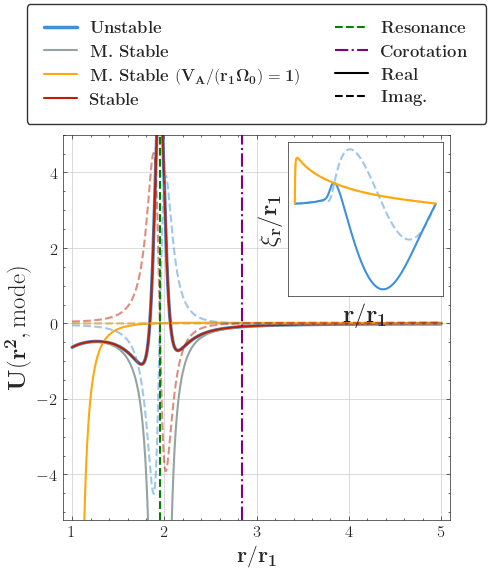

In [111]:
####### Combining
### Differences
fig, ax = plt.subplots(figsize = (5,5))
plt.ylabel(r'$\mathbf{U(r^2, \mathrm{mode})}$', fontsize = 18)
plt.xlabel(r'$\mathbf{r/r_1}$', fontsize = 16)
plt.plot(rp, Ur_US.real, color = color_arr[0], label = r'\textbf{Unstable}', linewidth = 2.5)
plt.plot(rp, Ur_MS2.real, color = color_arr[3], label = r'\textbf{M. Stable}', linewidth = 1.5)
plt.plot(rp, Ur_MS.real, color = color_arr[1], label = r'\textbf{M. Stable} ($\mathbf{V_A/(r_1\Omega_0) = 1}$)', linewidth = 1.5)
plt.plot(rp, Ur_S.real, color = color_arr[2], label = r'\textbf{Stable}', linewidth = 1.5)

plt.plot(rp, Ur_US.imag, color = color_arr[0], linestyle = 'dashed', alpha = 0.5, linewidth = 1.5)
plt.plot(rp, Ur_MS2.imag, color = color_arr[3], linestyle = 'dashed', alpha = 0.5, linewidth = 1.5)
plt.plot(rp, Ur_MS.imag, color = color_arr[1], linestyle = 'dashed', alpha = 0.5, linewidth = 1.5)
plt.plot(rp, Ur_S.imag, color = color_arr[2], linestyle = 'dashed', alpha = 0.5, linewidth = 1.5)

plt.ylim(-5.2,5)
# plt.xlim(1,8)
plt.xlim(.9,5.1)
plt.axvline(x=r_vec_US[0], linestyle = 'dashed', color = 'green', label = r'\textbf{Resonance}')
plt.axvline(x=r_vec_US[1], linestyle = 'dashed', color = 'green')
plt.axvline(x=r_vec_US[4], linestyle = '-.', color = 'purple', label = r'\textbf{Corotation}')
combined_legend = [
    Line2D([0], [0], color=color_arr[0], linestyle='-', label='Unstable'),
    Line2D([0], [0], color=color_arr[3], linestyle='-', label=r'M. Stable'),
    Line2D([0], [0], color=color_arr[1], linestyle='-', label=r'M. Stable' +'\n'  + r'($V_A/(r_1\Omega_0) = 1$)'),
    Line2D([0], [0], color=color_arr[2], linestyle='-', label='Stable'),
    Line2D([0], [0], color='black', linestyle='-', label=r'\textbf{Real}'),
    Line2D([0], [0], color='black', linestyle='--', label=r'\textbf{Imag.}'),
    Line2D([0], [0], color='g', linestyle='--', label=r'\textbf{Resonance}'),
    Line2D([0], [0], color='purple', linestyle='-.', label=r'\textbf{Corotation}'),
]


# Define Zoom-in Range
y_min, y_max = -0.01, 0.01  # Adjust based on your data
zoom_start, zoom_end = 4.9, 5.1
# Add Inset Axis
ax_inset = inset_axes(ax, width="40%", height="40%", loc="upper right")  # Adjust size and position
ax_inset.plot(r, (u_US).real, 
              color=color_arr[0])
# ax_inset.plot(r, (u_S).real, 
#               color=color_arr[2])

ax_inset.plot(r, (u_US).imag, 
              color=color_arr[0], linestyle = 'dashed', alpha=0.5)

ax_inset.plot(r, (7000*u_MS).real, 
              color=color_arr[1])
ax_inset.plot(r, (7000*u_MS).imag, 
              color=color_arr[1], linestyle = 'dashed', alpha=0.5)

# ax_inset.plot(r, (u_S).imag, 
#               color=color_arr[2], linestyle = 'dashed', alpha=0.5, linewidth = 2)

# Add the custom legend below or in a separate position
ax_inset.set_xticks([])
ax_inset.set_yticks([])
ax_inset.set_ylabel(r'$\mathbf{\xi_r/r_1}$', fontsize = 18)
ax_inset.set_xlabel(r'$\mathbf{r/r_1}$', fontsize = 18)

# Add the legend
# ax.legend(handles=combined_legend, loc='lower right')



lines_labels = [ax2.get_legend_handles_labels() for ax2 in fig.axes]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]

dummy_black_line = Line2D([0], [0], color='black', linestyle='-', label=r'\textbf{Real}')
dummy_black_dotted_line = Line2D([0], [0], color='black', linestyle='--', label=r'\textbf{Imag.}')

# Add the dummy entries to the legend
lines += [dummy_black_line, dummy_black_dotted_line]
labels += [r'\textbf{Real}', r'\textbf{Imag.}']

# Create the legend below the plot
ax.legend(lines, labels, loc='lower center', ncol=2, 
           bbox_to_anchor=(0.5, .985),  # Position the legend below the plot
           frameon=True,  # Turn on the frame (border)
           edgecolor='black',  # Set the border color
           facecolor='white',  # Set the background color of the legend box
           borderpad=1,  # Padding between the legend text and the border
           borderaxespad=1, fontsize = 12)

plt.savefig(f'Potentials-Non-Ideal/' + type + f'_{kn}k1-potential' +'-' + flow_type + f'-{r2}r1-Bz' + f'-ETA{int(eta)}-Pm{int(Pm)}' + '-Comb.png', bbox_inches='tight', dpi = 500)
plt.savefig(f'Potentials-Non-Ideal/' + type + f'_{kn}k1-potential' +'-' + flow_type + f'-{r2}r1-Bz' + f'-ETA{int(eta)}-Pm{int(Pm)}' + '-Comb.svg', bbox_inches='tight', format = 'svg')
plt.savefig(f'Potentials-Non-Ideal/' + type + f'_{kn}k1-potential' +'-' + flow_type + f'-{r2}r1-Bz' + f'-ETA{int(eta)}-Pm{int(Pm)}' + '-Comb.pdf', bbox_inches='tight', dpi = 500)

plt.show()

#### Combining

In [96]:
rp = r
Ur_US = getU_NIx(rp, guess_US, eta_US, Pm, k2r_curr, k2rp_curr, k2rpp_curr, k2i_curr, k2ip_curr, k2ipp_curr, m, kz, B0, Bz_US, flow_select, 1)
Ur_MS = getU_NIx(rp, guess_MS, eta_MS, Pm, k2r_curr, k2rp_curr, k2rpp_curr, k2i_curr, k2ip_curr, k2ipp_curr, m, kz, B0, Bz_MS, flow_select, 1)
Ur_S = getU_NIx(rp, guess_S, eta_S, Pm, k2r_curr, k2rp_curr, k2rpp_curr, k2i_curr, k2ip_curr, k2ipp_curr, m, kz, B0, Bz_S, flow_select, 1)

In [97]:
## Get Transforms
ut_x = get_u2(r, guess_US, eta, Pm, k2r_curr, k2rp_curr, k2rpp_curr, k2i_curr, k2ip_curr, k2ipp_curr, m, kz, B0, Bz_US, flow_select, 1, 1/2, 'x')
ut_xMS = get_u2(r, guess_MS, eta, Pm, k2r_curr, k2rp_curr, k2rpp_curr, k2i_curr, k2ip_curr, k2ipp_curr, m, kz, B0, Bz_MS, flow_select, 1, 1/2, 'x')
ut_xS = get_u2(r, guess_S, eta, Pm, k2r_curr, k2rp_curr, k2rpp_curr, k2i_curr, k2ip_curr, k2ipp_curr, m, kz, B0, Bz_S, flow_select, 1, 1/2, 'x')

psi_US = u_US/ut_x
psi_MS = u_MS/ut_xMS
psi_S = u_S/ut_xS

psir = i2.CubicSpline(r**2, psi_US.real)
psii = i2.CubicSpline(r**2, psi_US.imag)
psip_US = psir.derivative()(r**2) + 1j*psii.derivative()(r**2)
psipp_US = psir.derivative().derivative()(r**2) + 1j*psii.derivative().derivative()(r**2)

psir = i2.CubicSpline(r**2, psi_MS.real)
psii = i2.CubicSpline(r**2, psi_MS.imag)
psip_MS = psir.derivative()(r**2) + 1j*psii.derivative()(r**2)
psipp_MS = psir.derivative().derivative()(r**2) + 1j*psii.derivative().derivative()(r**2)

psir = i2.CubicSpline(r**2, psi_S.real)
psii = i2.CubicSpline(r**2, psi_S.imag)
psip_S = psir.derivative()(r**2) + 1j*psii.derivative()(r**2)
psipp_S = psir.derivative().derivative()(r**2) + 1j*psii.derivative().derivative()(r**2)

## Confirm Shrod. Relation
# plt.figure()
# plt.ylabel('Schrod. Relation')
# plt.plot(r, psipp_US, color = color_arr[0], label = r"$\Psi_{US}'', Real$")
# plt.plot(r, Ur_US*psi_US, color = color_arr[1], linestyle = 'dashed', label = r"$U_{US}\Psi_{US}$")
# plt.plot(r, psipp_MS, color = color_arr[2], label = r"$\Psi_{S}'', Real$")
# plt.plot(r, Ur_MS*psi_MS, color = color_arr[3], linestyle = 'dashed', label = r"$U_{S}\Psi_{S}$")
# plt.plot(r, psipp_S, color = color_arr[4], label = r"$\Psi_{S}'', Real$")
# plt.plot(r, Ur_S*psi_S, color = color_arr[5], linestyle = 'dashed', label = r"$U_{S}\Psi_{S}$")
# plt.legend()
# plt.ylim(-3,3)
# plt.show()

## Confirm Shrod. Relation
# plt.figure()
# plt.ylabel('Schrod. Relation')
# plt.plot(r, psipp_US - Ur_US*psi_US, color = color_arr[0], label = r"Unstable, Real")
# plt.plot(r, psipp_MS - Ur_MS*psi_MS, color = color_arr[1], label = r"Marg. Stable, Real")
# plt.plot(r, psipp_S - Ur_S*psi_S, color = color_arr[2], label = r"Stable, Real")
# plt.legend()
# plt.ylim(-0.01,0.01)
# plt.show()

E_US = psip_US*np.conjugate(psip_US) + Ur_US*psi_US*np.conjugate(psi_US)
E_MS = psip_MS*np.conjugate(psip_MS) + Ur_MS*psi_MS*np.conjugate(psi_MS)
E_S = psip_S*np.conjugate(psip_S) + Ur_S*psi_S*np.conjugate(psi_S)

# ## Plot Energy Density
# plt.figure(figsize = (5,5))
# plt.ylabel(r"$|\Psi'|^2 + U(r)|\Psi|^2$")
# plt.plot(r, (E_US).real, color = color_arr[0], label = r"Unstable, Real")
# plt.plot(r, (E_US).imag, color = color_arr[1], label = r"Unstable, Imag.")
# plt.plot(r, (E_MS).real, color = color_arr[2], label = r"Marg. Stable, Real", linestyle = 'dashdot')
# plt.plot(r, (E_MS).imag, color = color_arr[4], label = r"Marg. Stable, Imag.", linestyle = 'dashdot')
# plt.plot(r, (E_S).real, color = color_arr[5], label = r"Stable, Real", linestyle = 'dashed')
# plt.plot(r, (E_S).imag, color = color_arr[6], label = r"Stable, Imag.", linestyle = 'dashed')
# plt.legend()
# # plt.savefig(f'Potentials-Non-Ideal/' + type + f'_{kn}k1-EDens' +'-' + flow_type + f'-{r2}r1-Bz-vA0p' + VA_N_strs + f'-ETA{int(eta)}-Pm{int(Pm)}' + '-Comb-Imag.svg', bbox_inches='tight', format = 'svg')
# plt.show()


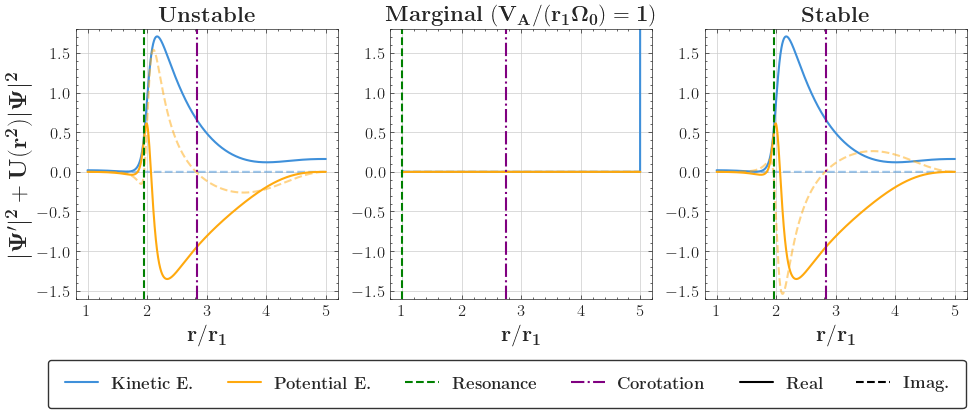

In [98]:
## Plot Energy Density (Components)
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset
import matplotlib
from matplotlib.lines import Line2D
## Plot Energy Density

E_US = psip_US*np.conjugate(psip_US) + Ur_US*psi_US*np.conjugate(psi_US)
E_MS = psip_MS*np.conjugate(psip_MS) + Ur_MS*psi_MS*np.conjugate(psi_MS)
E_S = psip_S*np.conjugate(psip_S) + Ur_S*psi_S*np.conjugate(psi_S)

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (11.5,3.5))

ax1.set_ylabel(r"$\mathbf{|\Psi'|^2 + U(r^2)|\Psi|^2}$", fontsize = 18)
ax1.plot(r, ((psip_US*np.conjugate(psip_US))).real, color = color_arr[0], label = r'\textbf{Kinetic E.}')
ax1.plot(r, ((psip_US*np.conjugate(psip_US))).imag, color = color_arr[0], linestyle = 'dashed', alpha = 0.5)
ax1.plot(r, ((Ur_US*psi_US*np.conjugate(psi_US))).real, color = color_arr[1], label = r'\textbf{Potential E.}')
ax1.plot(r, ((Ur_US*psi_US*np.conjugate(psi_US))).imag, color = color_arr[1], linestyle = 'dashed', alpha = 0.5)
ax1.axvline(x=r_vec_US[1], linestyle = '--', color = 'green', label = r'\textbf{Resonance}')
ax1.axvline(x=r_vec_US[4], linestyle = '-.', color = 'purple', label = r'\textbf{Corotation}')

ax2.plot(r, ((psip_MS*np.conjugate(psip_MS))).real, color = color_arr[0])
ax2.plot(r, ((psip_MS*np.conjugate(psip_MS))).imag, color = color_arr[0], linestyle = 'dashed', alpha = 0.5)
ax2.plot(r, ((Ur_MS*psi_MS*np.conjugate(psi_MS))).real, color = color_arr[1])
ax2.plot(r, ((Ur_MS*psi_MS*np.conjugate(psi_MS))).imag, color = color_arr[1], linestyle = 'dashed', alpha = 0.5)
ax2.axvline(x=r_vec_MS[1], linestyle = '--', color = 'green')
ax2.axvline(x=r_vec_MS[4], linestyle = '-.', color = 'purple')


ax3.plot(r, ((psip_S*np.conjugate(psip_S))).real, color = color_arr[0])
ax3.plot(r, ((psip_S*np.conjugate(psip_S))).imag, color = color_arr[0], linestyle = 'dashed', alpha = 0.5)
ax3.plot(r, ((Ur_S*psi_S*np.conjugate(psi_S))).real, color = color_arr[1])
ax3.plot(r, ((Ur_S*psi_S*np.conjugate(psi_S))).imag, color = color_arr[1], linestyle = 'dashed', alpha = 0.5)
ax3.axvline(x=r_vec_S[1], linestyle = '--', color = 'green')
ax3.axvline(x=r_vec_S[4], linestyle = '-.', color = 'purple')


combined_legend = [
    Line2D([0], [0], color=color_arr[4], linestyle='-', label='Unstable, Kin.'),
    Line2D([0], [0], color=color_arr[6], linestyle='-', label=r'Unstable, Pot.'),
    # Line2D([0], [0], color=color_arr[2], linestyle='-', label='Stable'),
    Line2D([0], [0], color='black', linestyle='-', label=r'\textbf{Real}'),
    Line2D([0], [0], color='black', linestyle='--', label=r'\textbf{Imag.}'),
    Line2D([0], [0], color='green', linestyle='--', label=r'\textbf{Resonance}'),
    Line2D([0], [0], color='purple', linestyle='-.', label=r'\textbf{Corotation}')
]

# Add the legend
# ax1.legend(handles=combined_legend, loc='lower left', title = 'Rm = 70')

combined_legend = [
    Line2D([0], [0], color=color_arr[4], linestyle='-', label='Marg. Stable, Kin.'),
    Line2D([0], [0], color=color_arr[6], linestyle='-', label=r'Marg. Stable, Pot.'),
    # Line2D([0], [0], color=color_arr[2], linestyle='-', label='Stable'),
    Line2D([0], [0], color='black', linestyle='-', label=r'\textbf{Real}'),
    Line2D([0], [0], color='black', linestyle='--', label=r'\textbf{Imag.}'),
    Line2D([0], [0], color='green', linestyle='--', label=r'\textbf{Resonance}'),
    Line2D([0], [0], color='purple', linestyle='-.', label=r'\textbf{Corotation}')
]

# Add the legend
# ax2.legend(handles=combined_legend, loc='lower left', title = 'Rm = 38.6')


combined_legend = [
    Line2D([0], [0], color=color_arr[4], linestyle='-', label='Stable, Kin.'),
    Line2D([0], [0], color=color_arr[6], linestyle='-', label=r'Stable, Pot.'),
    # Line2D([0], [0], color=color_arr[2], linestyle='-', label='Stable'),
    Line2D([0], [0], color='black', linestyle='-', label=r'\textbf{Real}'),
    Line2D([0], [0], color='black', linestyle='--', label=r'\textbf{Imag.}'),
    Line2D([0], [0], color='green', linestyle='--', label=r'\textbf{Resonance}'),
    Line2D([0], [0], color='purple', linestyle='-.', label=r'\textbf{Corotation}')
]

# Add the legend
# ax3.legend(handles=combined_legend, loc='upper left', title = 'Rm = 20')
ax1.set_ylim(-1.6,1.8)
ax2.set_ylim(-1.6,1.8)
ax3.set_ylim(-1.6,1.8)

ax1.set_xlabel(r'$\mathbf{r/r_1}$', fontsize = 16)
ax1.set_title(r'\textbf{Unstable}', fontsize = 16)
ax2.set_xlabel(r'$\mathbf{r/r_1}$', fontsize = 16)
ax2.set_title(r'\textbf{Marginal} ($\mathbf{V_A/(r_1\Omega_0) = 1}$)', fontsize = 16)
ax3.set_xlabel(r'$\mathbf{r/r_1}$', fontsize = 16)
ax3.set_title(r'\textbf{Stable}', fontsize = 16)

lines_labels = [ax2.get_legend_handles_labels() for ax2 in fig.axes]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]

dummy_black_line = Line2D([0], [0], color='black', linestyle='-', label=r'\textbf{Real}')
dummy_black_dotted_line = Line2D([0], [0], color='black', linestyle='--', label=r'\textbf{Imag.}')

# Add the dummy entries to the legend
lines += [dummy_black_line, dummy_black_dotted_line]
labels += [r'\textbf{Real}', r'\textbf{Imag.}']

# Create the legend below the plot
fig.legend(lines, labels, loc='lower center', ncol=6, 
           bbox_to_anchor=(0.5, -0.25),  # Position the legend below the plot
           frameon=True,  # Turn on the frame (border)
           edgecolor='black',  # Set the border color
           facecolor='white',  # Set the background color of the legend box
           borderpad=1,  # Padding between the legend text and the border
           borderaxespad=1, fontsize = 12)



plt.savefig(f'Potentials-Non-Ideal/' + type + f'_{kn}k1-E' +'-' + flow_type + f'-{r2}r1-Bz' + f'-ETA{int(eta)}-Pm{int(Pm)}' + '-Comb.png', bbox_inches='tight', dpi = 500)
plt.savefig(f'Potentials-Non-Ideal/' + type + f'_{kn}k1-E' +'-' + flow_type + f'-{r2}r1-Bz' + f'-ETA{int(eta)}-Pm{int(Pm)}' + '-Comb.svg', bbox_inches='tight', format = 'svg')
plt.savefig(f'Potentials-Non-Ideal/' + type + f'_{kn}k1-E' +'-' + flow_type + f'-{r2}r1-Bz' + f'-ETA{int(eta)}-Pm{int(Pm)}' + '-Comb.pdf', bbox_inches='tight', dpi = 500)

plt.show()

## Non Ideal MCI 1k1 (v2) (VA0.2)

In [92]:
##### SET PARAMETERS #####
flow_type = 'Kep'
type = 'MCI'

if(flow_type == 'Kep'):
    flow_select = True
elif(flow_type == 'Tanh'):
    flow_select = 'tanh'
elif(flow_type == 'Sat'):
    flow_select = 'saturated'
elif(flow_type == 'Sh2'):
    flow_select = 'Sh2'
    
color_arr = ['#3F90DA', '#FFA90E', '#BD1F01', '#94A4A2', '#832DB6', '#A96B59', '#E76300', '#B9AC70', '#92DADD']

q = 1/2
r1 = .1
r2 = 5
r3 = 10

### MCI k = 1k1 (Kep.)
kn = 1
m = 1
kz = kn*np.pi/(4)
B0 = 0
elecd = 0
eta = elecd 
Pm = 0

## PLOT ALL
r = np.linspace(1, r2, 500)
q_mag = np.pi**2
q2r_sc = q_mag*1/r**2
q2rp_sc = q_mag*(-2/r**3)
q2rpp_sc = q_mag*(6/r**4)
q2i_sc = q_mag*np.zeros(len(r))
q2ip_sc = q_mag*np.zeros(len(r))
q2ipp_sc = q_mag*np.zeros(len(r))

ones_arr = np.ones(len(r)) 
k2 = (q2r_sc + 1j*q2i_sc) + m**2/r**2 + kz**2 * ones_arr
k2p = ((q2rp_sc + 1j*q2ip_sc) - 2 * m**2/r**3) ## just changed from d/dr
k2pp = ((q2rpp_sc + 1j*q2ipp_sc) + 6 * m**2/r**4) ## just changed from d/dr

k2r_curr = i2.CubicSpline(r, k2.real)
k2i_curr = i2.CubicSpline(r, k2.imag)
k2rp_curr = i2.CubicSpline(r, k2p.real)
k2ip_curr = i2.CubicSpline(r, k2p.imag)
k2rpp_curr = i2.CubicSpline(r, k2pp.real)
k2ipp_curr = i2.CubicSpline(r, k2pp.imag)

xp = np.linspace(1, r3**2, 50000)
rp = np.linspace(r1, r3, 50000)
VA_N = 0.2
Bz = VA_N * (r1*Omega0*np.sqrt(rho*mu_0)*10000)

elecd_I = 0
eta_I = elecd_I 
Pm_I = 0
guess_I = (0.20842493869616271+0.032206894149131714j)
Ur_I = getU_NIx(rp, guess_I, eta_I, Pm_I, k2r_curr, k2rp_curr, k2rpp_curr, k2i_curr, k2ip_curr, k2ipp_curr, m, kz, B0, Bz, flow_select, 1)

#### Marginal #1
elecd_MS_I = 0
eta_MS_I = elecd_MS_I
Pm_MS_I = 0
guess_MS_I = (0.20842493869616271+0.032206894149131714j).real
Ur_MS_I = getU_NIx(rp, guess_MS_I, eta_MS_I, Pm_MS_I, k2r_curr, k2rp_curr, k2rpp_curr, k2i_curr, k2ip_curr, k2ipp_curr, m, kz, B0, Bz, flow_select, 1)


#### Unstable
elecd_NI = 30
eta_NI = elecd_NI
Pm_NI = 1
print(f'Rm = {0.1**2*Omega0/30}')
guess_NI  = 0.20459161197078035+0.02004956771501712j
Ur_NI = getU_NIx(rp, guess_NI, eta_NI, Pm_NI, k2r_curr, k2rp_curr, k2rpp_curr, k2i_curr, k2ip_curr, k2ipp_curr, m, kz, B0, Bz, flow_select, 1)


#### Marginal #2
elecd_MS_NI = 30
eta_MS_NI = elecd_MS_NI
Pm_NI = 1
guess_MS_NI = (0.20459161197078035+0.02004956771501712j).real
Ur_MS_NI = getU_NIx(rp, guess_MS_NI, eta_MS_NI, Pm_NI, k2r_curr, k2rp_curr, k2rpp_curr, k2i_curr, k2ip_curr, k2ipp_curr, m, kz, B0, Bz, flow_select, 1)


Rm = 105.40925533894598


In [93]:
reso = 5000
result = o.root_scalar(shoot_hain_v3, method='secant', x0=guess_I*(1.00005+1e-6j), x1=guess_I*(0.99995-1e-6j), args=(eta_I, Pm_I, k2r_curr, k2rp_curr, k2i_curr, k2ip_curr, kz, m, B0, Bz, flow_select, 1, r2,reso), maxiter=5000,xtol=1e-40,rtol=1e-20)
guess = result.root
y0 = [0.,(1.+1j)*1e-1]  
y = integ.solve_ivp(shoot_setup_hain_v2, [1,r2**2], y0, args=(guess, eta_I, Pm_I, k2r_curr, k2rp_curr, k2i_curr, k2ip_curr, m,kz,B0, Bz,flow_select, 1), max_step=24./reso)
r = np.sqrt(y.t)
u_I = y.y[0]
print(result)
r_vec_I = shr.resonance_res_krcomp_v8(r2, guess, m, eta_I, Pm_I, k2r_curr, k2i_curr, kz,  Bz, B0,flow_select, q)

result = o.root_scalar(shoot_hain_v3, method='secant', x0=guess_NI*(1.00005+1e-6j), x1=guess_NI*(0.99995-1e-6j), args=(eta_NI, Pm_NI, k2r_curr, k2rp_curr, k2i_curr, k2ip_curr, kz, m, B0, Bz, flow_select, 1, r2,reso), maxiter=5000,xtol=1e-40,rtol=1e-20)
guess = result.root
y0 = [0.,(1.+1j)*1e-1]  
y = integ.solve_ivp(shoot_setup_hain_v2, [1,r2**2], y0, args=(guess, eta_NI, Pm_NI, k2r_curr, k2rp_curr, k2i_curr, k2ip_curr, m,kz,B0, Bz,flow_select, 1), max_step=24./reso)
r = np.sqrt(y.t)
u_NI = y.y[0]
print(result)
r_vec_NI = shr.resonance_res_krcomp_v8(r2, guess, m, eta_NI, Pm_NI, k2r_curr, k2i_curr, kz,  Bz, B0,flow_select, q)


      converged: True
           flag: converged
 function_calls: 7
     iterations: 6
           root: (0.20842493869616707+0.032206894149152114j)
         method: secant
      converged: True
           flag: converged
 function_calls: 28
     iterations: 27
           root: (0.20459161197078035+0.020049567715017126j)
         method: secant


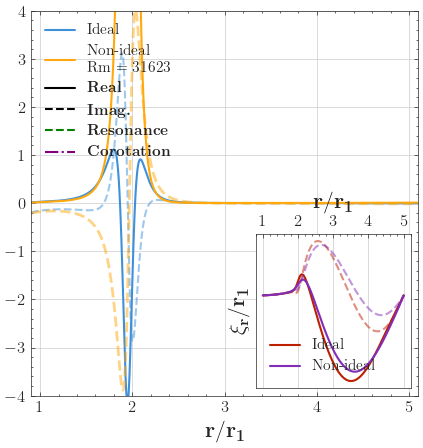

In [94]:
## Plot Energy Density
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset
import matplotlib
from matplotlib.lines import Line2D
## Plot Energy Density
fig, ax = plt.subplots(figsize = (5,5))

# plt.ylabel(r"$\frac{d}{dt}\left(|\Psi'|^2 + U(r^2)|\Psi|^2\right)$")
plt.plot(rp, (Ur_NI - Ur_I).real, color = color_arr[0])
plt.plot(rp, (Ur_NI - Ur_I).imag, color = color_arr[0], linestyle = 'dashed', alpha = 0.5)
plt.plot(rp, (Ur_MS_NI - Ur_MS_I).real, color = color_arr[1])
plt.plot(rp, (Ur_MS_NI - Ur_MS_I).imag, color = color_arr[1], linestyle = 'dashed', alpha = 0.5, linewidth = 2)
plt.ylim(-4,4)
plt.xlim(0.9,r2+0.1)
# plt.legend()
# plt.savefig(f'Potentials-Non-Ideal/' + type + f'_{kn}k1-EDens' +'-' + flow_type + f'-{r2}r1-Bz-vA0p' + VA_N_strs + f'-ETA{int(eta)}-Pm{int(Pm)}' + '-Comb-Imag.svg', bbox_inches='tight', format = 'svg')

combined_legend = [
    Line2D([0], [0], color=color_arr[0], linestyle='-', label='Ideal'),
    Line2D([0], [0], color=color_arr[1], linestyle='-', label='Non-ideal' + '\n' + r'Rm $= 31623$'),
    Line2D([0], [0], color='black', linestyle='-', label=r'\textbf{Real}'),
    Line2D([0], [0], color='black', linestyle='--', label=r'\textbf{Imag.}'),
    Line2D([0], [0], color='green', linestyle='--', label=r'\textbf{Resonance}'),
    Line2D([0], [0], color='purple', linestyle='-.', label=r'\textbf{Corotation}'),
]


# Define Zoom-in Range
y_min, y_max = -0.1, 0.1  # Adjust based on your data
zoom_start, zoom_end = 4.9, 5.1
# Add Inset Axis
ax_inset = inset_axes(ax, width="40%", height="40%", loc="lower right")  # Adjust size and position
ax_inset.plot(r, (u_I).real, 
              color=color_arr[2], label = 'Ideal')
ax_inset.plot(r, (u_I).imag, 
              color=color_arr[2], linestyle = 'dashed', alpha=0.5)

ax_inset.plot(r, (u_NI).real, 
              color=color_arr[4], label = 'Non-ideal')
ax_inset.plot(r, (u_NI).imag, 
              color=color_arr[4], linestyle = 'dashed', alpha=0.5)


# Add the custom legend below or in a separate position

ax_inset.set_xticks([1,2,3,4,5])
ax_inset.xaxis.set_label_position('top')
ax_inset.xaxis.set_ticks_position('top')
ax_inset.set_yticks([])
ax_inset.set_ylabel(r'$\mathbf{\xi_r/r_1}$', fontsize = 16)
ax_inset.set_xlabel(r'$\mathbf{r/r_1}$', fontsize = 16)
ax_inset.legend(loc = 'lower left')

# ax.legend(loc = 'lower left')
# ax.legend(loc='lower right', title='Data Types')
# ax_inset.legend(handles=line_style_legend, loc='upper left', fontsize = 9, title_fontsize = 10)

# Add the legend
ax.legend(handles=combined_legend, loc='upper left')
# plt.savefig(f'Potentials-Non-Ideal/' + type + f'_{kn}k1-Edot' +'-' + flow_type + f'-{r2}r1-Bz' + f'-ETA{int(eta)}-Pm{int(Pm)}' + '-Comb.png', bbox_inches='tight', dpi = 500)
# plt.savefig(f'Potentials-Non-Ideal/' + type + f'_{kn}k1-Edot' +'-' + flow_type + f'-{r2}r1-Bz' + f'-ETA{int(eta)}-Pm{int(Pm)}' + '-Comb.svg', bbox_inches='tight', format = 'svg')
ax.set_xlabel(r'$\mathbf{r/r_1}$', fontsize = 16)
plt.show()


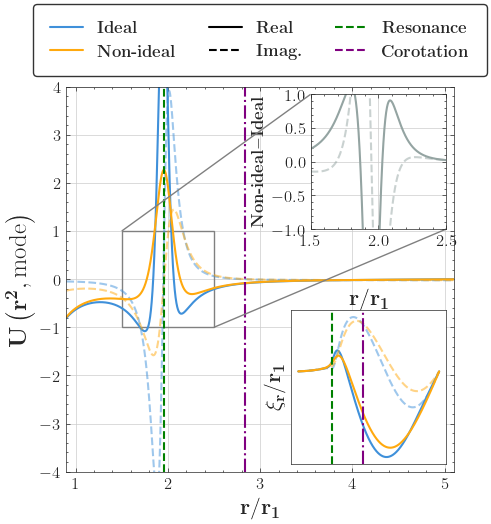

In [98]:
## Plot Potential
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset
import matplotlib
from matplotlib.lines import Line2D
fig, ax = plt.subplots(figsize = (5,5))

plt.ylabel(r"$\mathbf{U\left(r^2, \mathrm{mode}\right)}$", fontsize = 18)

plt.plot(rp, (Ur_I ).real, color = color_arr[0], linewidth = 1.5)
plt.plot(rp, (Ur_I).imag, color = color_arr[0], linestyle = 'dashed', alpha = 0.5, linewidth = 1.5)
plt.plot(rp, (Ur_NI).real, color = color_arr[1], linewidth = 1.5)
plt.plot(rp, (Ur_NI).imag, color = color_arr[1], linestyle = 'dashed', alpha = 0.5, linewidth = 1.5)
plt.ylim(-4,4)
plt.xlim(0.9,r2+0.1)
plt.axvline(x=r_vec_I[0], linestyle = 'dashed', color = 'green')
plt.axvline(x=r_vec_I[1], linestyle = 'dashed', color = 'green')
plt.axvline(x=r_vec_I[4], linestyle = '-.', color = 'purple')
# plt.legend()
# plt.savefig(f'Potentials-Non-Ideal/' + type + f'_{kn}k1-EDens' +'-' + flow_type + f'-{r2}r1-Bz-vA0p' + VA_N_strs + f'-ETA{int(eta)}-Pm{int(Pm)}' + '-Comb-Imag.svg', bbox_inches='tight', format = 'svg')

combined_legend = [
    Line2D([0], [0], color=color_arr[0], linestyle='-', label=r'\textbf{Ideal}'),
    Line2D([0], [0], color=color_arr[1], linestyle='-', label=r'\textbf{Rm} $\mathbf{= 105}$'),
    Line2D([0], [0], color='black', linestyle='-', label=r'\textbf{Real}'),
    Line2D([0], [0], color='black', linestyle='--', label=r'\textbf{Imag.}'),
    Line2D([0], [0], color='green', linestyle='--', label=r'\textbf{Resonance}'),
    Line2D([0], [0], color='purple', linestyle='-.', label=r'\textbf{Corotation}'),
]


# Define Zoom-in Range
y_min, y_max = -0.1, 0.1  # Adjust based on your data
zoom_start, zoom_end = 4.9, 5.1
# Add Inset Axis
ax_inset = inset_axes(ax, width="40%", height="40%", loc="lower right")  # Adjust size and position
# ax_inset.axhline(y=0, linestyle = 'dotted', color = 'k')
ax_inset.plot(r, (u_I).real, 
              color=color_arr[0], label = r'\textbf{Ideal}')
ax_inset.plot(r, (u_I).imag, 
              color=color_arr[0], linestyle = 'dashed', alpha=0.5)

ax_inset.plot(r, (u_NI).real, 
              color=color_arr[1], label = r'\textbf{Non-ideal}')
ax_inset.plot(r, (u_NI).imag, 
              color=color_arr[1], linestyle = 'dashed', alpha=0.5)
# ax_inset.axvline(x=r_vec_I[0], linestyle = 'dashed', color = 'green', label = r'\textbf{Resonance}')
ax_inset.axvline(x=r_vec_I[1], linestyle = 'dashed', color = 'green')
ax_inset.axvline(x=r_vec_I[4], linestyle = '-.', color = 'purple')
# ax_inset.axhline(y=0, linestyle = 'dotted', color = 'k')

# Add the custom legend below or in a separate position

# ax_inset.set_xticks([1,2,3,4,5])
ax_inset.xaxis.set_label_position('top')
ax_inset.xaxis.set_ticks_position('top')
ax_inset.set_xticks([])
ax_inset.set_yticks([])
ax_inset.set_ylabel(r'$\mathbf{\xi_r/r_1}$', fontsize = 16)
ax_inset.set_xlabel(r'$\mathbf{r/r_1}$', fontsize = 16)
# ax_inset.legend(loc = 'lower left')
# ax.legend(loc = 'lower left')
# ax.legend(loc='lower right', title='Data Types')
# ax_inset.legend(handles=line_style_legend, loc='upper left', fontsize = 9, title_fontsize = 10)

############### Zoom in
# Define Zoom-in Range
y_min, y_max = -1, 1 # Adjust based on your data
zoom_start, zoom_end = 1.5, 2.5
# Add Inset Axis
ax_inset = inset_axes(ax, width="35%", height="35%", loc="upper right")  # Adjust size and position
ax_inset.plot(rp, (Ur_NI-Ur_I).real, color = color_arr[3], linewidth = 1.5)
ax_inset.plot(rp, (Ur_NI-Ur_I).imag, color = color_arr[3], linewidth = 1.5, alpha = 0.5, linestyle = 'dashed')

# # Set Zoom-in Limits and Remove Ticks
ax_inset.set_ylim(y_min,y_max)
ax_inset.set_xlim(zoom_start,zoom_end)

# Mark Inset Connection with Main Plot
# mark_inset(ax, ax_inset, loc1=1, loc2=3, color="black", linestyle="--", linewidth=0.5)
mark_inset(ax, ax_inset, loc1=2, loc2=4, fc="none", ec="0.5")
ax_inset.set_ylabel(r'\textbf{Non-ideal}$-$\textbf{Ideal}')





lines_labels = [ax2.get_legend_handles_labels() for ax2 in fig.axes]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]

dummy_black_line = Line2D([0], [0], color='black', linestyle='-', label=r'\textbf{Real}')
dummy_black_dotted_line = Line2D([0], [0], color='black', linestyle='--', label=r'\textbf{Imag.}')

# Add the dummy entries to the legend
lines += [dummy_black_line, dummy_black_dotted_line]
labels += [r'\textbf{Real}', r'\textbf{Imag.}']

dummy_black_line = Line2D([0], [0], color='green', linestyle='--', label=r'\textbf{Resonance}')
dummy_black_dotted_line = Line2D([0], [0], color='purple', linestyle='--', label=r'\textbf{Corotation}')

# Add the dummy entries to the legend
lines += [dummy_black_line, dummy_black_dotted_line]
labels += [r'\textbf{Resonance}', r'\textbf{Corotation}']




# Create the legend below the plot
ax.legend(lines, labels, loc='lower center', ncol=3, 
           bbox_to_anchor=(0.5, .985),  # Position the legend below the plot
           frameon=True,  # Turn on the frame (border)
           edgecolor='black',  # Set the border color
           facecolor='white',  # Set the background color of the legend box
           borderpad=1,  # Padding between the legend text and the border
           borderaxespad=1, fontsize = 12)



# Add the legend
# ax.legend(handles=combined_legend, loc='lower left')
ax.set_xlabel(r'$\mathbf{r/r_1}$', fontsize = 16)
plt.savefig(f'Potentials-Non-Ideal/' + type + f'_{kn}k1-potential' +'-' + flow_type + f'-{r2}r1-Bz' + f'-Comp.png', bbox_inches='tight', dpi = 500)
plt.savefig(f'Potentials-Non-Ideal/' + type + f'_{kn}k1-potential' +'-' + flow_type + f'-{r2}r1-Bz' + f'-Comp.svg', bbox_inches='tight', format = 'svg')
plt.savefig(f'Potentials-Non-Ideal/' + type + f'_{kn}k1-potential' +'-' + flow_type + f'-{r2}r1-Bz' + f'-Comp.pdf', bbox_inches='tight', dpi = 500)

plt.show()

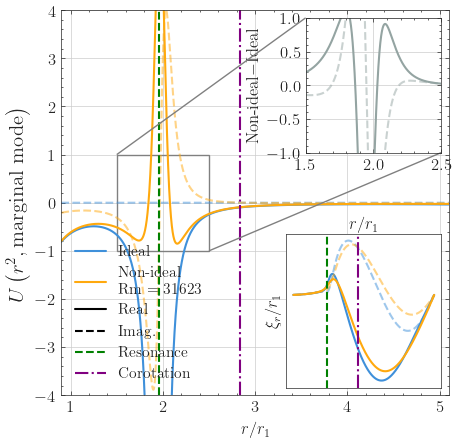

In [ ]:
## Plot Potential
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset
import matplotlib
from matplotlib.lines import Line2D
fig, ax = plt.subplots(figsize = (5,5))

plt.ylabel(r"$U\left(r^2,  \mathrm{marginal} \; \mathrm{mode}\right)$", fontsize = 15)

plt.plot(rp, (Ur_MS_I ).real, color = color_arr[0], linewidth = 1.5)
plt.plot(rp, (Ur_MS_I).imag, color = color_arr[0], linestyle = 'dashed', alpha = 0.5, linewidth = 1.5)
plt.plot(rp, (Ur_MS_NI).real, color = color_arr[1], linewidth = 1.5)
plt.plot(rp, (Ur_MS_NI).imag, color = color_arr[1], linestyle = 'dashed', alpha = 0.5, linewidth = 1.5)
plt.ylim(-4,4)
plt.xlim(0.9,r2+0.1)
plt.axvline(x=r_vec_I[0], linestyle = 'dashed', color = 'green', label = r'\textbf{Resonance}')
plt.axvline(x=r_vec_I[1], linestyle = 'dashed', color = 'green')
plt.axvline(x=r_vec_I[4], linestyle = '-.', color = 'purple', label = r'\textbf{Corotation}')
# plt.legend()
# plt.savefig(f'Potentials-Non-Ideal/' + type + f'_{kn}k1-EDens' +'-' + flow_type + f'-{r2}r1-Bz-vA0p' + VA_N_strs + f'-ETA{int(eta)}-Pm{int(Pm)}' + '-Comb-Imag.svg', bbox_inches='tight', format = 'svg')

combined_legend = [
    Line2D([0], [0], color=color_arr[0], linestyle='-', label='Ideal'),
    Line2D([0], [0], color=color_arr[1], linestyle='-', label='Non-ideal' + '\n' + r'Rm $= 31623$'),
    Line2D([0], [0], color='black', linestyle='-', label=r'\textbf{Real}'),
    Line2D([0], [0], color='black', linestyle='--', label=r'\textbf{Imag.}'),
    Line2D([0], [0], color='green', linestyle='--', label=r'\textbf{Resonance}'),
    Line2D([0], [0], color='purple', linestyle='-.', label=r'\textbf{Corotation}'),
]


# Define Zoom-in Range
y_min, y_max = -0.1, 0.1  # Adjust based on your data
zoom_start, zoom_end = 4.9, 5.1
# Add Inset Axis
ax_inset = inset_axes(ax, width="40%", height="40%", loc="lower right")  # Adjust size and position
# ax_inset.axhline(y=0, linestyle = 'dotted', color = 'k')
# 
ax_inset.plot(r, (u_I).real, 
              color=color_arr[0], label = 'Ideal')
ax_inset.plot(r, (u_I).imag, 
              color=color_arr[0], linestyle = 'dashed', alpha=0.5)

ax_inset.plot(r, (u_NI).real, 
              color=color_arr[1], label = 'Non-ideal')
ax_inset.plot(r, (u_NI).imag, 
              color=color_arr[1], linestyle = 'dashed', alpha=0.5)
# ax_inset.axhline(y=0, linestyle = 'dotted', color = 'k')


# Add the custom legend below or in a separate position

# ax_inset.set_xticks([1,2,3,4,5])
ax_inset.xaxis.set_label_position('top')
ax_inset.xaxis.set_ticks_position('top')
ax_inset.set_ylabel(r'$\mathbf{\xi_r/r_1}$', fontsize = 16)
ax_inset.set_xlabel(r'$\mathbf{r/r_1}$', fontsize = 16)
ax_inset.set_xticks([])
ax_inset.set_yticks([])

# ax_inset.axvline(x=r_vec_I[0], linestyle = 'dashed', color = 'green', label = r'\textbf{Resonance}')
ax_inset.axvline(x=r_vec_I[1], linestyle = 'dashed', color = 'green', label = r'\textbf{Resonance}')
ax_inset.axvline(x=r_vec_I[4], linestyle = '-.', color = 'purple', label = r'\textbf{Corotation}')

# ax_inset.legend(loc = 'lower left')
# ax.legend(loc = 'lower left')
# ax.legend(loc='lower right', title='Data Types')
# ax_inset.legend(handles=line_style_legend, loc='upper left', fontsize = 9, title_fontsize = 10)

############### Zoom in
# Define Zoom-in Range
y_min, y_max = -1, 1 # Adjust based on your data
zoom_start, zoom_end = 1.5, 2.5
# Add Inset Axis
ax_inset = inset_axes(ax, width="35%", height="35%", loc="upper right")  # Adjust size and position
ax_inset.plot(rp, (Ur_NI-Ur_I).real, color = color_arr[3], linewidth = 1.5)
ax_inset.plot(rp, (Ur_NI-Ur_I).imag, color = color_arr[3], linewidth = 1.5, alpha = 0.5, linestyle = 'dashed')

# # Set Zoom-in Limits and Remove Ticks
ax_inset.set_ylim(y_min,y_max)
ax_inset.set_xlim(zoom_start,zoom_end)

# Mark Inset Connection with Main Plot
# mark_inset(ax, ax_inset, loc1=1, loc2=3, color="black", linestyle="--", linewidth=0.5)
mark_inset(ax, ax_inset, loc1=2, loc2=4, fc="none", ec="0.5")
ax_inset.set_ylabel(r'Non-ideal$-$Ideal')


# Add the legend
ax.set_xlabel(r'$\mathbf{r/r_1}$', fontsize = 16)
ax.legend(handles=combined_legend, loc='lower left')
plt.savefig(f'Potentials-Non-Ideal/' + type + f'_{kn}k1-potential' +'-' + flow_type + f'-{r2}r1-Bz' + f'-MS-Comp.png', bbox_inches='tight', dpi = 500)
plt.savefig(f'Potentials-Non-Ideal/' + type + f'_{kn}k1-potential' +'-' + flow_type + f'-{r2}r1-Bz' + f'-MS-Comp.svg', bbox_inches='tight', format = 'svg')

plt.show()

## Non Ideal MRI 1k1 (v2) (VA0.2)

In [99]:
##### SET PARAMETERS #####
flow_type = 'Kep'
type = 'MRI'

if(flow_type == 'Kep'):
    flow_select = True
elif(flow_type == 'Tanh'):
    flow_select = 'tanh'
elif(flow_type == 'Sat'):
    flow_select = 'saturated'
elif(flow_type == 'Sh2'):
    flow_select = 'Sh2'
    
color_arr = ['#3F90DA', '#FFA90E', '#BD1F01', '#94A4A2', '#832DB6', '#A96B59', '#E76300', '#B9AC70', '#92DADD']

q = 1/2
r1 = .1
r2 = 5
r3 = 10

### MCI k = 1k1 (Kep.)
kn = 1
m = 1
kz = kn*np.pi/(4)
B0 = 0
elecd = 0
eta = elecd 
Pm = 0

## PLOT ALL
r = np.linspace(1, r2, 500)
q_mag = np.pi**2
q2r_sc = q_mag*1/r**2
q2rp_sc = q_mag*(-2/r**3)
q2rpp_sc = q_mag*(6/r**4)
q2i_sc = q_mag*np.zeros(len(r))
q2ip_sc = q_mag*np.zeros(len(r))
q2ipp_sc = q_mag*np.zeros(len(r))

ones_arr = np.ones(len(r)) 
k2 = (q2r_sc + 1j*q2i_sc) + m**2/r**2 + kz**2 * ones_arr
k2p = ((q2rp_sc + 1j*q2ip_sc) - 2 * m**2/r**3) ## just changed from d/dr
k2pp = ((q2rpp_sc + 1j*q2ipp_sc) + 6 * m**2/r**4) ## just changed from d/dr

k2r_curr = i2.CubicSpline(r, k2.real)
k2i_curr = i2.CubicSpline(r, k2.imag)
k2rp_curr = i2.CubicSpline(r, k2p.real)
k2ip_curr = i2.CubicSpline(r, k2p.imag)
k2rpp_curr = i2.CubicSpline(r, k2pp.real)
k2ipp_curr = i2.CubicSpline(r, k2pp.imag)

xp = np.linspace(1, r3**2, 50000)
rp = np.linspace(r1, r3, 50000)
VA_N = 0.2
Bz = VA_N * (r1*Omega0*np.sqrt(rho*mu_0)*10000)

elecd_I = 0
eta_I = elecd_I 
Pm_I = 0
guess_I = (0.8420543360966929+0.001271340872804506j)
Ur_I = getU_NIx(rp, guess_I, eta_I, Pm_I, k2r_curr, k2rp_curr, k2rpp_curr, k2i_curr, k2ip_curr, k2ipp_curr, m, kz, B0, Bz, flow_select, 1)

#### Marginal #1
elecd_MS_I = 0
eta_MS_I = elecd_MS_I
Pm_MS_I = 0
guess_MS_I = (0.8420543360966929+0.001271340872804506j).real
Ur_MS_I = getU_NIx(rp, guess_MS_I, eta_MS_I, Pm_MS_I, k2r_curr, k2rp_curr, k2rpp_curr, k2i_curr, k2ip_curr, k2ipp_curr, m, kz, B0, Bz, flow_select, 1)


#### Unstable
elecd_NI = 0.1
eta_NI = elecd_NI
Pm_NI = 1
guess_NI  = 0.8420496109414201+0.0009052020400746685j

# elecd_NI = 0.5
# eta_NI = elecd_NI
# Pm_NI = 1
# guess_NI  = 0.8420420031644459-0.0005591606492954443j

# elecd_NI = 1
# eta_NI = elecd_NI
# Pm_NI = 1
# guess_NI  = 0.8429183500941696-0.0036355760980429598j



Ur_NI = getU_NIx(rp, guess_NI, eta_NI, Pm_NI, k2r_curr, k2rp_curr, k2rpp_curr, k2i_curr, k2ip_curr, k2ipp_curr, m, kz, B0, Bz, flow_select, 1)

print(f'Rm = {r1**2*Omega0/eta_NI}')
#### Marginal #2
elecd_MS_NI = .1
eta_MS_NI = elecd_MS_NI
Pm_NI = 1
guess_MS_NI = (0.8420496109414201+0.0009052020400746685j).real
Ur_MS_NI = getU_NIx(rp, guess_MS_NI, eta_MS_NI, Pm_NI, k2r_curr, k2rp_curr, k2rpp_curr, k2i_curr, k2ip_curr, k2ipp_curr, m, kz, B0, Bz, flow_select, 1)


Rm = 31622.776601683792


In [100]:
reso = 5000
result = o.root_scalar(shoot_hain_v3, method='secant', x0=guess_I*(1.00005+1e-6j), x1=guess_I*(0.99995-1e-6j), args=(eta_I, Pm_I, k2r_curr, k2rp_curr, k2i_curr, k2ip_curr, kz, m, B0, Bz, flow_select, 1, r2,reso), maxiter=5000)
guess = result.root
y0 = [0.,(1.+1j)*1e-1]  
y = integ.solve_ivp(shoot_setup_hain_v2, [1,r2**2], y0, args=(guess, eta_I, Pm_I, k2r_curr, k2rp_curr, k2i_curr, k2ip_curr, m,kz,B0, Bz,flow_select, 1), max_step=24./reso)
r_I = np.sqrt(y.t)
u_I = y.y[0]
print(result)
r_vec_I = shr.resonance_res_krcomp_v8(r2, guess, m, eta_I, Pm_I, k2r_curr, k2i_curr, kz,  Bz, B0,flow_select, q)

result = o.root_scalar(shoot_hain_v3, method='secant', x0=guess_NI*(1.00005+1e-6j), x1=guess_NI*(0.99995-1e-6j), args=(eta_NI, Pm_NI, k2r_curr, k2rp_curr, k2i_curr, k2ip_curr, kz, m, B0, Bz, flow_select, 1, r2,reso), maxiter=5000)
guess = result.root
y0 = [0.,(1.+1j)*1e-1]  
y = integ.solve_ivp(shoot_setup_hain_v2, [1,r2**2], y0, args=(guess, eta_NI, Pm_NI, k2r_curr, k2rp_curr, k2i_curr, k2ip_curr, m,kz,B0, Bz,flow_select, 1), max_step=24./reso)
r_NI = np.sqrt(y.t)
u_NI = y.y[0]
print(result)
r_vec_NI = shr.resonance_res_krcomp_v8(r2, guess, m, eta_NI, Pm_NI, k2r_curr, k2i_curr, kz,  Bz, B0,flow_select, q)

      converged: True
           flag: converged
 function_calls: 5
     iterations: 4
           root: (0.8420519413656259+0.0012702944126319858j)
         method: secant
      converged: True
           flag: converged
 function_calls: 4
     iterations: 3
           root: (0.8420496107535317+0.0009052021172978069j)
         method: secant


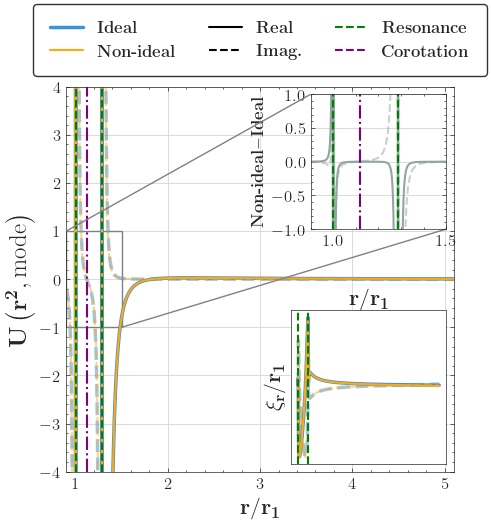

In [103]:
## Plot Potential
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset
import matplotlib
from matplotlib.lines import Line2D
fig, ax = plt.subplots(figsize = (5,5))

plt.ylabel(r"$\mathbf{U\left(r^2, \mathrm{mode}\right)}$", fontsize = 18)

plt.plot(rp, (Ur_I ).real, color = color_arr[0], linewidth = 2.5)
plt.plot(rp, (Ur_I).imag, color = color_arr[0], linestyle = 'dashed', alpha = 0.5, linewidth = 2.5)
plt.plot(rp, (Ur_NI).real, color = color_arr[1], linewidth = 1.5)
plt.plot(rp, (Ur_NI).imag, color = color_arr[1], linestyle = 'dashed', alpha = 0.5, linewidth = 1.5)
plt.axvline(x=r_vec_I[0], linestyle = 'dashed', color = 'green')
plt.axvline(x=r_vec_I[1], linestyle = 'dashed', color = 'green')
plt.axvline(x=r_vec_I[4], linestyle = '-.', color = 'purple')
plt.ylim(-4,4)
plt.xlim(0.9,r2+0.1)
# plt.legend()
# plt.savefig(f'Potentials-Non-Ideal/' + type + f'_{kn}k1-EDens' +'-' + flow_type + f'-{r2}r1-Bz-vA0p' + VA_N_strs + f'-ETA{int(eta)}-Pm{int(Pm)}' + '-Comb-Imag.svg', bbox_inches='tight', format = 'svg')

combined_legend = [
    Line2D([0], [0], color=color_arr[0], linestyle='-', label=r'\textbf{Ideal}'),
    Line2D([0], [0], color=color_arr[1], linestyle='-', label=r'\textbf{Non-ideal}'),
    Line2D([0], [0], color='black', linestyle='-', label=r'\textbf{Real}'),
    Line2D([0], [0], color='black', linestyle='--', label=r'\textbf{Imag.}'),
    Line2D([0], [0], color='green', linestyle='--', label=r'\textbf{Resonance}'),
    Line2D([0], [0], color='purple', linestyle='-.', label=r'\textbf{Corotation}'),
]


# Define Zoom-in Range
y_min, y_max = -0.1, 0.1  # Adjust based on your data
zoom_start, zoom_end = 4.9, 5.1
# Add Inset Axis
ax_inset = inset_axes(ax, width="40%", height="40%", loc="lower right")  # Adjust size and position
# ax_inset.axhline(y=0, linestyle = 'dotted', color = 'k')

ax_inset.plot(r_I, (u_I).real, 
              color=color_arr[0], label = r'\textbf{Ideal}', linewidth = 2.5)
ax_inset.plot(r_I, (u_I).imag, 
              color=color_arr[0], linestyle = 'dashed', alpha=0.5, linewidth = 2.5)

ax_inset.plot(r_NI, (u_NI).real, 
              color=color_arr[1], label = r'\textbf{Non-ideal}')
ax_inset.plot(r_NI, (u_NI).imag, 
              color=color_arr[1], linestyle = 'dashed', alpha=0.5)

ax_inset.axvline(x=r_vec_I[0], linestyle = 'dashed', color = 'green')
ax_inset.axvline(x=r_vec_I[1], linestyle = 'dashed', color = 'green')
# ax_inset.axvline(x=r_vec_I[0], linestyle = 'dashed', color = 'green', label = r'\textbf{Resonance}')
# ax_inset.axvline(x=r_vec_I[1], linestyle = 'dashed', color = 'green')
# ax_inset.axvline(x=r_vec_I[4], linestyle = '-.', color = 'purple', label = r'\textbf{Corotation}')
# Add the custom legend below or in a separate position

# ax_inset.set_xticks([1,2,3,4,5])
ax_inset.xaxis.set_label_position('top')
ax_inset.xaxis.set_ticks_position('top')
ax_inset.set_yticks([])
ax_inset.set_xticks([])
ax_inset.set_ylabel(r'$\mathbf{\xi_r/r_1}$', fontsize = 16)
ax_inset.set_xlabel(r'$\mathbf{r/r_1}$', fontsize = 16)

# ax_inset.legend(loc = 'lower left')
# ax.legend(loc = 'lower left')
# ax.legend(loc='lower right', title='Data Types')
# ax_inset.legend(handles=line_style_legend, loc='upper left', fontsize = 9, title_fontsize = 10)


############### Zoom in
# Define Zoom-in Range
y_min, y_max = -1, 1 # Adjust based on your data
zoom_start, zoom_end = 0.9, 1.5
# Add Inset Axis
ax_inset = inset_axes(ax, width="35%", height="35%", loc="upper right")  # Adjust size and position
ax_inset.plot(rp, (Ur_NI-Ur_I).real, color = color_arr[3], linewidth = 1.5)
ax_inset.plot(rp, (Ur_NI-Ur_I).imag, color = color_arr[3], linewidth = 1.5, alpha = 0.5, linestyle = 'dashed')
ax_inset.axvline(x=r_vec_I[0], linestyle = 'dashed', color = 'green')
ax_inset.axvline(x=r_vec_I[1], linestyle = 'dashed', color = 'green')
ax_inset.axvline(x=r_vec_I[4], linestyle = '-.', color = 'purple')
# # Set Zoom-in Limits and Remove Ticks
ax_inset.set_ylim(y_min,y_max)
ax_inset.set_xlim(zoom_start,zoom_end)

# Mark Inset Connection with Main Plot
# mark_inset(ax, ax_inset, loc1=1, loc2=3, color="black", linestyle="--", linewidth=0.5)
mark_inset(ax, ax_inset, loc1=2, loc2=4, fc="none", ec="0.5")
ax_inset.set_ylabel(r'\textbf{Non-ideal}$-$\textbf{Ideal}')
# Add the legend
ax.set_xlabel(r'$\mathbf{r/r_1}$', fontsize = 16)
# ax.legend(handles=combined_legend, loc='lower left')



lines_labels = [ax2.get_legend_handles_labels() for ax2 in fig.axes]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]

dummy_black_line = Line2D([0], [0], color='black', linestyle='-', label=r'\textbf{Real}')
dummy_black_dotted_line = Line2D([0], [0], color='black', linestyle='--', label=r'\textbf{Imag.}')

# Add the dummy entries to the legend
lines += [dummy_black_line, dummy_black_dotted_line]
labels += [r'\textbf{Real}', r'\textbf{Imag.}']

dummy_black_line = Line2D([0], [0], color='green', linestyle='--', label=r'\textbf{Resonance}')
dummy_black_dotted_line = Line2D([0], [0], color='purple', linestyle='--', label=r'\textbf{Corotation}')

# Add the dummy entries to the legend
lines += [dummy_black_line, dummy_black_dotted_line]
labels += [r'\textbf{Resonance}', r'\textbf{Corotation}']




# Create the legend below the plot
ax.legend(lines, labels, loc='lower center', ncol=3, 
           bbox_to_anchor=(0.5, .985),  # Position the legend below the plot
           frameon=True,  # Turn on the frame (border)
           edgecolor='black',  # Set the border color
           facecolor='white',  # Set the background color of the legend box
           borderpad=1,  # Padding between the legend text and the border
           borderaxespad=1, fontsize = 12)




plt.savefig(f'Potentials-Non-Ideal/' + type + f'_{kn}k1-potential' +'-' + flow_type + f'-{r2}r1-Bz' + f'-Comp.png', bbox_inches='tight', dpi = 500)
plt.savefig(f'Potentials-Non-Ideal/' + type + f'_{kn}k1-potential' +'-' + flow_type + f'-{r2}r1-Bz' + f'-Comp.svg', bbox_inches='tight', format = 'svg')
plt.savefig(f'Potentials-Non-Ideal/' + type + f'_{kn}k1-potential' +'-' + flow_type + f'-{r2}r1-Bz' + f'-Comp.pdf', bbox_inches='tight', dpi = 500)

plt.show()

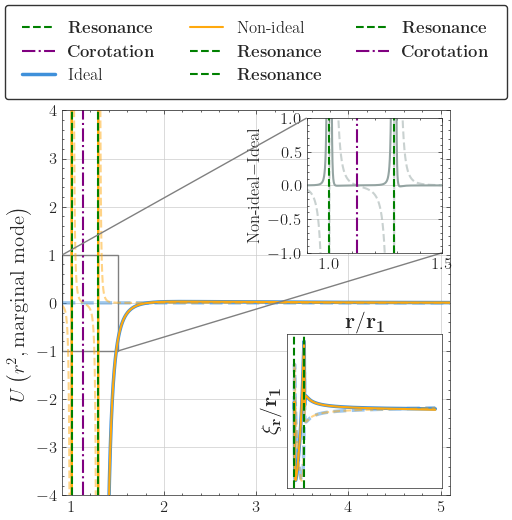

In [79]:
## Plot Potential
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset
import matplotlib
from matplotlib.lines import Line2D
fig, ax = plt.subplots(figsize = (5,5))

plt.ylabel(r"$U\left(r^2, \mathrm{marginal} \; \mathrm{mode}\right)$", fontsize = 15)

plt.plot(rp, (Ur_MS_I ).real, color = color_arr[0], linewidth = 2.5)
plt.plot(rp, (Ur_MS_I).imag, color = color_arr[0], linestyle = 'dashed', alpha = 0.5, linewidth = 2.5)
plt.plot(rp, (Ur_MS_NI).real, color = color_arr[1], linewidth = 1.5)
plt.plot(rp, (Ur_MS_NI).imag, color = color_arr[1], linestyle = 'dashed', alpha = 0.5, linewidth = 1.5)
plt.ylim(-4,4)
plt.xlim(0.9,r2+0.1)
plt.axvline(x=r_vec_I[0], linestyle = 'dashed', color = 'green', label = r'\textbf{Resonance}')
plt.axvline(x=r_vec_I[1], linestyle = 'dashed', color = 'green')
plt.axvline(x=r_vec_I[4], linestyle = '-.', color = 'purple', label = r'\textbf{Corotation}')
# plt.legend()
# plt.savefig(f'Potentials-Non-Ideal/' + type + f'_{kn}k1-EDens' +'-' + flow_type + f'-{r2}r1-Bz-vA0p' + VA_N_strs + f'-ETA{int(eta)}-Pm{int(Pm)}' + '-Comb-Imag.svg', bbox_inches='tight', format = 'svg')

combined_legend = [
    Line2D([0], [0], color=color_arr[0], linestyle='-', label='Ideal'),
    Line2D([0], [0], color=color_arr[1], linestyle='-', label='Non-ideal' + '\n' + r'Rm $= 31623$'),
    Line2D([0], [0], color='black', linestyle='-', label=r'\textbf{Real}'),
    Line2D([0], [0], color='black', linestyle='--', label=r'\textbf{Imag.}'),
    Line2D([0], [0], color='green', linestyle='--', label=r'\textbf{Resonance}'),
    Line2D([0], [0], color='purple', linestyle='-.', label=r'\textbf{Corotation}'),
]



# Define Zoom-in Range
y_min, y_max = -0.1, 0.1  # Adjust based on your data
zoom_start, zoom_end = 4.9, 5.1
# Add Inset Axis

ax_inset = inset_axes(ax, width="40%", height="40%", loc="lower right")  # Adjust size and position\
# ax_inset.axhline(y=0, linestyle = 'dotted', color = 'k')

ax_inset.plot(r_I, (u_I).real, 
              color=color_arr[0], label = 'Ideal', linewidth = 2.5)
ax_inset.plot(r_I, (u_I).imag, 
              color=color_arr[0], linestyle = 'dashed', alpha=0.5, linewidth = 2.5)

ax_inset.plot(r_NI, (u_NI).real, 
              color=color_arr[1], label = 'Non-ideal')
ax_inset.plot(r_NI, (u_NI).imag, 
              color=color_arr[1], linestyle = 'dashed', alpha=0.5)


# Add the custom legend below or in a separate position

# ax_inset.set_xticks([1,2,3,4,5])
ax_inset.set_xticks([])
ax_inset.xaxis.set_label_position('top')
ax_inset.xaxis.set_ticks_position('top')
ax_inset.set_yticks([])
ax_inset.set_ylabel(r'$\mathbf{\xi_r/r_1}$', fontsize = 16)
ax_inset.set_xlabel(r'$\mathbf{r/r_1}$', fontsize = 16)

ax_inset.axvline(x=r_vec_I[0], linestyle = 'dashed', color = 'green', label = r'\textbf{Resonance}')
ax_inset.axvline(x=r_vec_I[1], linestyle = 'dashed', color = 'green', label = r'\textbf{Resonance}')
# ax_inset.axvline(x=r_vec_I[4], linestyle = '-.', color = 'purple', label = r'\textbf{Corotation}')

# ax_inset.legend(loc = 'lower left')
# ax.legend(loc = 'lower left')
# ax.legend(loc='lower right', title='Data Types')
# ax_inset.legend(handles=line_style_legend, loc='upper left', fontsize = 9, title_fontsize = 10)


############### Zoom in
# Define Zoom-in Range
y_min, y_max = -1, 1 # Adjust based on your data
zoom_start, zoom_end = 0.9, 1.5
# Add Inset Axis
ax_inset = inset_axes(ax, width="35%", height="35%", loc="upper right")  # Adjust size and position
ax_inset.plot(rp, (Ur_MS_NI-Ur_MS_I).real, color = color_arr[3], linewidth = 1.5)
ax_inset.plot(rp, (Ur_MS_NI-Ur_MS_I).imag, color = color_arr[3], linewidth = 1.5, alpha = 0.5, linestyle = 'dashed')

# # Set Zoom-in Limits and Remove Ticks
ax_inset.set_ylim(y_min,y_max)
ax_inset.set_xlim(zoom_start,zoom_end)
ax_inset.axvline(x=r_vec_I[0], linestyle = 'dashed', color = 'green', label = r'\textbf{Resonance}')
ax_inset.axvline(x=r_vec_I[1], linestyle = 'dashed', color = 'green')
ax_inset.axvline(x=r_vec_I[4], linestyle = '-.', color = 'purple', label = r'\textbf{Corotation}')

# Mark Inset Connection with Main Plot
# mark_inset(ax, ax_inset, loc1=1, loc2=3, color="black", linestyle="--", linewidth=0.5)
mark_inset(ax, ax_inset, loc1=2, loc2=4, fc="none", ec="0.5")
ax_inset.set_ylabel(r'Non-ideal$-$Ideal')
# Add the legend
# ax.legend(handles=combined_legend, loc='upper left')

lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]

# Create the legend below the plot
ax.legend(lines, labels, loc='lower center', ncol=3, 
           bbox_to_anchor=(0.5, .985),  # Position the legend below the plot
           frameon=True,  # Turn on the frame (border)
           edgecolor='black',  # Set the border color
           facecolor='white',  # Set the background color of the legend box
           borderpad=1,  # Padding between the legend text and the border
           borderaxespad=1, fontsize = 12)


plt.savefig(f'Potentials-Non-Ideal/' + type + f'_{kn}k1-potential' +'-' + flow_type + f'-{r2}r1-Bz' + f'-MS-Comp.png', bbox_inches='tight', dpi = 500)
plt.savefig(f'Potentials-Non-Ideal/' + type + f'_{kn}k1-potential' +'-' + flow_type + f'-{r2}r1-Bz' + f'-MS-Comp.svg', bbox_inches='tight', format = 'svg')

plt.show()

## MCI 1k1 (Bz20)

## MCI 1k1 Combined Plots

In [112]:
##### SET PARAMETERS #####
flow_type = 'Kep'
type = 'MCI'

if(flow_type == 'Kep'):
    flow_select = True
elif(flow_type == 'Tanh'):
    flow_select = 'tanh'
elif(flow_type == 'Sat'):
    flow_select = 'saturated'
elif(flow_type == 'Sh2'):
    flow_select = 'Sh2'
    
color_arr = ['#3F90DA', '#FFA90E', '#BD1F01', '#94A4A2', '#832DB6', '#A96B59', '#E76300', '#B9AC70', '#92DADD']

q = 1/2
r1 = .1
r2 = 5
r3 = 10

### MCI k = 1k1 (Kep.)
kn = 1
m = 1
kz = kn*np.pi/(4)
B0 = 0
VA_N = 0.11278966074102202
Bz = VA_N * (r1*Omega0*np.sqrt(rho*mu_0)*10000)

Rm = 38.56436170937048
elecd = r1**2*Omega0/Rm 
eta = elecd 
Pm = 1
guess = 0.14857514570666747+1.9716357123117026e-07j

# ### Pre Marginal
# Rm = 39
# elecd = r1**2*Omega0/Rm 
# eta = elecd 
# Pm = 1
# guess = 0.14864843379602724+0.00036072925530654826j


# ### Pre Marginal
# Rm = 50
# elecd = r1**2*Omega0/Rm 
# eta = elecd 
# Pm = 1
# guess = 0.1500945063145991+0.007330470194127098j


# ### Pre Marginal
# Rm = 70
# elecd = r1**2*Omega0/Rm 
# eta = elecd 
# Pm = 1
# guess = .15158814489352868+0.014290133581788721j
# guess1 = guess

# ### Past Marginal
# Rm = 20
# elecd = r1**2*Omega0/Rm 
# eta = elecd 
# Pm = 1
# guess = 0.14297868441797187-0.030805112785470497j

## PLOT ALL
r = np.linspace(1, r2, 500)
q_mag = np.pi**2
q2r_sc = q_mag*1/r**2
q2rp_sc = q_mag*(-2/r**3)
q2rpp_sc = q_mag*(6/r**4)
q2i_sc = q_mag*np.zeros(len(r))
q2ip_sc = q_mag*np.zeros(len(r))
q2ipp_sc = q_mag*np.zeros(len(r))

ones_arr = np.ones(len(r)) 
k2 = (q2r_sc + 1j*q2i_sc) + m**2/r**2 + kz**2 * ones_arr
k2p = ((q2rp_sc + 1j*q2ip_sc) - 2 * m**2/r**3) ## just changed from d/dr
k2pp = ((q2rpp_sc + 1j*q2ipp_sc) + 6 * m**2/r**4) ## just changed from d/dr

k2r_curr = i2.CubicSpline(r, k2.real)
k2i_curr = i2.CubicSpline(r, k2.imag)
k2rp_curr = i2.CubicSpline(r, k2p.real)
k2ip_curr = i2.CubicSpline(r, k2p.imag)
k2rpp_curr = i2.CubicSpline(r, k2pp.real)
k2ipp_curr = i2.CubicSpline(r, k2pp.imag)

xp = np.linspace(1, r3**2, 50000)
rp = np.linspace(r1, r3, 50000)

Rm = 70
elecd_US = r1**2*Omega0/Rm 
eta_US = elecd_US 
Pm = 1
guess_US = 0.1515881448934618+0.01429013358178813j
Ur_US = getU_NIx(rp, guess_US, eta_US, Pm, k2r_curr, k2rp_curr, k2rpp_curr, k2i_curr, k2ip_curr, k2ipp_curr, m, kz, B0, Bz, flow_select, 1)

#### Marginal
Rm = 38.56436170937048
elecd_MS= r1**2*Omega0/Rm 
eta_MS = elecd_MS
Pm = 1
guess_MS = guess = 0.14857514570669553+1.9716355383149894e-07j
Ur_MS = getU_NIx(rp, guess_MS, eta_MS, Pm, k2r_curr, k2rp_curr, k2rpp_curr, k2i_curr, k2ip_curr, k2ipp_curr, m, kz, B0, Bz, flow_select, 1)


#### Stable
Rm = 20
elecd_S = r1**2*Omega0/Rm 
eta_S = elecd_S 
Pm = 1
guess_S = 0.14297868441773545-0.03080511278563055j
Ur_S = getU_NIx(rp, guess_S, eta_S, Pm, k2r_curr, k2rp_curr, k2rpp_curr, k2i_curr, k2ip_curr, k2ipp_curr, m, kz, B0, Bz, flow_select, 1)


# # #### Stable
# Rm = 30
# elecd_S = r1**2*Omega0/Rm 
# eta_S = elecd_S 
# Pm = 1
# guess_S = 0.14674163713070157-0.009300380434515471j
# Ur_S = getU_NIx(rp, guess_S, eta_S, Pm, k2r_curr, k2rp_curr, k2rpp_curr, k2i_curr, k2ip_curr, k2ipp_curr, m, kz, B0, Bz, flow_select, 1)

print(eta_MS)
print(eta_US)
print(eta_S)


82.0
45.17539514526256
158.11388300841898


      converged: True
           flag: converged
 function_calls: 34
     iterations: 33
           root: (0.15158814489346184+0.014290133581788123j)
         method: secant
      converged: True
           flag: converged
 function_calls: 3
     iterations: 2
           root: (0.14857514570669553+1.9716355382688428e-07j)
         method: secant
      converged: True
           flag: converged
 function_calls: 15
     iterations: 14
           root: (0.14297868441773548-0.030805112785630553j)
         method: secant


C:\Users\Alex\AppData\Roaming\Python\Python312\site-packages\matplotlib\cbook.py:1719: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
C:\Users\Alex\AppData\Roaming\Python\Python312\site-packages\matplotlib\cbook.py:1355: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


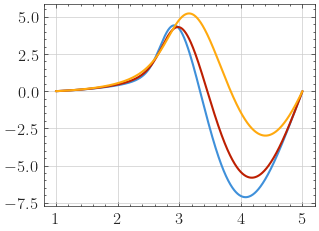

In [113]:
reso = 5000
result = o.root_scalar(shoot_hain_v3, method='secant', x0=guess_US*(1.00005+1e-6j), x1=guess_US*(0.99995-1e-6j), args=(eta_US, Pm, k2r_curr, k2rp_curr, k2i_curr, k2ip_curr, kz, m, B0, Bz, flow_select, 1, r2,reso), maxiter=5000,xtol=1e-40,rtol=1e-20)
guess = result.root
y0 = [0.,(1.+1j)*1e-1]  
y = integ.solve_ivp(shoot_setup_hain_v2, [1,r2**2], y0, args=(guess,eta_US, Pm, k2r_curr, k2rp_curr, k2i_curr, k2ip_curr, m,kz,B0,Bz,flow_select, 1), max_step=24./reso)
r = np.sqrt(y.t)
u_US = y.y[0]
print(result)
r_vec_US = shr.resonance_res_krcomp_v8(r2, guess, m, eta_US, Pm, k2r_curr, k2i_curr, kz, Bz, B0,flow_select, q)

############# Marginally Stable
result = o.root_scalar(shoot_hain_v3, method='secant', x0=guess_MS*(1.00005+1e-6j), x1=guess_MS*(0.99995-1e-6j), args=(eta_MS, Pm, k2r_curr, k2rp_curr, k2i_curr, k2ip_curr, kz, m, B0, Bz, flow_select, 1, r2,reso), maxiter=5000)
guess = result.root
y0 = [0.,(1.+1j)*1e-1]  
y = integ.solve_ivp(shoot_setup_hain_v2, [1,r2**2], y0, args=(guess,eta_MS, Pm, k2r_curr, k2rp_curr, k2i_curr, k2ip_curr, m,kz,B0,Bz,flow_select, 1), max_step=24./reso)
r = np.sqrt(y.t)
u_MS = y.y[0]
print(result)
r_vec_MS = shr.resonance_res_krcomp_v8(r2, guess, m, eta_MS, Pm, k2r_curr, k2i_curr, kz, Bz, B0,flow_select, q)

############# Stable
result = o.root_scalar(shoot_hain_v3, method='secant', x0=guess_S*(1.00005+1e-6j), x1=guess_S*(0.99995-1e-6j), args=(eta_S, Pm, k2r_curr, k2rp_curr, k2i_curr, k2ip_curr, kz, m, B0, Bz, flow_select, 1, r2,reso), maxiter=5000,xtol=1e-40,rtol=1e-20)
guess = result.root
y0 = [0.,(1.+1j)*1e-1]  
y = integ.solve_ivp(shoot_setup_hain_v2, [1,r2**2], y0, args=(guess,eta_S, Pm, k2r_curr, k2rp_curr, k2i_curr, k2ip_curr, m,kz,B0,Bz,flow_select, 1), max_step=24./reso)
r = np.sqrt(y.t)
u_S = y.y[0]
print(result)
r_vec_S = shr.resonance_res_krcomp_v8(r2, guess, m, eta_S, Pm, k2r_curr, k2i_curr, kz, Bz, B0,flow_select, q)

plt.figure()
plt.plot(r, u_US/r, color = color_arr[0], label = 'Unstable')
plt.plot(r, u_MS/r, color = color_arr[2], label = 'Marginally Stable')
plt.plot(r, u_S/r, color = color_arr[1], label = 'Stable')

plt.show()
# elecd = eta
# k2 = k2r_curr(r) + 1j*k2i_curr(r)
# W = 1/r**(3/2)
# w = guess0
# wb = w-m*W
# elecd_scale = elecd / (r1**2*Omega0)
# Weta = wb - 1j*elecd_scale*k2

# vAp1 = B0/(r1*Omega0*np.sqrt(rho*mu_0)*10000)
# vAz = Bz / (r1*Omega0*np.sqrt(rho*mu_0)*10000)
# vAp = vAp1/r
# wA = (m/r)*vAp + kz*vAz

# plt.figure(figsize=(4,4))
# for j in range(0,len(r_vec)):
#     if(j == 0):
#         if(r_vec[j] <= r2):
#             # print('ah1')
#             if(r_vec[j] != 0):
#                 # print('ah')
#                 plt.axvline(x=r_vec[0].real, color='green',ls='--', label=r'\textbf{Resonance}')
#     else:
#         if(r_vec[j] <= r2):
#             if(r_vec[j] != 0):
#                 if(j==1):
#                     plt.axvline(x=r_vec[j].real, color='green',ls='--', label = r'\textbf{Resonance}')
#                 if(j==4):
#                     plt.axvline(x=r_vec[j].real, color='purple',ls='-.', label = r'\textbf{Corotation}')
                
# scale = 10
# W = 1/r**(3/2)
# lamb = -1j*guess
# l_eta = lamb + 1j*m*W + eta/(r1**2*Omega0)*(k2)
# ax = plt.gca()
# ax.axes.yaxis.set_ticklabels([])

# plt.plot(r,scale*(u/r).real, label=r'\textbf{Real}', color = color_arr[0])
# plt.plot(r,scale*(u/r).imag, label=r'\textbf{Imag.}', color = color_arr[1])
# plt.plot(r,0*r, 'k--')
# plt.xlabel('$r/r_1$',fontsize=f)
# plt.ylabel(r'$\xi_r/r_1$',fontsize=f)
# plt.title(f'$m={m}$, $k={kn}k_1$,' + ' $V_{A} = ' + f'{round(VA_N,3)}r_1\Omega_0$',fontsize=15)
# plt.legend(loc='upper right')
# plt.xticks(fontsize=f)
# plt.yticks(fontsize=f)
# plt.tight_layout()
# VA_N_plot = np.round(VA_N, 3)
# plt.yticks(color='w')

# # VA_N = 0.463
# VA_N_str = np.round(VA_N,3)
# VA_N_strs = str(VA_N_str).split(".")[1][:1000]

# plt.savefig(f'Potentials-Non-Ideal/Mode-Structure/' + type + f'_{kn}k1-modestructure' +'-' + flow_type + f'-{r2}r1-Bz-vA0p' + VA_N_strs  + f'-ETA{int(eta)}-Pm{int(Pm)}' + '.png', bbox_inches='tight', dpi = 500)
# plt.savefig(f'Potentials-Non-Ideal/Mode-Structure/' + type + f'_{kn}k1-modestructure' +'-' + flow_type + f'-{r2}r1-Bz-vA0p' + VA_N_strs  + f'-ETA{int(eta)}-Pm{int(Pm)}' + '.svg', format = 'svg',bbox_inches='tight')
# plt.show()    

### Plotting Potentials (Unstable vs Stable vs MS)

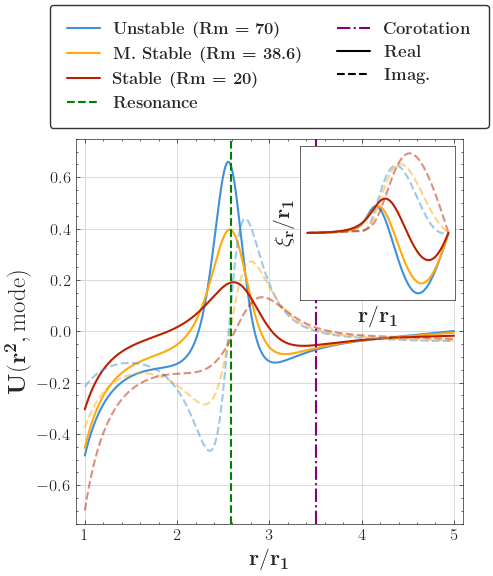

In [ ]:
Ur_US = getU_NIx(r, guess_US, eta_US, Pm, k2r_curr, k2rp_curr, k2rpp_curr, k2i_curr, k2ip_curr, k2ipp_curr, m, kz, B0, Bz, flow_select, 1)
Ur_MS = getU_NIx(r, guess_MS, eta_MS, Pm, k2r_curr, k2rp_curr, k2rpp_curr, k2i_curr, k2ip_curr, k2ipp_curr, m, kz, B0, Bz, flow_select, 1)
Ur_S = getU_NIx(r, guess_S, eta_S, Pm, k2r_curr, k2rp_curr, k2rpp_curr, k2i_curr, k2ip_curr, k2ipp_curr, m, kz, B0, Bz, flow_select, 1)
rp = r
####### Combining
### Differences
fig, ax = plt.subplots(figsize = (5,5))
plt.ylabel(r'$\mathbf{U(r^2, \mathrm{mode})}$', fontsize = 18)
plt.xlabel(r'$\mathbf{r/r_1}$', fontsize = 16)
plt.plot(rp, Ur_US.real, color = color_arr[0], label = r'\textbf{Unstable  (Rm = 70)}', linewidth = 1.5)
plt.plot(rp, Ur_MS.real, color = color_arr[1], label = r'\textbf{M. Stable  (Rm = 38.6)}', linewidth = 1.5)
plt.plot(rp, Ur_S.real, color = color_arr[2], label = r'\textbf{Stable  (Rm = 20)}', linewidth = 1.5)

plt.plot(rp, Ur_US.imag, color = color_arr[0], linestyle = 'dashed', alpha = 0.5, linewidth = 1.5)
plt.plot(rp, Ur_MS.imag, color = color_arr[1], linestyle = 'dashed', alpha = 0.5, linewidth = 1.5)
plt.plot(rp, Ur_S.imag, color = color_arr[2], linestyle = 'dashed', alpha = 0.5, linewidth = 1.5)

plt.ylim(-0.75,0.75)
# plt.xlim(1,8)
plt.xlim(.9,5.1)
plt.axvline(x=r_vec_US[0], linestyle = 'dashed', color = 'green', label = r'\textbf{Resonance}')
plt.axvline(x=r_vec_US[1], linestyle = 'dashed', color = 'green')
plt.axvline(x=r_vec_US[4], linestyle = '-.', color = 'purple', label = r'\textbf{Corotation}')
combined_legend = [
    Line2D([0], [0], color=color_arr[0], linestyle='-', label='Unstable  (Rm = 70)'),
    Line2D([0], [0], color=color_arr[1], linestyle='-', label=r'M. Stable  (Rm = 38.6)'),
    Line2D([0], [0], color=color_arr[2], linestyle='-', label='Stable  (Rm = 20)'),
    Line2D([0], [0], color='black', linestyle='-', label=r'\textbf{Real}'),
    Line2D([0], [0], color='black', linestyle='--', label=r'\textbf{Imag.}'),
    Line2D([0], [0], color='g', linestyle='--', label=r'\textbf{Resonance}'),
    Line2D([0], [0], color='purple', linestyle='-.', label=r'\textbf{Corotation}'),
]
### Bottom right I want to plot chi mode structure

### Mode structure and maybe zoom in at right boundary.

#### subplots
# Define Zoom-in Range
# y_min, y_max = -0.01, 0.01  # Adjust based on your data
# zoom_start, zoom_end = 4.9, 5.1
# # Add Inset Axis
# ax_inset = inset_axes(ax, width="25%", height="25%", loc="upper right")  # Adjust size and position
# ax_inset.plot(r, (Ur_US).real, color = color_arr[0], linewidth = 1.5)
# ax_inset.plot(r, (Ur_MS).real, color = color_arr[1], linewidth = 1.5)
# ax_inset.plot(r, (-1j*guess_S*Ur_S).real, color = color_arr[2], linewidth = 1.5)

# # ax_inset.plot(r, (Ur_US).imag, color = color_arr[0], linewidth = 1.5,linestyle = 'dashed', alpha = 0.5)
# # ax_inset.plot(r, (Ur_MS).imag, color = color_arr[1], linewidth = 1.5,linestyle = 'dashed', alpha = 0.5)
# # ax_inset.plot(r, (Ur_S).imag, color = color_arr[2], linewidth = 1.5,linestyle = 'dashed', alpha = 0.5)

# # # Set Zoom-in Limits and Remove Ticks
# ax_inset.set_ylim(y_min,y_max)
# ax_inset.set_xlim(zoom_start,zoom_end)

# # Mark Inset Connection with Main Plot
# # mark_inset(ax, ax_inset, loc1=1, loc2=3, color="black", linestyle="--", linewidth=0.5)
# mark_inset(ax, ax_inset, loc1=4, loc2=3, fc="none", ec="0.5")

# Define Zoom-in Range
y_min, y_max = -0.1, 0.1  # Adjust based on your data
zoom_start, zoom_end = 4.9, 5.1
# Add Inset Axis
ax_inset = inset_axes(ax, width="40%", height="40%", loc="upper right")  # Adjust size and position
# ax_inset.axhline(y=0, linestyle = 'dotted', color = 'k')

ax_inset.plot(r, (u_US).real, 
              color=color_arr[0])
ax_inset.plot(r, (u_US).imag, 
              color=color_arr[0], linestyle = 'dashed', alpha=0.5)

ax_inset.plot(r, (u_MS).real, 
              color=color_arr[1])
ax_inset.plot(r, (u_MS).imag, 
              color=color_arr[1], linestyle = 'dashed', alpha=0.5)

ax_inset.plot(r, (u_S).real, 
              color=color_arr[2])
ax_inset.plot(r, (u_S).imag, 
              color=color_arr[2], linestyle = 'dashed', alpha=0.5)
# Add the custom legend below or in a separate position

ax_inset.set_xticks([])
ax_inset.set_yticks([])
ax_inset.set_ylabel(r'$\mathbf{\xi_r/r_1}$', fontsize = 18)
ax_inset.set_xlabel(r'$\mathbf{r/r_1}$', fontsize = 18)

# ax.legend(handles=combined_legend, loc='lower right')
lines_labels = [ax2.get_legend_handles_labels() for ax2 in fig.axes]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]

dummy_black_line = Line2D([0], [0], color='black', linestyle='-', label=r'\textbf{Real}')
dummy_black_dotted_line = Line2D([0], [0], color='black', linestyle='--', label=r'\textbf{Imag.}')

# Add the dummy entries to the legend
lines += [dummy_black_line, dummy_black_dotted_line]
labels += [r'\textbf{Real}', r'\textbf{Imag.}']


# Create the legend below the plot
ax.legend(lines, labels, loc='lower center', ncol=2, 
           bbox_to_anchor=(0.5, .985),  # Position the legend below the plot
           frameon=True,  # Turn on the frame (border)
           edgecolor='black',  # Set the border color
           facecolor='white',  # Set the background color of the legend box
           borderpad=1,  # Padding between the legend text and the border
           borderaxespad=1, fontsize = 12)

# ax.set_ylim(-0.1,0.1)
# ax.set_xlim(4.9,5.1)
# Add the legend
# ax.legend(handles=combined_legend, loc='lower right')
plt.savefig(f'Potentials-Non-Ideal/' + type + f'_{kn}k1-potential' +'-' + flow_type + f'-{r2}r1-Bz' + f'-ETA{int(eta)}-Pm{int(Pm)}' + '-Comb.png', bbox_inches='tight', dpi = 500)
plt.savefig(f'Potentials-Non-Ideal/' + type + f'_{kn}k1-potential' +'-' + flow_type + f'-{r2}r1-Bz' + f'-ETA{int(eta)}-Pm{int(Pm)}' + '-Comb.pdf', bbox_inches='tight', dpi = 500)

# plt.savefig(f'Potentials-Non-Ideal/' + type + f'_{kn}k1-potential' +'-' + flow_type + f'-{r2}r1-Bz' + f'-ETA{int(eta)}-Pm{int(Pm)}' + '-Comb.svg', bbox_inches='tight', format = 'svg')
plt.show()

### US vs MS vs S

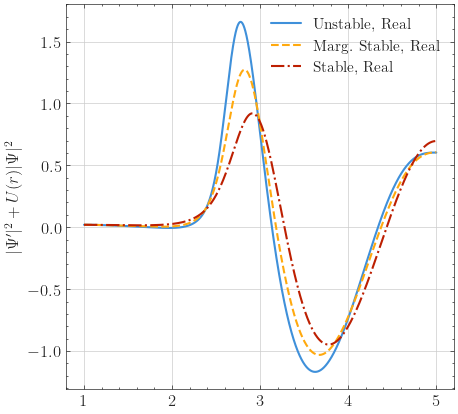

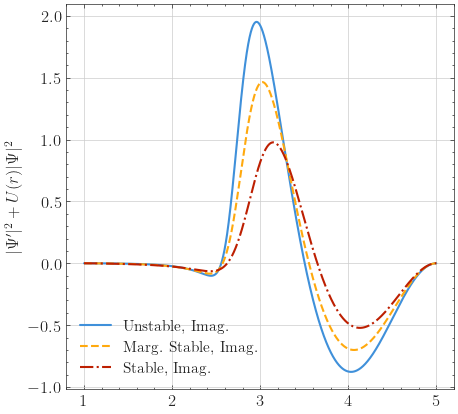

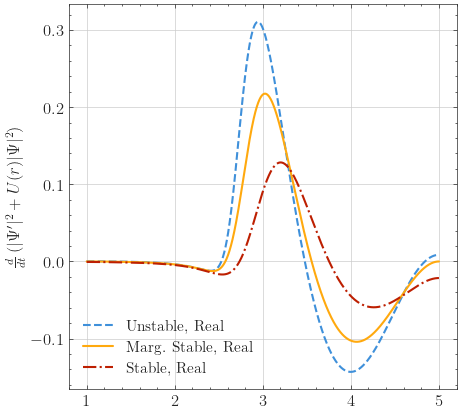

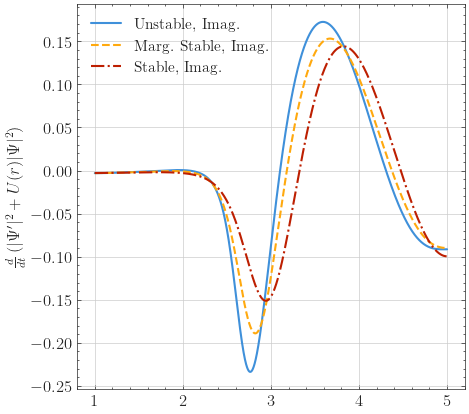

$E_{MAX,i}^{US} =$0.3105502418934026
$E_{MIN,i}^{US} =$-0.14311148585978267
$E_{MAX,i}^{MS} =$0.21750003322599962
$E_{MIN,i}^{MS} =$-0.10411779150738741
$E_{MAX,i}^{S} =$0.12836538230488723
$E_{MIN,i}^{S} =$-0.05939565478451323
E_US = (0.0003927299651958687-0.00040250237397917635j)


In [131]:
## Get Transforms
Ur_US = getU_NIx(r, guess_US, eta_US, Pm, k2r_curr, k2rp_curr, k2rpp_curr, k2i_curr, k2ip_curr, k2ipp_curr, m, kz, B0, Bz, flow_select, 1)
Ur_MS = getU_NIx(r, guess_MS, eta_MS, Pm, k2r_curr, k2rp_curr, k2rpp_curr, k2i_curr, k2ip_curr, k2ipp_curr, m, kz, B0, Bz, flow_select, 1)
Ur_S = getU_NIx(r, guess_S, eta_S, Pm, k2r_curr, k2rp_curr, k2rpp_curr, k2i_curr, k2ip_curr, k2ipp_curr, m, kz, B0, Bz, flow_select, 1)

ut_x_US = get_u2(r, guess_US, eta_US, Pm, k2r_curr, k2rp_curr, k2rpp_curr, k2i_curr, k2ip_curr, k2ipp_curr, m, kz, B0, Bz, flow_select, 1, 1/2, 'x')
ut_x_MS = get_u2(r, guess_MS, eta_MS, Pm, k2r_curr, k2rp_curr, k2rpp_curr, k2i_curr, k2ip_curr, k2ipp_curr, m, kz, B0, Bz, flow_select, 1, 1/2, 'x')
ut_x_S = get_u2(r, guess_S, eta_S, Pm, k2r_curr, k2rp_curr, k2rpp_curr, k2i_curr, k2ip_curr, k2ipp_curr, m, kz, B0, Bz, flow_select, 1, 1/2, 'x')

psi_US = u_US/ut_x_US
psi_MS = u_MS/ut_x_MS
psi_S = u_S/ut_x_S

psir = i2.CubicSpline(r**2, psi_US.real)
psii = i2.CubicSpline(r**2, psi_US.imag)
psip_US = psir.derivative()(r**2) + 1j*psii.derivative()(r**2)
psipp_US = psir.derivative().derivative()(r**2) + 1j*psii.derivative().derivative()(r**2)

psir = i2.CubicSpline(r**2, psi_MS.real)
psii = i2.CubicSpline(r**2, psi_MS.imag)
psip_MS = psir.derivative()(r**2) + 1j*psii.derivative()(r**2)
psipp_MS = psir.derivative().derivative()(r**2) + 1j*psii.derivative().derivative()(r**2)

psir = i2.CubicSpline(r**2, psi_S.real)
psii = i2.CubicSpline(r**2, psi_S.imag)
psip_S = psir.derivative()(r**2) + 1j*psii.derivative()(r**2)
psipp_S = psir.derivative().derivative()(r**2) + 1j*psii.derivative().derivative()(r**2)
psip_S = np.gradient(psi_S, r**2)
psipp_s = np.gradient(psip_S, r**2)


# plt.figure()
# plt.plot(r, ut_x_US)
# plt.plot(r, ut_x_MS)
# plt.plot(r, ut_x_S)
# plt.show()

# ## Confirm Shrod. Relation
# plt.figure()
# plt.ylabel('Schrod. Relation')
# plt.ylim(-1,1)
# plt.plot(r, psipp_US, color = color_arr[0], label = r"$\Psi_{US}'', Real$")
# plt.plot(r, Ur_US*psi_US, color = color_arr[1], linestyle = 'dashed', label = r"$U_{US}\Psi_{US}$")
# plt.plot(r, psipp_MS, color = color_arr[2], label = r"$\Psi_{MS}'', Real$")
# plt.plot(r, Ur_MS*psi_MS, color = color_arr[3], linestyle = 'dashed', label = r"$U_{MS}\Psi_{MS}$")
# plt.plot(r, psipp_S, color = color_arr[4], label = r"$\Psi_{S}'', Real$")
# plt.plot(r, Ur_S*psi_S, color = color_arr[5], linestyle = 'dashed', label = r"$U_{S}\Psi_{S}$") ### weird..
# plt.legend()
# plt.show()

# ## Confirm Shrod. Relation
# plt.figure()
# plt.ylabel('Schrod. Relation')
# plt.plot(r, psipp_US - Ur*psi_US, color = color_arr[0], label = r"Unstable, Real")
# plt.plot(r, psipp_S - Ur_S*psi_S, color = color_arr[2], label = r"Stable, Real")
# plt.legend()
# plt.show()


E_US = psip_US*np.conjugate(psip_US) + Ur_US*psi_US*np.conjugate(psi_US)
E_MS = psip_MS*np.conjugate(psip_MS) + Ur_MS*psi_MS*np.conjugate(psi_MS)
E_S = psip_S*np.conjugate(psip_S) + Ur_S*psi_S*np.conjugate(psi_S)

## Plot Energy Density
plt.figure(figsize = (5,5))
plt.ylabel(r"$|\Psi'|^2 + U(r)|\Psi|^2$")
plt.plot(r, (E_US).real, color = color_arr[0], label = r"Unstable, Real")
# plt.plot(r, (psip_US*np.conjugate(psip_US) + Ur_US*psi_US*np.conjugate(psi_US)).imag, color = color_arr[1], label = r"Unstable, Imag.", linestyle = 'dashed')

plt.plot(r, (E_MS).real, color = color_arr[1], label = r"Marg. Stable, Real", linestyle = 'dashed')
# plt.plot(r, (psip_MS*np.conjugate(psip_MS) + Ur_MS*psi_MS*np.conjugate(psi_MS)).imag, color = color_arr[4], label = r"Marg. Stable, Imag.", linestyle = 'dashed')

plt.plot(r, (E_S).real, color = color_arr[2], label = r"Stable, Real", linestyle = 'dashdot')
# plt.plot(r, (psip_S*np.conjugate(psip_S) + Ur_S*psi_S*np.conjugate(psi_S)).imag, color = color_arr[6], label = r"Stable, Imag.", linestyle = 'dashdot')
plt.legend()
# plt.savefig(f'Potentials-Non-Ideal/' + type + f'_{kn}k1-EDensR' +'-' + flow_type + f'-{r2}r1-Bz-vA0p' + VA_N_strs + f'-ETA{int(eta)}-Pm{int(Pm)}' + '-Comb-Imag.svg', bbox_inches='tight', format = 'svg')
plt.show()

### Imaginary Energy Density
plt.figure(figsize = (5,5))
plt.ylabel(r"$|\Psi'|^2 + U(r)|\Psi|^2$")
# plt.plot(r, (psip_US*np.conjugate(psip_US) + Ur_US*psi_US*np.conjugate(psi_US)).real, color = color_arr[0], label = r"Unstable, Real")
plt.plot(r, (E_US).imag, color = color_arr[0], label = r"Unstable, Imag.")

# plt.plot(r, (psip_MS*np.conjugate(psip_MS) + Ur_MS*psi_MS*np.conjugate(psi_MS)).real, color = color_arr[2], label = r"Marg. Stable, Real")
plt.plot(r, (E_MS).imag, color = color_arr[1], label = r"Marg. Stable, Imag.", linestyle = 'dashed')

# plt.plot(r, (psip_S*np.conjugate(psip_S) + Ur_S*psi_S*np.conjugate(psi_S)).real, color = color_arr[5], label = r"Stable, Real", linestyle = 'dashdot')
plt.plot(r, (E_S).imag, color = color_arr[2], label = r"Stable, Imag.", linestyle = 'dashdot')
plt.legend()
# plt.savefig(f'Potentials-Non-Ideal/' + type + f'_{kn}k1-EDensI' +'-' + flow_type + f'-{r2}r1-Bz-vA0p' + VA_N_strs + f'-ETA{int(eta)}-Pm{int(Pm)}' + '-Comb-Imag.svg', bbox_inches='tight', format = 'svg')
plt.show()


## Plot Energy Derivative Density
plt.figure(figsize = (5,5))
plt.ylabel(r"$\frac{d}{dt}\left(|\Psi'|^2 + U(r)|\Psi|^2\right)$")
plt.plot(r, (-1j*guess_US*E_US).real, color = color_arr[0], label = r"Unstable, Real", linestyle = 'dashed')
# plt.plot(r, (psip_US*np.conjugate(psip_US) + Ur_US*psi_US*np.conjugate(psi_US)).imag, color = color_arr[1], label = r"Unstable, Imag.", linestyle = 'dashed')

plt.plot(r, (-1j*guess_MS*E_MS).real, color = color_arr[1], label = r"Marg. Stable, Real")
# plt.plot(r, (psip_MS*np.conjugate(psip_MS) + Ur_MS*psi_MS*np.conjugate(psi_MS)).imag, color = color_arr[4], label = r"Marg. Stable, Imag.", linestyle = 'dashed')

plt.plot(r, (-1j*guess_S*E_S).real, color = color_arr[2], label = r"Stable, Real", linestyle = 'dashdot')
# plt.plot(r, (psip_S*np.conjugate(psip_S) + Ur_S*psi_S*np.conjugate(psi_S)).imag, color = color_arr[6], label = r"Stable, Imag.", linestyle = 'dashdot')
plt.legend()
# plt.savefig(f'Potentials-Non-Ideal/' + type + f'_{kn}k1-EdDensR' +'-' + flow_type + f'-{r2}r1-Bz-vA0p' + VA_N_strs + f'-ETA{int(eta)}-Pm{int(Pm)}' + '-Comb-Imag.svg', bbox_inches='tight', format = 'svg')
plt.show()

#### Imaginary Energy Density
plt.figure(figsize= (5,5))
plt.ylabel(r"$\frac{d}{dt}\left(|\Psi'|^2 + U(r)|\Psi|^2\right)$")
# plt.plot(r, (psip_US*np.conjugate(psip_US) + Ur_US*psi_US*np.conjugate(psi_US)).real, color = color_arr[0], label = r"Unstable, Real")
plt.plot(r, (-1j*guess_US*E_US).imag, color = color_arr[0], label = r"Unstable, Imag.")

# plt.plot(r, (psip_MS*np.conjugate(psip_MS) + Ur_MS*psi_MS*np.conjugate(psi_MS)).real, color = color_arr[2], label = r"Marg. Stable, Real")
plt.plot(r, (-1j*guess_MS*E_MS).imag, color = color_arr[1], label = r"Marg. Stable, Imag.", linestyle = 'dashed')

# plt.plot(r, (psip_S*np.conjugate(psip_S) + Ur_S*psi_S*np.conjugate(psi_S)).real, color = color_arr[5], label = r"Stable, Real", linestyle = 'dashdot')
plt.plot(r, (-1j*guess_S*E_S).imag, color = color_arr[2], label = r"Stable, Imag.", linestyle = 'dashdot')
plt.legend()
# plt.savefig(f'Potentials-Non-Ideal/' + type + f'_{kn}k1-EdDensI' +'-' + flow_type + f'-{r2}r1-Bz-vA0p' + VA_N_strs + f'-ETA{int(eta)}-Pm{int(Pm)}' + '-Comb-Imag.svg', bbox_inches='tight', format = 'svg')
plt.show()


# ## Plot Energy Derivative Density ABS
# plt.figure()
# plt.ylabel(r"$\frac{d}{dt}\left(|\Psi'|^2 + U(r)|\Psi|^2\right)$")
# plt.plot(r, (-1j*guess_US*E_US)*np.conjugate(-1j*guess_S*E_S), color = color_arr[0], label = r"Unstable, Real", linestyle = 'dashed')
# # plt.plot(r, (psip_US*np.conjugate(psip_US) + Ur_US*psi_US*np.conjugate(psi_US)).imag, color = color_arr[1], label = r"Unstable, Imag.", linestyle = 'dashed')

# plt.plot(r, (-1j*guess_MS*E_MS)*np.conjugate(-1j*guess_S*E_S), color = color_arr[1], label = r"Marg. Stable, Real")
# # plt.plot(r, (psip_MS*np.conjugate(psip_MS) + Ur_MS*psi_MS*np.conjugate(psi_MS)).imag, color = color_arr[4], label = r"Marg. Stable, Imag.", linestyle = 'dashed')

# plt.plot(r, (-1j*guess_S*E_S)*np.conjugate(-1j*guess_S*E_S), color = color_arr[2], label = r"Stable, Real", linestyle = 'dashdot')
# # plt.plot(r, (psip_S*np.conjugate(psip_S) + Ur_S*psi_S*np.conjugate(psi_S)).imag, color = color_arr[6], label = r"Stable, Imag.", linestyle = 'dashdot')
# plt.legend()
# plt.savefig(f'Potentials-Non-Ideal/' + type + f'_{kn}k1-EdDensR' +'-' + flow_type + f'-{r2}r1-Bz-vA0p' + VA_N_strs + f'-ETA{int(eta)}-Pm{int(Pm)}' + '-Comb-Imag.svg', bbox_inches='tight', format = 'svg')
# plt.show()

# print(r'$E_{MAX,i}^{US} =$' + f'{np.max((E_US.imag))}')
# print(r'$E_{MIN,i}^{US} =$' + f'{np.min((E_US.imag))}')

# print(r'$E_{MAX,i}^{MS} =$' + f'{np.max((E_MS.imag))}')
# print(r'$E_{MIN,i}^{MS} =$' + f'{np.min((E_MS.imag))}')

# print(r'$E_{MAX,i}^{S} =$' + f'{np.max((E_S.imag))}')
# print(r'$E_{MIN,i}^{S} =$' + f'{np.min((E_S.imag))}')

# print(r'$E_{MAX,i}^{US} =$' + f'{np.max((-1j*guess_US*E_US).imag)}')
# print(r'$E_{MIN,i}^{US} =$' + f'{np.min((-1j*guess_US*E_US).imag)}')

# print(r'$E_{MAX,i}^{MS} =$' + f'{np.max((-1j*guess_MS*E_MS).imag)}')
# print(r'$E_{MIN,i}^{MS} =$' + f'{np.min((-1j*guess_MS*E_MS).imag)}')

# print(r'$E_{MAX,i}^{S} =$' + f'{np.max((-1j*guess_S*E_S).imag)}')
# print(r'$E_{MIN,i}^{S} =$' + f'{np.min((-1j*guess_S*E_S).imag)}')

print(r'$E_{MAX,i}^{US} =$' + f'{np.max((-1j*guess_US*E_US).real)}')
print(r'$E_{MIN,i}^{US} =$' + f'{np.min((-1j*guess_US*E_US).real)}')

print(r'$E_{MAX,i}^{MS} =$' + f'{np.max((-1j*guess_MS*E_MS).real)}')
print(r'$E_{MIN,i}^{MS} =$' + f'{np.min((-1j*guess_MS*E_MS).real)}')

print(r'$E_{MAX,i}^{S} =$' + f'{np.max((-1j*guess_S*E_S).real)}')
print(r'$E_{MIN,i}^{S} =$' + f'{np.min((-1j*guess_S*E_S).real)}')


## Confirm Zero Energy.
E = np.trapz((-1j*guess_S*E_S) ,r)/ np.trapz(psi_S*np.conjugate(psi_S), r)
print(f'E_US = {E}')


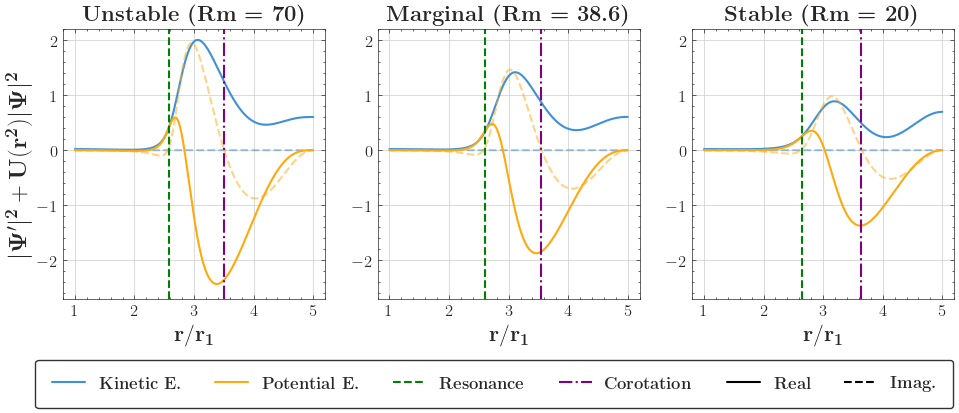

In [ ]:
## Plot Energy Density (Components)
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset
import matplotlib
from matplotlib.lines import Line2D
## Plot Energy Density

E_US = psip_US*np.conjugate(psip_US) + Ur_US*psi_US*np.conjugate(psi_US)
E_MS = psip_MS*np.conjugate(psip_MS) + Ur_MS*psi_MS*np.conjugate(psi_MS)
E_S = psip_S*np.conjugate(psip_S) + Ur_S*psi_S*np.conjugate(psi_S)

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (11.5,3.5))

ax1.set_ylabel(r"$\mathbf{|\Psi'|^2 + U(r^2)|\Psi|^2}$", fontsize = 18)
ax1.plot(r, ((psip_US*np.conjugate(psip_US))).real, color = color_arr[0], label = r'\textbf{Kinetic E.}')
ax1.plot(r, ((psip_US*np.conjugate(psip_US))).imag, color = color_arr[0], linestyle = 'dashed', alpha = 0.5)
ax1.plot(r, ((Ur_US*psi_US*np.conjugate(psi_US))).real, color = color_arr[1], label = r'\textbf{Potential E.}')
ax1.plot(r, ((Ur_US*psi_US*np.conjugate(psi_US))).imag, color = color_arr[1], linestyle = 'dashed', alpha = 0.5)
ax1.axvline(x=r_vec_US[1], linestyle = '--', color = 'green', label = r'\textbf{Resonance}')
ax1.axvline(x=r_vec_US[4], linestyle = '-.', color = 'purple', label = r'\textbf{Corotation}')

ax2.plot(r, ((psip_MS*np.conjugate(psip_MS))).real, color = color_arr[0])
ax2.plot(r, ((psip_MS*np.conjugate(psip_MS))).imag, color = color_arr[0], linestyle = 'dashed', alpha = 0.5)
ax2.plot(r, ((Ur_MS*psi_MS*np.conjugate(psi_MS))).real, color = color_arr[1])
ax2.plot(r, ((Ur_MS*psi_MS*np.conjugate(psi_MS))).imag, color = color_arr[1], linestyle = 'dashed', alpha = 0.5)
ax2.axvline(x=r_vec_MS[1], linestyle = '--', color = 'green')
ax2.axvline(x=r_vec_MS[4], linestyle = '-.', color = 'purple')


ax3.plot(r, ((psip_S*np.conjugate(psip_S))).real, color = color_arr[0])
ax3.plot(r, ((psip_S*np.conjugate(psip_S))).imag, color = color_arr[0], linestyle = 'dashed', alpha = 0.5)
ax3.plot(r, ((Ur_S*psi_S*np.conjugate(psi_S))).real, color = color_arr[1])
ax3.plot(r, ((Ur_S*psi_S*np.conjugate(psi_S))).imag, color = color_arr[1], linestyle = 'dashed', alpha = 0.5)
ax3.axvline(x=r_vec_S[1], linestyle = '--', color = 'green')
ax3.axvline(x=r_vec_S[4], linestyle = '-.', color = 'purple')
\

# Add the legend
# ax3.legend(handles=combined_legend, loc='upper left', title = 'Rm = 20')
ax1.set_ylim(-2.7,2.2)
ax2.set_ylim(-2.7,2.2)
ax3.set_ylim(-2.7,2.2)

ax1.set_xlabel(r'$\mathbf{r/r_1}$', fontsize = 16)
ax1.set_title(r'\textbf{Unstable (Rm = 70)}', fontsize = 16)
ax2.set_xlabel(r'$\mathbf{r/r_1}$', fontsize = 16)
ax2.set_title(r'\textbf{Marginal (Rm = 38.6)}', fontsize = 16)
ax3.set_xlabel(r'$\mathbf{r/r_1}$', fontsize = 16)
ax3.set_title(r'\textbf{Stable (Rm = 20)}', fontsize = 16)



lines_labels = [ax2.get_legend_handles_labels() for ax2 in fig.axes]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]

dummy_black_line = Line2D([0], [0], color='black', linestyle='-', label=r'\textbf{Real}')
dummy_black_dotted_line = Line2D([0], [0], color='black', linestyle='--', label=r'\textbf{Imag.}')

# Add the dummy entries to the legend
lines += [dummy_black_line, dummy_black_dotted_line]
labels += [r'\textbf{Real}', r'\textbf{Imag.}']

# Create the legend below the plot
fig.legend(lines, labels, loc='lower center', ncol=6, 
           bbox_to_anchor=(0.5, -0.25),  # Position the legend below the plot
           frameon=True,  # Turn on the frame (border)
           edgecolor='black',  # Set the border color
           facecolor='white',  # Set the background color of the legend box
           borderpad=1,  # Padding between the legend text and the border
           borderaxespad=1, fontsize = 12)



plt.savefig(f'Potentials-Non-Ideal/' + type + f'_{kn}k1-E' +'-' + flow_type + f'-{r2}r1-Bz' + f'-ETA{int(eta)}-Pm{int(Pm)}' + '-Comb.png', bbox_inches='tight', dpi = 500)
plt.savefig(f'Potentials-Non-Ideal/' + type + f'_{kn}k1-E' +'-' + flow_type + f'-{r2}r1-Bz' + f'-ETA{int(eta)}-Pm{int(Pm)}' + '-Comb.svg', bbox_inches='tight', format = 'svg')
plt.savefig(f'Potentials-Non-Ideal/' + type + f'_{kn}k1-E' +'-' + flow_type + f'-{r2}r1-Bz' + f'-ETA{int(eta)}-Pm{int(Pm)}' + '-Comb.pdf', bbox_inches='tight', dpi = 500)

plt.show()

In [136]:
E_US = psip_US*np.conjugate(psip_US) + Ur_US*psi_US*np.conjugate(psi_US)
E_MS = psip_MS*np.conjugate(psip_MS) + Ur_MS*psi_MS*np.conjugate(psi_MS)
E_S = psip_S*np.conjugate(psip_S) + Ur_S*psi_S*np.conjugate(psi_S)

print('Unstable Energy')
print(np.average(E_US.real))
print(np.average(E_US.imag))
print('MStable Energy')
print(np.average(E_MS.real))
print(np.average(E_MS.imag))
print('Stable Energy')
print(np.average(E_S.real))
print(np.average(E_S.imag))

Unstable Energy
0.00018287616142004503
-1.736440304264587e-14
MStable Energy
0.0001835274845758267
1.0898208454121329e-13
Stable Energy
0.00021062176313774622
4.772938009104232e-16


# MCI Modes Overlaid

#### 5r1 Modes

In [21]:
##### SET PARAMETERS #####
color_arr = ['#3F90DA', '#FFA90E', '#BD1F01', '#94A4A2', '#832DB6', '#A96B59', '#E76300', '#B9AC70', '#92DADD']
r1 = 0.1
q = 1/2
type = 'MCI'
elecd = 0
eta = elecd
Pm = 0
m = 1
kn = 1
kz = kn*np.pi/(4)
VA_N = 0.2
Bz = VA_N* (r1*Omega0*np.sqrt(rho*mu_0)*10000)
B0 = 0

r1 = 1
r2 = 5
r3 = 5.5
rp = np.linspace(0.1, r3, 50000)
rp = np.linspace(1, r2, 50000)
reso = 5000

## PLOT ALL
r = np.linspace(1, r2, 500)
q_mag = np.pi**2
q2r_sc = q_mag*1/r**2
q2rp_sc = q_mag*(-2/r**3)
q2rpp_sc = q_mag*(6/r**4)
q2i_sc = q_mag*np.zeros(len(r))
q2ip_sc = q_mag*np.zeros(len(r))
q2ipp_sc = q_mag*np.zeros(len(r))

ones_arr = np.ones(len(r)) 
k2 = (q2r_sc + 1j*q2i_sc) + m**2/r**2 + kz**2 * ones_arr
k2p = ((q2rp_sc + 1j*q2ip_sc) - 2 * m**2/r**3) ## just changed from d/dr
k2pp = ((q2rpp_sc + 1j*q2ipp_sc) + 6 * m**2/r**4) ## just changed from d/dr

k2r_curr = i2.CubicSpline(r, k2.real)
k2i_curr = i2.CubicSpline(r, k2.imag)
k2rp_curr = i2.CubicSpline(r, k2p.real)
k2ip_curr = i2.CubicSpline(r, k2p.imag)
k2rpp_curr = i2.CubicSpline(r, k2pp.real)
k2ipp_curr = i2.CubicSpline(r, k2pp.imag)


############## Kep
##### SET PARAMETERS #####
flow_select = True
r1 = 0.1

guess = 0.20842493869626805+0.03220689414962033j
VA_N = 0.2
Bz = VA_N* (r1*Omega0*np.sqrt(rho*mu_0)*10000)
# guess = 0.13842493869626805+0.03520689414962033j
# guess = (0.14822091614105792+0.030059885804530142j)

Ur_Kep = getU_NIx(rp, guess, eta, Pm, k2r_curr, k2rp_curr, k2rpp_curr, k2i_curr, k2ip_curr, k2ipp_curr, m, kz, B0, Bz, flow_select, 1)
Ur_Kep_flow = getU_NIx(rp, guess, eta, Pm, k2r_curr, k2rp_curr, k2rpp_curr, k2i_curr, k2ip_curr, k2ipp_curr, m, kz, B0, Bz, flow_select, 1, 1/2,'flow')
Ur_Kep_prime = getU_NIx(rp, guess, eta, Pm, k2r_curr, k2rp_curr, k2rpp_curr, k2i_curr, k2ip_curr, k2ipp_curr, m, kz, B0, Bz, flow_select, 1, 1/2,'prime')
Ur_Kep_fppdf = getU_NIx(rp, guess, eta, Pm, k2r_curr, k2rp_curr, k2rpp_curr, k2i_curr, k2ip_curr, k2ipp_curr, m, kz, B0, Bz, flow_select, 1, 1/2,'fppdf')
Ur_Kep_fpdf = getU_NIx(rp, guess, eta, Pm, k2r_curr, k2rp_curr, k2rpp_curr, k2i_curr, k2ip_curr, k2ipp_curr, m, kz, B0, Bz, flow_select, 1, 1/2,'fpdf')
Ur_Kep_f1 = getU_NIx(rp, guess, eta, Pm, k2r_curr, k2rp_curr, k2rpp_curr, k2i_curr, k2ip_curr, k2ipp_curr, m, kz, B0, Bz, flow_select, 1, 1/2,'f1')
Ur_Kep_f2 = getU_NIx(rp, guess, eta, Pm, k2r_curr, k2rp_curr, k2rpp_curr, k2i_curr, k2ip_curr, k2ipp_curr, m, kz, B0, Bz, flow_select, 1, 1/2,'f2')
Ur_Kep_f3 = getU_NIx(rp, guess, eta, Pm, k2r_curr, k2rp_curr, k2rpp_curr, k2i_curr, k2ip_curr, k2ipp_curr, m, kz, B0, Bz, flow_select, 1, 1/2,'f3')
Ur_Kep_f4 = getU_NIx(rp, guess, eta, Pm, k2r_curr, k2rp_curr, k2rpp_curr, k2i_curr, k2ip_curr, k2ipp_curr, m, kz, B0, Bz, flow_select, 1, 1/2,'f4')

result = o.root_scalar(shoot_hain_v3, method='secant', x0=guess*(1.00005+1e-6j), x1=guess*(0.99995-1e-6j), args=(eta, Pm, k2r_curr, k2rp_curr, k2i_curr, k2ip_curr, kz, m, B0, Bz, flow_select, 1, r2,reso), maxiter=5000)
guess0 = result.root
y0 = [0.,(1.+1j)*1e-1]  
y = integ.solve_ivp(shoot_setup_hain_v2, [1,r2**2], y0, args=(guess,eta, Pm, k2r_curr, k2rp_curr, k2i_curr, k2ip_curr, m,kz,B0,Bz,flow_select, 1), max_step=24./reso)
r_Kep = np.sqrt(y.t)
u_Kep = y.y[0]
r_vec_Kep = shr.resonance_res_krcomp_v8(r2, guess0, m, eta, Pm, k2r_curr, k2i_curr, kz, Bz, B0,flow_select, q)
print(result)

############## Sat
##### SET PARAMETERS #####
flow_select = 'exp4' ### Exp1


guess = 0.34979311853003775+0.033580309325329925j
Ur_Sat = getU_NIx(rp, guess, eta, Pm, k2r_curr, k2rp_curr, k2rpp_curr, k2i_curr, k2ip_curr, k2ipp_curr, m, kz, B0, Bz, flow_select, 1)
Ur_Sat_flow = getU_NIx(rp, guess, eta, Pm, k2r_curr, k2rp_curr, k2rpp_curr, k2i_curr, k2ip_curr, k2ipp_curr, m, kz, B0, Bz, flow_select, 1,1/2, 'flow')
Ur_Sat_prime = getU_NIx(rp, guess, eta, Pm, k2r_curr, k2rp_curr, k2rpp_curr, k2i_curr, k2ip_curr, k2ipp_curr, m, kz, B0, Bz, flow_select, 1,1/2, 'prime')
Ur_Sat_fppdf = getU_NIx(rp, guess, eta, Pm, k2r_curr, k2rp_curr, k2rpp_curr, k2i_curr, k2ip_curr, k2ipp_curr, m, kz, B0, Bz, flow_select, 1,1/2, 'fppdf')
Ur_Sat_fpdf = getU_NIx(rp, guess, eta, Pm, k2r_curr, k2rp_curr, k2rpp_curr, k2i_curr, k2ip_curr, k2ipp_curr, m, kz, B0, Bz, flow_select, 1,1/2, 'fpdf')
Ur_Sat_f1 = getU_NIx(rp, guess, eta, Pm, k2r_curr, k2rp_curr, k2rpp_curr, k2i_curr, k2ip_curr, k2ipp_curr, m, kz, B0, Bz, flow_select, 1,1/2, 'f1')
Ur_Sat_f2 = getU_NIx(rp, guess, eta, Pm, k2r_curr, k2rp_curr, k2rpp_curr, k2i_curr, k2ip_curr, k2ipp_curr, m, kz, B0, Bz, flow_select, 1,1/2, 'f2')
Ur_Sat_f3 = getU_NIx(rp, guess, eta, Pm, k2r_curr, k2rp_curr, k2rpp_curr, k2i_curr, k2ip_curr, k2ipp_curr, m, kz, B0, Bz, flow_select, 1,1/2, 'f3')
Ur_Sat_f4 = getU_NIx(rp, guess, eta, Pm, k2r_curr, k2rp_curr, k2rpp_curr, k2i_curr, k2ip_curr, k2ipp_curr, m, kz, B0, Bz, flow_select, 1,1/2, 'f4')

result = o.root_scalar(shoot_hain_v3, method='secant', x0=guess*(1.00005+1e-6j), x1=guess*(0.99995-1e-6j), args=(eta, Pm, k2r_curr, k2rp_curr, k2i_curr, k2ip_curr, kz, m, B0, Bz, flow_select, 1, r2,reso), maxiter=5000)
guess0 = result.root
y0 = [0.,(1.+1j)*1e-1]  
y = integ.solve_ivp(shoot_setup_hain_v2, [1,r2**2], y0, args=(guess,eta, Pm, k2r_curr, k2rp_curr, k2i_curr, k2ip_curr, m,kz,B0,Bz,flow_select, 1), max_step=24./reso)
r_Sat = np.sqrt(y.t)
u_Sat = y.y[0]
r_vec_Sat = shr.resonance_res_krcomp_v8(r2, guess0, m, eta, Pm, k2r_curr, k2i_curr, kz, Bz, B0,flow_select, q)
print(result)

############## Sh2
##### SET PARAMETERS #####
flow_select = 'exp5' ### Exp2



guess = 0.25212448111986324+0.0366375661793521j
Ur_Sh2 = getU_NIx(rp, guess, eta, Pm, k2r_curr, k2rp_curr, k2rpp_curr, k2i_curr, k2ip_curr, k2ipp_curr, m, kz, B0, Bz, flow_select, 1)
Ur_Sh2_flow = getU_NIx(rp, guess, eta, Pm, k2r_curr, k2rp_curr, k2rpp_curr, k2i_curr, k2ip_curr, k2ipp_curr, m, kz, B0, Bz, flow_select, 1,1/2, 'flow')
Ur_Sh2_prime = getU_NIx(rp, guess, eta, Pm, k2r_curr, k2rp_curr, k2rpp_curr, k2i_curr, k2ip_curr, k2ipp_curr, m, kz, B0, Bz, flow_select, 1,1/2, 'prime')
Ur_Sh2_fppdf = getU_NIx(rp, guess, eta, Pm, k2r_curr, k2rp_curr, k2rpp_curr, k2i_curr, k2ip_curr, k2ipp_curr, m, kz, B0, Bz, flow_select, 1,1/2, 'fppdf')
Ur_Sh2_fpdf = getU_NIx(rp, guess, eta, Pm, k2r_curr, k2rp_curr, k2rpp_curr, k2i_curr, k2ip_curr, k2ipp_curr, m, kz, B0, Bz, flow_select, 1,1/2, 'fpdf')
Ur_Sh2_f1 = getU_NIx(rp, guess, eta, Pm, k2r_curr, k2rp_curr, k2rpp_curr, k2i_curr, k2ip_curr, k2ipp_curr, m, kz, B0, Bz, flow_select, 1,1/2, 'f1')
Ur_Sh2_f2 = getU_NIx(rp, guess, eta, Pm, k2r_curr, k2rp_curr, k2rpp_curr, k2i_curr, k2ip_curr, k2ipp_curr, m, kz, B0, Bz, flow_select, 1,1/2, 'f2')
Ur_Sh2_f3 = getU_NIx(rp, guess, eta, Pm, k2r_curr, k2rp_curr, k2rpp_curr, k2i_curr, k2ip_curr, k2ipp_curr, m, kz, B0, Bz, flow_select, 1,1/2, 'f3')
Ur_Sh2_f4 = getU_NIx(rp, guess, eta, Pm, k2r_curr, k2rp_curr, k2rpp_curr, k2i_curr, k2ip_curr, k2ipp_curr, m, kz, B0, Bz, flow_select, 1,1/2, 'f4')

result = o.root_scalar(shoot_hain_v3, method='secant', x0=guess*(1.00005+1e-6j), x1=guess*(0.99995-1e-6j), args=(eta, Pm, k2r_curr, k2rp_curr, k2i_curr, k2ip_curr, kz, m, B0, Bz, flow_select, 1, r2,reso), maxiter=5000)
guess0 = result.root
y0 = [0.,(1.+1j)*1e-1]  
y = integ.solve_ivp(shoot_setup_hain_v2, [1,r2**2], y0, args=(guess,eta, Pm, k2r_curr, k2rp_curr, k2i_curr, k2ip_curr, m,kz,B0,Bz,flow_select, 1), max_step=24./reso)
r_Sh2 = np.sqrt(y.t)
u_Sh2 = y.y[0]
r_vec_Sh2 = shr.resonance_res_krcomp_v8(r2, guess0, m, eta, Pm, k2r_curr, k2i_curr, kz, Bz, B0,flow_select, q)
print(result)

############## Tanh
##### SET PARAMETERS #####
flow_select = 'exp6' ### Exp3


guess = 0.2210250146410391+0.02360034089150962j
Ur_Tanh = getU_NIx(rp, guess, eta, Pm, k2r_curr, k2rp_curr, k2rpp_curr, k2i_curr, k2ip_curr, k2ipp_curr, m, kz, B0, Bz, flow_select, 1)
Ur_Tanh_flow = getU_NIx(rp, guess, eta, Pm, k2r_curr, k2rp_curr, k2rpp_curr, k2i_curr, k2ip_curr, k2ipp_curr, m, kz, B0, Bz, flow_select, 1,1/2, 'flow')
Ur_Tanh_prime = getU_NIx(rp, guess, eta, Pm, k2r_curr, k2rp_curr, k2rpp_curr, k2i_curr, k2ip_curr, k2ipp_curr, m, kz, B0, Bz, flow_select, 1,1/2, 'prime')
Ur_Tanh_fppdf = getU_NIx(rp, guess, eta, Pm, k2r_curr, k2rp_curr, k2rpp_curr, k2i_curr, k2ip_curr, k2ipp_curr, m, kz, B0, Bz, flow_select, 1,1/2, 'fppdf')
Ur_Tanh_fpdf = getU_NIx(rp, guess, eta, Pm, k2r_curr, k2rp_curr, k2rpp_curr, k2i_curr, k2ip_curr, k2ipp_curr, m, kz, B0, Bz, flow_select, 1,1/2, 'fpdf')
Ur_Tanh_f1 = getU_NIx(rp, guess, eta, Pm, k2r_curr, k2rp_curr, k2rpp_curr, k2i_curr, k2ip_curr, k2ipp_curr, m, kz, B0, Bz, flow_select, 1,1/2, 'f1')
Ur_Tanh_f2 = getU_NIx(rp, guess, eta, Pm, k2r_curr, k2rp_curr, k2rpp_curr, k2i_curr, k2ip_curr, k2ipp_curr, m, kz, B0, Bz, flow_select, 1,1/2, 'f2')
Ur_Tanh_f3 = getU_NIx(rp, guess, eta, Pm, k2r_curr, k2rp_curr, k2rpp_curr, k2i_curr, k2ip_curr, k2ipp_curr, m, kz, B0, Bz, flow_select, 1,1/2, 'f3')
Ur_Tanh_f4 = getU_NIx(rp, guess, eta, Pm, k2r_curr, k2rp_curr, k2rpp_curr, k2i_curr, k2ip_curr, k2ipp_curr, m, kz, B0, Bz, flow_select, 1,1/2, 'f4')

result = o.root_scalar(shoot_hain_v3, method='secant', x0=guess*(1.00005+1e-6j), x1=guess*(0.99995-1e-6j), args=(eta, Pm, k2r_curr, k2rp_curr, k2i_curr, k2ip_curr, kz, m, B0, Bz, flow_select, 1, r2,reso), maxiter=5000)
guess0 = result.root
y0 = [0.,(1.+1j)*1e-1]  
y = integ.solve_ivp(shoot_setup_hain_v2, [1,r2**2], y0, args=(guess,eta, Pm, k2r_curr, k2rp_curr, k2i_curr, k2ip_curr, m,kz,B0,Bz,flow_select, 1), max_step=24./reso)
r_Tanh = np.sqrt(y.t)
u_Tanh = y.y[0]
r_vec_Tanh = shr.resonance_res_krcomp_v8(r2, guess0, m, eta, Pm, k2r_curr, k2i_curr, kz, Bz, B0,flow_select, q)
print(result)


g_dr = [0. 0. 0. ... 0. 0. 0.]
<U> = -1.0
<f1> = 1.0
<f2G + f3G^2> = -1.0
<f4Gp> = -1.0 

      converged: True
           flag: converged
 function_calls: 3
     iterations: 2
           root: (0.2084249386962455+0.03220689414910724j)
         method: secant
g_dr = [0. 0. 0. ... 0. 0. 0.]
<U> = -1.0
<f1> = -1.0
<f2G + f3G^2> = -1.0
<f4Gp> = -1.0 

      converged: True
           flag: converged
 function_calls: 3
     iterations: 2
           root: (0.34979311853190764+0.03358030932681712j)
         method: secant
g_dr = [0. 0. 0. ... 0. 0. 0.]
<U> = -1.0
<f1> = 1.0
<f2G + f3G^2> = -1.0
<f4Gp> = -1.0 

      converged: True
           flag: converged
 function_calls: 3
     iterations: 2
           root: (0.2521244795608317+0.036637569936456595j)
         method: secant
g_dr = [0. 0. 0. ... 0. 0. 0.]
<U> = -1.0
<f1> = 1.0
<f2G + f3G^2> = -1.0
<f4Gp> = -1.0 

      converged: True
           flag: converged
 function_calls: 3
     iterations: 2
           root: (0.2210312377214767+0.0

#### Plotting Vorticity Parts of Potential

C:\Users\Alex\AppData\Local\Temp\ipykernel_58832\3364368328.py:181: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


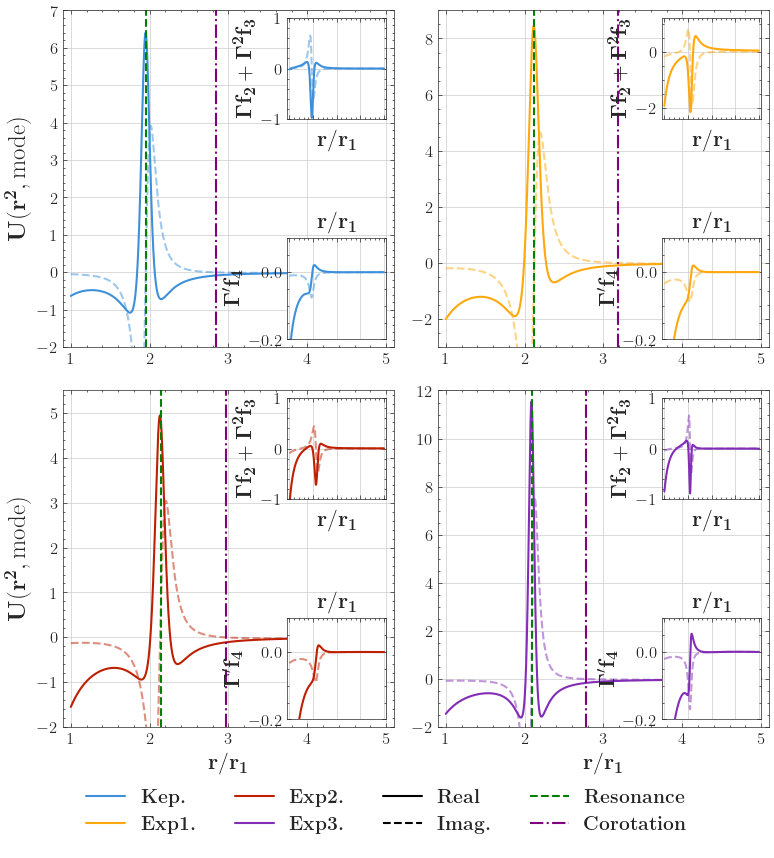

In [25]:
### PLOT Ur
c0_desat = sns.desaturate(color_arr[0], 0.1)
c1_desat = sns.desaturate(color_arr[1], 0.1)
c2_desat = sns.desaturate(color_arr[2], 0.1)
c4_desat = sns.desaturate(color_arr[4], 0.1)

# plt.figure(figsize=(5,5))
fig, ax = plt.subplots(2,2, figsize=(8, 8))

ax[0][0].plot(rp, Ur_Kep.real, label=r'\textbf{Kep.}', color = color_arr[0])
ax[0][1].plot(rp, Ur_Sat.real, label=r'\textbf{Sat.}', color = color_arr[1])
ax[1][0].plot(rp, Ur_Sh2.real, label=r'\textbf{Sh2.}', color = color_arr[2])
ax[1][1].plot(rp, Ur_Tanh.real, label=r'\textbf{Tanh.}', color = color_arr[4])

ax[0][0].plot(rp, Ur_Kep.imag, color = color_arr[0], linestyle = 'dashed', alpha = 0.5)
ax[0][1].plot(rp, Ur_Sat.imag, color = color_arr[1], linestyle = 'dashed', alpha = 0.5)
ax[1][0].plot(rp, Ur_Sh2.imag, color = color_arr[2], linestyle = 'dashed', alpha = 0.5)
ax[1][1].plot(rp, Ur_Tanh.imag, color = color_arr[4], linestyle = 'dashed', alpha = 0.5)

ax[0][0].axvline(x=r_vec_Kep[0], linestyle = '--', color = 'green', label = r'\textbf{Resonance}')
ax[0][0].axvline(x=r_vec_Kep[1], linestyle = '--', color = 'green', label = r'\textbf{Resonance}')
ax[0][0].axvline(x=r_vec_Kep[4], linestyle = '-.', color = 'purple')
ax[0][1].axvline(x=r_vec_Sat[0], linestyle = '--', color = 'green', label = r'\textbf{Resonance}')
ax[0][1].axvline(x=r_vec_Sat[1], linestyle = '--', color = 'green', label = r'\textbf{Resonance}')
ax[0][1].axvline(x=r_vec_Sat[4], linestyle = '-.', color = 'purple')
ax[1][0].axvline(x=r_vec_Sh2[0], linestyle = '--', color = 'green', label = r'\textbf{Resonance}')
ax[1][0].axvline(x=r_vec_Sh2[1], linestyle = '--', color = 'green', label = r'\textbf{Resonance}')
ax[1][0].axvline(x=r_vec_Sh2[4], linestyle = '-.', color = 'purple')
ax[1][1].axvline(x=r_vec_Tanh[0], linestyle = '--', color = 'green', label = r'\textbf{Resonance}')
ax[1][1].axvline(x=r_vec_Tanh[1], linestyle = '--', color = 'green', label = r'\textbf{Resonance}')
ax[1][1].axvline(x=r_vec_Tanh[4], linestyle = '-.', color = 'purple')

# ax.plot(rp, Ur_Kep.imag, color = color_arr[0], linestyle = '--', alpha = 0.5)
# ax.plot(rp, Ur_Sat.imag, color = color_arr[1], linestyle = '--', alpha = 0.5)
# ax.plot(rp, Ur_Sh2.imag, color = color_arr[2], linestyle = '--', alpha = 0.5)
# ax.plot(rp, Ur_Tanh.imag, color = color_arr[4], linestyle = '--', alpha = 0.5)

#### PLOT FLOW SHEAR energy
ax_inset = inset_axes(ax[0][0], width="30%", height="30%", loc='upper right')
ax_inset.set_xticks(range(1,6))
ax_inset.axes.xaxis.set_ticklabels([])
ax_inset.set_xlabel(r'$\mathbf{r/r_1}$', fontsize = 16)
ax_inset.set_ylabel(r"$\mathbf{\Gamma f_2 + \Gamma^2 f_3}$", fontsize = 16)
ax_inset.plot(rp, (Ur_Kep_f2+Ur_Kep_f3).real, color = color_arr[0])
ax_inset.plot(rp, (Ur_Kep_f2+Ur_Kep_f3).imag, color = color_arr[0], linestyle = 'dashed', alpha = 0.5)
ax_inset.set_ylim(-1.,1)

ax_inset.set_xlim(0.9, 5.1)

#### PLOT FLOW SHEAR energy
ax_inset = inset_axes(ax[0][1], width="30%", height="30%", loc='upper right')
ax_inset.set_xticks(range(1,6))
ax_inset.axes.xaxis.set_ticklabels([])
ax_inset.set_xlabel(r'$\mathbf{r/r_1}$', fontsize = 16)
ax_inset.set_ylabel(r"$\mathbf{\Gamma f_2 + \Gamma^2 f_3}$", fontsize = 16)
ax_inset.plot(rp, (Ur_Sat_f2+Ur_Sat_f3).real, color = color_arr[1])
ax_inset.plot(rp, (Ur_Sat_f2+Ur_Sat_f3).imag, color = color_arr[1], linestyle = 'dashed', alpha = 0.5)
ax_inset.set_ylim(-2.4,1.2)
ax_inset.set_xlim(0.9, 5.1)

#### PLOT FLOW SHEAR energy
ax_inset = inset_axes(ax[1][0], width="30%", height="30%", loc='upper right')
ax_inset.set_xticks(range(1,6))
ax_inset.axes.xaxis.set_ticklabels([])
ax_inset.set_xlabel(r'$\mathbf{r/r_1}$', fontsize = 16)
ax_inset.set_ylabel(r"$\mathbf{\Gamma f_2 + \Gamma^2 f_3}$", fontsize = 16)
ax_inset.plot(rp, (Ur_Sh2_f2+Ur_Sh2_f3).real, color = color_arr[2])
ax_inset.plot(rp, (Ur_Sh2_f2+Ur_Sh2_f3).imag, color = color_arr[2], linestyle = 'dashed', alpha = 0.5)
ax_inset.set_ylim(-1.,1)

ax_inset.set_xlim(0.9, 5.1)

#### PLOT FLOW SHEAR energy
ax_inset = inset_axes(ax[1][1], width="30%", height="30%", loc='upper right')
ax_inset.set_xticks(range(1,6))
ax_inset.axes.xaxis.set_ticklabels([])
ax_inset.set_xlabel(r'$\mathbf{r/r_1}$', fontsize = 16)
ax_inset.set_ylabel(r"$\mathbf{\Gamma f_2 + \Gamma^2 f_3}$", fontsize = 16)
ax_inset.plot(rp, Ur_Tanh_f2.real, color = color_arr[4])
ax_inset.plot(rp, Ur_Tanh_f2.imag, color = color_arr[4], linestyle = 'dashed', alpha = 0.5)
ax_inset.set_ylim(-1.,1)

ax_inset.set_xlim(0.9, 5.1)

#### PLOT LOWER PLOTS
ax_inset = inset_axes(ax[0][0], width="30%", height="30%", loc='lower right')
ax_inset.set_xticks(range(1,6))
ax_inset.axes.xaxis.set_ticklabels([])
ax_inset.set_xlabel(r'$\mathbf{r/r_1}$', fontsize = 16)
ax_inset.set_ylabel(r"$\mathbf{\Gamma'f_4}$", fontsize = 16)
ax_inset.plot(rp, (Ur_Kep_f4).real, color = color_arr[0])
ax_inset.plot(rp, (Ur_Kep_f4).imag, color = color_arr[0], linestyle = 'dashed', alpha = 0.5)
ax_inset.set_ylim(-.2,.1)
ax_inset.set_xlim(0.9, 5.1)
ax_inset.xaxis.set_label_position('top')
ax_inset.xaxis.set_ticks_position('top')

#### PLOT Mode structure
ax_inset = inset_axes(ax[0][1], width="30%", height="30%", loc='lower right')
ax_inset.set_xticks(range(1,6))
ax_inset.axes.xaxis.set_ticklabels([])
ax_inset.set_xlabel(r'$\mathbf{r/r_1}$', fontsize = 16)
ax_inset.set_ylabel(r"$\mathbf{\Gamma'f_4}$", fontsize = 16)
ax_inset.plot(rp, (Ur_Sat_f4).real, color = color_arr[1])
ax_inset.plot(rp, (Ur_Sat_f4).imag, color = color_arr[1], linestyle = 'dashed', alpha = 0.5)
ax_inset.set_ylim(-.2,.1)
ax_inset.set_xlim(0.9, 5.1)
ax_inset.xaxis.set_label_position('top')
ax_inset.xaxis.set_ticks_position('top')

#### PLOT Mode structure
ax_inset = inset_axes(ax[1][0], width="30%", height="30%", loc='lower right')
ax_inset.set_xticks(range(1,6))
ax_inset.axes.xaxis.set_ticklabels([])
ax_inset.set_xlabel(r'$\mathbf{r/r_1}$', fontsize = 16)
ax_inset.set_ylabel(r"$\mathbf{\Gamma'f_4}$", fontsize = 16)
ax_inset.plot(rp, (Ur_Sh2_f4).real, color = color_arr[2])
ax_inset.plot(rp, (Ur_Sh2_f4).imag, color = color_arr[2], linestyle = 'dashed', alpha = 0.5)
ax_inset.set_ylim(-.2,.1)
ax_inset.set_xlim(0.9, 5.1)
ax_inset.xaxis.set_label_position('top')
ax_inset.xaxis.set_ticks_position('top')

#### PLOT Mode structure
ax_inset = inset_axes(ax[1][1], width="30%", height="30%", loc='lower right')
ax_inset.set_xticks(range(1,6))
ax_inset.axes.xaxis.set_ticklabels([])
ax_inset.set_xlabel(r'$\mathbf{r/r_1}$', fontsize = 16)
ax_inset.set_ylabel(r"$\mathbf{\Gamma'f_4}$", fontsize = 16)
ax_inset.plot(rp, (Ur_Tanh_f4).real, color = color_arr[4])
ax_inset.plot(rp, (Ur_Tanh_f4).imag, color = color_arr[4], linestyle = 'dashed', alpha = 0.5)
ax_inset.set_ylim(-.2,.1)
ax_inset.set_xlim(0.9, 5.1)
ax_inset.xaxis.set_label_position('top')
ax_inset.xaxis.set_ticks_position('top')

# ######### Settings
ax[0][0].set_ylabel(r"$\mathbf{U(r^2, \mathrm{mode})}$",fontsize=18)
ax[0][0].set_xlim(0.9, 5.1)
ax[0][0].set_ylim(-2,7)

ax[0][1].set_xlim(0.9, 5.1)
ax[0][1].set_ylim(-3,9)

ax[1][0].set_xlabel(r'$\mathbf{r/r_1}$',fontsize=16)
ax[1][0].set_ylabel(r"$\mathbf{U(r^2, \mathrm{mode})}$",fontsize=18)
ax[1][0].set_xlim(0.9, 5.1)
ax[1][0].set_ylim(-2,5.5)

ax[1][1].set_xlabel(r'$\mathbf{r/r_1}$',fontsize=16)
ax[1][1].set_xlim(0.9, 5.1)
ax[1][1].set_ylim(-2,12)

from matplotlib.lines import Line2D


K = Line2D([0], [0], color=color_arr[0], linestyle='-', label=r'\textbf{Kep.}')
S = Line2D([0], [0], color=color_arr[1], linestyle='-', label=r'\textbf{Sat.}')
Sh = Line2D([0], [0], color=color_arr[2], linestyle='-', label=r'\textbf{Sh2.}')
Ta = Line2D([0], [0], color=color_arr[4], linestyle='-', label=r'\textbf{Tanh.}')

R1 = Line2D([0], [0], color='black', linestyle='-')
I1 = Line2D([0], [0], color='black', linestyle='--')

R2 = Line2D([0], [0], color='green', linestyle='--')
I2 = Line2D([0], [0], color='purple', linestyle='-.')

# Add the dummy entries to the legend
lines = [K,S, Sh, Ta, R1, I1, R2, I2]
labels = [r'\textbf{Kep.}', r'\textbf{Exp1.}', r'\textbf{Exp2.}', r'\textbf{Exp3.}', r'\textbf{Real}', r'\textbf{Imag.}', r'\textbf{Resonance}', r'\textbf{Corotation}']

# Create the legend below the plot
fig.legend(lines, labels, loc='lower center', ncol=4, 
           bbox_to_anchor=(0.5, -0.1),  # Position the legend below the plot
           frameon=False,  # Turn on the frame (border)
           edgecolor='black',  # Set the border color
           facecolor='white',  # Set the background color of the legend box
           borderpad=1,  # Padding between the legend text and the border
           borderaxespad=1, fontsize = 14)

plt.tight_layout()
# plt.savefig(f'Potentials-Non-Ideal/' + type + f'_{kn}k1-potential' +'-Comb-5r1-Bz' + '.png', bbox_inches='tight', dpi = 500)
# plt.savefig(f'Potentials-Non-Ideal/' + type + f'_{kn}k1-potential' +'-Comb-5r1-Bz' + '.svg', bbox_inches='tight', format = 'svg')
plt.savefig(f'Potentials-Non-Ideal/' + type + f'_{kn}k1-potential' +'-Comb-5r1-Exp-Vort-Bz' + '.pdf', bbox_inches='tight', dpi = 500)

plt.show()

# MRI Modes Overlaid (Exp)

In [48]:
##### SET PARAMETERS #####
color_arr = ['#3F90DA', '#FFA90E', '#BD1F01', '#94A4A2', '#832DB6', '#A96B59', '#E76300', '#B9AC70', '#92DADD']
r1 = 0.1
q = 1/2
type = 'MRI'
elecd = 0
eta = elecd
Pm = 0
m = 1
kn = 1
kz = kn*np.pi/(4)
VA_N = 0.2
Bz = VA_N* (r1*Omega0*np.sqrt(rho*mu_0)*10000)
B0 = 0


r1 = 1
r2 = 5
r3 = 5.5
rp = np.linspace(0.1, r3, 50000)
rp = np.linspace(1, r2, 50000)
reso = 5000

## PLOT ALL
r = np.linspace(1, r2, 500)
q_mag = np.pi**2
q2r_sc = q_mag*1/r**2
q2rp_sc = q_mag*(-2/r**3)
q2rpp_sc = q_mag*(6/r**4)
q2i_sc = q_mag*np.zeros(len(r))
q2ip_sc = q_mag*np.zeros(len(r))
q2ipp_sc = q_mag*np.zeros(len(r))

ones_arr = np.ones(len(r)) 
k2 = (q2r_sc + 1j*q2i_sc) + m**2/r**2 + kz**2 * ones_arr
k2p = ((q2rp_sc + 1j*q2ip_sc) - 2 * m**2/r**3) ## just changed from d/dr
k2pp = ((q2rpp_sc + 1j*q2ipp_sc) + 6 * m**2/r**4) ## just changed from d/dr

k2r_curr = i2.CubicSpline(r, k2.real)
k2i_curr = i2.CubicSpline(r, k2.imag)
k2rp_curr = i2.CubicSpline(r, k2p.real)
k2ip_curr = i2.CubicSpline(r, k2p.imag)
k2rpp_curr = i2.CubicSpline(r, k2pp.real)
k2ipp_curr = i2.CubicSpline(r, k2pp.imag)


############## Kep
##### SET PARAMETERS #####
flow_select = True

guess = 0.8420519413847339+0.0012702944202713142j
Ur_Kep = getU_NIx(rp, guess, eta, Pm, k2r_curr, k2rp_curr, k2rpp_curr, k2i_curr, k2ip_curr, k2ipp_curr, m, kz, B0, Bz, flow_select, 1)
Ur_Kep_flow = getU_NIx(rp, guess, eta, Pm, k2r_curr, k2rp_curr, k2rpp_curr, k2i_curr, k2ip_curr, k2ipp_curr, m, kz, B0, Bz, flow_select, 1, 1/2,'flow')
Ur_Kep_prime = getU_NIx(rp, guess, eta, Pm, k2r_curr, k2rp_curr, k2rpp_curr, k2i_curr, k2ip_curr, k2ipp_curr, m, kz, B0, Bz, flow_select, 1, 1/2,'prime')
Ur_Kep_fppdf = getU_NIx(rp, guess, eta, Pm, k2r_curr, k2rp_curr, k2rpp_curr, k2i_curr, k2ip_curr, k2ipp_curr, m, kz, B0, Bz, flow_select, 1, 1/2,'fppdf')
Ur_Kep_fpdf = getU_NIx(rp, guess, eta, Pm, k2r_curr, k2rp_curr, k2rpp_curr, k2i_curr, k2ip_curr, k2ipp_curr, m, kz, B0, Bz, flow_select, 1, 1/2,'fpdf')
Ur_Kep_f1 = getU_NIx(rp, guess, eta, Pm, k2r_curr, k2rp_curr, k2rpp_curr, k2i_curr, k2ip_curr, k2ipp_curr, m, kz, B0, Bz, flow_select, 1, 1/2,'f1')
Ur_Kep_f2 = getU_NIx(rp, guess, eta, Pm, k2r_curr, k2rp_curr, k2rpp_curr, k2i_curr, k2ip_curr, k2ipp_curr, m, kz, B0, Bz, flow_select, 1, 1/2,'f2')
Ur_Kep_f3 = getU_NIx(rp, guess, eta, Pm, k2r_curr, k2rp_curr, k2rpp_curr, k2i_curr, k2ip_curr, k2ipp_curr, m, kz, B0, Bz, flow_select, 1, 1/2,'f3')
Ur_Kep_f4 = getU_NIx(rp, guess, eta, Pm, k2r_curr, k2rp_curr, k2rpp_curr, k2i_curr, k2ip_curr, k2ipp_curr, m, kz, B0, Bz, flow_select, 1, 1/2,'f4')

Ur_Kep_f22 = getU_NIx(rp, guess, eta, Pm, k2r_curr, k2rp_curr, k2rpp_curr, k2i_curr, k2ip_curr, k2ipp_curr, m, kz, B0, Bz, flow_select, 1, 1/2,'f2_2')
Ur_Kep_f12 = getU_NIx(rp, guess, eta, Pm, k2r_curr, k2rp_curr, k2rpp_curr, k2i_curr, k2ip_curr, k2ipp_curr, m, kz, B0, Bz, flow_select, 1, 1/2,'f1_2')

# Exp_U = 1/(r2-r1)*quad(getU_NIx, 1, r2, args=(guess, eta, Pm, k2r_curr, k2rp_curr, k2rpp_curr, k2i_curr, k2ip_curr, k2ipp_curr, m, kz, B0, Bz, flow_select, 1, q))[0]
# print(f'Exp_U = {Exp_U}')
# print(f'f2 = {np.average(Ur_Kep_f2)}')
# print(f'f2_2 = {np.average(Ur_Kep_f22)}')
# print(f'f1 = {np.average(Ur_Kep_f1)}')
# print(f'f1_2 = {np.average(Ur_Kep_f12)}')

result = o.root_scalar(shoot_hain_v3, method='secant', x0=guess*(1.00005+1e-6j), x1=guess*(0.99995-1e-6j), args=(eta, Pm, k2r_curr, k2rp_curr, k2i_curr, k2ip_curr, kz, m, B0, Bz, flow_select, 1, r2,reso), maxiter=5000)
guess0 = result.root
y0 = [0.,(1.+1j)*1e-1]  
y = integ.solve_ivp(shoot_setup_hain_v2, [1,r2**2], y0, args=(guess,eta, Pm, k2r_curr, k2rp_curr, k2i_curr, k2ip_curr, m,kz,B0,Bz,flow_select, 1), max_step=24./reso)
r_Kep = np.sqrt(y.t)
u_Kep = y.y[0]
r_vec_Kep = shr.resonance_res_krcomp_v8(r2, guess0, m, eta, Pm, k2r_curr, k2i_curr, kz, Bz, B0,flow_select, q)

############## Sat
##### SET PARAMETERS #####
flow_select = 'exp4' ### Exp1


guess = 0.8520441524485152+0.009812910876780054j
Ur_Sat = getU_NIx(rp, guess, eta, Pm, k2r_curr, k2rp_curr, k2rpp_curr, k2i_curr, k2ip_curr, k2ipp_curr, m, kz, B0, Bz, flow_select, 1)
Ur_Sat_flow = getU_NIx(rp, guess, eta, Pm, k2r_curr, k2rp_curr, k2rpp_curr, k2i_curr, k2ip_curr, k2ipp_curr, m, kz, B0, Bz, flow_select, 1,1/2, 'flow')
Ur_Sat_prime = getU_NIx(rp, guess, eta, Pm, k2r_curr, k2rp_curr, k2rpp_curr, k2i_curr, k2ip_curr, k2ipp_curr, m, kz, B0, Bz, flow_select, 1,1/2, 'prime')
Ur_Sat_fppdf = getU_NIx(rp, guess, eta, Pm, k2r_curr, k2rp_curr, k2rpp_curr, k2i_curr, k2ip_curr, k2ipp_curr, m, kz, B0, Bz, flow_select, 1,1/2, 'fppdf')
Ur_Sat_fpdf = getU_NIx(rp, guess, eta, Pm, k2r_curr, k2rp_curr, k2rpp_curr, k2i_curr, k2ip_curr, k2ipp_curr, m, kz, B0, Bz, flow_select, 1,1/2, 'fpdf')
Ur_Sat_f1 = getU_NIx(rp, guess, eta, Pm, k2r_curr, k2rp_curr, k2rpp_curr, k2i_curr, k2ip_curr, k2ipp_curr, m, kz, B0, Bz, flow_select, 1,1/2, 'f1')
Ur_Sat_f2 = getU_NIx(rp, guess, eta, Pm, k2r_curr, k2rp_curr, k2rpp_curr, k2i_curr, k2ip_curr, k2ipp_curr, m, kz, B0, Bz, flow_select, 1,1/2, 'f2')
Ur_Sat_f3 = getU_NIx(rp, guess, eta, Pm, k2r_curr, k2rp_curr, k2rpp_curr, k2i_curr, k2ip_curr, k2ipp_curr, m, kz, B0, Bz, flow_select, 1,1/2, 'f3')
Ur_Sat_f4 = getU_NIx(rp, guess, eta, Pm, k2r_curr, k2rp_curr, k2rpp_curr, k2i_curr, k2ip_curr, k2ipp_curr, m, kz, B0, Bz, flow_select, 1,1/2, 'f4')


result = o.root_scalar(shoot_hain_v3, method='secant', x0=guess*(1.00005+1e-6j), x1=guess*(0.99995-1e-6j), args=(eta, Pm, k2r_curr, k2rp_curr, k2i_curr, k2ip_curr, kz, m, B0, Bz, flow_select, 1, r2,reso), maxiter=5000)
guess0 = result.root
y0 = [0.,(1.+1j)*1e-1]  
y = integ.solve_ivp(shoot_setup_hain_v2, [1,r2**2], y0, args=(guess,eta, Pm, k2r_curr, k2rp_curr, k2i_curr, k2ip_curr, m,kz,B0,Bz,flow_select, 1), max_step=24./reso)
r_Sat = np.sqrt(y.t)
u_Sat = y.y[0]
# r_vec_Sat = shr.resonance_res_krcomp_v8(r2, guess0, m, eta, Pm, k2r_curr, k2i_curr, kz, Bz, B0,flow_select, q)
# print(result)

############## Sh2
##### SET PARAMETERS #####
flow_select = 'exp5' ### Exp2



guess = 0.8475661419046426+0.007414870589902397j
Ur_Sh2 = getU_NIx(rp, guess, eta, Pm, k2r_curr, k2rp_curr, k2rpp_curr, k2i_curr, k2ip_curr, k2ipp_curr, m, kz, B0, Bz, flow_select, 1)
Ur_Sh2_flow = getU_NIx(rp, guess, eta, Pm, k2r_curr, k2rp_curr, k2rpp_curr, k2i_curr, k2ip_curr, k2ipp_curr, m, kz, B0, Bz, flow_select, 1,1/2, 'flow')
Ur_Sh2_prime = getU_NIx(rp, guess, eta, Pm, k2r_curr, k2rp_curr, k2rpp_curr, k2i_curr, k2ip_curr, k2ipp_curr, m, kz, B0, Bz, flow_select, 1,1/2, 'prime')
Ur_Sh2_fppdf = getU_NIx(rp, guess, eta, Pm, k2r_curr, k2rp_curr, k2rpp_curr, k2i_curr, k2ip_curr, k2ipp_curr, m, kz, B0, Bz, flow_select, 1,1/2, 'fppdf')
Ur_Sh2_fpdf = getU_NIx(rp, guess, eta, Pm, k2r_curr, k2rp_curr, k2rpp_curr, k2i_curr, k2ip_curr, k2ipp_curr, m, kz, B0, Bz, flow_select, 1,1/2, 'fpdf')
Ur_Sh2_f1 = getU_NIx(rp, guess, eta, Pm, k2r_curr, k2rp_curr, k2rpp_curr, k2i_curr, k2ip_curr, k2ipp_curr, m, kz, B0, Bz, flow_select, 1,1/2, 'f1')
Ur_Sh2_f2 = getU_NIx(rp, guess, eta, Pm, k2r_curr, k2rp_curr, k2rpp_curr, k2i_curr, k2ip_curr, k2ipp_curr, m, kz, B0, Bz, flow_select, 1,1/2, 'f2')
Ur_Sh2_f3 = getU_NIx(rp, guess, eta, Pm, k2r_curr, k2rp_curr, k2rpp_curr, k2i_curr, k2ip_curr, k2ipp_curr, m, kz, B0, Bz, flow_select, 1,1/2, 'f3')
Ur_Sh2_f4 = getU_NIx(rp, guess, eta, Pm, k2r_curr, k2rp_curr, k2rpp_curr, k2i_curr, k2ip_curr, k2ipp_curr, m, kz, B0, Bz, flow_select, 1,1/2, 'f4')



result = o.root_scalar(shoot_hain_v3, method='secant', x0=guess*(1.00005+1e-6j), x1=guess*(0.99995-1e-6j), args=(eta, Pm, k2r_curr, k2rp_curr, k2i_curr, k2ip_curr, kz, m, B0, Bz, flow_select, 1, r2,reso), maxiter=5000)
guess0 = result.root
y0 = [0.,(1.+1j)*1e-1]  
y = integ.solve_ivp(shoot_setup_hain_v2, [1,r2**2], y0, args=(guess,eta, Pm, k2r_curr, k2rp_curr, k2i_curr, k2ip_curr, m,kz,B0,Bz,flow_select, 1), max_step=24./reso)
r_Sh2 = np.sqrt(y.t)
u_Sh2 = y.y[0]
# r_vec_Sh2 = shr.resonance_res_krcomp_v8(r2, guess0, m, eta, Pm, k2r_curr, k2i_curr, kz, Bz, B0,flow_select, q)
# print(result)

############## Tanh
##### SET PARAMETERS #####
flow_select = 'exp6' ### Exp3


guess = 0.8460783857428666+0.0062740615261273145j
Ur_Tanh = getU_NIx(rp, guess, eta, Pm, k2r_curr, k2rp_curr, k2rpp_curr, k2i_curr, k2ip_curr, k2ipp_curr, m, kz, B0, Bz, flow_select, 1)
Ur_Tanh_flow = getU_NIx(rp, guess, eta, Pm, k2r_curr, k2rp_curr, k2rpp_curr, k2i_curr, k2ip_curr, k2ipp_curr, m, kz, B0, Bz, flow_select, 1,1/2, 'flow')
Ur_Tanh_prime = getU_NIx(rp, guess, eta, Pm, k2r_curr, k2rp_curr, k2rpp_curr, k2i_curr, k2ip_curr, k2ipp_curr, m, kz, B0, Bz, flow_select, 1,1/2, 'prime')
Ur_Tanh_fppdf = getU_NIx(rp, guess, eta, Pm, k2r_curr, k2rp_curr, k2rpp_curr, k2i_curr, k2ip_curr, k2ipp_curr, m, kz, B0, Bz, flow_select, 1,1/2, 'fppdf')
Ur_Tanh_fpdf = getU_NIx(rp, guess, eta, Pm, k2r_curr, k2rp_curr, k2rpp_curr, k2i_curr, k2ip_curr, k2ipp_curr, m, kz, B0, Bz, flow_select, 1,1/2, 'fpdf')
Ur_Tanh_f1 = getU_NIx(rp, guess, eta, Pm, k2r_curr, k2rp_curr, k2rpp_curr, k2i_curr, k2ip_curr, k2ipp_curr, m, kz, B0, Bz, flow_select, 1,1/2, 'f1')
Ur_Tanh_f2 = getU_NIx(rp, guess, eta, Pm, k2r_curr, k2rp_curr, k2rpp_curr, k2i_curr, k2ip_curr, k2ipp_curr, m, kz, B0, Bz, flow_select, 1,1/2, 'f2')
Ur_Tanh_f3 = getU_NIx(rp, guess, eta, Pm, k2r_curr, k2rp_curr, k2rpp_curr, k2i_curr, k2ip_curr, k2ipp_curr, m, kz, B0, Bz, flow_select, 1,1/2, 'f3')
Ur_Tanh_f4 = getU_NIx(rp, guess, eta, Pm, k2r_curr, k2rp_curr, k2rpp_curr, k2i_curr, k2ip_curr, k2ipp_curr, m, kz, B0, Bz, flow_select, 1,1/2, 'f4')



result = o.root_scalar(shoot_hain_v3, method='secant', x0=guess*(1.00005+1e-6j), x1=guess*(0.99995-1e-6j), args=(eta, Pm, k2r_curr, k2rp_curr, k2i_curr, k2ip_curr, kz, m, B0, Bz, flow_select, 1, r2,reso), maxiter=5000)
guess0 = result.root
y0 = [0.,(1.+1j)*1e-1]  
y = integ.solve_ivp(shoot_setup_hain_v2, [1,r2**2], y0, args=(guess,eta, Pm, k2r_curr, k2rp_curr, k2i_curr, k2ip_curr, m,kz,B0,Bz,flow_select, 1), max_step=24./reso)
r_Tanh = np.sqrt(y.t)
u_Tanh = y.y[0]
# r_vec_Tanh = shr.resonance_res_krcomp_v8(r2, guess0, m, eta, Pm, k2r_curr, k2i_curr, kz, Bz, B0,flow_select, q)
# print(result)


g_dr = [0. 0. 0. ... 0. 0. 0.]
<U> = 1.0
<f1> = 1.0
<f2G + f3G^2> = -1.0
<f4Gp> = 1.0 

g_dr = [0. 0. 0. ... 0. 0. 0.]
<U> = -1.0
<f1> = -1.0
<f2G + f3G^2> = 1.0
<f4Gp> = 1.0 

g_dr = [0. 0. 0. ... 0. 0. 0.]
<U> = -1.0
<f1> = -1.0
<f2G + f3G^2> = 1.0
<f4Gp> = 1.0 

g_dr = [0. 0. 0. ... 0. 0. 0.]
<U> = -1.0
<f1> = -1.0
<f2G + f3G^2> = 1.0
<f4Gp> = 1.0 



##### Total Potential vs Vort

C:\Users\Alex\AppData\Local\Temp\ipykernel_58832\4178648837.py:178: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


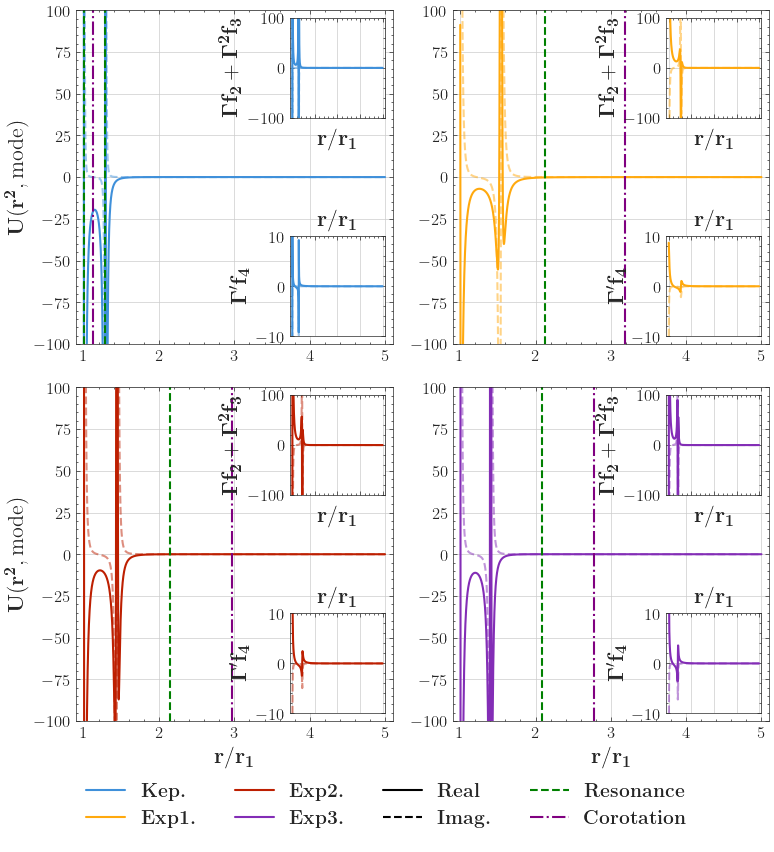

In [49]:
### PLOT Ur
c0_desat = sns.desaturate(color_arr[0], 0.1)
c1_desat = sns.desaturate(color_arr[1], 0.1)
c2_desat = sns.desaturate(color_arr[2], 0.1)
c4_desat = sns.desaturate(color_arr[4], 0.1)

# plt.figure(figsize=(5,5))
fig, ax = plt.subplots(2,2, figsize=(8, 8))

ax[0][0].plot(rp, Ur_Kep.real, label=r'\textbf{Kep.}', color = color_arr[0])
ax[0][1].plot(rp, Ur_Sat.real, label=r'\textbf{Sat.}', color = color_arr[1])
ax[1][0].plot(rp, Ur_Sh2.real, label=r'\textbf{Sh2.}', color = color_arr[2])
ax[1][1].plot(rp, Ur_Tanh.real, label=r'\textbf{Tanh.}', color = color_arr[4])

ax[0][0].plot(rp, Ur_Kep.imag, color = color_arr[0], linestyle = 'dashed', alpha = 0.5)
ax[0][1].plot(rp, Ur_Sat.imag, color = color_arr[1], linestyle = 'dashed', alpha = 0.5)
ax[1][0].plot(rp, Ur_Sh2.imag, color = color_arr[2], linestyle = 'dashed', alpha = 0.5)
ax[1][1].plot(rp, Ur_Tanh.imag, color = color_arr[4], linestyle = 'dashed', alpha = 0.5)

ax[0][0].axvline(x=r_vec_Kep[0], linestyle = '--', color = 'green', label = r'\textbf{Resonance}')
ax[0][0].axvline(x=r_vec_Kep[1], linestyle = '--', color = 'green', label = r'\textbf{Resonance}')
ax[0][0].axvline(x=r_vec_Kep[4], linestyle = '-.', color = 'purple')
ax[0][1].axvline(x=r_vec_Sat[0], linestyle = '--', color = 'green', label = r'\textbf{Resonance}')
ax[0][1].axvline(x=r_vec_Sat[1], linestyle = '--', color = 'green', label = r'\textbf{Resonance}')
ax[0][1].axvline(x=r_vec_Sat[4], linestyle = '-.', color = 'purple')
ax[1][0].axvline(x=r_vec_Sh2[0], linestyle = '--', color = 'green', label = r'\textbf{Resonance}')
ax[1][0].axvline(x=r_vec_Sh2[1], linestyle = '--', color = 'green', label = r'\textbf{Resonance}')
ax[1][0].axvline(x=r_vec_Sh2[4], linestyle = '-.', color = 'purple')
ax[1][1].axvline(x=r_vec_Tanh[0], linestyle = '--', color = 'green', label = r'\textbf{Resonance}')
ax[1][1].axvline(x=r_vec_Tanh[1], linestyle = '--', color = 'green', label = r'\textbf{Resonance}')
ax[1][1].axvline(x=r_vec_Tanh[4], linestyle = '-.', color = 'purple')

# ax.plot(rp, Ur_Kep.imag, color = color_arr[0], linestyle = '--', alpha = 0.5)
# ax.plot(rp, Ur_Sat.imag, color = color_arr[1], linestyle = '--', alpha = 0.5)
# ax.plot(rp, Ur_Sh2.imag, color = color_arr[2], linestyle = '--', alpha = 0.5)
# ax.plot(rp, Ur_Tanh.imag, color = color_arr[4], linestyle = '--', alpha = 0.5)

#### PLOT FLOW SHEAR energy
ax_inset = inset_axes(ax[0][0], width="30%", height="30%", loc='upper right')
ax_inset.set_xticks(range(1,6))
ax_inset.axes.xaxis.set_ticklabels([])
ax_inset.set_xlabel(r'$\mathbf{r/r_1}$', fontsize = 16)
ax_inset.set_ylabel(r"$\mathbf{\Gamma f_2 + \Gamma^2 f_3}$", fontsize = 16)
ax_inset.plot(rp, (Ur_Kep_f2+Ur_Kep_f3).real, color = color_arr[0])
ax_inset.plot(rp, (Ur_Kep_f2+Ur_Kep_f3).imag, color = color_arr[0], linestyle = 'dashed', alpha = 0.5)
ax_inset.set_ylim(-100,100)
ax_inset.set_xlim(0.9, 5.1)

#### PLOT FLOW SHEAR energy
ax_inset = inset_axes(ax[0][1], width="30%", height="30%", loc='upper right')
ax_inset.set_xticks(range(1,6))
ax_inset.axes.xaxis.set_ticklabels([])
ax_inset.set_xlabel(r'$\mathbf{r/r_1}$', fontsize = 16)
ax_inset.set_ylabel(r"$\mathbf{\Gamma f_2 + \Gamma^2 f_3}$", fontsize = 16)
ax_inset.plot(rp, (Ur_Sat_f2+Ur_Sat_f3).real, color = color_arr[1])
ax_inset.plot(rp, (Ur_Sat_f2+Ur_Sat_f3).imag, color = color_arr[1], linestyle = 'dashed', alpha = 0.5)
ax_inset.set_ylim(-100,100)
ax_inset.set_xlim(0.9, 5.1)

#### PLOT FLOW SHEAR energy
ax_inset = inset_axes(ax[1][0], width="30%", height="30%", loc='upper right')
ax_inset.set_xticks(range(1,6))
ax_inset.axes.xaxis.set_ticklabels([])
ax_inset.set_xlabel(r'$\mathbf{r/r_1}$', fontsize = 16)
ax_inset.set_ylabel(r"$\mathbf{\Gamma f_2 + \Gamma^2 f_3}$", fontsize = 16)
ax_inset.plot(rp, (Ur_Sh2_f2+Ur_Sh2_f3).real, color = color_arr[2])
ax_inset.plot(rp, (Ur_Sh2_f2+Ur_Sh2_f3).imag, color = color_arr[2], linestyle = 'dashed', alpha = 0.5)
ax_inset.set_ylim(-100,100)
ax_inset.set_xlim(0.9, 5.1)

#### PLOT FLOW SHEAR energy
ax_inset = inset_axes(ax[1][1], width="30%", height="30%", loc='upper right')
ax_inset.set_xticks(range(1,6))
ax_inset.axes.xaxis.set_ticklabels([])
ax_inset.set_xlabel(r'$\mathbf{r/r_1}$', fontsize = 16)
ax_inset.set_ylabel(r"$\mathbf{\Gamma f_2 + \Gamma^2 f_3}$", fontsize = 16)
ax_inset.plot(rp, Ur_Tanh_f2.real, color = color_arr[4])
ax_inset.plot(rp, Ur_Tanh_f2.imag, color = color_arr[4], linestyle = 'dashed', alpha = 0.5)
ax_inset.set_ylim(-100,100)
ax_inset.set_xlim(0.9, 5.1)

#### PLOT LOWER PLOTS
ax_inset = inset_axes(ax[0][0], width="30%", height="30%", loc='lower right')
ax_inset.set_xticks(range(1,6))
ax_inset.axes.xaxis.set_ticklabels([])
ax_inset.set_xlabel(r'$\mathbf{r/r_1}$', fontsize = 16)
ax_inset.set_ylabel(r"$\mathbf{\Gamma'f_4}$", fontsize = 16)
ax_inset.plot(rp, (Ur_Kep_f4).real, color = color_arr[0])
ax_inset.plot(rp, (Ur_Kep_f4).imag, color = color_arr[0], linestyle = 'dashed', alpha = 0.5)
ax_inset.set_ylim(-10,10)
ax_inset.set_xlim(0.9, 5.1)
ax_inset.xaxis.set_label_position('top')
ax_inset.xaxis.set_ticks_position('top')

#### PLOT Mode structure
ax_inset = inset_axes(ax[0][1], width="30%", height="30%", loc='lower right')
ax_inset.set_xticks(range(1,6))
ax_inset.axes.xaxis.set_ticklabels([])
ax_inset.set_xlabel(r'$\mathbf{r/r_1}$', fontsize = 16)
ax_inset.set_ylabel(r"$\mathbf{\Gamma'f_4}$", fontsize = 16)
ax_inset.plot(rp, (Ur_Sat_f4).real, color = color_arr[1])
ax_inset.plot(rp, (Ur_Sat_f4).imag, color = color_arr[1], linestyle = 'dashed', alpha = 0.5)
ax_inset.set_ylim(-10,10)
ax_inset.set_xlim(0.9, 5.1)
ax_inset.xaxis.set_label_position('top')
ax_inset.xaxis.set_ticks_position('top')

#### PLOT Mode structure
ax_inset = inset_axes(ax[1][0], width="30%", height="30%", loc='lower right')
ax_inset.set_xticks(range(1,6))
ax_inset.axes.xaxis.set_ticklabels([])
ax_inset.set_xlabel(r'$\mathbf{r/r_1}$', fontsize = 16)
ax_inset.set_ylabel(r"$\mathbf{\Gamma'f_4}$", fontsize = 16)
ax_inset.plot(rp, (Ur_Sh2_f4).real, color = color_arr[2])
ax_inset.plot(rp, (Ur_Sh2_f4).imag, color = color_arr[2], linestyle = 'dashed', alpha = 0.5)
ax_inset.set_ylim(-10,10)
ax_inset.set_xlim(0.9, 5.1)
ax_inset.xaxis.set_label_position('top')
ax_inset.xaxis.set_ticks_position('top')

#### PLOT Mode structure
ax_inset = inset_axes(ax[1][1], width="30%", height="30%", loc='lower right')
ax_inset.set_xticks(range(1,6))
ax_inset.axes.xaxis.set_ticklabels([])
ax_inset.set_xlabel(r'$\mathbf{r/r_1}$', fontsize = 16)
ax_inset.set_ylabel(r"$\mathbf{\Gamma'f_4}$", fontsize = 16)
ax_inset.plot(rp, (Ur_Tanh_f4).real, color = color_arr[4])
ax_inset.plot(rp, (Ur_Tanh_f4).imag, color = color_arr[4], linestyle = 'dashed', alpha = 0.5)
ax_inset.set_ylim(-10,10)
ax_inset.set_xlim(0.9, 5.1)
ax_inset.xaxis.set_label_position('top')
ax_inset.xaxis.set_ticks_position('top')

# ######### Settings
ax[0][0].set_ylabel(r"$\mathbf{U(r^2, \mathrm{mode})}$",fontsize=16)
ax[0][0].set_xlim(0.9, 5.1)
ax[0][0].set_ylim(-100,100)

ax[0][1].set_xlim(0.9, 5.1)
ax[0][1].set_ylim(-100,100)

ax[1][0].set_xlabel(r'$\mathbf{r/r_1}$',fontsize=16)
ax[1][0].set_ylabel(r"$\mathbf{U(r^2, \mathrm{mode})}$",fontsize=16)
ax[1][0].set_xlim(0.9, 5.1)
ax[1][0].set_ylim(-100,100)

ax[1][1].set_xlabel(r'$\mathbf{r/r_1}$',fontsize=16)
ax[1][1].set_xlim(0.9, 5.1)
ax[1][1].set_ylim(-100,100)

from matplotlib.lines import Line2D


K = Line2D([0], [0], color=color_arr[0], linestyle='-', label=r'\textbf{Kep.}')
S = Line2D([0], [0], color=color_arr[1], linestyle='-', label=r'\textbf{Sat.}')
Sh = Line2D([0], [0], color=color_arr[2], linestyle='-', label=r'\textbf{Sh2.}')
Ta = Line2D([0], [0], color=color_arr[4], linestyle='-', label=r'\textbf{Tanh.}')

R1 = Line2D([0], [0], color='black', linestyle='-')
I1 = Line2D([0], [0], color='black', linestyle='--')

R2 = Line2D([0], [0], color='green', linestyle='--')
I2 = Line2D([0], [0], color='purple', linestyle='-.')

# Add the dummy entries to the legend
lines = [K,S, Sh, Ta, R1, I1, R2, I2]
labels = [r'\textbf{Kep.}', r'\textbf{Exp1.}', r'\textbf{Exp2.}', r'\textbf{Exp3.}', r'\textbf{Real}', r'\textbf{Imag.}', r'\textbf{Resonance}', r'\textbf{Corotation}']

# Create the legend below the plot
fig.legend(lines, labels, loc='lower center', ncol=4, 
           bbox_to_anchor=(0.5, -0.1),  # Position the legend below the plot
           frameon=False,  # Turn on the frame (border)
           edgecolor='black',  # Set the border color
           facecolor='white',  # Set the background color of the legend box
           borderpad=1,  # Padding between the legend text and the border
           borderaxespad=1, fontsize = 14)

plt.tight_layout()
type = "MRI"
plt.savefig(f'Potentials-Non-Ideal/' + type + f'_{kn}k1-potential' +'-Comb-5r1-Exp-Vort-Bz' + '.pdf', bbox_inches='tight', dpi = 500)

plt.show()

# MRI MCI Combined

In [50]:
##### SET PARAMETERS #####
color_arr = ['#3F90DA', '#FFA90E', '#BD1F01', '#94A4A2', '#832DB6', '#A96B59', '#E76300', '#B9AC70', '#92DADD']
r1 = 0.1
q = 1/2
type = 'MCI'
elecd = 0
eta = elecd
Pm = 0
m = 1
kn = 1
kz = kn*np.pi/(4)
VA_N = 0.2
Bz = VA_N* (r1*Omega0*np.sqrt(rho*mu_0)*10000)
B0 = 0

r1 = 1
r2 = 5
r3 = 5.5
rp = np.linspace(0.1, r3, 50000)
rp = np.linspace(1, r2, 50000)
reso = 5000

## PLOT ALL
r = np.linspace(1, r2, 500)
q_mag = np.pi**2
q2r_sc = q_mag*1/r**2
q2rp_sc = q_mag*(-2/r**3)
q2rpp_sc = q_mag*(6/r**4)
q2i_sc = q_mag*np.zeros(len(r))
q2ip_sc = q_mag*np.zeros(len(r))
q2ipp_sc = q_mag*np.zeros(len(r))

ones_arr = np.ones(len(r)) 
k2 = (q2r_sc + 1j*q2i_sc) + m**2/r**2 + kz**2 * ones_arr
k2p = ((q2rp_sc + 1j*q2ip_sc) - 2 * m**2/r**3) ## just changed from d/dr
k2pp = ((q2rpp_sc + 1j*q2ipp_sc) + 6 * m**2/r**4) ## just changed from d/dr

k2r_curr = i2.CubicSpline(r, k2.real)
k2i_curr = i2.CubicSpline(r, k2.imag)
k2rp_curr = i2.CubicSpline(r, k2p.real)
k2ip_curr = i2.CubicSpline(r, k2p.imag)
k2rpp_curr = i2.CubicSpline(r, k2pp.real)
k2ipp_curr = i2.CubicSpline(r, k2pp.imag)


############## Kep
##### SET PARAMETERS #####
flow_select = True
r1 = 0.1

guess = 0.20842493869626805+0.03220689414962033j
VA_N = 0.2
Bz = VA_N* (r1*Omega0*np.sqrt(rho*mu_0)*10000)
# guess = 0.13842493869626805+0.03520689414962033j
# guess = (0.14822091614105792+0.030059885804530142j)

Ur_Kep = getU_NIx(rp, guess, eta, Pm, k2r_curr, k2rp_curr, k2rpp_curr, k2i_curr, k2ip_curr, k2ipp_curr, m, kz, B0, Bz, flow_select, 1)
Ur_Kep_flow = getU_NIx(rp, guess, eta, Pm, k2r_curr, k2rp_curr, k2rpp_curr, k2i_curr, k2ip_curr, k2ipp_curr, m, kz, B0, Bz, flow_select, 1, 1/2,'flow')
Ur_Kep_prime = getU_NIx(rp, guess, eta, Pm, k2r_curr, k2rp_curr, k2rpp_curr, k2i_curr, k2ip_curr, k2ipp_curr, m, kz, B0, Bz, flow_select, 1, 1/2,'prime')
Ur_Kep_fppdf = getU_NIx(rp, guess, eta, Pm, k2r_curr, k2rp_curr, k2rpp_curr, k2i_curr, k2ip_curr, k2ipp_curr, m, kz, B0, Bz, flow_select, 1, 1/2,'fppdf')
Ur_Kep_fpdf = getU_NIx(rp, guess, eta, Pm, k2r_curr, k2rp_curr, k2rpp_curr, k2i_curr, k2ip_curr, k2ipp_curr, m, kz, B0, Bz, flow_select, 1, 1/2,'fpdf')
Ur_Kep_f1 = getU_NIx(rp, guess, eta, Pm, k2r_curr, k2rp_curr, k2rpp_curr, k2i_curr, k2ip_curr, k2ipp_curr, m, kz, B0, Bz, flow_select, 1, 1/2,'f1')
Ur_Kep_f2 = getU_NIx(rp, guess, eta, Pm, k2r_curr, k2rp_curr, k2rpp_curr, k2i_curr, k2ip_curr, k2ipp_curr, m, kz, B0, Bz, flow_select, 1, 1/2,'f2')
Ur_Kep_f3 = getU_NIx(rp, guess, eta, Pm, k2r_curr, k2rp_curr, k2rpp_curr, k2i_curr, k2ip_curr, k2ipp_curr, m, kz, B0, Bz, flow_select, 1, 1/2,'f3')
Ur_Kep_f4 = getU_NIx(rp, guess, eta, Pm, k2r_curr, k2rp_curr, k2rpp_curr, k2i_curr, k2ip_curr, k2ipp_curr, m, kz, B0, Bz, flow_select, 1, 1/2,'f4')

result = o.root_scalar(shoot_hain_v3, method='secant', x0=guess*(1.00005+1e-6j), x1=guess*(0.99995-1e-6j), args=(eta, Pm, k2r_curr, k2rp_curr, k2i_curr, k2ip_curr, kz, m, B0, Bz, flow_select, 1, r2,reso), maxiter=5000)
guess0 = result.root
y0 = [0.,(1.+1j)*1e-1]  
y = integ.solve_ivp(shoot_setup_hain_v2, [1,r2**2], y0, args=(guess,eta, Pm, k2r_curr, k2rp_curr, k2i_curr, k2ip_curr, m,kz,B0,Bz,flow_select, 1), max_step=24./reso)
r_Kep = np.sqrt(y.t)
u_Kep = y.y[0]
r_vec_Kep = shr.resonance_res_krcomp_v8(r2, guess0, m, eta, Pm, k2r_curr, k2i_curr, kz, Bz, B0,flow_select, q)
print(result)

############## Sat
##### SET PARAMETERS #####
flow_select = 'exp4' ### Exp1


guess = 0.34979311853003775+0.033580309325329925j
Ur_Sat = getU_NIx(rp, guess, eta, Pm, k2r_curr, k2rp_curr, k2rpp_curr, k2i_curr, k2ip_curr, k2ipp_curr, m, kz, B0, Bz, flow_select, 1)
Ur_Sat_flow = getU_NIx(rp, guess, eta, Pm, k2r_curr, k2rp_curr, k2rpp_curr, k2i_curr, k2ip_curr, k2ipp_curr, m, kz, B0, Bz, flow_select, 1,1/2, 'flow')
Ur_Sat_prime = getU_NIx(rp, guess, eta, Pm, k2r_curr, k2rp_curr, k2rpp_curr, k2i_curr, k2ip_curr, k2ipp_curr, m, kz, B0, Bz, flow_select, 1,1/2, 'prime')
Ur_Sat_fppdf = getU_NIx(rp, guess, eta, Pm, k2r_curr, k2rp_curr, k2rpp_curr, k2i_curr, k2ip_curr, k2ipp_curr, m, kz, B0, Bz, flow_select, 1,1/2, 'fppdf')
Ur_Sat_fpdf = getU_NIx(rp, guess, eta, Pm, k2r_curr, k2rp_curr, k2rpp_curr, k2i_curr, k2ip_curr, k2ipp_curr, m, kz, B0, Bz, flow_select, 1,1/2, 'fpdf')
Ur_Sat_f1 = getU_NIx(rp, guess, eta, Pm, k2r_curr, k2rp_curr, k2rpp_curr, k2i_curr, k2ip_curr, k2ipp_curr, m, kz, B0, Bz, flow_select, 1,1/2, 'f1')
Ur_Sat_f2 = getU_NIx(rp, guess, eta, Pm, k2r_curr, k2rp_curr, k2rpp_curr, k2i_curr, k2ip_curr, k2ipp_curr, m, kz, B0, Bz, flow_select, 1,1/2, 'f2')
Ur_Sat_f3 = getU_NIx(rp, guess, eta, Pm, k2r_curr, k2rp_curr, k2rpp_curr, k2i_curr, k2ip_curr, k2ipp_curr, m, kz, B0, Bz, flow_select, 1,1/2, 'f3')
Ur_Sat_f4 = getU_NIx(rp, guess, eta, Pm, k2r_curr, k2rp_curr, k2rpp_curr, k2i_curr, k2ip_curr, k2ipp_curr, m, kz, B0, Bz, flow_select, 1,1/2, 'f4')

result = o.root_scalar(shoot_hain_v3, method='secant', x0=guess*(1.00005+1e-6j), x1=guess*(0.99995-1e-6j), args=(eta, Pm, k2r_curr, k2rp_curr, k2i_curr, k2ip_curr, kz, m, B0, Bz, flow_select, 1, r2,reso), maxiter=5000)
guess0 = result.root
y0 = [0.,(1.+1j)*1e-1]  
y = integ.solve_ivp(shoot_setup_hain_v2, [1,r2**2], y0, args=(guess,eta, Pm, k2r_curr, k2rp_curr, k2i_curr, k2ip_curr, m,kz,B0,Bz,flow_select, 1), max_step=24./reso)
r_Sat = np.sqrt(y.t)
u_Sat = y.y[0]
r_vec_Sat = shr.resonance_res_krcomp_v8(r2, guess0, m, eta, Pm, k2r_curr, k2i_curr, kz, Bz, B0,flow_select, q)
print(result)

############## Sh2
##### SET PARAMETERS #####
flow_select = 'exp5' ### Exp2



guess = 0.25212448111986324+0.0366375661793521j
Ur_Sh2 = getU_NIx(rp, guess, eta, Pm, k2r_curr, k2rp_curr, k2rpp_curr, k2i_curr, k2ip_curr, k2ipp_curr, m, kz, B0, Bz, flow_select, 1)
Ur_Sh2_flow = getU_NIx(rp, guess, eta, Pm, k2r_curr, k2rp_curr, k2rpp_curr, k2i_curr, k2ip_curr, k2ipp_curr, m, kz, B0, Bz, flow_select, 1,1/2, 'flow')
Ur_Sh2_prime = getU_NIx(rp, guess, eta, Pm, k2r_curr, k2rp_curr, k2rpp_curr, k2i_curr, k2ip_curr, k2ipp_curr, m, kz, B0, Bz, flow_select, 1,1/2, 'prime')
Ur_Sh2_fppdf = getU_NIx(rp, guess, eta, Pm, k2r_curr, k2rp_curr, k2rpp_curr, k2i_curr, k2ip_curr, k2ipp_curr, m, kz, B0, Bz, flow_select, 1,1/2, 'fppdf')
Ur_Sh2_fpdf = getU_NIx(rp, guess, eta, Pm, k2r_curr, k2rp_curr, k2rpp_curr, k2i_curr, k2ip_curr, k2ipp_curr, m, kz, B0, Bz, flow_select, 1,1/2, 'fpdf')
Ur_Sh2_f1 = getU_NIx(rp, guess, eta, Pm, k2r_curr, k2rp_curr, k2rpp_curr, k2i_curr, k2ip_curr, k2ipp_curr, m, kz, B0, Bz, flow_select, 1,1/2, 'f1')
Ur_Sh2_f2 = getU_NIx(rp, guess, eta, Pm, k2r_curr, k2rp_curr, k2rpp_curr, k2i_curr, k2ip_curr, k2ipp_curr, m, kz, B0, Bz, flow_select, 1,1/2, 'f2')
Ur_Sh2_f3 = getU_NIx(rp, guess, eta, Pm, k2r_curr, k2rp_curr, k2rpp_curr, k2i_curr, k2ip_curr, k2ipp_curr, m, kz, B0, Bz, flow_select, 1,1/2, 'f3')
Ur_Sh2_f4 = getU_NIx(rp, guess, eta, Pm, k2r_curr, k2rp_curr, k2rpp_curr, k2i_curr, k2ip_curr, k2ipp_curr, m, kz, B0, Bz, flow_select, 1,1/2, 'f4')

result = o.root_scalar(shoot_hain_v3, method='secant', x0=guess*(1.00005+1e-6j), x1=guess*(0.99995-1e-6j), args=(eta, Pm, k2r_curr, k2rp_curr, k2i_curr, k2ip_curr, kz, m, B0, Bz, flow_select, 1, r2,reso), maxiter=5000)
guess0 = result.root
y0 = [0.,(1.+1j)*1e-1]  
y = integ.solve_ivp(shoot_setup_hain_v2, [1,r2**2], y0, args=(guess,eta, Pm, k2r_curr, k2rp_curr, k2i_curr, k2ip_curr, m,kz,B0,Bz,flow_select, 1), max_step=24./reso)
r_Sh2 = np.sqrt(y.t)
u_Sh2 = y.y[0]
r_vec_Sh2 = shr.resonance_res_krcomp_v8(r2, guess0, m, eta, Pm, k2r_curr, k2i_curr, kz, Bz, B0,flow_select, q)
print(result)

############## Tanh
##### SET PARAMETERS #####
flow_select = 'exp6' ### Exp3


guess = 0.2210250146410391+0.02360034089150962j
Ur_Tanh = getU_NIx(rp, guess, eta, Pm, k2r_curr, k2rp_curr, k2rpp_curr, k2i_curr, k2ip_curr, k2ipp_curr, m, kz, B0, Bz, flow_select, 1)
Ur_Tanh_flow = getU_NIx(rp, guess, eta, Pm, k2r_curr, k2rp_curr, k2rpp_curr, k2i_curr, k2ip_curr, k2ipp_curr, m, kz, B0, Bz, flow_select, 1,1/2, 'flow')
Ur_Tanh_prime = getU_NIx(rp, guess, eta, Pm, k2r_curr, k2rp_curr, k2rpp_curr, k2i_curr, k2ip_curr, k2ipp_curr, m, kz, B0, Bz, flow_select, 1,1/2, 'prime')
Ur_Tanh_fppdf = getU_NIx(rp, guess, eta, Pm, k2r_curr, k2rp_curr, k2rpp_curr, k2i_curr, k2ip_curr, k2ipp_curr, m, kz, B0, Bz, flow_select, 1,1/2, 'fppdf')
Ur_Tanh_fpdf = getU_NIx(rp, guess, eta, Pm, k2r_curr, k2rp_curr, k2rpp_curr, k2i_curr, k2ip_curr, k2ipp_curr, m, kz, B0, Bz, flow_select, 1,1/2, 'fpdf')
Ur_Tanh_f1 = getU_NIx(rp, guess, eta, Pm, k2r_curr, k2rp_curr, k2rpp_curr, k2i_curr, k2ip_curr, k2ipp_curr, m, kz, B0, Bz, flow_select, 1,1/2, 'f1')
Ur_Tanh_f2 = getU_NIx(rp, guess, eta, Pm, k2r_curr, k2rp_curr, k2rpp_curr, k2i_curr, k2ip_curr, k2ipp_curr, m, kz, B0, Bz, flow_select, 1,1/2, 'f2')
Ur_Tanh_f3 = getU_NIx(rp, guess, eta, Pm, k2r_curr, k2rp_curr, k2rpp_curr, k2i_curr, k2ip_curr, k2ipp_curr, m, kz, B0, Bz, flow_select, 1,1/2, 'f3')
Ur_Tanh_f4 = getU_NIx(rp, guess, eta, Pm, k2r_curr, k2rp_curr, k2rpp_curr, k2i_curr, k2ip_curr, k2ipp_curr, m, kz, B0, Bz, flow_select, 1,1/2, 'f4')

result = o.root_scalar(shoot_hain_v3, method='secant', x0=guess*(1.00005+1e-6j), x1=guess*(0.99995-1e-6j), args=(eta, Pm, k2r_curr, k2rp_curr, k2i_curr, k2ip_curr, kz, m, B0, Bz, flow_select, 1, r2,reso), maxiter=5000)
guess0 = result.root
y0 = [0.,(1.+1j)*1e-1]  
y = integ.solve_ivp(shoot_setup_hain_v2, [1,r2**2], y0, args=(guess,eta, Pm, k2r_curr, k2rp_curr, k2i_curr, k2ip_curr, m,kz,B0,Bz,flow_select, 1), max_step=24./reso)
r_Tanh = np.sqrt(y.t)
u_Tanh = y.y[0]
r_vec_Tanh = shr.resonance_res_krcomp_v8(r2, guess0, m, eta, Pm, k2r_curr, k2i_curr, kz, Bz, B0,flow_select, q)
print(result)

g_dr = [0. 0. 0. ... 0. 0. 0.]
<U> = -1.0
<f1> = 1.0
<f2G + f3G^2> = -1.0
<f4Gp> = -1.0 

      converged: True
           flag: converged
 function_calls: 3
     iterations: 2
           root: (0.2084249386962455+0.03220689414910724j)
         method: secant
g_dr = [0. 0. 0. ... 0. 0. 0.]
<U> = -1.0
<f1> = -1.0
<f2G + f3G^2> = -1.0
<f4Gp> = -1.0 

      converged: True
           flag: converged
 function_calls: 3
     iterations: 2
           root: (0.34979311853190764+0.03358030932681712j)
         method: secant
g_dr = [0. 0. 0. ... 0. 0. 0.]
<U> = -1.0
<f1> = 1.0
<f2G + f3G^2> = -1.0
<f4Gp> = -1.0 

      converged: True
           flag: converged
 function_calls: 3
     iterations: 2
           root: (0.2521244795608317+0.036637569936456595j)
         method: secant
g_dr = [0. 0. 0. ... 0. 0. 0.]
<U> = -1.0
<f1> = 1.0
<f2G + f3G^2> = -1.0
<f4Gp> = -1.0 

      converged: True
           flag: converged
 function_calls: 3
     iterations: 2
           root: (0.2210312377214767+0.0

In [56]:
##### SET PARAMETERS #####
color_arr = ['#3F90DA', '#FFA90E', '#BD1F01', '#94A4A2', '#832DB6', '#A96B59', '#E76300', '#B9AC70', '#92DADD']
r1 = 0.1
q = 1/2
type = 'MRI'
elecd = 0
eta = elecd
Pm = 0
m = 1
kn = 1
kz = kn*np.pi/(4)
VA_N = 0.2
Bz = VA_N* (r1*Omega0*np.sqrt(rho*mu_0)*10000)
B0 = 0


r1 = 1
r2 = 5
r3 = 5.5
rp = np.linspace(0.1, r3, 50000)
rp = np.linspace(1, r2, 50000)
reso = 5000

## PLOT ALL
r = np.linspace(1, r2, 500)
q_mag = np.pi**2
q2r_sc = q_mag*1/r**2
q2rp_sc = q_mag*(-2/r**3)
q2rpp_sc = q_mag*(6/r**4)
q2i_sc = q_mag*np.zeros(len(r))
q2ip_sc = q_mag*np.zeros(len(r))
q2ipp_sc = q_mag*np.zeros(len(r))

ones_arr = np.ones(len(r)) 
k2 = (q2r_sc + 1j*q2i_sc) + m**2/r**2 + kz**2 * ones_arr
k2p = ((q2rp_sc + 1j*q2ip_sc) - 2 * m**2/r**3) ## just changed from d/dr
k2pp = ((q2rpp_sc + 1j*q2ipp_sc) + 6 * m**2/r**4) ## just changed from d/dr

k2r_curr = i2.CubicSpline(r, k2.real)
k2i_curr = i2.CubicSpline(r, k2.imag)
k2rp_curr = i2.CubicSpline(r, k2p.real)
k2ip_curr = i2.CubicSpline(r, k2p.imag)
k2rpp_curr = i2.CubicSpline(r, k2pp.real)
k2ipp_curr = i2.CubicSpline(r, k2pp.imag)


############## Kep
##### SET PARAMETERS #####
flow_select = True

guess = 0.8420519413847339+0.0012702944202713142j
Ur_Kep_MRI = getU_NIx(rp, guess, eta, Pm, k2r_curr, k2rp_curr, k2rpp_curr, k2i_curr, k2ip_curr, k2ipp_curr, m, kz, B0, Bz, flow_select, 1)
Ur_Kep_MRI_flow = getU_NIx(rp, guess, eta, Pm, k2r_curr, k2rp_curr, k2rpp_curr, k2i_curr, k2ip_curr, k2ipp_curr, m, kz, B0, Bz, flow_select, 1, 1/2,'flow')
Ur_Kep_MRI_prime = getU_NIx(rp, guess, eta, Pm, k2r_curr, k2rp_curr, k2rpp_curr, k2i_curr, k2ip_curr, k2ipp_curr, m, kz, B0, Bz, flow_select, 1, 1/2,'prime')
Ur_Kep_MRI_fppdf = getU_NIx(rp, guess, eta, Pm, k2r_curr, k2rp_curr, k2rpp_curr, k2i_curr, k2ip_curr, k2ipp_curr, m, kz, B0, Bz, flow_select, 1, 1/2,'fppdf')
Ur_Kep_MRI_fpdf = getU_NIx(rp, guess, eta, Pm, k2r_curr, k2rp_curr, k2rpp_curr, k2i_curr, k2ip_curr, k2ipp_curr, m, kz, B0, Bz, flow_select, 1, 1/2,'fpdf')
Ur_Kep_MRI_f1 = getU_NIx(rp, guess, eta, Pm, k2r_curr, k2rp_curr, k2rpp_curr, k2i_curr, k2ip_curr, k2ipp_curr, m, kz, B0, Bz, flow_select, 1, 1/2,'f1')
Ur_Kep_MRI_f2 = getU_NIx(rp, guess, eta, Pm, k2r_curr, k2rp_curr, k2rpp_curr, k2i_curr, k2ip_curr, k2ipp_curr, m, kz, B0, Bz, flow_select, 1, 1/2,'f2')
Ur_Kep_MRI_f3 = getU_NIx(rp, guess, eta, Pm, k2r_curr, k2rp_curr, k2rpp_curr, k2i_curr, k2ip_curr, k2ipp_curr, m, kz, B0, Bz, flow_select, 1, 1/2,'f3')
Ur_Kep_MRI_f4 = getU_NIx(rp, guess, eta, Pm, k2r_curr, k2rp_curr, k2rpp_curr, k2i_curr, k2ip_curr, k2ipp_curr, m, kz, B0, Bz, flow_select, 1, 1/2,'f4')

Ur_Kep_MRI_f22 = getU_NIx(rp, guess, eta, Pm, k2r_curr, k2rp_curr, k2rpp_curr, k2i_curr, k2ip_curr, k2ipp_curr, m, kz, B0, Bz, flow_select, 1, 1/2,'f2_2')
Ur_Kep_MRI_f12 = getU_NIx(rp, guess, eta, Pm, k2r_curr, k2rp_curr, k2rpp_curr, k2i_curr, k2ip_curr, k2ipp_curr, m, kz, B0, Bz, flow_select, 1, 1/2,'f1_2')

# Exp_U = 1/(r2-r1)*quad(getU_NIx, 1, r2, args=(guess, eta, Pm, k2r_curr, k2rp_curr, k2rpp_curr, k2i_curr, k2ip_curr, k2ipp_curr, m, kz, B0, Bz, flow_select, 1, q))[0]
# print(f'Exp_U = {Exp_U}')
# print(f'f2 = {np.average(Ur_Kep_MRI_f2)}')
# print(f'f2_2 = {np.average(Ur_Kep_MRI_f22)}')
# print(f'f1 = {np.average(Ur_Kep_MRI_f1)}')
# print(f'f1_2 = {np.average(Ur_Kep_MRI_f12)}')

result = o.root_scalar(shoot_hain_v3, method='secant', x0=guess*(1.00005+1e-6j), x1=guess*(0.99995-1e-6j), args=(eta, Pm, k2r_curr, k2rp_curr, k2i_curr, k2ip_curr, kz, m, B0, Bz, flow_select, 1, r2,reso), maxiter=5000)
guess0 = result.root
y0 = [0.,(1.+1j)*1e-1]  
y = integ.solve_ivp(shoot_setup_hain_v2, [1,r2**2], y0, args=(guess,eta, Pm, k2r_curr, k2rp_curr, k2i_curr, k2ip_curr, m,kz,B0,Bz,flow_select, 1), max_step=24./reso)
r_Kep_MRI = np.sqrt(y.t)
u_Kep_MRI = y.y[0]
r_vec_Kep_MRI = shr.resonance_res_krcomp_v8(r2, guess0, m, eta, Pm, k2r_curr, k2i_curr, kz, Bz, B0,flow_select, q)

############## Sat
##### SET PARAMETERS #####
flow_select = 'exp4' ### Exp1


guess = 0.8520441524485152+0.009812910876780054j
Ur_Sat_MRI = getU_NIx(rp, guess, eta, Pm, k2r_curr, k2rp_curr, k2rpp_curr, k2i_curr, k2ip_curr, k2ipp_curr, m, kz, B0, Bz, flow_select, 1)
Ur_Sat_MRI_flow = getU_NIx(rp, guess, eta, Pm, k2r_curr, k2rp_curr, k2rpp_curr, k2i_curr, k2ip_curr, k2ipp_curr, m, kz, B0, Bz, flow_select, 1,1/2, 'flow')
Ur_Sat_MRI_prime = getU_NIx(rp, guess, eta, Pm, k2r_curr, k2rp_curr, k2rpp_curr, k2i_curr, k2ip_curr, k2ipp_curr, m, kz, B0, Bz, flow_select, 1,1/2, 'prime')
Ur_Sat_MRI_fppdf = getU_NIx(rp, guess, eta, Pm, k2r_curr, k2rp_curr, k2rpp_curr, k2i_curr, k2ip_curr, k2ipp_curr, m, kz, B0, Bz, flow_select, 1,1/2, 'fppdf')
Ur_Sat_MRI_fpdf = getU_NIx(rp, guess, eta, Pm, k2r_curr, k2rp_curr, k2rpp_curr, k2i_curr, k2ip_curr, k2ipp_curr, m, kz, B0, Bz, flow_select, 1,1/2, 'fpdf')
Ur_Sat_MRI_f1 = getU_NIx(rp, guess, eta, Pm, k2r_curr, k2rp_curr, k2rpp_curr, k2i_curr, k2ip_curr, k2ipp_curr, m, kz, B0, Bz, flow_select, 1,1/2, 'f1')
Ur_Sat_MRI_f2 = getU_NIx(rp, guess, eta, Pm, k2r_curr, k2rp_curr, k2rpp_curr, k2i_curr, k2ip_curr, k2ipp_curr, m, kz, B0, Bz, flow_select, 1,1/2, 'f2')
Ur_Sat_MRI_f3 = getU_NIx(rp, guess, eta, Pm, k2r_curr, k2rp_curr, k2rpp_curr, k2i_curr, k2ip_curr, k2ipp_curr, m, kz, B0, Bz, flow_select, 1,1/2, 'f3')
Ur_Sat_MRI_f4 = getU_NIx(rp, guess, eta, Pm, k2r_curr, k2rp_curr, k2rpp_curr, k2i_curr, k2ip_curr, k2ipp_curr, m, kz, B0, Bz, flow_select, 1,1/2, 'f4')


result = o.root_scalar(shoot_hain_v3, method='secant', x0=guess*(1.00005+1e-6j), x1=guess*(0.99995-1e-6j), args=(eta, Pm, k2r_curr, k2rp_curr, k2i_curr, k2ip_curr, kz, m, B0, Bz, flow_select, 1, r2,reso), maxiter=5000)
guess0 = result.root
y0 = [0.,(1.+1j)*1e-1]  
y = integ.solve_ivp(shoot_setup_hain_v2, [1,r2**2], y0, args=(guess,eta, Pm, k2r_curr, k2rp_curr, k2i_curr, k2ip_curr, m,kz,B0,Bz,flow_select, 1), max_step=24./reso)
r_Sat_MRI = np.sqrt(y.t)
u_Sat_MRI = y.y[0]
r_vec_Sat_MRI = shr.resonance_res_krcomp_v8(r2, guess0, m, eta, Pm, k2r_curr, k2i_curr, kz, Bz, B0,flow_select, q)
# print(result)

############## Sh2
##### SET PARAMETERS #####
flow_select = 'exp5' ### Exp2



guess = 0.8475661419046426+0.007414870589902397j
Ur_Sh2_MRI = getU_NIx(rp, guess, eta, Pm, k2r_curr, k2rp_curr, k2rpp_curr, k2i_curr, k2ip_curr, k2ipp_curr, m, kz, B0, Bz, flow_select, 1)
Ur_Sh2_MRI_flow = getU_NIx(rp, guess, eta, Pm, k2r_curr, k2rp_curr, k2rpp_curr, k2i_curr, k2ip_curr, k2ipp_curr, m, kz, B0, Bz, flow_select, 1,1/2, 'flow')
Ur_Sh2_MRI_prime = getU_NIx(rp, guess, eta, Pm, k2r_curr, k2rp_curr, k2rpp_curr, k2i_curr, k2ip_curr, k2ipp_curr, m, kz, B0, Bz, flow_select, 1,1/2, 'prime')
Ur_Sh2_MRI_fppdf = getU_NIx(rp, guess, eta, Pm, k2r_curr, k2rp_curr, k2rpp_curr, k2i_curr, k2ip_curr, k2ipp_curr, m, kz, B0, Bz, flow_select, 1,1/2, 'fppdf')
Ur_Sh2_MRI_fpdf = getU_NIx(rp, guess, eta, Pm, k2r_curr, k2rp_curr, k2rpp_curr, k2i_curr, k2ip_curr, k2ipp_curr, m, kz, B0, Bz, flow_select, 1,1/2, 'fpdf')
Ur_Sh2_MRI_f1 = getU_NIx(rp, guess, eta, Pm, k2r_curr, k2rp_curr, k2rpp_curr, k2i_curr, k2ip_curr, k2ipp_curr, m, kz, B0, Bz, flow_select, 1,1/2, 'f1')
Ur_Sh2_MRI_f2 = getU_NIx(rp, guess, eta, Pm, k2r_curr, k2rp_curr, k2rpp_curr, k2i_curr, k2ip_curr, k2ipp_curr, m, kz, B0, Bz, flow_select, 1,1/2, 'f2')
Ur_Sh2_MRI_f3 = getU_NIx(rp, guess, eta, Pm, k2r_curr, k2rp_curr, k2rpp_curr, k2i_curr, k2ip_curr, k2ipp_curr, m, kz, B0, Bz, flow_select, 1,1/2, 'f3')
Ur_Sh2_MRI_f4 = getU_NIx(rp, guess, eta, Pm, k2r_curr, k2rp_curr, k2rpp_curr, k2i_curr, k2ip_curr, k2ipp_curr, m, kz, B0, Bz, flow_select, 1,1/2, 'f4')



result = o.root_scalar(shoot_hain_v3, method='secant', x0=guess*(1.00005+1e-6j), x1=guess*(0.99995-1e-6j), args=(eta, Pm, k2r_curr, k2rp_curr, k2i_curr, k2ip_curr, kz, m, B0, Bz, flow_select, 1, r2,reso), maxiter=5000)
guess0 = result.root
y0 = [0.,(1.+1j)*1e-1]  
y = integ.solve_ivp(shoot_setup_hain_v2, [1,r2**2], y0, args=(guess,eta, Pm, k2r_curr, k2rp_curr, k2i_curr, k2ip_curr, m,kz,B0,Bz,flow_select, 1), max_step=24./reso)
r_Sh2_MRI = np.sqrt(y.t)
u_Sh2_MRI = y.y[0]
r_vec_Sh2_MRI = shr.resonance_res_krcomp_v8(r2, guess0, m, eta, Pm, k2r_curr, k2i_curr, kz, Bz, B0,flow_select, q)
# print(result)

############## Tanh
##### SET PARAMETERS #####
flow_select = 'exp6' ### Exp3


guess = 0.8460783857428666+0.0062740615261273145j
Ur_Tanh_MRI = getU_NIx(rp, guess, eta, Pm, k2r_curr, k2rp_curr, k2rpp_curr, k2i_curr, k2ip_curr, k2ipp_curr, m, kz, B0, Bz, flow_select, 1)
Ur_Tanh_MRI_flow = getU_NIx(rp, guess, eta, Pm, k2r_curr, k2rp_curr, k2rpp_curr, k2i_curr, k2ip_curr, k2ipp_curr, m, kz, B0, Bz, flow_select, 1,1/2, 'flow')
Ur_Tanh_MRI_prime = getU_NIx(rp, guess, eta, Pm, k2r_curr, k2rp_curr, k2rpp_curr, k2i_curr, k2ip_curr, k2ipp_curr, m, kz, B0, Bz, flow_select, 1,1/2, 'prime')
Ur_Tanh_MRI_fppdf = getU_NIx(rp, guess, eta, Pm, k2r_curr, k2rp_curr, k2rpp_curr, k2i_curr, k2ip_curr, k2ipp_curr, m, kz, B0, Bz, flow_select, 1,1/2, 'fppdf')
Ur_Tanh_MRI_fpdf = getU_NIx(rp, guess, eta, Pm, k2r_curr, k2rp_curr, k2rpp_curr, k2i_curr, k2ip_curr, k2ipp_curr, m, kz, B0, Bz, flow_select, 1,1/2, 'fpdf')
Ur_Tanh_MRI_f1 = getU_NIx(rp, guess, eta, Pm, k2r_curr, k2rp_curr, k2rpp_curr, k2i_curr, k2ip_curr, k2ipp_curr, m, kz, B0, Bz, flow_select, 1,1/2, 'f1')
Ur_Tanh_MRI_f2 = getU_NIx(rp, guess, eta, Pm, k2r_curr, k2rp_curr, k2rpp_curr, k2i_curr, k2ip_curr, k2ipp_curr, m, kz, B0, Bz, flow_select, 1,1/2, 'f2')
Ur_Tanh_MRI_f3 = getU_NIx(rp, guess, eta, Pm, k2r_curr, k2rp_curr, k2rpp_curr, k2i_curr, k2ip_curr, k2ipp_curr, m, kz, B0, Bz, flow_select, 1,1/2, 'f3')
Ur_Tanh_MRI_f4 = getU_NIx(rp, guess, eta, Pm, k2r_curr, k2rp_curr, k2rpp_curr, k2i_curr, k2ip_curr, k2ipp_curr, m, kz, B0, Bz, flow_select, 1,1/2, 'f4')



result = o.root_scalar(shoot_hain_v3, method='secant', x0=guess*(1.00005+1e-6j), x1=guess*(0.99995-1e-6j), args=(eta, Pm, k2r_curr, k2rp_curr, k2i_curr, k2ip_curr, kz, m, B0, Bz, flow_select, 1, r2,reso), maxiter=5000)
guess0 = result.root
y0 = [0.,(1.+1j)*1e-1]  
y = integ.solve_ivp(shoot_setup_hain_v2, [1,r2**2], y0, args=(guess,eta, Pm, k2r_curr, k2rp_curr, k2i_curr, k2ip_curr, m,kz,B0,Bz,flow_select, 1), max_step=24./reso)
r_Tanh_MRI = np.sqrt(y.t)
u_Tanh_MRI = y.y[0]
r_vec_Tanh_MRI = shr.resonance_res_krcomp_v8(r2, guess0, m, eta, Pm, k2r_curr, k2i_curr, kz, Bz, B0,flow_select, q)
# print(result)


g_dr = [0. 0. 0. ... 0. 0. 0.]
<U> = 1.0
<f1> = 1.0
<f2G + f3G^2> = -1.0
<f4Gp> = 1.0 

g_dr = [0. 0. 0. ... 0. 0. 0.]
<U> = -1.0
<f1> = -1.0
<f2G + f3G^2> = 1.0
<f4Gp> = 1.0 

g_dr = [0. 0. 0. ... 0. 0. 0.]
<U> = -1.0
<f1> = -1.0
<f2G + f3G^2> = 1.0
<f4Gp> = 1.0 

g_dr = [0. 0. 0. ... 0. 0. 0.]
<U> = -1.0
<f1> = -1.0
<f2G + f3G^2> = 1.0
<f4Gp> = 1.0 



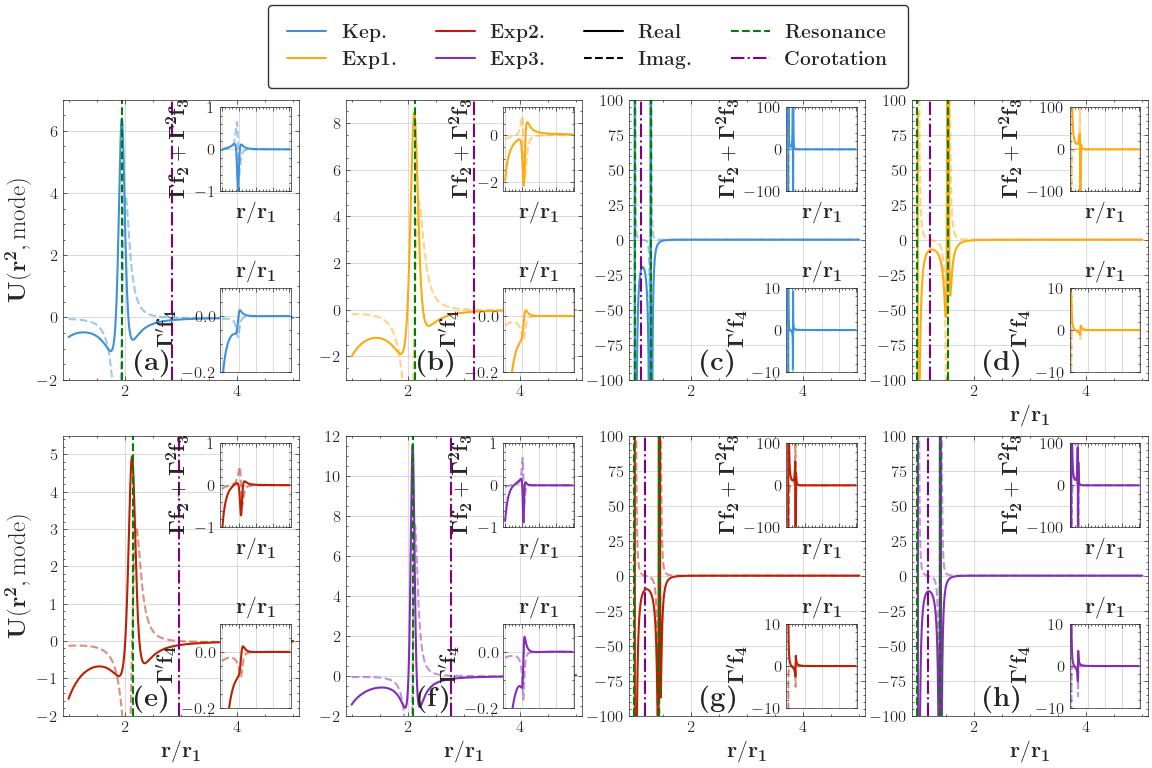

In [79]:
### PLOT Ur
c0_desat = sns.desaturate(color_arr[0], 0.1)
c1_desat = sns.desaturate(color_arr[1], 0.1)
c2_desat = sns.desaturate(color_arr[2], 0.1)
c4_desat = sns.desaturate(color_arr[4], 0.1)

# plt.figure(figsize=(5,5))
fig, ax = plt.subplots(2,4, figsize=(14, 8))

ax[0][0].plot(rp, Ur_Kep.real, label=r'\textbf{Kep.}', color = color_arr[0])
ax[0][1].plot(rp, Ur_Sat.real, label=r'\textbf{Sat.}', color = color_arr[1])
ax[1][0].plot(rp, Ur_Sh2.real, label=r'\textbf{Sh2.}', color = color_arr[2])
ax[1][1].plot(rp, Ur_Tanh.real, label=r'\textbf{Tanh.}', color = color_arr[4])

ax[0][0].plot(rp, Ur_Kep.imag, color = color_arr[0], linestyle = 'dashed', alpha = 0.5)
ax[0][1].plot(rp, Ur_Sat.imag, color = color_arr[1], linestyle = 'dashed', alpha = 0.5)
ax[1][0].plot(rp, Ur_Sh2.imag, color = color_arr[2], linestyle = 'dashed', alpha = 0.5)
ax[1][1].plot(rp, Ur_Tanh.imag, color = color_arr[4], linestyle = 'dashed', alpha = 0.5)

ax[0][0].axvline(x=r_vec_Kep[0], linestyle = '--', color = 'green', label = r'\textbf{Resonance}')
ax[0][0].axvline(x=r_vec_Kep[1], linestyle = '--', color = 'green', label = r'\textbf{Resonance}')
ax[0][0].axvline(x=r_vec_Kep[4], linestyle = '-.', color = 'purple')
ax[0][1].axvline(x=r_vec_Sat[0], linestyle = '--', color = 'green', label = r'\textbf{Resonance}')
ax[0][1].axvline(x=r_vec_Sat[1], linestyle = '--', color = 'green', label = r'\textbf{Resonance}')
ax[0][1].axvline(x=r_vec_Sat[4], linestyle = '-.', color = 'purple')
ax[1][0].axvline(x=r_vec_Sh2[0], linestyle = '--', color = 'green', label = r'\textbf{Resonance}')
ax[1][0].axvline(x=r_vec_Sh2[1], linestyle = '--', color = 'green', label = r'\textbf{Resonance}')
ax[1][0].axvline(x=r_vec_Sh2[4], linestyle = '-.', color = 'purple')
ax[1][1].axvline(x=r_vec_Tanh[0], linestyle = '--', color = 'green', label = r'\textbf{Resonance}')
ax[1][1].axvline(x=r_vec_Tanh[1], linestyle = '--', color = 'green', label = r'\textbf{Resonance}')
ax[1][1].axvline(x=r_vec_Tanh[4], linestyle = '-.', color = 'purple')


#### PLOT FLOW SHEAR energy
ax_inset = inset_axes(ax[0][0], width="30%", height="30%", loc='upper right')
ax_inset.set_xticks(range(1,6))
ax_inset.axes.xaxis.set_ticklabels([])
ax_inset.set_xlabel(r'$\mathbf{r/r_1}$', fontsize = 16)
ax_inset.set_ylabel(r"$\mathbf{\Gamma f_2 + \Gamma^2 f_3}$", fontsize = 16)
ax_inset.plot(rp, (Ur_Kep_f2+Ur_Kep_f3).real, color = color_arr[0])
ax_inset.plot(rp, (Ur_Kep_f2+Ur_Kep_f3).imag, color = color_arr[0], linestyle = 'dashed', alpha = 0.5)
ax_inset.set_ylim(-1.,1)

ax_inset.set_xlim(0.9, 5.1)

#### PLOT FLOW SHEAR energy
ax_inset = inset_axes(ax[0][1], width="30%", height="30%", loc='upper right')
ax_inset.set_xticks(range(1,6))
ax_inset.axes.xaxis.set_ticklabels([])
ax_inset.set_xlabel(r'$\mathbf{r/r_1}$', fontsize = 16)
ax_inset.set_ylabel(r"$\mathbf{\Gamma f_2 + \Gamma^2 f_3}$", fontsize = 16)
ax_inset.plot(rp, (Ur_Sat_f2+Ur_Sat_f3).real, color = color_arr[1])
ax_inset.plot(rp, (Ur_Sat_f2+Ur_Sat_f3).imag, color = color_arr[1], linestyle = 'dashed', alpha = 0.5)
ax_inset.set_ylim(-2.4,1.2)
ax_inset.set_xlim(0.9, 5.1)

#### PLOT FLOW SHEAR energy
ax_inset = inset_axes(ax[1][0], width="30%", height="30%", loc='upper right')
ax_inset.set_xticks(range(1,6))
ax_inset.axes.xaxis.set_ticklabels([])
ax_inset.set_xlabel(r'$\mathbf{r/r_1}$', fontsize = 16)
ax_inset.set_ylabel(r"$\mathbf{\Gamma f_2 + \Gamma^2 f_3}$", fontsize = 16)
ax_inset.plot(rp, (Ur_Sh2_f2+Ur_Sh2_f3).real, color = color_arr[2])
ax_inset.plot(rp, (Ur_Sh2_f2+Ur_Sh2_f3).imag, color = color_arr[2], linestyle = 'dashed', alpha = 0.5)
ax_inset.set_ylim(-1.,1)

ax_inset.set_xlim(0.9, 5.1)

#### PLOT FLOW SHEAR energy
ax_inset = inset_axes(ax[1][1], width="30%", height="30%", loc='upper right')
ax_inset.set_xticks(range(1,6))
ax_inset.axes.xaxis.set_ticklabels([])
ax_inset.set_xlabel(r'$\mathbf{r/r_1}$', fontsize = 16)
ax_inset.set_ylabel(r"$\mathbf{\Gamma f_2 + \Gamma^2 f_3}$", fontsize = 16)
ax_inset.plot(rp, Ur_Tanh_f2.real, color = color_arr[4])
ax_inset.plot(rp, Ur_Tanh_f2.imag, color = color_arr[4], linestyle = 'dashed', alpha = 0.5)
ax_inset.set_ylim(-1.,1)

ax_inset.set_xlim(0.9, 5.1)

#### PLOT LOWER PLOTS
ax_inset = inset_axes(ax[0][0], width="30%", height="30%", loc='lower right')
ax_inset.set_xticks(range(1,6))
ax_inset.axes.xaxis.set_ticklabels([])
ax_inset.set_xlabel(r'$\mathbf{r/r_1}$', fontsize = 16)
ax_inset.set_ylabel(r"$\mathbf{\Gamma'f_4}$", fontsize = 16)
ax_inset.plot(rp, (Ur_Kep_f4).real, color = color_arr[0])
ax_inset.plot(rp, (Ur_Kep_f4).imag, color = color_arr[0], linestyle = 'dashed', alpha = 0.5)
ax_inset.set_ylim(-.2,.1)
ax_inset.set_xlim(0.9, 5.1)
ax_inset.xaxis.set_label_position('top')
ax_inset.xaxis.set_ticks_position('top')

#### PLOT Mode structure
ax_inset = inset_axes(ax[0][1], width="30%", height="30%", loc='lower right')
ax_inset.set_xticks(range(1,6))
ax_inset.axes.xaxis.set_ticklabels([])
ax_inset.set_xlabel(r'$\mathbf{r/r_1}$', fontsize = 16)
ax_inset.set_ylabel(r"$\mathbf{\Gamma'f_4}$", fontsize = 16)
ax_inset.plot(rp, (Ur_Sat_f4).real, color = color_arr[1])
ax_inset.plot(rp, (Ur_Sat_f4).imag, color = color_arr[1], linestyle = 'dashed', alpha = 0.5)
ax_inset.set_ylim(-.2,.1)
ax_inset.set_xlim(0.9, 5.1)
ax_inset.xaxis.set_label_position('top')
ax_inset.xaxis.set_ticks_position('top')

#### PLOT Mode structure
ax_inset = inset_axes(ax[1][0], width="30%", height="30%", loc='lower right')
ax_inset.set_xticks(range(1,6))
ax_inset.axes.xaxis.set_ticklabels([])
ax_inset.set_xlabel(r'$\mathbf{r/r_1}$', fontsize = 16)
ax_inset.set_ylabel(r"$\mathbf{\Gamma'f_4}$", fontsize = 16)
ax_inset.plot(rp, (Ur_Sh2_f4).real, color = color_arr[2])
ax_inset.plot(rp, (Ur_Sh2_f4).imag, color = color_arr[2], linestyle = 'dashed', alpha = 0.5)
ax_inset.set_ylim(-.2,.1)
ax_inset.set_xlim(0.9, 5.1)
ax_inset.xaxis.set_label_position('top')
ax_inset.xaxis.set_ticks_position('top')

#### PLOT Mode structure
ax_inset = inset_axes(ax[1][1], width="30%", height="30%", loc='lower right')
ax_inset.set_xticks(range(1,6))
ax_inset.axes.xaxis.set_ticklabels([])
ax_inset.set_xlabel(r'$\mathbf{r/r_1}$', fontsize = 16)
ax_inset.set_ylabel(r"$\mathbf{\Gamma'f_4}$", fontsize = 16)
ax_inset.plot(rp, (Ur_Tanh_f4).real, color = color_arr[4])
ax_inset.plot(rp, (Ur_Tanh_f4).imag, color = color_arr[4], linestyle = 'dashed', alpha = 0.5)
ax_inset.set_ylim(-.2,.1)
ax_inset.set_xlim(0.9, 5.1)
ax_inset.xaxis.set_label_position('top')
ax_inset.xaxis.set_ticks_position('top')

# ######### Settings
ax[0][0].set_ylabel(r"$\mathbf{U(r^2, \mathrm{mode})}$",fontsize=18)
ax[0][0].set_xlim(0.9, 5.1)
ax[0][0].set_ylim(-2,7)

ax[0][1].set_xlim(0.9, 5.1)
ax[0][1].set_ylim(-3,9)

ax[1][0].set_xlabel(r'$\mathbf{r/r_1}$',fontsize=16)
ax[1][0].set_ylabel(r"$\mathbf{U(r^2, \mathrm{mode})}$",fontsize=18)
ax[1][0].set_xlim(0.9, 5.1)
ax[1][0].set_ylim(-2,5.5)

ax[1][1].set_xlabel(r'$\mathbf{r/r_1}$',fontsize=16)
ax[1][1].set_xlim(0.9, 5.1)
ax[1][1].set_ylim(-2,12)

#################################
################################# MRI

ax[0][2].plot(rp, Ur_Kep_MRI.real, label=r'\textbf{Kep.}', color = color_arr[0])
ax[0][3].plot(rp, Ur_Sat_MRI.real, label=r'\textbf{Sat.}', color = color_arr[1])
ax[1][2].plot(rp, Ur_Sh2_MRI.real, label=r'\textbf{Sh2.}', color = color_arr[2])
ax[1][3].plot(rp, Ur_Tanh_MRI.real, label=r'\textbf{Tanh.}', color = color_arr[4])

ax[0][2].plot(rp, Ur_Kep_MRI.imag, color = color_arr[0], linestyle = 'dashed', alpha = 0.5)
ax[0][3].plot(rp, Ur_Sat_MRI.imag, color = color_arr[1], linestyle = 'dashed', alpha = 0.5)
ax[1][2].plot(rp, Ur_Sh2_MRI.imag, color = color_arr[2], linestyle = 'dashed', alpha = 0.5)
ax[1][3].plot(rp, Ur_Tanh_MRI.imag, color = color_arr[4], linestyle = 'dashed', alpha = 0.5)

ax[0][2].axvline(x=r_vec_Kep_MRI[0], linestyle = '--', color = 'green', label = r'\textbf{Resonance}')
ax[0][2].axvline(x=r_vec_Kep_MRI[1], linestyle = '--', color = 'green', label = r'\textbf{Resonance}')
ax[0][2].axvline(x=r_vec_Kep_MRI[4], linestyle = '-.', color = 'purple')
ax[0][3].axvline(x=r_vec_Sat_MRI[0], linestyle = '--', color = 'green', label = r'\textbf{Resonance}')
ax[0][3].axvline(x=r_vec_Sat_MRI[1], linestyle = '--', color = 'green', label = r'\textbf{Resonance}')
ax[0][3].axvline(x=r_vec_Sat_MRI[4], linestyle = '-.', color = 'purple')
ax[1][2].axvline(x=r_vec_Sh2_MRI[0], linestyle = '--', color = 'green', label = r'\textbf{Resonance}')
ax[1][2].axvline(x=r_vec_Sh2_MRI[1], linestyle = '--', color = 'green', label = r'\textbf{Resonance}')
ax[1][2].axvline(x=r_vec_Sh2_MRI[4], linestyle = '-.', color = 'purple')
ax[1][3].axvline(x=r_vec_Tanh_MRI[0], linestyle = '--', color = 'green', label = r'\textbf{Resonance}')
ax[1][3].axvline(x=r_vec_Tanh_MRI[1], linestyle = '--', color = 'green', label = r'\textbf{Resonance}')
ax[1][3].axvline(x=r_vec_Tanh_MRI[4], linestyle = '-.', color = 'purple')

# ax.plot(rp, Ur_Kep_MRI.imag, color = color_arr[0], linestyle = '--', alpha = 0.5)
# ax.plot(rp, Ur_Sat_MRI.imag, color = color_arr[1], linestyle = '--', alpha = 0.5)
# ax.plot(rp, Ur_Sh2_MRI.imag, color = color_arr[2], linestyle = '--', alpha = 0.5)
# ax.plot(rp, Ur_Tanh_MRI.imag, color = color_arr[4], linestyle = '--', alpha = 0.5)

#### PLOT FLOW SHEAR energy
ax_inset = inset_axes(ax[0][2], width="30%", height="30%", loc='upper right')
ax_inset.set_xticks(range(1,6))
ax_inset.axes.xaxis.set_ticklabels([])
ax_inset.set_xlabel(r'$\mathbf{r/r_1}$', fontsize = 16)
ax_inset.set_ylabel(r"$\mathbf{\Gamma f_2 + \Gamma^2 f_3}$", fontsize = 16)
ax_inset.plot(rp, (Ur_Kep_MRI_f2+Ur_Kep_MRI_f3).real, color = color_arr[0])
ax_inset.plot(rp, (Ur_Kep_MRI_f2+Ur_Kep_MRI_f3).imag, color = color_arr[0], linestyle = 'dashed', alpha = 0.5)
ax_inset.set_ylim(-100,100)
ax_inset.set_xlim(0.9, 5.1)

#### PLOT FLOW SHEAR energy
ax_inset = inset_axes(ax[0][3], width="30%", height="30%", loc='upper right')
ax_inset.set_xticks(range(1,6))
ax_inset.axes.xaxis.set_ticklabels([])
ax_inset.set_xlabel(r'$\mathbf{r/r_1}$', fontsize = 16)
ax_inset.set_ylabel(r"$\mathbf{\Gamma f_2 + \Gamma^2 f_3}$", fontsize = 16)
ax_inset.plot(rp, (Ur_Sat_MRI_f2+Ur_Sat_MRI_f3).real, color = color_arr[1])
ax_inset.plot(rp, (Ur_Sat_MRI_f2+Ur_Sat_MRI_f3).imag, color = color_arr[1], linestyle = 'dashed', alpha = 0.5)
ax_inset.set_ylim(-100,100)
ax_inset.set_xlim(0.9, 5.1)

#### PLOT FLOW SHEAR energy
ax_inset = inset_axes(ax[1][2], width="30%", height="30%", loc='upper right')
ax_inset.set_xticks(range(1,6))
ax_inset.axes.xaxis.set_ticklabels([])
ax_inset.set_xlabel(r'$\mathbf{r/r_1}$', fontsize = 16)
ax_inset.set_ylabel(r"$\mathbf{\Gamma f_2 + \Gamma^2 f_3}$", fontsize = 16)
ax_inset.plot(rp, (Ur_Sh2_MRI_f2+Ur_Sh2_MRI_f3).real, color = color_arr[2])
ax_inset.plot(rp, (Ur_Sh2_MRI_f2+Ur_Sh2_MRI_f3).imag, color = color_arr[2], linestyle = 'dashed', alpha = 0.5)
ax_inset.set_ylim(-100,100)
ax_inset.set_xlim(0.9, 5.1)

#### PLOT FLOW SHEAR energy
ax_inset = inset_axes(ax[1][3], width="30%", height="30%", loc='upper right')
ax_inset.set_xticks(range(1,6))
ax_inset.axes.xaxis.set_ticklabels([])
ax_inset.set_xlabel(r'$\mathbf{r/r_1}$', fontsize = 16)
ax_inset.set_ylabel(r"$\mathbf{\Gamma f_2 + \Gamma^2 f_3}$", fontsize = 16)
ax_inset.plot(rp, Ur_Tanh_MRI_f2.real, color = color_arr[4])
ax_inset.plot(rp, Ur_Tanh_MRI_f2.imag, color = color_arr[4], linestyle = 'dashed', alpha = 0.5)
ax_inset.set_ylim(-100,100)
ax_inset.set_xlim(0.9, 5.1)

#### PLOT LOWER PLOTS
ax_inset = inset_axes(ax[0][2], width="30%", height="30%", loc='lower right')
ax_inset.set_xticks(range(1,6))
ax_inset.axes.xaxis.set_ticklabels([])
ax_inset.set_xlabel(r'$\mathbf{r/r_1}$', fontsize = 16)
ax_inset.set_ylabel(r"$\mathbf{\Gamma'f_4}$", fontsize = 16)
ax_inset.plot(rp, (Ur_Kep_MRI_f4).real, color = color_arr[0])
ax_inset.plot(rp, (Ur_Kep_MRI_f4).imag, color = color_arr[0], linestyle = 'dashed', alpha = 0.5)
ax_inset.set_ylim(-10,10)
ax_inset.set_xlim(0.9, 5.1)
ax_inset.xaxis.set_label_position('top')
ax_inset.xaxis.set_ticks_position('top')

#### PLOT Mode structure
ax_inset = inset_axes(ax[0][3], width="30%", height="30%", loc='lower right')
ax_inset.set_xticks(range(1,6))
ax_inset.axes.xaxis.set_ticklabels([])
ax_inset.set_xlabel(r'$\mathbf{r/r_1}$', fontsize = 16)
ax_inset.set_ylabel(r"$\mathbf{\Gamma'f_4}$", fontsize = 16)
ax_inset.plot(rp, (Ur_Sat_MRI_f4).real, color = color_arr[1])
ax_inset.plot(rp, (Ur_Sat_MRI_f4).imag, color = color_arr[1], linestyle = 'dashed', alpha = 0.5)
ax_inset.set_ylim(-10,10)
ax_inset.set_xlim(0.9, 5.1)
ax_inset.xaxis.set_label_position('top')
ax_inset.xaxis.set_ticks_position('top')

#### PLOT Mode structure
ax_inset = inset_axes(ax[1][2], width="30%", height="30%", loc='lower right')
ax_inset.set_xticks(range(1,6))
ax_inset.axes.xaxis.set_ticklabels([])
ax_inset.set_xlabel(r'$\mathbf{r/r_1}$', fontsize = 16)
ax_inset.set_ylabel(r"$\mathbf{\Gamma'f_4}$", fontsize = 16)
ax_inset.plot(rp, (Ur_Sh2_MRI_f4).real, color = color_arr[2])
ax_inset.plot(rp, (Ur_Sh2_MRI_f4).imag, color = color_arr[2], linestyle = 'dashed', alpha = 0.5)
ax_inset.set_ylim(-10,10)
ax_inset.set_xlim(0.9, 5.1)
ax_inset.xaxis.set_label_position('top')
ax_inset.xaxis.set_ticks_position('top')

#### PLOT Mode structure
ax_inset = inset_axes(ax[1][3], width="30%", height="30%", loc='lower right')
ax_inset.set_xticks(range(1,6))
ax_inset.axes.xaxis.set_ticklabels([])
ax_inset.set_xlabel(r'$\mathbf{r/r_1}$', fontsize = 16)
ax_inset.set_ylabel(r"$\mathbf{\Gamma'f_4}$", fontsize = 16)
ax_inset.plot(rp, (Ur_Tanh_MRI_f4).real, color = color_arr[4])
ax_inset.plot(rp, (Ur_Tanh_MRI_f4).imag, color = color_arr[4], linestyle = 'dashed', alpha = 0.5)
ax_inset.set_ylim(-10,10)
ax_inset.set_xlim(0.9, 5.1)
ax_inset.xaxis.set_label_position('top')
ax_inset.xaxis.set_ticks_position('top')

# ######### Settings
ax[0][2].set_xlim(0.9, 5.1)
ax[0][2].set_ylim(-100,100)

ax[0][3].set_xlim(0.9, 5.1)
ax[0][3].set_ylim(-100,100)
ax[0][3].set_xlabel(r'$\mathbf{r/r_1}$',fontsize=16)

ax[1][2].set_xlabel(r'$\mathbf{r/r_1}$',fontsize=16)
ax[1][2].set_xlim(0.9, 5.1)
ax[1][2].set_ylim(-100,100)

ax[1][3].set_xlabel(r'$\mathbf{r/r_1}$',fontsize=16)
ax[1][3].set_xlim(0.9, 5.1)
ax[1][3].set_ylim(-100,100)





ax[0,0].text(0.3, 0.01, r'\textbf{(a)}', transform=ax[0,0].transAxes, fontsize=20, verticalalignment='bottom', horizontalalignment='left')
ax[0,1].text(0.3, 0.01, r'\textbf{(b)}', transform=ax[0,1].transAxes, fontsize=20, verticalalignment='bottom', horizontalalignment='left')
ax[0,2].text(0.3, 0.01, r'\textbf{(c)}', transform=ax[0,2].transAxes, fontsize=20, verticalalignment='bottom', horizontalalignment='left')
ax[0,3].text(0.3, 0.01, r'\textbf{(d)}', transform=ax[0,3].transAxes, fontsize=20, verticalalignment='bottom', horizontalalignment='left')
ax[1,0].text(0.3, 0.01, r'\textbf{(e)}', transform=ax[1,0].transAxes, fontsize=20, verticalalignment='bottom', horizontalalignment='left')
ax[1,1].text(0.3, 0.01, r'\textbf{(f)}', transform=ax[1,1].transAxes, fontsize=20, verticalalignment='bottom', horizontalalignment='left')
ax[1,2].text(0.3, 0.01, r'\textbf{(g)}', transform=ax[1,2].transAxes, fontsize=20, verticalalignment='bottom', horizontalalignment='left')
ax[1,3].text(0.3, 0.01, r'\textbf{(h)}', transform=ax[1,3].transAxes, fontsize=20, verticalalignment='bottom', horizontalalignment='left')



from matplotlib.lines import Line2D


K = Line2D([0], [0], color=color_arr[0], linestyle='-', label=r'\textbf{Kep.}')
S = Line2D([0], [0], color=color_arr[1], linestyle='-', label=r'\textbf{Sat.}')
Sh = Line2D([0], [0], color=color_arr[2], linestyle='-', label=r'\textbf{Sh2.}')
Ta = Line2D([0], [0], color=color_arr[4], linestyle='-', label=r'\textbf{Tanh.}')

R1 = Line2D([0], [0], color='black', linestyle='-')
I1 = Line2D([0], [0], color='black', linestyle='--')

R2 = Line2D([0], [0], color='green', linestyle='--')
I2 = Line2D([0], [0], color='purple', linestyle='-.')

# Add the dummy entries to the legend
lines = [K,S, Sh, Ta, R1, I1, R2, I2]
labels = [r'\textbf{Kep.}', r'\textbf{Exp1.}', r'\textbf{Exp2.}', r'\textbf{Exp3.}', r'\textbf{Real}', r'\textbf{Imag.}', r'\textbf{Resonance}', r'\textbf{Corotation}']

# Create the legend below the plot
fig.legend(lines, labels, loc='lower center', ncol=4, 
           bbox_to_anchor=(0.5, .87),  # Position the legend below the plot
           frameon=True,  # Turn on the frame (border)
           edgecolor='black',  # Set the border color
           facecolor='white',  # Set the background color of the legend box
           borderpad=1,  # Padding between the legend text and the border
           borderaxespad=1, fontsize = 14)

# plt.tight_layout()
plt.savefig(f'Potentials-Non-Ideal/' + type + f'_{kn}k1-potential' +'-Comb-5r1-Exp-Vort-Bz' + '.pdf', bbox_inches='tight', dpi = 500)
plt.show()

# Hydrodynamic modes 

In [25]:
##### SET PARAMETERS #####
color_arr = ['#3F90DA', '#FFA90E', '#BD1F01', '#94A4A2', '#832DB6', '#A96B59', '#E76300', '#B9AC70', '#92DADD']
r1 = 0.1
q = 1/2
type = 'MCI'
elecd = 0
eta = elecd
Pm = 0
m = 1
kn = 1
kz = kn*np.pi/(4)
VA_N = 0.2
Bz = VA_N* (r1*Omega0*np.sqrt(rho*mu_0)*10000)
B0 = 0


r1 = 1
r2 = 5
r3 = 5.5
rp = np.linspace(0.1, r3, 50000)
rp = np.linspace(1, r2, 50000)
reso = 5000

## PLOT ALL
r = np.linspace(1, r2, 500)
q_mag = np.pi**2
q2r_sc = q_mag*1/r**2
q2rp_sc = q_mag*(-2/r**3)
q2rpp_sc = q_mag*(6/r**4)
q2i_sc = q_mag*np.zeros(len(r))
q2ip_sc = q_mag*np.zeros(len(r))
q2ipp_sc = q_mag*np.zeros(len(r))

ones_arr = np.ones(len(r)) 
k2 = (q2r_sc + 1j*q2i_sc) + m**2/r**2 + kz**2 * ones_arr
k2p = ((q2rp_sc + 1j*q2ip_sc) - 2 * m**2/r**3) ## just changed from d/dr
k2pp = ((q2rpp_sc + 1j*q2ipp_sc) + 6 * m**2/r**4) ## just changed from d/dr

k2r_curr = i2.CubicSpline(r, k2.real)
k2i_curr = i2.CubicSpline(r, k2.imag)
k2rp_curr = i2.CubicSpline(r, k2p.real)
k2ip_curr = i2.CubicSpline(r, k2p.imag)
k2rpp_curr = i2.CubicSpline(r, k2pp.real)
k2ipp_curr = i2.CubicSpline(r, k2pp.imag)


############## Kep
##### SET PARAMETERS #####
flow_select = 'tanhv9'
r1 = 0.1

guess = 0.2683881338268395+0.016363747123102363j
VA_N = 0.2
Bz = VA_N* (r1*Omega0*np.sqrt(rho*mu_0)*10000)

# guess = 0.4203298369651027+0.0001591088635223234j
# VA_N = 0.0
Bz = VA_N* (r1*Omega0*np.sqrt(rho*mu_0)*10000)

Ur_Kep = getU_NIx(rp, guess, eta, Pm, k2r_curr, k2rp_curr, k2rpp_curr, k2i_curr, k2ip_curr, k2ipp_curr, m, kz, B0, Bz, flow_select, 1)
Ur_Kep_flow = getU_NIx(rp, guess, eta, Pm, k2r_curr, k2rp_curr, k2rpp_curr, k2i_curr, k2ip_curr, k2ipp_curr, m, kz, B0, Bz, flow_select, 1, 1/2,'flow')
Ur_Kep_prime = getU_NIx(rp, guess, eta, Pm, k2r_curr, k2rp_curr, k2rpp_curr, k2i_curr, k2ip_curr, k2ipp_curr, m, kz, B0, Bz, flow_select, 1, 1/2,'prime')
Ur_Kep_fppdf = getU_NIx(rp, guess, eta, Pm, k2r_curr, k2rp_curr, k2rpp_curr, k2i_curr, k2ip_curr, k2ipp_curr, m, kz, B0, Bz, flow_select, 1, 1/2,'fppdf')
Ur_Kep_fpdf = getU_NIx(rp, guess, eta, Pm, k2r_curr, k2rp_curr, k2rpp_curr, k2i_curr, k2ip_curr, k2ipp_curr, m, kz, B0, Bz, flow_select, 1, 1/2,'fpdf')
Ur_Kep_f1 = getU_NIx(rp, guess, eta, Pm, k2r_curr, k2rp_curr, k2rpp_curr, k2i_curr, k2ip_curr, k2ipp_curr, m, kz, B0, Bz, flow_select, 1, 1/2,'f1')
Ur_Kep_f2 = getU_NIx(rp, guess, eta, Pm, k2r_curr, k2rp_curr, k2rpp_curr, k2i_curr, k2ip_curr, k2ipp_curr, m, kz, B0, Bz, flow_select, 1, 1/2,'f2')
Ur_Kep_f3 = getU_NIx(rp, guess, eta, Pm, k2r_curr, k2rp_curr, k2rpp_curr, k2i_curr, k2ip_curr, k2ipp_curr, m, kz, B0, Bz, flow_select, 1, 1/2,'f3')
Ur_Kep_f4 = getU_NIx(rp, guess, eta, Pm, k2r_curr, k2rp_curr, k2rpp_curr, k2i_curr, k2ip_curr, k2ipp_curr, m, kz, B0, Bz, flow_select, 1, 1/2,'f4')

result = o.root_scalar(shoot_hain_v3, method='secant', x0=guess*(1.00005+1e-6j), x1=guess*(0.99995-1e-6j), args=(eta, Pm, k2r_curr, k2rp_curr, k2i_curr, k2ip_curr, kz, m, B0, Bz, flow_select, 1, r2,reso), maxiter=5000)
guess0 = result.root
y0 = [0.,(1.+1j)*1e-1]  
y = integ.solve_ivp(shoot_setup_hain_v2, [1,r2**2], y0, args=(guess,eta, Pm, k2r_curr, k2rp_curr, k2i_curr, k2ip_curr, m,kz,B0,Bz,flow_select, 1), max_step=24./reso)
r_Kep = np.sqrt(y.t)
u_Kep = y.y[0]
r_vec_Kep = shr.resonance_res_krcomp_v8(r2, guess0, m, eta, Pm, k2r_curr, k2i_curr, kz, Bz, B0,flow_select, q)
print(result)

############## Sat
##### SET PARAMETERS #####
flow_select = 'tanhv10'


guess = 0.3811151147620897+0.019406885865118j

### VAN0.0
# guess = (0.3903377856509812+0.01543806253579436j)


Ur_Sat = getU_NIx(rp, guess, eta, Pm, k2r_curr, k2rp_curr, k2rpp_curr, k2i_curr, k2ip_curr, k2ipp_curr, m, kz, B0, Bz, flow_select, 1)
Ur_Sat_flow = getU_NIx(rp, guess, eta, Pm, k2r_curr, k2rp_curr, k2rpp_curr, k2i_curr, k2ip_curr, k2ipp_curr, m, kz, B0, Bz, flow_select, 1,1/2, 'flow')
Ur_Sat_prime = getU_NIx(rp, guess, eta, Pm, k2r_curr, k2rp_curr, k2rpp_curr, k2i_curr, k2ip_curr, k2ipp_curr, m, kz, B0, Bz, flow_select, 1,1/2, 'prime')
Ur_Sat_fppdf = getU_NIx(rp, guess, eta, Pm, k2r_curr, k2rp_curr, k2rpp_curr, k2i_curr, k2ip_curr, k2ipp_curr, m, kz, B0, Bz, flow_select, 1,1/2, 'fppdf')
Ur_Sat_fpdf = getU_NIx(rp, guess, eta, Pm, k2r_curr, k2rp_curr, k2rpp_curr, k2i_curr, k2ip_curr, k2ipp_curr, m, kz, B0, Bz, flow_select, 1,1/2, 'fpdf')
Ur_Sat_f1 = getU_NIx(rp, guess, eta, Pm, k2r_curr, k2rp_curr, k2rpp_curr, k2i_curr, k2ip_curr, k2ipp_curr, m, kz, B0, Bz, flow_select, 1,1/2, 'f1')
Ur_Sat_f2 = getU_NIx(rp, guess, eta, Pm, k2r_curr, k2rp_curr, k2rpp_curr, k2i_curr, k2ip_curr, k2ipp_curr, m, kz, B0, Bz, flow_select, 1,1/2, 'f2')
Ur_Sat_f3 = getU_NIx(rp, guess, eta, Pm, k2r_curr, k2rp_curr, k2rpp_curr, k2i_curr, k2ip_curr, k2ipp_curr, m, kz, B0, Bz, flow_select, 1,1/2, 'f3')
Ur_Sat_f4 = getU_NIx(rp, guess, eta, Pm, k2r_curr, k2rp_curr, k2rpp_curr, k2i_curr, k2ip_curr, k2ipp_curr, m, kz, B0, Bz, flow_select, 1,1/2, 'f4')

result = o.root_scalar(shoot_hain_v3, method='secant', x0=guess*(1.00005+1e-6j), x1=guess*(0.99995-1e-6j), args=(eta, Pm, k2r_curr, k2rp_curr, k2i_curr, k2ip_curr, kz, m, B0, Bz, flow_select, 1, r2,reso), maxiter=5000)
guess0 = result.root
y0 = [0.,(1.+1j)*1e-1]  
y = integ.solve_ivp(shoot_setup_hain_v2, [1,r2**2], y0, args=(guess,eta, Pm, k2r_curr, k2rp_curr, k2i_curr, k2ip_curr, m,kz,B0,Bz,flow_select, 1), max_step=24./reso)
r_Sat = np.sqrt(y.t)
u_Sat = y.y[0]
r_vec_Sat = shr.resonance_res_krcomp_v8(r2, guess0, m, eta, Pm, k2r_curr, k2i_curr, kz, Bz, B0,flow_select, q)
print(result)

############## Sh2
##### SET PARAMETERS #####
flow_select = 'tanhv3'

guess = 0.37769130508950216+0.02701547585812662j

### VAN0.0
# guess = (0.3745868699517397+0.027458166582899818j)

Ur_Sh2 = getU_NIx(rp, guess, eta, Pm, k2r_curr, k2rp_curr, k2rpp_curr, k2i_curr, k2ip_curr, k2ipp_curr, m, kz, B0, Bz, flow_select, 1)
Ur_Sh2_flow = getU_NIx(rp, guess, eta, Pm, k2r_curr, k2rp_curr, k2rpp_curr, k2i_curr, k2ip_curr, k2ipp_curr, m, kz, B0, Bz, flow_select, 1,1/2, 'flow')
Ur_Sh2_prime = getU_NIx(rp, guess, eta, Pm, k2r_curr, k2rp_curr, k2rpp_curr, k2i_curr, k2ip_curr, k2ipp_curr, m, kz, B0, Bz, flow_select, 1,1/2, 'prime')
Ur_Sh2_fppdf = getU_NIx(rp, guess, eta, Pm, k2r_curr, k2rp_curr, k2rpp_curr, k2i_curr, k2ip_curr, k2ipp_curr, m, kz, B0, Bz, flow_select, 1,1/2, 'fppdf')
Ur_Sh2_fpdf = getU_NIx(rp, guess, eta, Pm, k2r_curr, k2rp_curr, k2rpp_curr, k2i_curr, k2ip_curr, k2ipp_curr, m, kz, B0, Bz, flow_select, 1,1/2, 'fpdf')
Ur_Sh2_f1 = getU_NIx(rp, guess, eta, Pm, k2r_curr, k2rp_curr, k2rpp_curr, k2i_curr, k2ip_curr, k2ipp_curr, m, kz, B0, Bz, flow_select, 1,1/2, 'f1')
Ur_Sh2_f2 = getU_NIx(rp, guess, eta, Pm, k2r_curr, k2rp_curr, k2rpp_curr, k2i_curr, k2ip_curr, k2ipp_curr, m, kz, B0, Bz, flow_select, 1,1/2, 'f2')
Ur_Sh2_f3 = getU_NIx(rp, guess, eta, Pm, k2r_curr, k2rp_curr, k2rpp_curr, k2i_curr, k2ip_curr, k2ipp_curr, m, kz, B0, Bz, flow_select, 1,1/2, 'f3')
Ur_Sh2_f4 = getU_NIx(rp, guess, eta, Pm, k2r_curr, k2rp_curr, k2rpp_curr, k2i_curr, k2ip_curr, k2ipp_curr, m, kz, B0, Bz, flow_select, 1,1/2, 'f4')

result = o.root_scalar(shoot_hain_v3, method='secant', x0=guess*(1.00005+1e-6j), x1=guess*(0.99995-1e-6j), args=(eta, Pm, k2r_curr, k2rp_curr, k2i_curr, k2ip_curr, kz, m, B0, Bz, flow_select, 1, r2,reso), maxiter=5000)
guess0 = result.root
y0 = [0.,(1.+1j)*1e-1]  
y = integ.solve_ivp(shoot_setup_hain_v2, [1,r2**2], y0, args=(guess,eta, Pm, k2r_curr, k2rp_curr, k2i_curr, k2ip_curr, m,kz,B0,Bz,flow_select, 1), max_step=24./reso)
r_Sh2 = np.sqrt(y.t)
u_Sh2 = y.y[0]
r_vec_Sh2 = shr.resonance_res_krcomp_v8(r2, guess0, m, eta, Pm, k2r_curr, k2i_curr, kz, Bz, B0,flow_select, q)
print(result)

############## Tanh
##### SET PARAMETERS #####
flow_select = 'tanhv8'


guess = 0.37539861963690635+0.03206359802905858j
### VAN0.0
# guess = (0.3661236850908996+0.034917706819470616j)
Ur_Tanh = getU_NIx(rp, guess, eta, Pm, k2r_curr, k2rp_curr, k2rpp_curr, k2i_curr, k2ip_curr, k2ipp_curr, m, kz, B0, Bz, flow_select, 1)
Ur_Tanh_flow = getU_NIx(rp, guess, eta, Pm, k2r_curr, k2rp_curr, k2rpp_curr, k2i_curr, k2ip_curr, k2ipp_curr, m, kz, B0, Bz, flow_select, 1,1/2, 'flow')
Ur_Tanh_prime = getU_NIx(rp, guess, eta, Pm, k2r_curr, k2rp_curr, k2rpp_curr, k2i_curr, k2ip_curr, k2ipp_curr, m, kz, B0, Bz, flow_select, 1,1/2, 'prime')
Ur_Tanh_fppdf = getU_NIx(rp, guess, eta, Pm, k2r_curr, k2rp_curr, k2rpp_curr, k2i_curr, k2ip_curr, k2ipp_curr, m, kz, B0, Bz, flow_select, 1,1/2, 'fppdf')
Ur_Tanh_fpdf = getU_NIx(rp, guess, eta, Pm, k2r_curr, k2rp_curr, k2rpp_curr, k2i_curr, k2ip_curr, k2ipp_curr, m, kz, B0, Bz, flow_select, 1,1/2, 'fpdf')
Ur_Tanh_f1 = getU_NIx(rp, guess, eta, Pm, k2r_curr, k2rp_curr, k2rpp_curr, k2i_curr, k2ip_curr, k2ipp_curr, m, kz, B0, Bz, flow_select, 1,1/2, 'f1')
Ur_Tanh_f2 = getU_NIx(rp, guess, eta, Pm, k2r_curr, k2rp_curr, k2rpp_curr, k2i_curr, k2ip_curr, k2ipp_curr, m, kz, B0, Bz, flow_select, 1,1/2, 'f2')
Ur_Tanh_f3 = getU_NIx(rp, guess, eta, Pm, k2r_curr, k2rp_curr, k2rpp_curr, k2i_curr, k2ip_curr, k2ipp_curr, m, kz, B0, Bz, flow_select, 1,1/2, 'f3')
Ur_Tanh_f4 = getU_NIx(rp, guess, eta, Pm, k2r_curr, k2rp_curr, k2rpp_curr, k2i_curr, k2ip_curr, k2ipp_curr, m, kz, B0, Bz, flow_select, 1,1/2, 'f4')

result = o.root_scalar(shoot_hain_v3, method='secant', x0=guess*(1.00005+1e-6j), x1=guess*(0.99995-1e-6j), args=(eta, Pm, k2r_curr, k2rp_curr, k2i_curr, k2ip_curr, kz, m, B0, Bz, flow_select, 1, r2,reso), maxiter=5000)
guess0 = result.root
y0 = [0.,(1.+1j)*1e-1]  
y = integ.solve_ivp(shoot_setup_hain_v2, [1,r2**2], y0, args=(guess,eta, Pm, k2r_curr, k2rp_curr, k2i_curr, k2ip_curr, m,kz,B0,Bz,flow_select, 1), max_step=24./reso)
r_Tanh = np.sqrt(y.t)
u_Tanh = y.y[0]
r_vec_Tanh = shr.resonance_res_krcomp_v8(r2, guess0, m, eta, Pm, k2r_curr, k2i_curr, kz, Bz, B0,flow_select, q)
print(result)


g_dr = [0. 0. 0. ... 0. 0. 0.]
<U> = -1.0
<f1> = -1.0
<f2G + f3G^2> = -1.0
<f4Gp> = -1.0 

      converged: True
           flag: converged
 function_calls: 3
     iterations: 2
           root: (0.2683881338279723+0.01636374712298179j)
g_dr = [0. 0. 0. ... 0. 0. 0.]
<U> = -1.0
<f1> = 1.0
<f2G + f3G^2> = -1.0
<f4Gp> = -1.0 

      converged: True
           flag: converged
 function_calls: 4
     iterations: 3
           root: (0.381115114762087+0.01940688586512366j)
g_dr = [0. 0. 0. ... 0. 0. 0.]
<U> = -1.0
<f1> = 1.0
<f2G + f3G^2> = -1.0
<f4Gp> = -1.0 

      converged: True
           flag: converged
 function_calls: 4
     iterations: 3
           root: (0.37769130508751325+0.02701547585846631j)
g_dr = [0. 0. 0. ... 0. 0. 0.]
<U> = -1.0
<f1> = 1.0
<f2G + f3G^2> = -1.0
<f4Gp> = -1.0 

      converged: True
           flag: converged
 function_calls: 4
     iterations: 3
           root: (0.37539861963656723+0.032063598028882596j)


C:\Users\Alex\AppData\Local\Temp\ipykernel_170220\2837076480.py:181: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


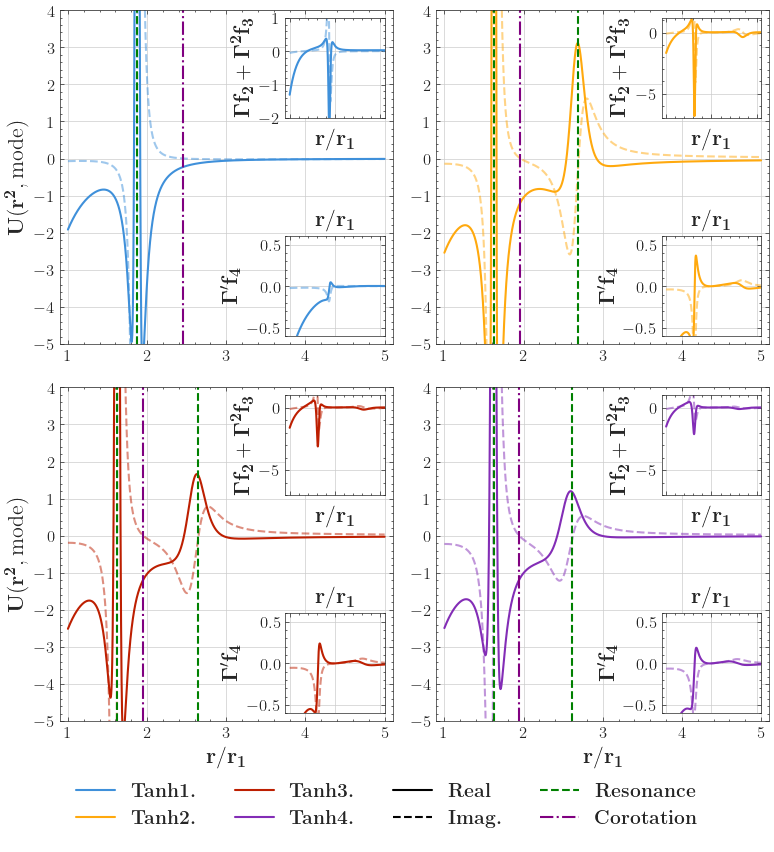

In [ ]:
### PLOT Ur
c0_desat = sns.desaturate(color_arr[0], 0.1)
c1_desat = sns.desaturate(color_arr[1], 0.1)
c2_desat = sns.desaturate(color_arr[2], 0.1)
c4_desat = sns.desaturate(color_arr[4], 0.1)

# plt.figure(figsize=(5,5))
fig, ax = plt.subplots(2,2, figsize=(8, 8))

ax[0][0].plot(rp, Ur_Kep.real, label=r'\textbf{Kep.}', color = color_arr[0])
ax[0][1].plot(rp, Ur_Sat.real, label=r'\textbf{Sat.}', color = color_arr[1])
ax[1][0].plot(rp, Ur_Sh2.real, label=r'\textbf{Sh2.}', color = color_arr[2])
ax[1][1].plot(rp, Ur_Tanh.real, label=r'\textbf{Tanh.}', color = color_arr[4])

ax[0][0].plot(rp, Ur_Kep.imag, color = color_arr[0], linestyle = 'dashed', alpha = 0.5)
ax[0][1].plot(rp, Ur_Sat.imag, color = color_arr[1], linestyle = 'dashed', alpha = 0.5)
ax[1][0].plot(rp, Ur_Sh2.imag, color = color_arr[2], linestyle = 'dashed', alpha = 0.5)
ax[1][1].plot(rp, Ur_Tanh.imag, color = color_arr[4], linestyle = 'dashed', alpha = 0.5)

ax[0][0].axvline(x=r_vec_Kep[0], linestyle = '--', color = 'green', label = r'\textbf{Resonance}')
ax[0][0].axvline(x=r_vec_Kep[1], linestyle = '--', color = 'green', label = r'\textbf{Resonance}')
ax[0][0].axvline(x=r_vec_Kep[4], linestyle = '-.', color = 'purple')
ax[0][1].axvline(x=r_vec_Sat[0], linestyle = '--', color = 'green', label = r'\textbf{Resonance}')
ax[0][1].axvline(x=r_vec_Sat[1], linestyle = '--', color = 'green', label = r'\textbf{Resonance}')
ax[0][1].axvline(x=r_vec_Sat[4], linestyle = '-.', color = 'purple')
ax[1][0].axvline(x=r_vec_Sh2[0], linestyle = '--', color = 'green', label = r'\textbf{Resonance}')
ax[1][0].axvline(x=r_vec_Sh2[1], linestyle = '--', color = 'green', label = r'\textbf{Resonance}')
ax[1][0].axvline(x=r_vec_Sh2[4], linestyle = '-.', color = 'purple')
ax[1][1].axvline(x=r_vec_Tanh[0], linestyle = '--', color = 'green', label = r'\textbf{Resonance}')
ax[1][1].axvline(x=r_vec_Tanh[1], linestyle = '--', color = 'green', label = r'\textbf{Resonance}')
ax[1][1].axvline(x=r_vec_Tanh[4], linestyle = '-.', color = 'purple')

# ax.plot(rp, Ur_Kep.imag, color = color_arr[0], linestyle = '--', alpha = 0.5)
# ax.plot(rp, Ur_Sat.imag, color = color_arr[1], linestyle = '--', alpha = 0.5)
# ax.plot(rp, Ur_Sh2.imag, color = color_arr[2], linestyle = '--', alpha = 0.5)
# ax.plot(rp, Ur_Tanh.imag, color = color_arr[4], linestyle = '--', alpha = 0.5)

#### PLOT FLOW SHEAR energy
ax_inset = inset_axes(ax[0][0], width="30%", height="30%", loc='upper right')
ax_inset.set_xticks(range(1,6))
ax_inset.axes.xaxis.set_ticklabels([])
ax_inset.set_xlabel(r'$\mathbf{r/r_1}$', fontsize = 16)
ax_inset.set_ylabel(r"$\mathbf{\Gamma f_2 + \Gamma^2 f_3}$", fontsize = 16)
ax_inset.plot(rp, (Ur_Kep_f2+Ur_Kep_f3).real, color = color_arr[0])
ax_inset.plot(rp, (Ur_Kep_f2+Ur_Kep_f3).imag, color = color_arr[0], linestyle = 'dashed', alpha = 0.5)
ax_inset.set_ylim(-2.,1)

ax_inset.set_xlim(0.9, 3.1)

#### PLOT FLOW SHEAR energy
ax_inset = inset_axes(ax[0][1], width="30%", height="30%", loc='upper right')
ax_inset.set_xticks(range(1,6))
ax_inset.axes.xaxis.set_ticklabels([])
ax_inset.set_xlabel(r'$\mathbf{r/r_1}$', fontsize = 16)
ax_inset.set_ylabel(r"$\mathbf{\Gamma f_2 + \Gamma^2 f_3}$", fontsize = 16)
ax_inset.plot(rp, (Ur_Sat_f2+Ur_Sat_f3).real, color = color_arr[1])
ax_inset.plot(rp, (Ur_Sat_f2+Ur_Sat_f3).imag, color = color_arr[1], linestyle = 'dashed', alpha = 0.5)
ax_inset.set_ylim(-7,1.2)
ax_inset.set_xlim(0.9, 3.1)

#### PLOT FLOW SHEAR energy
ax_inset = inset_axes(ax[1][0], width="30%", height="30%", loc='upper right')
ax_inset.set_xticks(range(1,6))
ax_inset.axes.xaxis.set_ticklabels([])
ax_inset.set_xlabel(r'$\mathbf{r/r_1}$', fontsize = 16)
ax_inset.set_ylabel(r"$\mathbf{\Gamma f_2 + \Gamma^2 f_3}$", fontsize = 16)
ax_inset.plot(rp, (Ur_Sh2_f2+Ur_Sh2_f3).real, color = color_arr[2])
ax_inset.plot(rp, (Ur_Sh2_f2+Ur_Sh2_f3).imag, color = color_arr[2], linestyle = 'dashed', alpha = 0.5)
ax_inset.set_ylim(-7.,1)

ax_inset.set_xlim(0.9, 3.1)

#### PLOT FLOW SHEAR energy
ax_inset = inset_axes(ax[1][1], width="30%", height="30%", loc='upper right')
ax_inset.set_xticks(range(1,6))
ax_inset.axes.xaxis.set_ticklabels([])
ax_inset.set_xlabel(r'$\mathbf{r/r_1}$', fontsize = 16)
ax_inset.set_ylabel(r"$\mathbf{\Gamma f_2 + \Gamma^2 f_3}$", fontsize = 16)
ax_inset.plot(rp, Ur_Tanh_f2.real, color = color_arr[4])
ax_inset.plot(rp, Ur_Tanh_f2.imag, color = color_arr[4], linestyle = 'dashed', alpha = 0.5)
ax_inset.set_ylim(-7.,1)

ax_inset.set_xlim(0.9, 3.1)

#### PLOT LOWER PLOTS
ax_inset = inset_axes(ax[0][0], width="30%", height="30%", loc='lower right')
ax_inset.set_xticks(range(1,6))
ax_inset.axes.xaxis.set_ticklabels([])
ax_inset.set_xlabel(r'$\mathbf{r/r_1}$', fontsize = 16)
ax_inset.set_ylabel(r"$\mathbf{\Gamma'f_4}$", fontsize = 16)
ax_inset.plot(rp, (Ur_Kep_f4).real, color = color_arr[0])
ax_inset.plot(rp, (Ur_Kep_f4).imag, color = color_arr[0], linestyle = 'dashed', alpha = 0.5)
ax_inset.set_ylim(-0.6,.6)
ax_inset.set_xlim(0.9, 3.1)
ax_inset.xaxis.set_label_position('top')
ax_inset.xaxis.set_ticks_position('top')

#### PLOT Mode structure
ax_inset = inset_axes(ax[0][1], width="30%", height="30%", loc='lower right')
ax_inset.set_xticks(range(1,6))
ax_inset.axes.xaxis.set_ticklabels([])
ax_inset.set_xlabel(r'$\mathbf{r/r_1}$', fontsize = 16)
ax_inset.set_ylabel(r"$\mathbf{\Gamma'f_4}$", fontsize = 16)
ax_inset.plot(rp, (Ur_Sat_f4).real, color = color_arr[1])
ax_inset.plot(rp, (Ur_Sat_f4).imag, color = color_arr[1], linestyle = 'dashed', alpha = 0.5)
ax_inset.set_ylim(-0.6,.6)
ax_inset.set_xlim(0.9, 3.1)
ax_inset.xaxis.set_label_position('top')
ax_inset.xaxis.set_ticks_position('top')

#### PLOT Mode structure
ax_inset = inset_axes(ax[1][0], width="30%", height="30%", loc='lower right')
ax_inset.set_xticks(range(1,6))
ax_inset.axes.xaxis.set_ticklabels([])
ax_inset.set_xlabel(r'$\mathbf{r/r_1}$', fontsize = 16)
ax_inset.set_ylabel(r"$\mathbf{\Gamma'f_4}$", fontsize = 16)
ax_inset.plot(rp, (Ur_Sh2_f4).real, color = color_arr[2])
ax_inset.plot(rp, (Ur_Sh2_f4).imag, color = color_arr[2], linestyle = 'dashed', alpha = 0.5)
ax_inset.set_ylim(-0.6,.6)
ax_inset.set_xlim(0.9, 3.1)
ax_inset.xaxis.set_label_position('top')
ax_inset.xaxis.set_ticks_position('top')

#### PLOT Mode structure
ax_inset = inset_axes(ax[1][1], width="30%", height="30%", loc='lower right')
ax_inset.set_xticks(range(1,6))
ax_inset.axes.xaxis.set_ticklabels([])
ax_inset.set_xlabel(r'$\mathbf{r/r_1}$', fontsize = 16)
ax_inset.set_ylabel(r"$\mathbf{\Gamma'f_4}$", fontsize = 16)
ax_inset.plot(rp, (Ur_Tanh_f4).real, color = color_arr[4])
ax_inset.plot(rp, (Ur_Tanh_f4).imag, color = color_arr[4], linestyle = 'dashed', alpha = 0.5)
ax_inset.set_ylim(-0.6,.6)
ax_inset.set_xlim(0.9, 3.1)
ax_inset.xaxis.set_label_position('top')
ax_inset.xaxis.set_ticks_position('top')

# ######### Settings
ax[0][0].set_ylabel(r"$\mathbf{U(r^2, \mathrm{mode})}$",fontsize=16)
ax[0][0].set_xlim(0.9, 5.1)
ax[0][0].set_ylim(-5,4)

ax[0][1].set_xlim(0.9, 5.1)
ax[0][1].set_ylim(-5,4)

ax[1][0].set_xlabel(r'$\mathbf{r/r_1}$',fontsize=16)
ax[1][0].set_ylabel(r"$\mathbf{U(r^2, \mathrm{mode})}$",fontsize=16)
ax[1][0].set_xlim(0.9, 5.1)
ax[1][0].set_ylim(-5,4)

ax[1][1].set_xlabel(r'$\mathbf{r/r_1}$',fontsize=16)
ax[1][1].set_xlim(0.9, 5.1)
ax[1][1].set_ylim(-5,4)

from matplotlib.lines import Line2D


K = Line2D([0], [0], color=color_arr[0], linestyle='-', label=r'\textbf{Kep.}')
S = Line2D([0], [0], color=color_arr[1], linestyle='-', label=r'\textbf{Sat.}')
Sh = Line2D([0], [0], color=color_arr[2], linestyle='-', label=r'\textbf{Sh2.}')
Ta = Line2D([0], [0], color=color_arr[4], linestyle='-', label=r'\textbf{Tanh.}')

R1 = Line2D([0], [0], color='black', linestyle='-')
I1 = Line2D([0], [0], color='black', linestyle='--')

R2 = Line2D([0], [0], color='green', linestyle='--')
I2 = Line2D([0], [0], color='purple', linestyle='-.')

# Add the dummy entries to the legend
lines = [K,S, Sh, Ta, R1, I1, R2, I2]
labels = [r'\textbf{Tanh1.}', r'\textbf{Tanh2.}', r'\textbf{Tanh3.}', r'\textbf{Tanh4.}', r'\textbf{Real}', r'\textbf{Imag.}', r'\textbf{Resonance}', r'\textbf{Corotation}']

# Create the legend below the plot
fig.legend(lines, labels, loc='lower center', ncol=4, 
           bbox_to_anchor=(0.5, -0.1),  # Position the legend below the plot
           frameon=False,  # Turn on the frame (border)
           edgecolor='black',  # Set the border color
           facecolor='white',  # Set the background color of the legend box
           borderpad=1,  # Padding between the legend text and the border
           borderaxespad=1, fontsize = 14)

plt.tight_layout()
# plt.savefig(f'Potentials-Non-Ideal/' + type + f'_{kn}k1-potential' +'-Comb-5r1-Bz' + '.png', bbox_inches='tight', dpi = 500)
# plt.savefig(f'Potentials-Non-Ideal/' + type + f'_{kn}k1-potential' +'-Comb-5r1-Bz' + '.svg', bbox_inches='tight', format = 'svg')
# plt.savefig(f'Potentials-Non-Ideal/' + type + f'_{kn}k1-potential' +'-Comb-5r1-Exp-Vort-Bz' + '.pdf', bbox_inches='tight', dpi = 500)

plt.show()

# Hydrodynamic Modes (Combined, Non-Ideal)

## Method two (Bifurcation)

In [13]:
def resonance_bifurcation(r2, w, m, elecd, Pm, k2r, k2i,kz=np.pi/4, Bz=12.967, B0 = 0, keplerian = True, q = 1/2, toprint = False):
    reso = 5000
    r = np.linspace(1E-6,r2*2, reso)
    if(1 == 1):
        # Define Normalizations
        r1 = 0.1

        ## Define OMEGA0:
        bb = 10000
        v0 = bb/np.sqrt(r1)
        Omega0 = v0/r1
        elecd = elecd / (r1**2*Omega0)
        nu = elecd * Pm

        ## SET CONSTANTS
        rho = (1.0*10**19) * (2.0*1.6725*10**(-27))
        mu_0 = 1.2566*10**(-6)
            
        vAp1 = B0/(r1*Omega0*np.sqrt(rho*mu_0)*10000)
        vAz = Bz / (r1*Omega0*np.sqrt(rho*mu_0)*10000)
        vAp = vAp1/r
        vp1 = 1
        wA = (m/r)*vAp + kz*vAz
        x = r**2
        if keplerian == True:
            x = r**2
            vp = vp1/(x**(1/4))
            W = vp/np.sqrt(x)
        elif keplerian == 'khalzov':
            W = vp1/(r**(3/2))
        elif keplerian == 'rigid':
            W = vp1
        elif keplerian == False:
            vp = vp1/(x**(q/2))
            W = vp/r
            Wp = (-1*(q+1)/2)*(W/x)
        elif keplerian == 'Sh2':
            W = vp1/r**2
            Wp = -2*vp1/r**3
            Wpp = 6*vp1/r**4
        elif keplerian == 'saturated':
            x = r**2
            A0 = 1.4923889E-02
            A1 = -1.0114824E-01
            A2 = 8.5753488E-02
            A3 = -2.8021088E-02
            A4 = -4.7882189E-01
            A5 = 1.0877462E-01
            A6 = 6.7857446E+00
            A7 = -5.0846913E+00
            A8 = -4.3114342E+01
            A9 = 5.2943846E+01
            A10 = 1.2219068E+02
            A11 = -1.9185099E+02
            A12 = -1.7535573E+02
            A13 = 3.4808679E+02
            A14 = 1.1975807E+02
            A15 = -3.4500839E+02
            A16 =  -1.4844420E+01
            A17 = 1.7930272E+02
            A18 = -2.5033736E+01
            W = 0.08875 + 0.91125/np.sqrt(x)**2 + A0 + A1*(np.sqrt(x)-2) + A2*(np.sqrt(x)-2)**2+A3*(np.sqrt(x)-2)**3 + A4*(np.sqrt(x)-2)**4 + A5*(np.sqrt(x)-2)**5 + A6*(np.sqrt(x)-2)**6 + A7*(np.sqrt(x)-2)**7 + A8*(np.sqrt(x)-2)**8 + A9*(np.sqrt(x)-2)**9 + A10*(np.sqrt(x)-2)**10 + A11*(np.sqrt(x)-2)**11 + A12*(np.sqrt(x)-2)**12 + A13*(np.sqrt(x)-2)**13 + A14*(np.sqrt(x)-2)**14 + A15*(np.sqrt(x)-2)**15 + A16*(np.sqrt(x)-2)**16 + A17*(np.sqrt(x)-2)**17 + A18*(np.sqrt(x)-2)**18 - ( A1 + A3 + A5 + A7 + A9 + A11 + A13 + A15 + A17 )*(np.sqrt(x)-2)**19 - ( A0 + A2 + A4 + A6 + A8 + A10 + A12 + A14 + A16 + A18 )*(np.sqrt(x)-2)**20
            
        elif keplerian == 'saturated2':
            data = pd.read_csv('Re750_4_0.1_0_to_1.txt', header = None, delim_whitespace=True)
            r_f = data[0]
            W = data[1]
            Wr = W
            W_f = i2.CubicSpline(r_f, W)
            Wp_f = W_f.derivative()
            W = W_f(r)
        elif keplerian == 'tanh':
            a = c = b = d = 1
            d = 0.85
            W = d*np.tanh(-c*r+a)+b
            Wp = -c * d * (1/np.cosh(-c * r + a))**2
            Wpp = -2 * c**2 * d * np.tanh(-c * r + a)*(1/np.cosh(-c * r + a))**2
        elif keplerian == 'tanhv3':
            a = c = b = d = 1
            d = 0.84
            W = d*np.tanh(-c*r+a)+b
            Wp = -c * d * (1/np.cosh(-c * r + a))**2
            Wpp = -2 * c**2 * d * np.tanh(-c * r + a)*(1/np.cosh(-c * r + a))**2
        elif keplerian == 'tanhv4':
            a = c = b = d = 1
            a = 0.6
            c = a
            d = 0.9
            W= d*np.tanh(-c*r+a)+b
            Wp = -c * d * (1/np.cosh(-c * r + a))**2
            Wpp = -2 * c**2 * d * np.tanh(-c * r + a)*(1/np.cosh(-c * r + a))**2
        elif keplerian == 'mKep':
            r10 = 1.5
            R0 = 1
            W = np.zeros(len(r))
            Wp = np.zeros(len(r))
            Wpp = np.zeros(len(r))
            for j in range(0,len(r)):
                if(r[j] < r10):
                    W[j] = 1
                    Wp[j] = 0
                    Wpp[j]= 0
                else:
                    W[j] = 1/(1+((r[j]-r10)/R0)**(3/2))
                    Wp[j] = -3/(2*R0)*((r[j]-r10)/R0)**(1/2)/(1+((r[j]-r10)/R0)**(3/2))**2
                    u = 1+((r[j]-r10)/R0)**(3/2)
                    up = 3/(2*R0)*((r[j]-r10)/R0)**(1/2)
                    Wpp[j] = -( (3/(4*R0**2)*(1/R0*(r[j]-r10))**(-1/2))*u**2 - (3/(2*R0) * (1/R0*(r[j]-r10))**(1/2))*2*u*up)/(u**4)
        elif keplerian == 'mKep2':
            r10 = 1.5
            R0 = 1.5
            W = np.zeros(len(r))
            Wp = np.zeros(len(r))
            Wpp = np.zeros(len(r))
            for j in range(0,len(r)):
                if(r[j] < r10):
                    W[j] = 1
                    Wp[j] = 0
                    Wpp[j]= 0
                else:
                    W[j] = 1/(1+((r[j]-r10)/R0)**(3/2))
                    Wp[j] = -3/(2*R0)*((r[j]-r10)/R0)**(1/2)/(1+((r[j]-r10)/R0)**(3/2))**2
                    u = 1+((r[j]-r10)/R0)**(3/2)
                    up = 3/(2*R0)*((r[j]-r10)/R0)**(1/2)
                    Wpp[j] = -( (3/(4*R0**2)*(1/R0*(r[j]-r10))**(-1/2))*u**2 - (3/(2*R0) * (1/R0*(r[j]-r10))**(1/2))*2*u*up)/(u**4)
        
        elif keplerian == 'exp1':
            a = 1
            W = a*np.exp(1-r) + 1-a
            Wp = -a*np.exp(1-r)
            Wpp = a*np.exp(1-r)
        elif keplerian == 'exp2':
            a = 1
            W = a*r*np.exp(1-r) + (1-a)
            Wp = a*np.exp(1-r)*(1-r)
            Wpp = a*np.exp(1-r)*(r-2)
        elif keplerian == 'exp3':
            a = .75
            W = a*r*np.exp(1-r) + (1-a)
            Wp = a*np.exp(1-r)*(1-r)
            Wpp = a*np.exp(1-r)*(r-2)
        elif keplerian == 'exp4':
            a = 0.73123123
            W = a*np.exp(1-r) + 1-a
            Wp = -a*np.exp(1-r)
            Wpp = a*np.exp(1-r)
        elif keplerian == 'exp5':
            a = 0.8689352412721272
            W = a*np.exp(1-r) + 1-a
            Wp = -a*np.exp(1-r)
            Wpp = a*np.exp(1-r)
        elif keplerian == 'exp6':
            a = 0.9366210025563255
            W = a*np.exp(1-r) + 1-a
            Wp = -a*np.exp(1-r)
            Wpp = a*np.exp(1-r)
        elif keplerian == 'exp7':
            a = 0.9448239074457745
            W = a*np.exp(1-r) + 1-a
            Wp = -a*np.exp(1-r)
            Wpp = a*np.exp(1-r)
        elif keplerian == 'exp8':
            a = 0.9409132827360274
            W = a*np.exp(1-r) + 1-a
            Wp = -a*np.exp(1-r)
            Wpp = a*np.exp(1-r)
        elif keplerian == 'exp9':
            a = 0.9375052606522065
            W = a*np.exp(1-r) + 1-a
            Wp = -a*np.exp(1-r)
            Wpp = a*np.exp(1-r)
        elif keplerian == 'tanhv5':
            a = c = b = d = 1
            a = 1
            c = a
            d = 0.77
            W= d*np.tanh(-c*r+a)+b
            Wp = -c * d * (1/np.cosh(-c * r + a))**2
            Wpp = -2 * c**2 * d * np.tanh(-c * r + a)*(1/np.cosh(-c * r + a))**2
        elif keplerian == 'tanhv6':
            a = c = b = d = 1
            a = 1
            c = a
            d = 0.5940
            W= d*np.tanh(-c*r+a)+b
            Wp = -c * d * (1/np.cosh(-c * r + a))**2
            Wpp = -2 * c**2 * d * np.tanh(-c * r + a)*(1/np.cosh(-c * r + a))**2
        elif keplerian == 'tanhv7':
            a = c = b = d = 1
            a = 1
            c = a
            d = 0.7488
            W= d*np.tanh(-c*r+a)+b
            Wp = -c * d * (1/np.cosh(-c * r + a))**2
            Wpp = -2 * c**2 * d * np.tanh(-c * r + a)*(1/np.cosh(-c * r + a))**2
        elif keplerian == 'tanhv8':
            a = c = b = d = 1
            a = 1
            c = a
            d = 0.8463
            W= d*np.tanh(-c*r+a)+b
            Wp = -c * d * (1/np.cosh(-c * r + a))**2
            Wpp = -2 * c**2 * d * np.tanh(-c * r + a)*(1/np.cosh(-c * r + a))**2
        elif keplerian == 'tanhv9':
            a = c = b = d = 1
            a = 1
            c = a
            d = 0.8158134053621449
            W= d*np.tanh(-c*r+a)+b
            Wp = -c * d * (1/np.cosh(-c * r + a))**2
            Wpp = -2 * c**2 * d * np.tanh(-c * r + a)*(1/np.cosh(-c * r + a))**2
        elif keplerian == 'tanhv10':
            a = c = b = d = 1
            a = 1
            c = a
            d = 0.8303
            W= d*np.tanh(-c*r+a)+b
            Wp = -c * d * (1/np.cosh(-c * r + a))**2
            Wpp = -2 * c**2 * d * np.tanh(-c * r + a)*(1/np.cosh(-c * r + a))**2
    tol = 1E-3
    ### Set freqs
    wb = w-m*W
    Q = k2r(r)
    conv = ((4*wA**2 - (elecd-nu)**2*Q**2))
    res_cond_p = wb - 1/2*np.sqrt(conv, dtype = np.complex64) - (1j*(elecd + nu)/2*Q)
    res_cond_m = wb + 1/2*np.sqrt(conv, dtype = np.complex64) - (1j*(elecd + nu)/2*Q) 
    
    if(toprint == True):
        tol = 1E-3
        rc = r[(np.where(np.abs(wb.real) < tol))[:]][0]
        plt.figure()
        plt.plot(r, res_cond_p, label = 'm', color = 'g')
        plt.plot(r, res_cond_m, label = 'p', color = 'b', linestyle = '--')
        plt.plot(r, wA**2-(wb-1j*elecd*Q)*(wb-1j*nu*Q), label = 'comb', color = 'orange', linestyle = '--')
        plt.axvline(x = rc, color = 'purple', linestyle = '-.', label = 'c')
        plt.axvline(x = 1, color = 'k')
        plt.axvline(x = r2, color = 'k')
        plt.ylim(-.1,.1)
        plt.xlim(0.9,5.1)
        plt.axhline(0, linestyle = 'dashed', color = 'k')
        plt.ylabel('Resonance condition')
        plt.legend()
        plt.xlabel('r')
        plt.show()
        
    rc = r[(np.where(np.abs(wb.real) < tol))[:]][0]
    
    return res_cond_p, rc, r
    # return res_cond_p

In [14]:
def resonance_bifurcation_func_p(r, w, m, elecd, Pm, k2r, k2i,kz=np.pi/4, Bz=12.967, B0 = 0, keplerian = True, q = 1/2, toprint = False):
    reso = 5000
    # r = np.linspace(1E-6,r2*2, reso)
    if(1 == 1):
        # Define Normalizations
        r1 = 0.1

        ## Define OMEGA0:
        bb = 10000
        v0 = bb/np.sqrt(r1)
        Omega0 = v0/r1
        elecd = elecd / (r1**2*Omega0)
        nu = elecd * Pm

        ## SET CONSTANTS
        rho = (1.0*10**19) * (2.0*1.6725*10**(-27))
        mu_0 = 1.2566*10**(-6)
            
        vAp1 = B0/(r1*Omega0*np.sqrt(rho*mu_0)*10000)
        vAz = Bz / (r1*Omega0*np.sqrt(rho*mu_0)*10000)
        vAp = vAp1/r
        vp1 = 1
        wA = (m/r)*vAp + kz*vAz
        x = r**2
        if keplerian == True:
            x = r**2
            vp = vp1/(x**(1/4))
            W = vp/np.sqrt(x)
        elif keplerian == 'khalzov':
            W = vp1/(r**(3/2))
        elif keplerian == 'rigid':
            W = vp1
        elif keplerian == False:
            vp = vp1/(x**(q/2))
            W = vp/r
            Wp = (-1*(q+1)/2)*(W/x)
        elif keplerian == 'Sh2':
            W = vp1/r**2
            Wp = -2*vp1/r**3
            Wpp = 6*vp1/r**4
        elif keplerian == 'saturated':
            x = r**2
            A0 = 1.4923889E-02
            A1 = -1.0114824E-01
            A2 = 8.5753488E-02
            A3 = -2.8021088E-02
            A4 = -4.7882189E-01
            A5 = 1.0877462E-01
            A6 = 6.7857446E+00
            A7 = -5.0846913E+00
            A8 = -4.3114342E+01
            A9 = 5.2943846E+01
            A10 = 1.2219068E+02
            A11 = -1.9185099E+02
            A12 = -1.7535573E+02
            A13 = 3.4808679E+02
            A14 = 1.1975807E+02
            A15 = -3.4500839E+02
            A16 =  -1.4844420E+01
            A17 = 1.7930272E+02
            A18 = -2.5033736E+01
            W = 0.08875 + 0.91125/np.sqrt(x)**2 + A0 + A1*(np.sqrt(x)-2) + A2*(np.sqrt(x)-2)**2+A3*(np.sqrt(x)-2)**3 + A4*(np.sqrt(x)-2)**4 + A5*(np.sqrt(x)-2)**5 + A6*(np.sqrt(x)-2)**6 + A7*(np.sqrt(x)-2)**7 + A8*(np.sqrt(x)-2)**8 + A9*(np.sqrt(x)-2)**9 + A10*(np.sqrt(x)-2)**10 + A11*(np.sqrt(x)-2)**11 + A12*(np.sqrt(x)-2)**12 + A13*(np.sqrt(x)-2)**13 + A14*(np.sqrt(x)-2)**14 + A15*(np.sqrt(x)-2)**15 + A16*(np.sqrt(x)-2)**16 + A17*(np.sqrt(x)-2)**17 + A18*(np.sqrt(x)-2)**18 - ( A1 + A3 + A5 + A7 + A9 + A11 + A13 + A15 + A17 )*(np.sqrt(x)-2)**19 - ( A0 + A2 + A4 + A6 + A8 + A10 + A12 + A14 + A16 + A18 )*(np.sqrt(x)-2)**20
            
        elif keplerian == 'saturated2':
            data = pd.read_csv('Re750_4_0.1_0_to_1.txt', header = None, delim_whitespace=True)
            r_f = data[0]
            W = data[1]
            Wr = W
            W_f = i2.CubicSpline(r_f, W)
            Wp_f = W_f.derivative()
            W = W_f(r)
        elif keplerian == 'tanh':
            a = c = b = d = 1
            d = 0.85
            W = d*np.tanh(-c*r+a)+b
            Wp = -c * d * (1/np.cosh(-c * r + a))**2
            Wpp = -2 * c**2 * d * np.tanh(-c * r + a)*(1/np.cosh(-c * r + a))**2
        elif keplerian == 'tanhv3':
            a = c = b = d = 1
            d = 0.84
            W = d*np.tanh(-c*r+a)+b
            Wp = -c * d * (1/np.cosh(-c * r + a))**2
            Wpp = -2 * c**2 * d * np.tanh(-c * r + a)*(1/np.cosh(-c * r + a))**2
        elif keplerian == 'tanhv4':
            a = c = b = d = 1
            a = 0.6
            c = a
            d = 0.9
            W= d*np.tanh(-c*r+a)+b
            Wp = -c * d * (1/np.cosh(-c * r + a))**2
            Wpp = -2 * c**2 * d * np.tanh(-c * r + a)*(1/np.cosh(-c * r + a))**2
        elif keplerian == 'mKep':
            r10 = 1.5
            R0 = 1
            W = np.zeros(len(r))
            Wp = np.zeros(len(r))
            Wpp = np.zeros(len(r))
            for j in range(0,len(r)):
                if(r[j] < r10):
                    W[j] = 1
                    Wp[j] = 0
                    Wpp[j]= 0
                else:
                    W[j] = 1/(1+((r[j]-r10)/R0)**(3/2))
                    Wp[j] = -3/(2*R0)*((r[j]-r10)/R0)**(1/2)/(1+((r[j]-r10)/R0)**(3/2))**2
                    u = 1+((r[j]-r10)/R0)**(3/2)
                    up = 3/(2*R0)*((r[j]-r10)/R0)**(1/2)
                    Wpp[j] = -( (3/(4*R0**2)*(1/R0*(r[j]-r10))**(-1/2))*u**2 - (3/(2*R0) * (1/R0*(r[j]-r10))**(1/2))*2*u*up)/(u**4)
        elif keplerian == 'mKep2':
            r10 = 1.5
            R0 = 1.5
            W = np.zeros(len(r))
            Wp = np.zeros(len(r))
            Wpp = np.zeros(len(r))
            for j in range(0,len(r)):
                if(r[j] < r10):
                    W[j] = 1
                    Wp[j] = 0
                    Wpp[j]= 0
                else:
                    W[j] = 1/(1+((r[j]-r10)/R0)**(3/2))
                    Wp[j] = -3/(2*R0)*((r[j]-r10)/R0)**(1/2)/(1+((r[j]-r10)/R0)**(3/2))**2
                    u = 1+((r[j]-r10)/R0)**(3/2)
                    up = 3/(2*R0)*((r[j]-r10)/R0)**(1/2)
                    Wpp[j] = -( (3/(4*R0**2)*(1/R0*(r[j]-r10))**(-1/2))*u**2 - (3/(2*R0) * (1/R0*(r[j]-r10))**(1/2))*2*u*up)/(u**4)
        
        elif keplerian == 'exp1':
            a = 1
            W = a*np.exp(1-r) + 1-a
            Wp = -a*np.exp(1-r)
            Wpp = a*np.exp(1-r)
        elif keplerian == 'exp2':
            a = 1
            W = a*r*np.exp(1-r) + (1-a)
            Wp = a*np.exp(1-r)*(1-r)
            Wpp = a*np.exp(1-r)*(r-2)
        elif keplerian == 'exp3':
            a = .75
            W = a*r*np.exp(1-r) + (1-a)
            Wp = a*np.exp(1-r)*(1-r)
            Wpp = a*np.exp(1-r)*(r-2)
        elif keplerian == 'exp4':
            a = 0.73123123
            W = a*np.exp(1-r) + 1-a
            Wp = -a*np.exp(1-r)
            Wpp = a*np.exp(1-r)
        elif keplerian == 'exp5':
            a = 0.8689352412721272
            W = a*np.exp(1-r) + 1-a
            Wp = -a*np.exp(1-r)
            Wpp = a*np.exp(1-r)
        elif keplerian == 'exp6':
            a = 0.9366210025563255
            W = a*np.exp(1-r) + 1-a
            Wp = -a*np.exp(1-r)
            Wpp = a*np.exp(1-r)
        elif keplerian == 'exp7':
            a = 0.9448239074457745
            W = a*np.exp(1-r) + 1-a
            Wp = -a*np.exp(1-r)
            Wpp = a*np.exp(1-r)
        elif keplerian == 'exp8':
            a = 0.9409132827360274
            W = a*np.exp(1-r) + 1-a
            Wp = -a*np.exp(1-r)
            Wpp = a*np.exp(1-r)
        elif keplerian == 'exp9':
            a = 0.9375052606522065
            W = a*np.exp(1-r) + 1-a
            Wp = -a*np.exp(1-r)
            Wpp = a*np.exp(1-r)
        elif keplerian == 'tanhv5':
            a = c = b = d = 1
            a = 1
            c = a
            d = 0.77
            W= d*np.tanh(-c*r+a)+b
            Wp = -c * d * (1/np.cosh(-c * r + a))**2
            Wpp = -2 * c**2 * d * np.tanh(-c * r + a)*(1/np.cosh(-c * r + a))**2
        elif keplerian == 'tanhv6':
            a = c = b = d = 1
            a = 1
            c = a
            d = 0.5940
            W= d*np.tanh(-c*r+a)+b
            Wp = -c * d * (1/np.cosh(-c * r + a))**2
            Wpp = -2 * c**2 * d * np.tanh(-c * r + a)*(1/np.cosh(-c * r + a))**2
        elif keplerian == 'tanhv7':
            a = c = b = d = 1
            a = 1
            c = a
            d = 0.7488
            W= d*np.tanh(-c*r+a)+b
            Wp = -c * d * (1/np.cosh(-c * r + a))**2
            Wpp = -2 * c**2 * d * np.tanh(-c * r + a)*(1/np.cosh(-c * r + a))**2
        elif keplerian == 'tanhv8':
            a = c = b = d = 1
            a = 1
            c = a
            d = 0.8463
            W= d*np.tanh(-c*r+a)+b
            Wp = -c * d * (1/np.cosh(-c * r + a))**2
            Wpp = -2 * c**2 * d * np.tanh(-c * r + a)*(1/np.cosh(-c * r + a))**2
        elif keplerian == 'tanhv9':
            a = c = b = d = 1
            a = 1
            c = a
            d = 0.8158134053621449
            W= d*np.tanh(-c*r+a)+b
            Wp = -c * d * (1/np.cosh(-c * r + a))**2
            Wpp = -2 * c**2 * d * np.tanh(-c * r + a)*(1/np.cosh(-c * r + a))**2
        elif keplerian == 'tanhv10':
            a = c = b = d = 1
            a = 1
            c = a
            d = 0.8303
            W= d*np.tanh(-c*r+a)+b
            Wp = -c * d * (1/np.cosh(-c * r + a))**2
            Wpp = -2 * c**2 * d * np.tanh(-c * r + a)*(1/np.cosh(-c * r + a))**2
    tol = 1E-3
    ### Set freqs
    wb = w-m*W
    Q = k2r(r)
    conv = ((4*wA**2 - (elecd-nu)**2*Q**2))
    res_cond_p = wb - 1/2*np.sqrt(conv, dtype = np.complex64) - (1j*(elecd + nu)/2*Q)
    res_cond_m = wb + 1/2*np.sqrt(conv, dtype = np.complex64) - (1j*(elecd + nu)/2*Q) 

    return res_cond_m

In [15]:
def resonance_bifurcation_func_m(r, w, m, elecd, Pm, k2r, k2i,kz=np.pi/4, Bz=12.967, B0 = 0, keplerian = True, q = 1/2, toprint = False):
    reso = 5000
    # r = np.linspace(1E-6,r2*2, reso)
    if(1 == 1):
        # Define Normalizations
        r1 = 0.1

        ## Define OMEGA0:
        bb = 10000
        v0 = bb/np.sqrt(r1)
        Omega0 = v0/r1
        elecd = elecd / (r1**2*Omega0)
        nu = elecd * Pm

        ## SET CONSTANTS
        rho = (1.0*10**19) * (2.0*1.6725*10**(-27))
        mu_0 = 1.2566*10**(-6)
            
        vAp1 = B0/(r1*Omega0*np.sqrt(rho*mu_0)*10000)
        vAz = Bz / (r1*Omega0*np.sqrt(rho*mu_0)*10000)
        vAp = vAp1/r
        vp1 = 1
        wA = (m/r)*vAp + kz*vAz
        x = r**2
        if keplerian == True:
            x = r**2
            vp = vp1/(x**(1/4))
            W = vp/np.sqrt(x)
        elif keplerian == 'khalzov':
            W = vp1/(r**(3/2))
        elif keplerian == 'rigid':
            W = vp1
        elif keplerian == False:
            vp = vp1/(x**(q/2))
            W = vp/r
            Wp = (-1*(q+1)/2)*(W/x)
        elif keplerian == 'Sh2':
            W = vp1/r**2
            Wp = -2*vp1/r**3
            Wpp = 6*vp1/r**4
        elif keplerian == 'saturated':
            x = r**2
            A0 = 1.4923889E-02
            A1 = -1.0114824E-01
            A2 = 8.5753488E-02
            A3 = -2.8021088E-02
            A4 = -4.7882189E-01
            A5 = 1.0877462E-01
            A6 = 6.7857446E+00
            A7 = -5.0846913E+00
            A8 = -4.3114342E+01
            A9 = 5.2943846E+01
            A10 = 1.2219068E+02
            A11 = -1.9185099E+02
            A12 = -1.7535573E+02
            A13 = 3.4808679E+02
            A14 = 1.1975807E+02
            A15 = -3.4500839E+02
            A16 =  -1.4844420E+01
            A17 = 1.7930272E+02
            A18 = -2.5033736E+01
            W = 0.08875 + 0.91125/np.sqrt(x)**2 + A0 + A1*(np.sqrt(x)-2) + A2*(np.sqrt(x)-2)**2+A3*(np.sqrt(x)-2)**3 + A4*(np.sqrt(x)-2)**4 + A5*(np.sqrt(x)-2)**5 + A6*(np.sqrt(x)-2)**6 + A7*(np.sqrt(x)-2)**7 + A8*(np.sqrt(x)-2)**8 + A9*(np.sqrt(x)-2)**9 + A10*(np.sqrt(x)-2)**10 + A11*(np.sqrt(x)-2)**11 + A12*(np.sqrt(x)-2)**12 + A13*(np.sqrt(x)-2)**13 + A14*(np.sqrt(x)-2)**14 + A15*(np.sqrt(x)-2)**15 + A16*(np.sqrt(x)-2)**16 + A17*(np.sqrt(x)-2)**17 + A18*(np.sqrt(x)-2)**18 - ( A1 + A3 + A5 + A7 + A9 + A11 + A13 + A15 + A17 )*(np.sqrt(x)-2)**19 - ( A0 + A2 + A4 + A6 + A8 + A10 + A12 + A14 + A16 + A18 )*(np.sqrt(x)-2)**20
            
        elif keplerian == 'saturated2':
            data = pd.read_csv('Re750_4_0.1_0_to_1.txt', header = None, delim_whitespace=True)
            r_f = data[0]
            W = data[1]
            Wr = W
            W_f = i2.CubicSpline(r_f, W)
            Wp_f = W_f.derivative()
            W = W_f(r)
        elif keplerian == 'tanh':
            a = c = b = d = 1
            d = 0.85
            W = d*np.tanh(-c*r+a)+b
            Wp = -c * d * (1/np.cosh(-c * r + a))**2
            Wpp = -2 * c**2 * d * np.tanh(-c * r + a)*(1/np.cosh(-c * r + a))**2
        elif keplerian == 'tanhv3':
            a = c = b = d = 1
            d = 0.84
            W = d*np.tanh(-c*r+a)+b
            Wp = -c * d * (1/np.cosh(-c * r + a))**2
            Wpp = -2 * c**2 * d * np.tanh(-c * r + a)*(1/np.cosh(-c * r + a))**2
        elif keplerian == 'tanhv4':
            a = c = b = d = 1
            a = 0.6
            c = a
            d = 0.9
            W= d*np.tanh(-c*r+a)+b
            Wp = -c * d * (1/np.cosh(-c * r + a))**2
            Wpp = -2 * c**2 * d * np.tanh(-c * r + a)*(1/np.cosh(-c * r + a))**2
        elif keplerian == 'mKep':
            r10 = 1.5
            R0 = 1
            W = np.zeros(len(r))
            Wp = np.zeros(len(r))
            Wpp = np.zeros(len(r))
            for j in range(0,len(r)):
                if(r[j] < r10):
                    W[j] = 1
                    Wp[j] = 0
                    Wpp[j]= 0
                else:
                    W[j] = 1/(1+((r[j]-r10)/R0)**(3/2))
                    Wp[j] = -3/(2*R0)*((r[j]-r10)/R0)**(1/2)/(1+((r[j]-r10)/R0)**(3/2))**2
                    u = 1+((r[j]-r10)/R0)**(3/2)
                    up = 3/(2*R0)*((r[j]-r10)/R0)**(1/2)
                    Wpp[j] = -( (3/(4*R0**2)*(1/R0*(r[j]-r10))**(-1/2))*u**2 - (3/(2*R0) * (1/R0*(r[j]-r10))**(1/2))*2*u*up)/(u**4)
        elif keplerian == 'mKep2':
            r10 = 1.5
            R0 = 1.5
            W = np.zeros(len(r))
            Wp = np.zeros(len(r))
            Wpp = np.zeros(len(r))
            for j in range(0,len(r)):
                if(r[j] < r10):
                    W[j] = 1
                    Wp[j] = 0
                    Wpp[j]= 0
                else:
                    W[j] = 1/(1+((r[j]-r10)/R0)**(3/2))
                    Wp[j] = -3/(2*R0)*((r[j]-r10)/R0)**(1/2)/(1+((r[j]-r10)/R0)**(3/2))**2
                    u = 1+((r[j]-r10)/R0)**(3/2)
                    up = 3/(2*R0)*((r[j]-r10)/R0)**(1/2)
                    Wpp[j] = -( (3/(4*R0**2)*(1/R0*(r[j]-r10))**(-1/2))*u**2 - (3/(2*R0) * (1/R0*(r[j]-r10))**(1/2))*2*u*up)/(u**4)
        
        elif keplerian == 'exp1':
            a = 1
            W = a*np.exp(1-r) + 1-a
            Wp = -a*np.exp(1-r)
            Wpp = a*np.exp(1-r)
        elif keplerian == 'exp2':
            a = 1
            W = a*r*np.exp(1-r) + (1-a)
            Wp = a*np.exp(1-r)*(1-r)
            Wpp = a*np.exp(1-r)*(r-2)
        elif keplerian == 'exp3':
            a = .75
            W = a*r*np.exp(1-r) + (1-a)
            Wp = a*np.exp(1-r)*(1-r)
            Wpp = a*np.exp(1-r)*(r-2)
        elif keplerian == 'exp4':
            a = 0.73123123
            W = a*np.exp(1-r) + 1-a
            Wp = -a*np.exp(1-r)
            Wpp = a*np.exp(1-r)
        elif keplerian == 'exp5':
            a = 0.8689352412721272
            W = a*np.exp(1-r) + 1-a
            Wp = -a*np.exp(1-r)
            Wpp = a*np.exp(1-r)
        elif keplerian == 'exp6':
            a = 0.9366210025563255
            W = a*np.exp(1-r) + 1-a
            Wp = -a*np.exp(1-r)
            Wpp = a*np.exp(1-r)
        elif keplerian == 'exp7':
            a = 0.9448239074457745
            W = a*np.exp(1-r) + 1-a
            Wp = -a*np.exp(1-r)
            Wpp = a*np.exp(1-r)
        elif keplerian == 'exp8':
            a = 0.9409132827360274
            W = a*np.exp(1-r) + 1-a
            Wp = -a*np.exp(1-r)
            Wpp = a*np.exp(1-r)
        elif keplerian == 'exp9':
            a = 0.9375052606522065
            W = a*np.exp(1-r) + 1-a
            Wp = -a*np.exp(1-r)
            Wpp = a*np.exp(1-r)
        elif keplerian == 'tanhv5':
            a = c = b = d = 1
            a = 1
            c = a
            d = 0.77
            W= d*np.tanh(-c*r+a)+b
            Wp = -c * d * (1/np.cosh(-c * r + a))**2
            Wpp = -2 * c**2 * d * np.tanh(-c * r + a)*(1/np.cosh(-c * r + a))**2
        elif keplerian == 'tanhv6':
            a = c = b = d = 1
            a = 1
            c = a
            d = 0.5940
            W= d*np.tanh(-c*r+a)+b
            Wp = -c * d * (1/np.cosh(-c * r + a))**2
            Wpp = -2 * c**2 * d * np.tanh(-c * r + a)*(1/np.cosh(-c * r + a))**2
        elif keplerian == 'tanhv7':
            a = c = b = d = 1
            a = 1
            c = a
            d = 0.7488
            W= d*np.tanh(-c*r+a)+b
            Wp = -c * d * (1/np.cosh(-c * r + a))**2
            Wpp = -2 * c**2 * d * np.tanh(-c * r + a)*(1/np.cosh(-c * r + a))**2
        elif keplerian == 'tanhv8':
            a = c = b = d = 1
            a = 1
            c = a
            d = 0.8463
            W= d*np.tanh(-c*r+a)+b
            Wp = -c * d * (1/np.cosh(-c * r + a))**2
            Wpp = -2 * c**2 * d * np.tanh(-c * r + a)*(1/np.cosh(-c * r + a))**2
        elif keplerian == 'tanhv9':
            a = c = b = d = 1
            a = 1
            c = a
            d = 0.8158134053621449
            W= d*np.tanh(-c*r+a)+b
            Wp = -c * d * (1/np.cosh(-c * r + a))**2
            Wpp = -2 * c**2 * d * np.tanh(-c * r + a)*(1/np.cosh(-c * r + a))**2
        elif keplerian == 'tanhv10':
            a = c = b = d = 1
            a = 1
            c = a
            d = 0.8303
            W= d*np.tanh(-c*r+a)+b
            Wp = -c * d * (1/np.cosh(-c * r + a))**2
            Wpp = -2 * c**2 * d * np.tanh(-c * r + a)*(1/np.cosh(-c * r + a))**2
    tol = 1E-3
    ### Set freqs
    wb = w-m*W
    Q = k2r(r)
    conv = ((4*wA**2 - (elecd-nu)**2*Q**2))
    res_cond_p = wb - 1/2*np.sqrt(conv, dtype = np.complex64) - (1j*(elecd + nu)/2*Q)
    res_cond_m = wb + 1/2*np.sqrt(conv, dtype = np.complex64) - (1j*(elecd + nu)/2*Q) 

    return res_cond_p

In [16]:
def find_all_roots(func, interval, num_points, *args, eps=1e-5):
    a, b = interval
    x_values = np.linspace(a, b, num_points)
    y_values = [func(x, *args) for x in x_values]

    roots = []
    for i in range(1, len(x_values)):
        y0, y1 = y_values[i - 1], y_values[i]
        if y0 * y1 < 0:
            try:
                sol = root_scalar(lambda x: func(x, *args), bracket=[x_values[i - 1], x_values[i]], method='brentq')
                if sol.converged:
                    root_val = sol.root
                    if all(abs(root_val - r) > eps for r in roots):  # avoid duplicates
                        roots.append(root_val)
            except ValueError:
                pass  # skip intervals that don't bracket a root
    return roots

In [18]:
### Conditions
kz = np.pi/4
r = np.linspace(1, r2, 500)
q_mag = 0
q2r_sc = np.pi**2/r**2
q2rp_sc = np.pi**2*(-2/r**3)
q2rpp_sc = np.pi**2*(3*2/r**4)
q2i_sc = q_mag*np.zeros(len(r))
q2ip_sc = q_mag*np.zeros(len(r))
q2ipp_sc = q_mag*np.zeros(len(r))
# k_r = -np.pi/4
# q2r_sc = k_r**2 + 1j* k_r / r
# q2rp_sc = -1j * k_r /r**2
# q2rpp_sc = 2*1j*k_r/r**3
# q2i_sc = q_mag*np.zeros(len(r))
# q2ip_sc = q_mag*np.zeros(len(r))
# q2ipp_sc = q_mag*np.zeros(len(r))


ones_arr = np.ones(len(r)) 
k2 = (q2r_sc + 1j*q2i_sc) + m**2/r**2 + kz**2 * ones_arr
k2p = ((q2rp_sc + 1j*q2ip_sc) - 2 * m**2/r**3) ## just changed from d/dr
k2pp = ((q2rpp_sc + 1j*q2ipp_sc) + 6 * m**2/r**4) ## just changed from d/dr

k2r_curr = i2.CubicSpline(r, k2.real)
k2i_curr = i2.CubicSpline(r, k2.imag)
k2rp_curr = i2.CubicSpline(r, k2p.real)
k2ip_curr = i2.CubicSpline(r, k2p.imag)
k2rpp_curr = i2.CubicSpline(r, k2pp.real)
k2ipp_curr = i2.CubicSpline(r, k2pp.imag)


Iter
      converged: True
           flag: converged
 function_calls: 6
     iterations: 5
           root: (0.1862555776542643+0.011870574102564467j)
         method: secant
ETA = 279.4


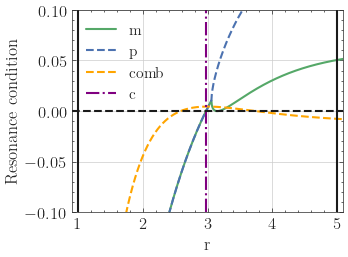

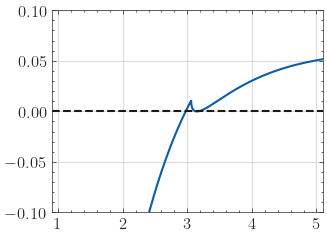

c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:806: ComplexWarning: Casting complex values to real discards the imaginary part
  r = _zeros._brentq(f, a, b, xtol, rtol, maxiter, args, full_output, disp)


Roots found: [2.9751946731151135, 3.132328269711027, 3.169663124742335]
Roots found: [2.9751946731151135]
Tolerance Reached
ETA = 279.51999999999987
Roots found: [2.975203580279878]
Roots found: [2.975203580279878]


In [19]:
from scipy.optimize import root_scalar
tol = 1E-2



############################ Exp7 ############################
flow_select ='exp7'
guess_VA0I = (0.2014834190475398+0.024317407726932444j)
# #### qmagpi
eta_VA0I = 279.4
eta_arr = np.arange(eta_VA0I, 300, 0.01)

# #### WKB
# eta_VA0I = 367
# eta_arr = np.arange(eta_VA0I, 600, 0.01)

############################ tanhv8 ############################
# flow_select ='tanhv8'
# guess_VA0I = (0.37137782202765884+0.02611481962637346j)
# # #### qmagpi
# eta_VA0I = 151
# eta_arr = np.arange(eta_VA0I, 500, 0.01)

    
for j in range(0, len(eta_arr)):
    Pm = 0
    if(j == 0):
        VA_N = 0.1
        Bz_VA0I  = VA_N * (r1*Omega0*np.sqrt(rho*mu_0)*10000)
        guess, Bz, eta = guess_VA0I, Bz_VA0I, eta_VA0I
        elecd_VA0I = eta_arr[j]
    else:
        elecd_VA0I  = eta_arr[j]
        eta = eta_arr[j]

    
    result = o.root_scalar(shoot_hain_v3, method='secant', x0=guess*(1.00005+1e-6j), x1=guess*(0.99995-1e-6j), args=(eta, Pm, k2r_curr, k2rp_curr, k2i_curr, k2ip_curr, kz, m, B0, Bz, flow_select, 1, r2,reso), maxiter=5000)
    guess = result.root 
    y0 = [0.,(1.+1j)*1e-1]  
    y = integ.solve_ivp(shoot_setup_hain_v2, [1,r2**2], y0, args=(guess,eta, Pm, k2r_curr, k2rp_curr, k2i_curr, k2ip_curr, m,kz,B0,Bz,flow_select, 1), max_step=24./reso)
    r_VA0I = np.sqrt(y.t)
    u_VA0I = y.y[0]
    
    if(j% 100 == 0):
        print('Iter')
        print(result)
        print(f'ETA = {elecd_VA0I}')
        b_minus, rc, rp = resonance_bifurcation(r2, guess, m, eta, Pm, k2r_curr, k2i_curr, kz, Bz, B0,flow_select, q, True)

        # ii = np.where(rp > rc)
        # r_cut = rp[ii[:]]
        # b_minus_cut = b_minus[ii[:]]
        
        plt.figure()
        plt.plot(rp, b_minus)
        plt.xlim(0.9, 5.1)
        plt.ylim(-0.1,0.1)
        plt.axhline(y = 0, linestyle = '--', color = 'k')
        plt.show()

        roots_m = find_all_roots(resonance_bifurcation_func_m, (1, 5), 1000,
                            guess, m, eta, Pm, k2r_curr, k2i_curr, kz, Bz, B0, flow_select, q)
        print("Roots found:", roots_m) 
        roots_p = find_all_roots(resonance_bifurcation_func_p, (1, 5), 1000,
                            guess, m, eta, Pm, k2r_curr, k2i_curr, kz, Bz, B0, flow_select, q)
        print("Roots found:", roots_p) 
        len_tot = len(roots_p) + len(roots_m)
        
    else:
        # print('Iter')
        # print(result)
        # print(f'ETA = {elecd_VA0I}')
        b_minus, rc, rp = resonance_bifurcation(r2, guess, m, eta, Pm, k2r_curr, k2i_curr, kz, Bz, B0,flow_select, q, False)

        # ii = np.where(rp > rc)
        # r_cut = rp[ii[:]]
        # b_minus_cut = b_minus[ii[:]]
        
        # plt.figure()
        # plt.plot(rp, b_minus)
        # plt.xlim(0.9, 5.1)
        # plt.ylim(-0.1,0.1)
        # plt.axhline(y = 0, linestyle = '--', color = 'k')
        # plt.show()

        roots_m = find_all_roots(resonance_bifurcation_func_m, (1, 5), 1000,
                            guess, m, eta, Pm, k2r_curr, k2i_curr, kz, Bz, B0, flow_select, q)
        roots_p = find_all_roots(resonance_bifurcation_func_p, (1, 5), 1000,
                            guess, m, eta, Pm, k2r_curr, k2i_curr, kz, Bz, B0, flow_select, q)
        # print("Roots found:", roots) 
        len_tot = len(roots_p) + len(roots_m)
    
    if(len_tot == 2):
        eps = 1E-2
        cond = (np.abs(roots_p[0] - roots_m[0]) < eps)
        # print(cond)
        if(cond):
            print('Tolerance Reached')
            print(f'ETA = {eta_arr[j]}')
            
            print("Roots found:", roots_p) 
            print("Roots found:", roots_m) 

            break

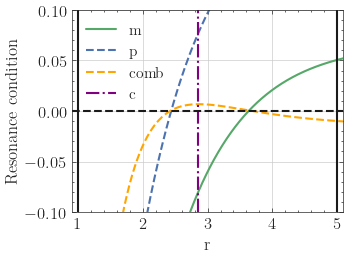

      converged: True
           flag: converged
 function_calls: 8
     iterations: 7
           root: (0.20148341904753345+0.024317407726933103j)
         method: secant
43.244798094304215
472.34037717642633
265.63838764342074
2.8585724284856973
eta_onset_rc = 255.1195903079325
Rm_onset_rc = 12.3952757071751


In [20]:
############################ Exp7 ############################
flow_select ='exp7'
guess_VA0I = (0.2014834190475398+0.024317407726932444j)

# ############################ Exp7 ############################
# flow_select ='tanhv8'
# guess_VA0I = (0.37137782202765884+0.02611481962637346j)

eta = 0
result = o.root_scalar(shoot_hain_v3, method='secant', x0=guess*(1.00005+1e-6j), x1=guess*(0.99995-1e-6j), args=(eta, Pm, k2r_curr, k2rp_curr, k2i_curr, k2ip_curr, kz, m, B0, Bz, flow_select, 1, r2,reso), maxiter=5000)
guess = result.root 
r2 = 5
b_minus, rc_id, rp = resonance_bifurcation(r2, guess, m, eta, Pm, k2r_curr, k2i_curr, kz, Bz, B0,flow_select, q, True)
print(result)

rs = np.linspace(1,5,100)
k2_rs = k2r_curr(r)
Q2_avg = k2r_curr(r)**2
wA = kz*0.1
eta = 2*wA /(1-Pm)/ k2_rs

print(np.min(eta*r1**2*Omega0))
print(np.max(eta*r1**2*Omega0))
print(np.average(eta*r1**2*Omega0))

### Corotation
print(rc_id)
k2_rs = k2r_curr(rc_id)
kz = np.pi/4
wA = kz*0.1
eta = 2*wA /(1-Pm)/ k2_rs
print(f'eta_onset_rc = {eta*r1**2*Omega0}')
print(f'Rm_onset_rc = {1/eta}')

################## WKB VALUES ########################
### Minimum() = 222.3795903437118
### Maximum() = 389.98916443641355
###  <.> = 352.259444923852
### Corotation = 367.7363482231289

################## qmagpi VALUES ########################
### Minimum() = 43.244798094304215
### Maximum() = 472.34037717642633
###  <.> = 265.63838764342074
### Corotation = 268.46274510358205

(-0.1, 0.1)

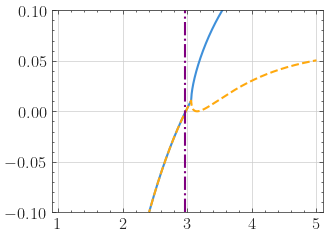

In [21]:
j = 0
VA_N = 0.1

############################ Exp7 ############################
flow_select ='exp7'
guess_VA0I = (0.2014834190475398+0.024317407726932444j)
#### qmagpi
eta_arr = [279.5199999999986]  #### Shooting

# #### WKB 
# eta_arr = [368.079999999999] #### Shooting
 
# ############################ Exp7 ############################
# flow_select ='tanhv8'
# guess_VA0I = (0.37137782202765884+0.02611481962637346j)
# eta_arr=[151.1099999999999]



Bz_VA0I  = VA_N * (r1*Omega0*np.sqrt(rho*mu_0)*10000)
guess, Bz, eta = guess_VA0I, Bz_VA0I, eta_VA0I
elecd_VA0I = eta_arr[j]
eta = eta_arr[j]


result = o.root_scalar(shoot_hain_v3, method='secant', x0=guess*(1.00005+1e-6j), x1=guess*(0.99995-1e-6j), args=(eta, Pm, k2r_curr, k2rp_curr, k2i_curr, k2ip_curr, kz, m, B0, Bz, flow_select, 1, r2,reso), maxiter=5000)
guess = result.root 
y0 = [0.,(1.+1j)*1e-1]  
y = integ.solve_ivp(shoot_setup_hain_v2, [1,r2**2], y0, args=(guess,eta, Pm, k2r_curr, k2rp_curr, k2i_curr, k2ip_curr, m,kz,B0,Bz,flow_select, 1), max_step=24./reso)
r_VA0I = np.sqrt(y.t)
u_VA0I = y.y[0]
b_minus, rc, rp = resonance_bifurcation(r2, guess, m, eta, Pm, k2r_curr, k2i_curr, kz, Bz, B0,flow_select, q, False)
b_minus = resonance_bifurcation_func_m(r_VA0I, guess, m, eta, Pm, k2r_curr, k2i_curr, kz, Bz, B0,flow_select, q, True)
b_plus = resonance_bifurcation_func_p(r_VA0I, guess, m, eta, Pm, k2r_curr, k2i_curr, kz, Bz, B0,flow_select, q, True)

plt.figure()
plt.plot(r_VA0I, b_plus, color = color_arr[0])
plt.plot(r_VA0I, b_minus, color = color_arr[1], linestyle = '--')
plt.axvline(x = rc, linestyle = '-.', color = 'purple')
plt.xlim(0.9,r2+0.1)
plt.ylim(-0.1,0.1)


## Plotting Modes (qmagpi)

      converged: True
           flag: converged
 function_calls: 3
     iterations: 2
           root: (0.2014834190477514+0.0243174077266094j)
         method: secant


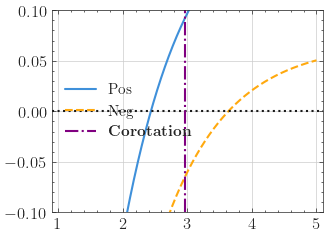

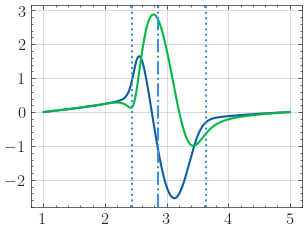

3.6347275819163833
2.4364880538107623
2.8585724284856973
      converged: True
           flag: converged
 function_calls: 3
     iterations: 2
           root: (0.1876312255732131+0.015363201190423498j)
         method: secant
      converged: True
           flag: converged
 function_calls: 3
     iterations: 2
           root: (0.18661127902145727+0.01304120988195713j)
         method: secant
      converged: True
           flag: converged
 function_calls: 3
     iterations: 2
           root: (0.1862544101129211+0.011866095073975432j)
         method: secant


In [22]:
##### SET PARAMETERS #####
flow_type = 'Tanh'
type = 'MCI'
reso = 1500
if(flow_type == 'Kep'):
    flow_select = True
elif(flow_type == 'Tanh'):
    flow_select = 'tanh'
elif(flow_type == 'Sat'):
    flow_select = 'saturated'
elif(flow_type == 'Sh2'):
    flow_select = 'Sh2'
# flow_select ='exp7'
flow_select ='exp7'

color_arr = ['#3F90DA', '#FFA90E', '#BD1F01', '#94A4A2', '#832DB6', '#A96B59', '#E76300', '#B9AC70', '#92DADD']

q = 1/2
r1 = .1
r2 = 5
r3 = 10

### MCI k = 1k1 (Kep.)
kn = 1
m = 1
kz = kn*np.pi/(4)
B0 = 0
elecd = 0
eta = elecd 
Pm = 0

r = np.linspace(1, r2, 500)
q_mag = 0
q2r_sc = np.pi**2/r**2
q2rp_sc = np.pi**2*(-2/r**3)
q2rpp_sc = np.pi**2*(3*2/r**4)
q2i_sc = q_mag*np.zeros(len(r))
q2ip_sc = q_mag*np.zeros(len(r))
q2ipp_sc = q_mag*np.zeros(len(r))
# k_r = -np.pi/4
# q2r_sc = k_r**2 + 1j* k_r / r
# q2rp_sc = -1j * k_r /r**2
# q2rpp_sc = 2*1j*k_r/r**3
# q2i_sc = q_mag*np.zeros(len(r))
# q2ip_sc = q_mag*np.zeros(len(r))
# q2ipp_sc = q_mag*np.zeros(len(r))


ones_arr = np.ones(len(r)) 
k2 = (q2r_sc + 1j*q2i_sc) + m**2/r**2 + kz**2 * ones_arr
k2p = ((q2rp_sc + 1j*q2ip_sc) - 2 * m**2/r**3) ## just changed from d/dr
k2pp = ((q2rpp_sc + 1j*q2ipp_sc) + 6 * m**2/r**4) ## just changed from d/dr

k2r_curr = i2.CubicSpline(r, k2.real)
k2i_curr = i2.CubicSpline(r, k2.imag)
k2rp_curr = i2.CubicSpline(r, k2p.real)
k2ip_curr = i2.CubicSpline(r, k2p.imag)
k2rpp_curr = i2.CubicSpline(r, k2pp.real)
k2ipp_curr = i2.CubicSpline(r, k2pp.imag)

xp = np.linspace(1, r3**2, 50000)
rp = np.linspace(r1, r3, 50000)

elecd_VA0I  = 0
eta_VA0I  = elecd_VA0I 
Pm = 0
guess_VA0I = (0.2014834190475398+0.024317407726932444j)
# guess_VA0I = (0.2450481784930011+0.03018191854108028j)

# flow_select ='tanhv8'
# guess_VA0I = (0.37137782202765884+0.02611481962637346j)

VA_N = 0.1
Bz_VA0I  = VA_N * (r1*Omega0*np.sqrt(rho*mu_0)*10000)
Ur_VA0I  = getU_NIx(rp, guess_VA0I, eta_VA0I , Pm, k2r_curr, k2rp_curr, k2rpp_curr, k2i_curr, k2ip_curr, k2ipp_curr, m, kz, B0, Bz_VA0I, flow_select, 1)

guess, Bz, eta = guess_VA0I, Bz_VA0I, eta_VA0I
result = o.root_scalar(shoot_hain_v3, method='secant', x0=guess*(1.00005+1e-6j), x1=guess*(0.99995-1e-6j), args=(eta, Pm, k2r_curr, k2rp_curr, k2i_curr, k2ip_curr, kz, m, B0, Bz, flow_select, 1, r2,reso), maxiter=5000)
guess0 = result.root 
y0 = [0.,(1.+1j)*1e-1]  
y = integ.solve_ivp(shoot_setup_hain_v2, [1,r2**2], y0, args=(guess0,eta, Pm, k2r_curr, k2rp_curr, k2i_curr, k2ip_curr, m,kz,B0,Bz,flow_select, 1), max_step=24./reso)
r_VA0I = np.sqrt(y.t)
u_VA0I = y.y[0]
r_vec_VA0I = resonance_res_krcomp_v8(r2, guess0, m, eta, Pm, k2r_curr, k2i_curr, kz, Bz, B0,flow_select, q)
print(result)
b_minus_VA0I, rc_VA0I,_  = resonance_bifurcation(r2, guess0, m, eta, Pm, k2r_curr, k2i_curr, kz, Bz, B0,flow_select, q, False)
b_minus_VA0I = resonance_bifurcation_func_m(r_VA0I, guess0, m, eta, Pm, k2r_curr, k2i_curr, kz, Bz, B0,flow_select, q, True)
b_plus_VA0I = resonance_bifurcation_func_p(r_VA0I, guess0, m, eta, Pm, k2r_curr, k2i_curr, kz, Bz, B0,flow_select, q, True)

plt.figure()
plt.plot(r_VA0I, b_plus_VA0I, color = color_arr[0], label = 'Pos')
plt.plot(r_VA0I, b_minus_VA0I, color = color_arr[1], linestyle = '--', label = 'Neg')
plt.axhline(y = 0, linestyle = ':', color = 'k')
plt.axvline(x = rc, linestyle = '-.', color = 'purple', label = r'\textbf{Corotation}')
plt.legend()
plt.xlim(0.9,r2+0.1)
plt.ylim(-0.1,0.1)
plt.show()

plt.figure()
plt.plot(r_VA0I, (u_VA0I/r_VA0I).real)
plt.plot(r_VA0I, (u_VA0I/r_VA0I).imag)
plt.axvline(x=r_vec_VA0I[0], linestyle = ':', color = color_arr[0], label = r'\textbf{Resonance}')
plt.axvline(x=r_vec_VA0I[1], linestyle = ':', color = color_arr[0], label = r'\textbf{Resonance}')
plt.axvline(x=r_vec_VA0I[4], linestyle = '-.', color = color_arr[0], label = r'\textbf{Corotation}')
plt.show()
print(r_vec_VA0I[0])
print(r_vec_VA0I[1])
print(r_vec_VA0I[4])
#### Marginal #1
elecd_VA0NI = 200
eta_VA0NI = elecd_VA0NI 
Pm = 0
guess_VA0NI = (0.18763122557320383+0.015363201190477608j)
VA_N = 0.1
Bz_VA0NI = VA_N * (r1*Omega0*np.sqrt(rho*mu_0)*10000)
Ur_VA0NI = getU_NIx(rp, guess_VA0NI, eta_VA0NI, Pm, k2r_curr, k2rp_curr, k2rpp_curr, k2i_curr, k2ip_curr, k2ipp_curr, m, kz, B0, Bz_VA0NI, flow_select, 1)

guess, Bz, eta = guess_VA0NI, Bz_VA0NI, eta_VA0NI
result = o.root_scalar(shoot_hain_v3, method='secant', x0=guess*(1.00005+1e-6j), x1=guess*(0.99995-1e-6j), args=(eta, Pm, k2r_curr, k2rp_curr, k2i_curr, k2ip_curr, kz, m, B0, Bz, flow_select, 1, r2,reso), maxiter=5000)
guess0 = result.root
y0 = [0.,(1.+1j)*1e-1]  
y = integ.solve_ivp(shoot_setup_hain_v2, [1,r2**2], y0, args=(guess0,eta, Pm, k2r_curr, k2rp_curr, k2i_curr, k2ip_curr, m,kz,B0,Bz,flow_select, 1), max_step=24./reso)
r_VA0NI = np.sqrt(y.t)
u_VA0NI = y.y[0]
r_vec_VA0NI = shr.resonance_res_krcomp_v8(r2, guess0, m, eta, Pm, k2r_curr, k2i_curr, kz, Bz, B0,flow_select, q)
print(result)
b_minus_VA0NI, rc_VA0NI, _ = resonance_bifurcation(r2, guess0, m, eta, Pm, k2r_curr, k2i_curr, kz, Bz, B0,flow_select, q, False)
b_minus_VA0NI = resonance_bifurcation_func_m(r_VA0I, guess0, m, eta, Pm, k2r_curr, k2i_curr, kz, Bz, B0,flow_select, q, True)
b_plus_VA0NI = resonance_bifurcation_func_p(r_VA0I, guess0, m, eta, Pm, k2r_curr, k2i_curr, kz, Bz, B0,flow_select, q, True)

#### Marginal #2
elecd_VAN0I = 250
eta_VAN0I = elecd_VAN0I
Pm = 0
guess_VAN0I = (0.18661127902144423+0.0130412098819838j)
VA_N = 0.1
Bz_VAN0I = VA_N * (r1*Omega0*np.sqrt(rho*mu_0)*10000)
Ur_VAN0I = getU_NIx(rp, guess_VAN0I, eta_VAN0I, Pm, k2r_curr, k2rp_curr, k2rpp_curr, k2i_curr, k2ip_curr, k2ipp_curr, m, kz, B0, Bz_VAN0I, flow_select, 1)

guess, Bz, eta = guess_VAN0I, Bz_VAN0I, eta_VAN0I
result = o.root_scalar(shoot_hain_v3, method='secant', x0=guess*(1.00005+1e-6j), x1=guess*(0.99995-1e-6j), args=(eta, Pm, k2r_curr, k2rp_curr, k2i_curr, k2ip_curr, kz, m, B0, Bz, flow_select, 1, r2,reso), maxiter=5000)
guess0 = result.root
y0 = [0.,(1.+1j)*1e-1]  
y = integ.solve_ivp(shoot_setup_hain_v2, [1,r2**2], y0, args=(guess0,eta, Pm, k2r_curr, k2rp_curr, k2i_curr, k2ip_curr, m,kz,B0,Bz,flow_select, 1), max_step=24./reso)
r_VAN0I = np.sqrt(y.t)
u_VAN0I = y.y[0]
r_vec_VAN0I = shr.resonance_res_krcomp_v8(r2, guess0, m, eta, Pm, k2r_curr, k2i_curr, kz, Bz, B0,flow_select, q)
print(result)
b_minus_VAN0I, rc_VAN0I,_ = resonance_bifurcation(r2, guess0, m, eta, Pm, k2r_curr, k2i_curr, kz, Bz, B0,flow_select, q, False)
b_minus_VAN0I = resonance_bifurcation_func_m(r_VA0I, guess0, m, eta, Pm, k2r_curr, k2i_curr, kz, Bz, B0,flow_select, q, True)
b_plus_VAN0I = resonance_bifurcation_func_p(r_VA0I, guess0, m, eta, Pm, k2r_curr, k2i_curr, kz, Bz, B0,flow_select, q, True)

#### Stable
elecd_VAN0NI = 279.51999999999987
eta_VAN0NI = elecd_VAN0NI
Pm = 0
guess_VAN0NI = (0.18625441011290322+0.011866095073996052j)
VA_N = 0.1
Bz_VAN0NI = VA_N * (r1*Omega0*np.sqrt(rho*mu_0)*10000)
Ur_VAN0NI = getU_NIx(rp, guess_VAN0NI, eta_VAN0NI, Pm, k2r_curr, k2rp_curr, k2rpp_curr, k2i_curr, k2ip_curr, k2ipp_curr, m, kz, B0, Bz_VAN0NI, flow_select, 1)

guess, Bz, eta = guess_VAN0NI, Bz_VAN0NI, eta_VAN0NI
result = o.root_scalar(shoot_hain_v3, method='secant', x0=guess*(1.00005+1e-6j), x1=guess*(0.99995-1e-6j), args=(eta, Pm, k2r_curr, k2rp_curr, k2i_curr, k2ip_curr, kz, m, B0, Bz, flow_select, 1, r2,reso), maxiter=5000)
guess0 = result.root
y0 = [0.,(1.+1j)*1e-1]  
y = integ.solve_ivp(shoot_setup_hain_v2, [1,r2**2], y0, args=(guess0,eta, Pm, k2r_curr, k2rp_curr, k2i_curr, k2ip_curr, m,kz,B0,Bz,flow_select, 1), max_step=24./reso)
r_VAN0NI = np.sqrt(y.t)
u_VAN0NI = y.y[0]
r_vec_VAN0NI = shr.resonance_res_krcomp_v8(r2, guess0, m, eta, Pm, k2r_curr, k2i_curr, kz, Bz, B0,flow_select, q)
print(result)
b_minus_VAN0NI, rc_VAN0NI, _ = resonance_bifurcation(r2, guess0, m, eta, Pm, k2r_curr, k2i_curr, kz, Bz, B0,flow_select, q, False)
b_minus_VAN0NI = resonance_bifurcation_func_m(r_VA0I, guess0, m, eta, Pm, k2r_curr, k2i_curr, kz, Bz, B0,flow_select, q, True)
b_plus_VAN0NI = resonance_bifurcation_func_p(r_VA0I, guess0, m, eta, Pm, k2r_curr, k2i_curr, kz, Bz, B0,flow_select, q, True)


In [23]:
print(r1**2*Omega0/200)
print(r1**2*Omega0/250)
print(r1**2*Omega0/279.51999999999987)

15.811388300841898
12.649110640673518
11.313242917030555


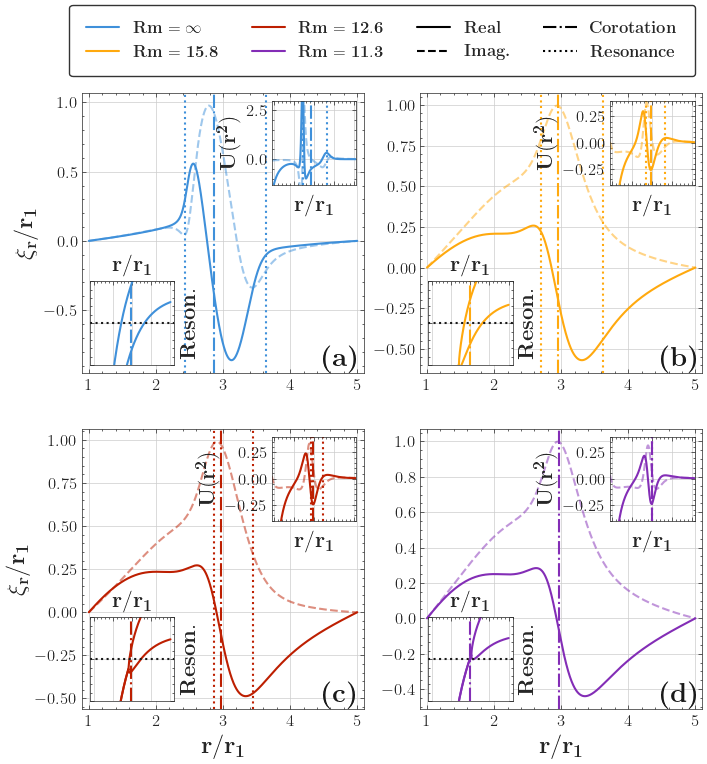

In [ ]:
fig, axes = plt.subplots(2,2, figsize=(8, 8))
### PLOT Ur
c0_desat = sns.desaturate(color_arr[0], 0.1)
c1_desat = sns.desaturate(color_arr[1], 0.1)
c2_desat = sns.desaturate(color_arr[2], 0.1)
c4_desat = sns.desaturate(color_arr[4], 0.1)

axes[0][0].set_ylabel(r'$\mathbf{\xi_r/r_1}$', fontsize = 18)
axes[1][0].set_ylabel(r'$\mathbf{\xi_r/r_1}$', fontsize = 18)
axes[1][0].set_xlabel(r'$\mathbf{r/r_1}$', fontsize = 18)
axes[1][1].set_xlabel(r'$\mathbf{r/r_1}$', fontsize = 18)

axes[0][0].set_xlim(.9,r2+0.1)
axes[1][0].set_xlim(.9,r2+0.1)
axes[0][1].set_xlim(.9,r2+0.1)
axes[1][1].set_xlim(.9,r2+0.1)

axes[0][0].plot(r_VA0I, ((u_VA0I/r_VA0I)/np.max(np.abs(u_VA0I/r_VA0I))).real, color=color_arr[0])
axes[0][1].plot(r_VA0NI, ((u_VA0NI/r_VA0NI)/np.max(np.abs(u_VA0NI/r_VA0NI))).real, color=color_arr[1])
axes[1][0].plot(r_VAN0I, ((u_VAN0I/r_VAN0I)/np.max(np.abs(u_VAN0I/r_VAN0I))).real, color=color_arr[2])
axes[1][1].plot(r_VAN0NI, ((u_VAN0NI/r_VAN0NI)/np.max(np.abs(u_VAN0NI/r_VAN0NI))).real, color=color_arr[4])

axes[0][0].plot(r_VA0I, ((u_VA0I/r_VA0I)/np.max(np.abs(u_VA0I/r_VA0I))).imag, color=color_arr[0], alpha = 0.5, linestyle = 'dashed')
axes[0][1].plot(r_VAN0I, ((u_VAN0I/r_VAN0I)/np.max(np.abs(u_VAN0I/r_VAN0I))).imag, color=color_arr[1], alpha = 0.5, linestyle = 'dashed')
axes[1][0].plot(r_VA0NI, ((u_VA0NI/r_VA0NI)/np.max(np.abs(u_VA0NI/r_VA0NI))).imag, color=color_arr[2], alpha = 0.5, linestyle = 'dashed')
axes[1][1].plot(r_VAN0NI, ((u_VAN0NI/r_VAN0NI)/np.max(np.abs(u_VAN0NI/r_VAN0NI))).imag, color=color_arr[4], alpha = 0.5, linestyle = 'dashed')

#### Potentials
ax_inset = inset_axes(axes[0][0], width="30%", height="30%", loc='upper right')
ax_inset.set_xticks(range(1,6))
ax_inset.axes.xaxis.set_ticklabels([])
ax_inset.set_xlabel(r'$\mathbf{r/r_1}$', fontsize = 16)
ax_inset.set_ylabel(r"$\mathbf{U(r^2)}$", fontsize = 16)
ax_inset.plot(rp, Ur_VA0I.real, color = color_arr[0])
ax_inset.plot(rp, Ur_VA0I.imag, color = color_arr[0], linestyle = '--', alpha = 0.5)
ax_inset.axvline(x=r_vec_VA0I[0], linestyle = ':', color = color_arr[0], label = r'\textbf{Resonance}')
ax_inset.axvline(x=r_vec_VA0I[1], linestyle = ':', color = color_arr[0], label = r'\textbf{Resonance}')
ax_inset.axvline(x=r_vec_VA0I[4], linestyle = '-.', color = color_arr[0], label = r'\textbf{Corotation}')
ax_inset.set_ylim(-1.3,3)
ax_inset.set_xlim(0.9, 5.1)

ax_inset = inset_axes(axes[0][1], width="30%", height="30%", loc='upper right')
ax_inset.set_xticks(range(1,6))
ax_inset.axes.xaxis.set_ticklabels([])
ax_inset.set_xlabel(r'$\mathbf{r/r_1}$', fontsize = 16)
ax_inset.set_ylabel(r"$\mathbf{U(r^2)}$", fontsize = 16)
ax_inset.plot(rp, Ur_VA0NI.real, color = color_arr[1])
ax_inset.plot(rp, Ur_VA0NI.imag, color = color_arr[1], linestyle = '--', alpha = 0.5)
ax_inset.axvline(x=r_vec_VA0NI[0], linestyle = ':', color = color_arr[1], label = r'\textbf{Resonance}')
ax_inset.axvline(x=r_vec_VA0NI[1], linestyle = ':', color = color_arr[1], label = r'\textbf{Resonance}')
ax_inset.axvline(x=r_vec_VA0NI[4], linestyle = '-.', color = color_arr[1], label = r'\textbf{Corotation}')
ax_inset.set_ylim(-.4,.4)
ax_inset.set_xlim(0.9, 5.1)

ax_inset = inset_axes(axes[1][0], width="30%", height="30%", loc='upper right')
ax_inset.set_xticks(range(1,6))
ax_inset.axes.xaxis.set_ticklabels([])
ax_inset.set_xlabel(r'$\mathbf{r/r_1}$', fontsize = 16)
ax_inset.set_ylabel(r"$\mathbf{U(r^2)}$", fontsize = 16)
ax_inset.plot(rp, Ur_VAN0I.real, color = color_arr[2])
ax_inset.plot(rp, Ur_VAN0I.imag, color = color_arr[2], linestyle = '--', alpha = 0.5)
ax_inset.axvline(x=r_vec_VAN0I[0], linestyle = ':', color = color_arr[2], label = r'\textbf{Resonance}')
ax_inset.axvline(x=r_vec_VAN0I[1], linestyle = ':', color = color_arr[2], label = r'\textbf{Resonance}')
ax_inset.axvline(x=r_vec_VAN0I[4], linestyle = '-.', color = color_arr[2], label = r'\textbf{Corotation}')
ax_inset.set_ylim(-.4,.4)
ax_inset.set_xlim(0.9, 5.1)

ax_inset = inset_axes(axes[1][1], width="30%", height="30%", loc='upper right')
ax_inset.set_xticks(range(1,6))
ax_inset.axes.xaxis.set_ticklabels([])
ax_inset.set_xlabel(r'$\mathbf{r/r_1}$', fontsize = 16)
ax_inset.set_ylabel(r"$\mathbf{U(r^2)}$", fontsize = 16)
ax_inset.plot(rp, Ur_VAN0NI.real, color = color_arr[4])
ax_inset.plot(rp, Ur_VAN0NI.imag, color = color_arr[4], linestyle = '--', alpha = 0.5)
ax_inset.axvline(x=r_vec_VAN0NI[0], linestyle = ':', color = color_arr[4], label = r'\textbf{Resonance}')
ax_inset.axvline(x=r_vec_VAN0NI[1], linestyle = ':', color = color_arr[4], label = r'\textbf{Resonance}')
ax_inset.axvline(x=r_vec_VAN0NI[4], linestyle = '-.', color = color_arr[4], label = r'\textbf{Corotation}')
ax_inset.set_ylim(-.4,.4)
ax_inset.set_xlim(0.9, 5.1)


######################################### RESONANCE CONDITIONS
# ax_inset = inset_axes(axes[0][0], width="30%", height="30%", loc='lower right')
# ax_inset.set_xticks(range(1,6))
# ax_inset.axes.xaxis.set_ticklabels([])
# ax_inset.axes.yaxis.set_ticklabels([])
# ax_inset.set_xlabel(r'$\mathbf{r/r_1}$', fontsize = 16)
# ax_inset.set_ylabel(r"$\mathbf{Reson.}$", fontsize = 16)
# ax_inset.plot(r_VA0I, b_plus_VA0I.real, color = color_arr[0], label = 'Pos')
# ax_inset.plot(r_VA0I, b_minus_VA0I.real, color = color_arr[0], label = 'Neg')
# ax_inset.axhline(y = 0, linestyle = ':', color = 'k')
# ax_inset.axvline(x = rc, linestyle = '-.', color = color_arr[0], label = r'\textbf{Corotation}')
# # ax_inset.legend()
# ax_inset.set_ylim(0.9,r2+0.1)
# ax_inset.set_ylim(-0.1,0.1)
# ax_inset.xaxis.set_label_position('top')
# ax_inset.xaxis.set_ticks_position('top')


# ax_inset = inset_axes(axes[0][1], width="30%", height="30%", loc='lower right')
# ax_inset.set_xticks(range(1,6))
# ax_inset.axes.xaxis.set_ticklabels([])
# ax_inset.axes.yaxis.set_ticklabels([])
# ax_inset.set_xlabel(r'$\mathbf{r/r_1}$', fontsize = 16)
# ax_inset.set_ylabel(r"$\mathbf{Reson.}$", fontsize = 16)
# ax_inset.plot(r_VA0I, b_plus_VA0NI.real, color = color_arr[1], label = 'Pos')
# ax_inset.plot(r_VA0I, b_minus_VA0NI.real, color = color_arr[1], label = 'Neg')
# ax_inset.axhline(y = 0, linestyle = ':', color = 'k')
# ax_inset.axvline(x = rc, linestyle = '-.', color = color_arr[1], label = r'\textbf{Corotation}')
# # ax_inset.legend()
# ax_inset.set_ylim(0.9,r2+0.1)
# ax_inset.set_ylim(-0.1,0.1)
# ax_inset.xaxis.set_label_position('top')
# ax_inset.xaxis.set_ticks_position('top')

# ax_inset = inset_axes(axes[1][0], width="30%", height="30%", loc='lower right')
# ax_inset.set_xticks(range(1,6))
# ax_inset.axes.xaxis.set_ticklabels([])
# ax_inset.axes.yaxis.set_ticklabels([])
# ax_inset.set_xlabel(r'$\mathbf{r/r_1}$', fontsize = 16)
# ax_inset.set_ylabel(r"$\mathbf{Reson.}$", fontsize = 16)
# ax_inset.plot(r_VA0I, b_plus_VAN0I.real, color = color_arr[2], label = 'Pos')
# ax_inset.plot(r_VA0I, b_minus_VAN0I.real, color = color_arr[2], label = 'Neg')
# ax_inset.axhline(y = 0, linestyle = ':', color = 'k')
# ax_inset.axvline(x = rc, linestyle = '-.', color = color_arr[2], label = r'\textbf{Corotation}')
# # ax_inset.legend()
# ax_inset.set_ylim(0.9,r2+0.1)
# ax_inset.set_ylim(-0.1,0.1)
# ax_inset.xaxis.set_label_position('top')
# ax_inset.xaxis.set_ticks_position('top')

# ax_inset = inset_axes(axes[1][1], width="30%", height="30%", loc='lower right')
# ax_inset.set_xticks(range(1,6))
# ax_inset.axes.xaxis.set_ticklabels([])
# ax_inset.axes.yaxis.set_ticklabels([])
# ax_inset.set_xlabel(r'$\mathbf{r/r_1}$', fontsize = 16)
# ax_inset.set_ylabel(r"$\mathbf{Reson.}$", fontsize = 16)
# ax_inset.plot(r_VA0I, b_plus_VAN0NI.real, color = color_arr[4], label = 'Pos')
# ax_inset.plot(r_VA0I, b_minus_VAN0NI.real, color = color_arr[4], label = 'Neg')
# ax_inset.axhline(y = 0, linestyle = ':', color = 'k')
# ax_inset.axvline(x = rc, linestyle = '-.', color = color_arr[4], label = r'\textbf{Corotation}')
# # ax_inset.legend()
# ax_inset.set_ylim(0.9,r2+0.1)
# ax_inset.set_ylim(-0.1,0.1)
# ax_inset.xaxis.set_label_position('top')
# ax_inset.xaxis.set_ticks_position('top')

ax_inset = inset_axes(axes[0][0], width="30%", height="30%", loc='lower left')
ax_inset.set_xticks(range(1,6))
ax_inset.axes.xaxis.set_ticklabels([])
ax_inset.axes.yaxis.set_ticklabels([])
ax_inset.set_xlabel(r'$\mathbf{r/r_1}$', fontsize = 16)
ax_inset.set_ylabel(r"$\mathbf{Reson.}$", fontsize = 16)
ax_inset.plot(r_VA0I, b_plus_VA0I.real, color = color_arr[0], label = 'Pos')
ax_inset.plot(r_VA0I, b_minus_VA0I.real, color = color_arr[0], label = 'Neg')
ax_inset.axhline(y = 0, linestyle = ':', color = 'k')
ax_inset.axvline(x = rc, linestyle = '-.', color = color_arr[0], label = r'\textbf{Corotation}')
# ax_inset.legend()
ax_inset.set_ylim(0.9,r2+0.1)
ax_inset.set_ylim(-0.1,0.1)
ax_inset.xaxis.set_label_position('top')
ax_inset.xaxis.set_ticks_position('top')
ax_inset.yaxis.set_label_position('right')


ax_inset = inset_axes(axes[0][1], width="30%", height="30%", loc='lower left')
ax_inset.set_xticks(range(1,6))
ax_inset.axes.xaxis.set_ticklabels([])
ax_inset.axes.yaxis.set_ticklabels([])
ax_inset.set_xlabel(r'$\mathbf{r/r_1}$', fontsize = 16)
ax_inset.set_ylabel(r"$\mathbf{Reson.}$", fontsize = 16)
ax_inset.plot(r_VA0I, b_plus_VA0NI.real, color = color_arr[1], label = 'Pos')
ax_inset.plot(r_VA0I, b_minus_VA0NI.real, color = color_arr[1], label = 'Neg')
ax_inset.axhline(y = 0, linestyle = ':', color = 'k')
ax_inset.axvline(x = rc, linestyle = '-.', color = color_arr[1], label = r'\textbf{Corotation}')
# ax_inset.legend()
ax_inset.set_ylim(0.9,r2+0.1)
ax_inset.set_ylim(-0.1,0.1)
ax_inset.xaxis.set_label_position('top')
ax_inset.xaxis.set_ticks_position('top')
ax_inset.yaxis.set_label_position('right')

ax_inset = inset_axes(axes[1][0], width="30%", height="30%", loc='lower left')
ax_inset.set_xticks(range(1,6))
ax_inset.axes.xaxis.set_ticklabels([])
ax_inset.axes.yaxis.set_ticklabels([])
ax_inset.set_xlabel(r'$\mathbf{r/r_1}$', fontsize = 16)
ax_inset.set_ylabel(r"$\mathbf{Reson.}$", fontsize = 16)
ax_inset.plot(r_VA0I, b_plus_VAN0I.real, color = color_arr[2], label = 'Pos')
ax_inset.plot(r_VA0I, b_minus_VAN0I.real, color = color_arr[2], label = 'Neg')
ax_inset.axhline(y = 0, linestyle = ':', color = 'k')
ax_inset.axvline(x = rc, linestyle = '-.', color = color_arr[2], label = r'\textbf{Corotation}')
# ax_inset.legend()
ax_inset.set_ylim(0.9,r2+0.1)
ax_inset.set_ylim(-0.1,0.1)
ax_inset.xaxis.set_label_position('top')
ax_inset.xaxis.set_ticks_position('top')
ax_inset.yaxis.set_label_position('right')

ax_inset = inset_axes(axes[1][1], width="30%", height="30%", loc='lower left')
ax_inset.set_xticks(range(1,6))
ax_inset.axes.xaxis.set_ticklabels([])
ax_inset.axes.yaxis.set_ticklabels([])
ax_inset.set_xlabel(r'$\mathbf{r/r_1}$', fontsize = 16)
ax_inset.set_ylabel(r"$\mathbf{Reson.}$", fontsize = 16)
ax_inset.plot(r_VA0I, b_plus_VAN0NI.real, color = color_arr[4], label = 'Pos')
ax_inset.plot(r_VA0I, b_minus_VAN0NI.real, color = color_arr[4], label = 'Neg')
ax_inset.axhline(y = 0, linestyle = ':', color = 'k')
ax_inset.axvline(x = rc, linestyle = '-.', color = color_arr[4], label = r'\textbf{Corotation}')
# ax_inset.legend()
ax_inset.set_ylim(0.9,r2+0.1)
ax_inset.set_ylim(-0.1,0.1)
ax_inset.xaxis.set_label_position('top')
ax_inset.xaxis.set_ticks_position('top')
ax_inset.yaxis.set_label_position('right')


###########################################################################################################################
### Resonances
axes[0][0].axvline(x=r_vec_VA0I[0], linestyle = ':', color = color_arr[0], label = r'\textbf{Resonance}')
axes[0][0].axvline(x=r_vec_VA0I[1], linestyle = ':', color = color_arr[0], label = r'\textbf{Resonance}')
axes[0][0].axvline(x=r_vec_VA0I[4], linestyle = '-.', color = color_arr[0], label = r'\textbf{Corotation}')

axes[0][1].axvline(x=r_vec_VA0NI[0], linestyle = ':', color = color_arr[1], label = r'\textbf{Resonance}')
axes[0][1].axvline(x=r_vec_VA0NI[1], linestyle = ':', color = color_arr[1], label = r'\textbf{Resonance}')
axes[0][1].axvline(x=r_vec_VA0NI[4], linestyle = '-.', color = color_arr[1], label = r'\textbf{Corotation}')

axes[1][0].axvline(x=r_vec_VAN0I[0], linestyle = ':', color = color_arr[2], label = r'\textbf{Resonance}')
axes[1][0].axvline(x=r_vec_VAN0I[1], linestyle = ':', color = color_arr[2], label = r'\textbf{Resonance}')
axes[1][0].axvline(x=r_vec_VAN0I[4], linestyle = '-.', color = color_arr[2], label = r'\textbf{Corotation}')

# axes.axvline(x=r_vec_VAN0NI[0], linestyle = ':', color = color_arr[4], label = r'\textbf{Resonance}')
# axes.axvline(x=r_vec_VAN0NI[1], linestyle = ':', color = color_arr[4], label = r'\textbf{Resonance}')
axes[1][1].axvline(x=r_vec_VAN0NI[4], linestyle = '-.', color = color_arr[4], label = r'\textbf{Corotation}')

line1 = Line2D([0], [0], color=color_arr[0], linestyle='-')
line2 = Line2D([0], [0], color=color_arr[1], linestyle='-')
line3 = Line2D([0], [0], color=color_arr[2], linestyle='-')
line4 = Line2D([0], [0], color=color_arr[4], linestyle='-')
line5 = Line2D([0], [0], color='black', linestyle='-', label=r'\textbf{Real}')
line6 = Line2D([0], [0], color='black', linestyle='--', label=r'\textbf{Imag.}')
line7 = Line2D([0], [0], color='black', linestyle='-.', label=r'\textbf{Corotation}')
line8 = Line2D([0], [0], color='black', linestyle=':', label=r'\textbf{Resonance}')
# Add the dummy entries to the legend
lines = [line1, line2, line3, line4, line5, line6, line7, line8]
# labels = [r'\textbf{Rm} $\mathbf{= \infty}$', r'\textbf{Rm} $= $' + f'{np.round(r1**2*Omega0/eta_VA0NI,1)}',  r'\textbf{Rm} $= $' + f' {np.round(r1**2*Omega0/eta_VAN0I,1)}', r'\textbf{Rm} $= $' + f' {np.round(r1**2*Omega0/eta_VAN0NI,1)}','\textbf{Real}', '\textbf{Imag.}', '\textbf{Corotation}', '\textbf{Resonance}']

# 15.811388300841898
# 12.649110640673518
# 11.313242917030555

labels = [r'\textbf{Rm} $\mathbf{= \infty}$', r'\textbf{Rm} $= $' + r' $\mathbf{15.8}$',  r'\textbf{Rm} $= $' + r' $\mathbf{12.6}$', r'\textbf{Rm} $= $' + r' $\mathbf{11.3}$',r'\textbf{Real}', r'\textbf{Imag.}', r'\textbf{Corotation}', r'\textbf{Resonance}']


axes[0][0].text(0.85, 0.12, r'\textbf{(a)}', transform=axes[0][0].transAxes, fontsize=20, verticalalignment='top', horizontalalignment='left', color ='k')
axes[0][1].text(0.85, 0.12, r'\textbf{(b)}', transform=axes[0][1].transAxes, fontsize=20, verticalalignment='top', horizontalalignment='left', color ='k')
axes[1][0].text(0.85, 0.12, r'\textbf{(c)}', transform=axes[1][0].transAxes, fontsize=20, verticalalignment='top', horizontalalignment='left', color ='k')
axes[1][1].text(0.85, 0.12, r'\textbf{(d)}', transform=axes[1][1].transAxes, fontsize=20, verticalalignment='top', horizontalalignment='left', color ='k')


# axes.set_title('Ideal')
# axes.title.set_size(15)

# Create the legend below the plot
fig.legend(lines, labels, loc='lower center', ncol=4, 
           bbox_to_anchor=(0.5, .88),  # Position the legend below the plot
           frameon=True,  # Turn on the frame (border)
           edgecolor='black',  # Set the border color
           facecolor='white',  # Set the background color of the legend box
           borderpad=1,  # Padding between the legend text and the border
           borderaxespad=1, fontsize = 12)

# plt.savefig(f'Potentials-Non-Ideal/' + type + f'_{kn}k1-modestructure-resonance' +'-Exp-5r1-Bz' + '.png', bbox_inches='tight', dpi = 500)
# plt.savefig(f'Potentials-Non-Ideal/' + type + f'_{kn}k1-modestructure-resonance' +'-Exp-5r1-Bz' + '.svg', bbox_inches='tight', format = 'svg')
plt.savefig(f'Potentials-Non-Ideal/' + type + f'_{kn}k1-modestructure-resonance' +'-Exp-5r1-Bz' + '.pdf', bbox_inches='tight', dpi = 500)

plt.show()